<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#LyricsManager.py" data-toc-modified-id="LyricsManager.py-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>LyricsManager.py</a></span></li><li><span><a href="#MoodyLyrics-issue" data-toc-modified-id="MoodyLyrics-issue-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>MoodyLyrics issue</a></span></li><li><span><a href="#MoodyLyrics-and-MoodyLyrics4Q-comparison" data-toc-modified-id="MoodyLyrics-and-MoodyLyrics4Q-comparison-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>MoodyLyrics and MoodyLyrics4Q comparison</a></span></li><li><span><a href="#New-features" data-toc-modified-id="New-features-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>New features</a></span><ul class="toc-item"><li><span><a href="#Feature-Analysis" data-toc-modified-id="Feature-Analysis-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Feature Analysis</a></span></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Feature Selection</a></span><ul class="toc-item"><li><span><a href="#PCA-on-MoodyLyrics4Q" data-toc-modified-id="PCA-on-MoodyLyrics4Q-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>PCA on MoodyLyrics4Q</a></span></li></ul></li></ul></li><li><span><a href="#Classification" data-toc-modified-id="Classification-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Classification</a></span><ul class="toc-item"><li><span><a href="#Artificial-Neural-Network" data-toc-modified-id="Artificial-Neural-Network-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Artificial Neural Network</a></span><ul class="toc-item"><li><span><a href="#Model" data-toc-modified-id="Model-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Model</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>Results</a></span></li><li><span><a href="#Cross-Validation" data-toc-modified-id="Cross-Validation-6.1.3"><span class="toc-item-num">6.1.3&nbsp;&nbsp;</span>Cross Validation</a></span></li><li><span><a href="#Analysis-on-Extra-Test" data-toc-modified-id="Analysis-on-Extra-Test-6.1.4"><span class="toc-item-num">6.1.4&nbsp;&nbsp;</span>Analysis on Extra Test</a></span></li></ul></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Analysis-on-Extra-Test" data-toc-modified-id="Analysis-on-Extra-Test-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Analysis on Extra Test</a></span></li></ul></li><li><span><a href="#SVM" data-toc-modified-id="SVM-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>SVM</a></span><ul class="toc-item"><li><span><a href="#Analysis-on-Extra-Test" data-toc-modified-id="Analysis-on-Extra-Test-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Analysis on Extra Test</a></span></li></ul></li><li><span><a href="#eXtreme-Gradient-Boost" data-toc-modified-id="eXtreme-Gradient-Boost-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>eXtreme Gradient Boost</a></span><ul class="toc-item"><li><span><a href="#Analysis-on-Extra-Test" data-toc-modified-id="Analysis-on-Extra-Test-6.4.1"><span class="toc-item-num">6.4.1&nbsp;&nbsp;</span>Analysis on Extra Test</a></span></li></ul></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

In [1]:
import spacy
import os
import sys
import warnings
import itertools

import numpy as np
import pandas as pd


from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_color_codes()

#The below code is used to install external packages
import pip
def install(package):
    pip.main(['install', package])


emotion_labels = ['happy', 'sad', 'angry', 'relaxed']

In [2]:
# Read extra test set
extra_test_path = '../src/datasets/extra_test.csv'
extra_test = pd.read_csv(extra_test_path)

In [3]:
"""
This function computes and plots the confusion matrix.
"""
def plot_confusion_matrix(y_true, y_pred, title, labels, filename):
    cnf_matrix = confusion_matrix(y_true, y_pred)
    df_cnf_matrix = pd.DataFrame(data=cnf_matrix)
    plt.figure(figsize = (8,6))
    #plt.title(title,fontsize=20)
    ax = sns.heatmap(df_cnf_matrix, annot=True, cmap='Blues',fmt='g',square=True,linewidths=.7, cbar_kws={"shrink": .5}, annot_kws={"size": 20})
    ax.set_xticklabels(labels,fontsize=20,  rotation=90)
    b = ax.set_yticklabels(labels,fontsize=20, rotation=360)
    plt.savefig(filename)

# Introduction
**Previously on Sara&Mario project**: 
<ol>
    <li>*MoodyLyrics* stats analysis</li>
    <li>Lyrics classification using the main classifiers</li>
    <li>Emotion classification by just considering the song title</li> 
</ol>
Now, following the last meeting discussion we: 
<ol>
    <li>Wrote a script to create the dataset *SpotifyURI*, *List of PlaylistIDs*, *MoodyLyric_Emotion*</li>
    <li>Wrote a script to detect all duplicated songs in MoodyLyrics to fill a bug report</li>
    <li>Added new features for the classification task</li>
</ol>

# LyricsManager.py
After downloading the Spotify RecSys Challenge dataset we wrote a script that: <br>
<ul>
    <li>Given as input: the *Spotify playlist dataset folder*, and an output folder, creates a data structure to store for each song:<br>
        <*SpotifyURI*, *PlaylistIDs*, *TrackInformation*, *Emotion*><br>
        where: 
            <ul>
                <li>*SpotifyURI* is the songID</li>
                <li>*PlaylistsIDs* is the list of playlist in which the song appear</li>
                <li>*TrackInformation* is the list of information taken from Spotify dataset</li>
                <li>*Emotion* is an optional field, present only if the song is also contained in the MoodyLyrics dataset, that contains the emotion label for the song
    </li>
            </ul>
      <li>Can load Spotify songs datastructure (if already existing)</li>
            <li>Given as input a SpotifyURI it can download lyrics from lyricwikia</li>
</ul>

# MoodyLyrics issue
Last week we detected duplicate information in MoodyLyrics. Now we can generate a .csv file capable of reporting those duplicates.

The bug report can be found at `./src/datasets/moodylyrics_bug_report.csv`.

# MoodyLyrics and MoodyLyrics4Q comparison
Here we are going to read MoodyLyrics and MoodyLyrics4Q and to compare the two class label distributions.

In [10]:
moodyLyrics4qDF = pd.read_csv('../src/datasets/MoodyLyrics4Q.csv')
moodyLyricsDF   = pd.read_csv('../src/datasets/MoodyLyrics_cleaned.csv')

FileNotFoundError: [Errno 2] No such file or directory: './Advanced_feature_engineering_pictures/Stats.png'

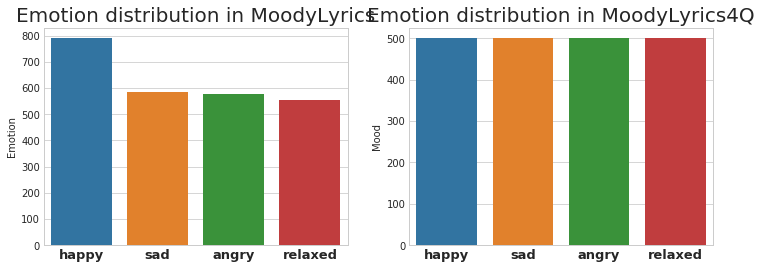

In [11]:
f, axarr = plt.subplots(1, 2, figsize=(12,4))
emotionDistribution = moodyLyricsDF.Emotion.value_counts()
ax = sns.barplot(x=np.array(range(4)),y=emotionDistribution, ax = axarr[0])
ax.set_title('Emotion distribution in MoodyLyrics',fontsize=20)
ax.set_xticklabels(emotion_labels,fontsize=13, fontweight='bold')

emotionDistribution = moodyLyrics4qDF.Mood.value_counts()
ax = sns.barplot(x=np.array(range(4)),y=emotionDistribution, ax = axarr[1])
ax.set_title('Emotion distribution in MoodyLyrics4Q',fontsize=20)
ax.set_xticklabels(emotion_labels,fontsize=13, fontweight='bold')
plt.savefig('./Advanced_feature_engineering_pictures/Stats.png')
plt.show()

## Compare size
print('MoodyLyrics4Q size:', len(moodyLyrics4qDF))
print('MoodyLyrics size:',len(moodyLyricsDF))

## Check if MoodyLyrics4q has duplicates as well
duplicatedCheck = moodyLyrics4qDF.groupby(['Artist','Title']).size().reset_index(name='count')
duplicatedRows = duplicatedCheck [(duplicatedCheck ['count']>1)]
print('MoodyLyrics4Q has', duplicatedRows.shape[0], 'duplicates.')

# New features
Starting from MoodyLyrics and MoodyLyrics4Q we are going to create a new dataset with a lot of new features. <br>
<ul>
    <li>**Title_vector**</li>
    <li>**Lyric_vector**</li>
    <li>**%Rhymes**:<br> defined as the percentage of the number of rhymes over the number of total lines. A rhyme is defined as a rhyme between two following lines.</li>
    <li>**%Past_tense_verbs**:<br> defined as the the percentage of the number of past tense verbs over the total number of verbs.</li>
    <li>**%Present_tense_verbs**:<br>  defined as the the percentage of the number of present tense verbs over the total number of verbs.</li>
    <li>**%Future_tense_verbs**:<br>  defined as the the percentage of the number of future tense verbs over the total number of verbs, where future is just will + base form.</li>
    <li>**%ADJ**:<br> Percentage of adjectives over the total number of words.</li>
    <li>**%ADP**:<br> Percentage of adpositions (e.g. in, to, during) over the total number of words.</li>
    <li>**%ADV**:<br> Percentage of adverbs (e.g. very, tomorrow, down, where, there) over the total number of words.</li>
    <li>**%AUX**:<br> Percentage of auxiliaries (e.g. is, has (done), will (do), should (do)) over the total number of words.</li>
    <li>**%INTJ**:<br> Percentage of interjections (e.g. psst, ouch, bravo, hello) over the total number of words.</li>
    <li>**%NOUN**:<br> Percentage of nouns over the total number of words.</li>
    <li>**%NUM**:<br> Percentage of numerals over the total number of words.</li>
    <li>**%PRON**:<br> Percentage of pronouns (e.g. I, you, he, she, myself, themselves, somebody,...) over the total number of words.</li> 
    <li>**%PROPN**:<br> Percentage of proper nouns (e.g. Mary, John) over the total number of words.</li>
    <li>**%PUNCT**:<br> Percentage of puntuctuation (e.g. ., (, ), ?) over the total number of words.</li>
    <li>**%VERB**:<br> Percentage of verbs over the total number of words.</li>
    <li>**Selfish_degree**:<br> Percentage of 'I' pronouns over the total number of pronouns</li>
    <li>**%Echoism**:<br> Percentage of echoism over the total number of words, where an echoism is either a sequence of two subsequent repeated words or the repetition of a vowel in a word. </li>
    <li>**%Duplicates**:<br> Percentage of duplicate words over the total number of words</li>
    <li>**isTitleInLyric**:<br> Boolean, true if the title string is also a substring of the lyric</li>
    <li>**sentiment**:<br> Sentiment between -1 and 1</li>
    <li>**subjectivity degree**:<br> Degree of subjectivity of the text</li>
</ul>

The sentiment and subjectivity analysis was done using [TextBlob](http://textblob.readthedocs.io/en/dev/index.html) Python NLP library.

## Feature Analysis

We already featurized the songs in MoodyLyrics and in MoodyLyrics4Q using the script that can be found at `./src/song_featurized.py`. We saved the resulting datasets in `./src/datasets/moodylyrics4q_featurized.csv` and in `./src/dataset/moodylyrics_featurized.csv`. <br>
Here we will build a model using both datasets. This behavior can be changed setting `use_both  = False` (in this case we'll use MoodyLyrics4Q alone.  

In [15]:
use_both = False
moodyLyrics4q_F = pd.read_csv('../src/datasets/MoodyLyrics4Q_featurized.csv')
if use_both:
    print('Merging moodyLyrics and moodyLyrcs4Q...')
    moodyLyrics_F = pd.read_csv('../src/datasets/MoodyLyrics_featurized.csv')
    total_len = len(moodyLyrics4q_F ) + len(moodyLyrics_F )
    dataset = pd.concat([moodyLyrics4q_F , moodyLyrics_F])
    dataset.drop_duplicates(['ARTIST', 'SONG_TITLE'], inplace=True)
    print('Deleted duplicated songs: ',total_len - len(dataset))
else: 
    dataset = moodyLyrics4q_F
print('Final dataset shape:',dataset.shape)
print('*'*50)
print('Final dataset header: ', dataset.columns)

Final dataset shape: (1935, 38)
**************************************************
Final dataset header:  Index(['Unnamed: 0', 'ID', 'ARTIST', 'SONG_TITLE', 'LYRICS_VECTOR',
       'TITLE_VECTOR', 'LINE_COUNT', 'WORD_COUNT', 'ECHOISMS',
       'SELFISH_DEGREE', 'DUPLICATE_LINES', 'IS_TITLE_IN_LYRICS', 'RHYMES',
       'VERB_PRESENT', 'VERB_PAST', 'VERB_FUTURE', 'ADJ_FREQUENCIES',
       'CONJUCTION_FREQUENCIES', 'ADV_FREQUENCIES', 'AUX_FREQUENCIES',
       'CONJ_FREQUENCIES', 'CCONJ_FREQUENCIES', 'DETERMINER_FREQUENCIES',
       'INTERJECTION_FREQUENCIES', 'NOUN_FREQUENCIES', 'NUM_FREQUENCIES',
       'PART_FREQUENCIES', 'PRON_FREQUENCIES', 'PROPN_FREQUENCIES',
       'PUNCT_FREQUENCIES', 'SCONJ_FREQUENCIES', 'SYM_FREQUENCIES',
       'VERB_FREQUENCIES', 'X_FREQUENCIES', 'SPACE_FREQUENCIES', 'SENTIMENT',
       'SUBJECTIVITY', 'EMOTION'],
      dtype='object')


In the following cell we want to analyse the distribution of each variable.<br>
There are some features that we find useless for this analysis, i.e. `ID`, `ARTIST`, `SONG_TITLE`, `EMOTION`, while there are some other features we don't want to use in our classification task, i.e. `X_FREQUENCIES` and `SPACE_FREQUENCIES`. <br>
So the first step before this analysis is to drop all these columns.

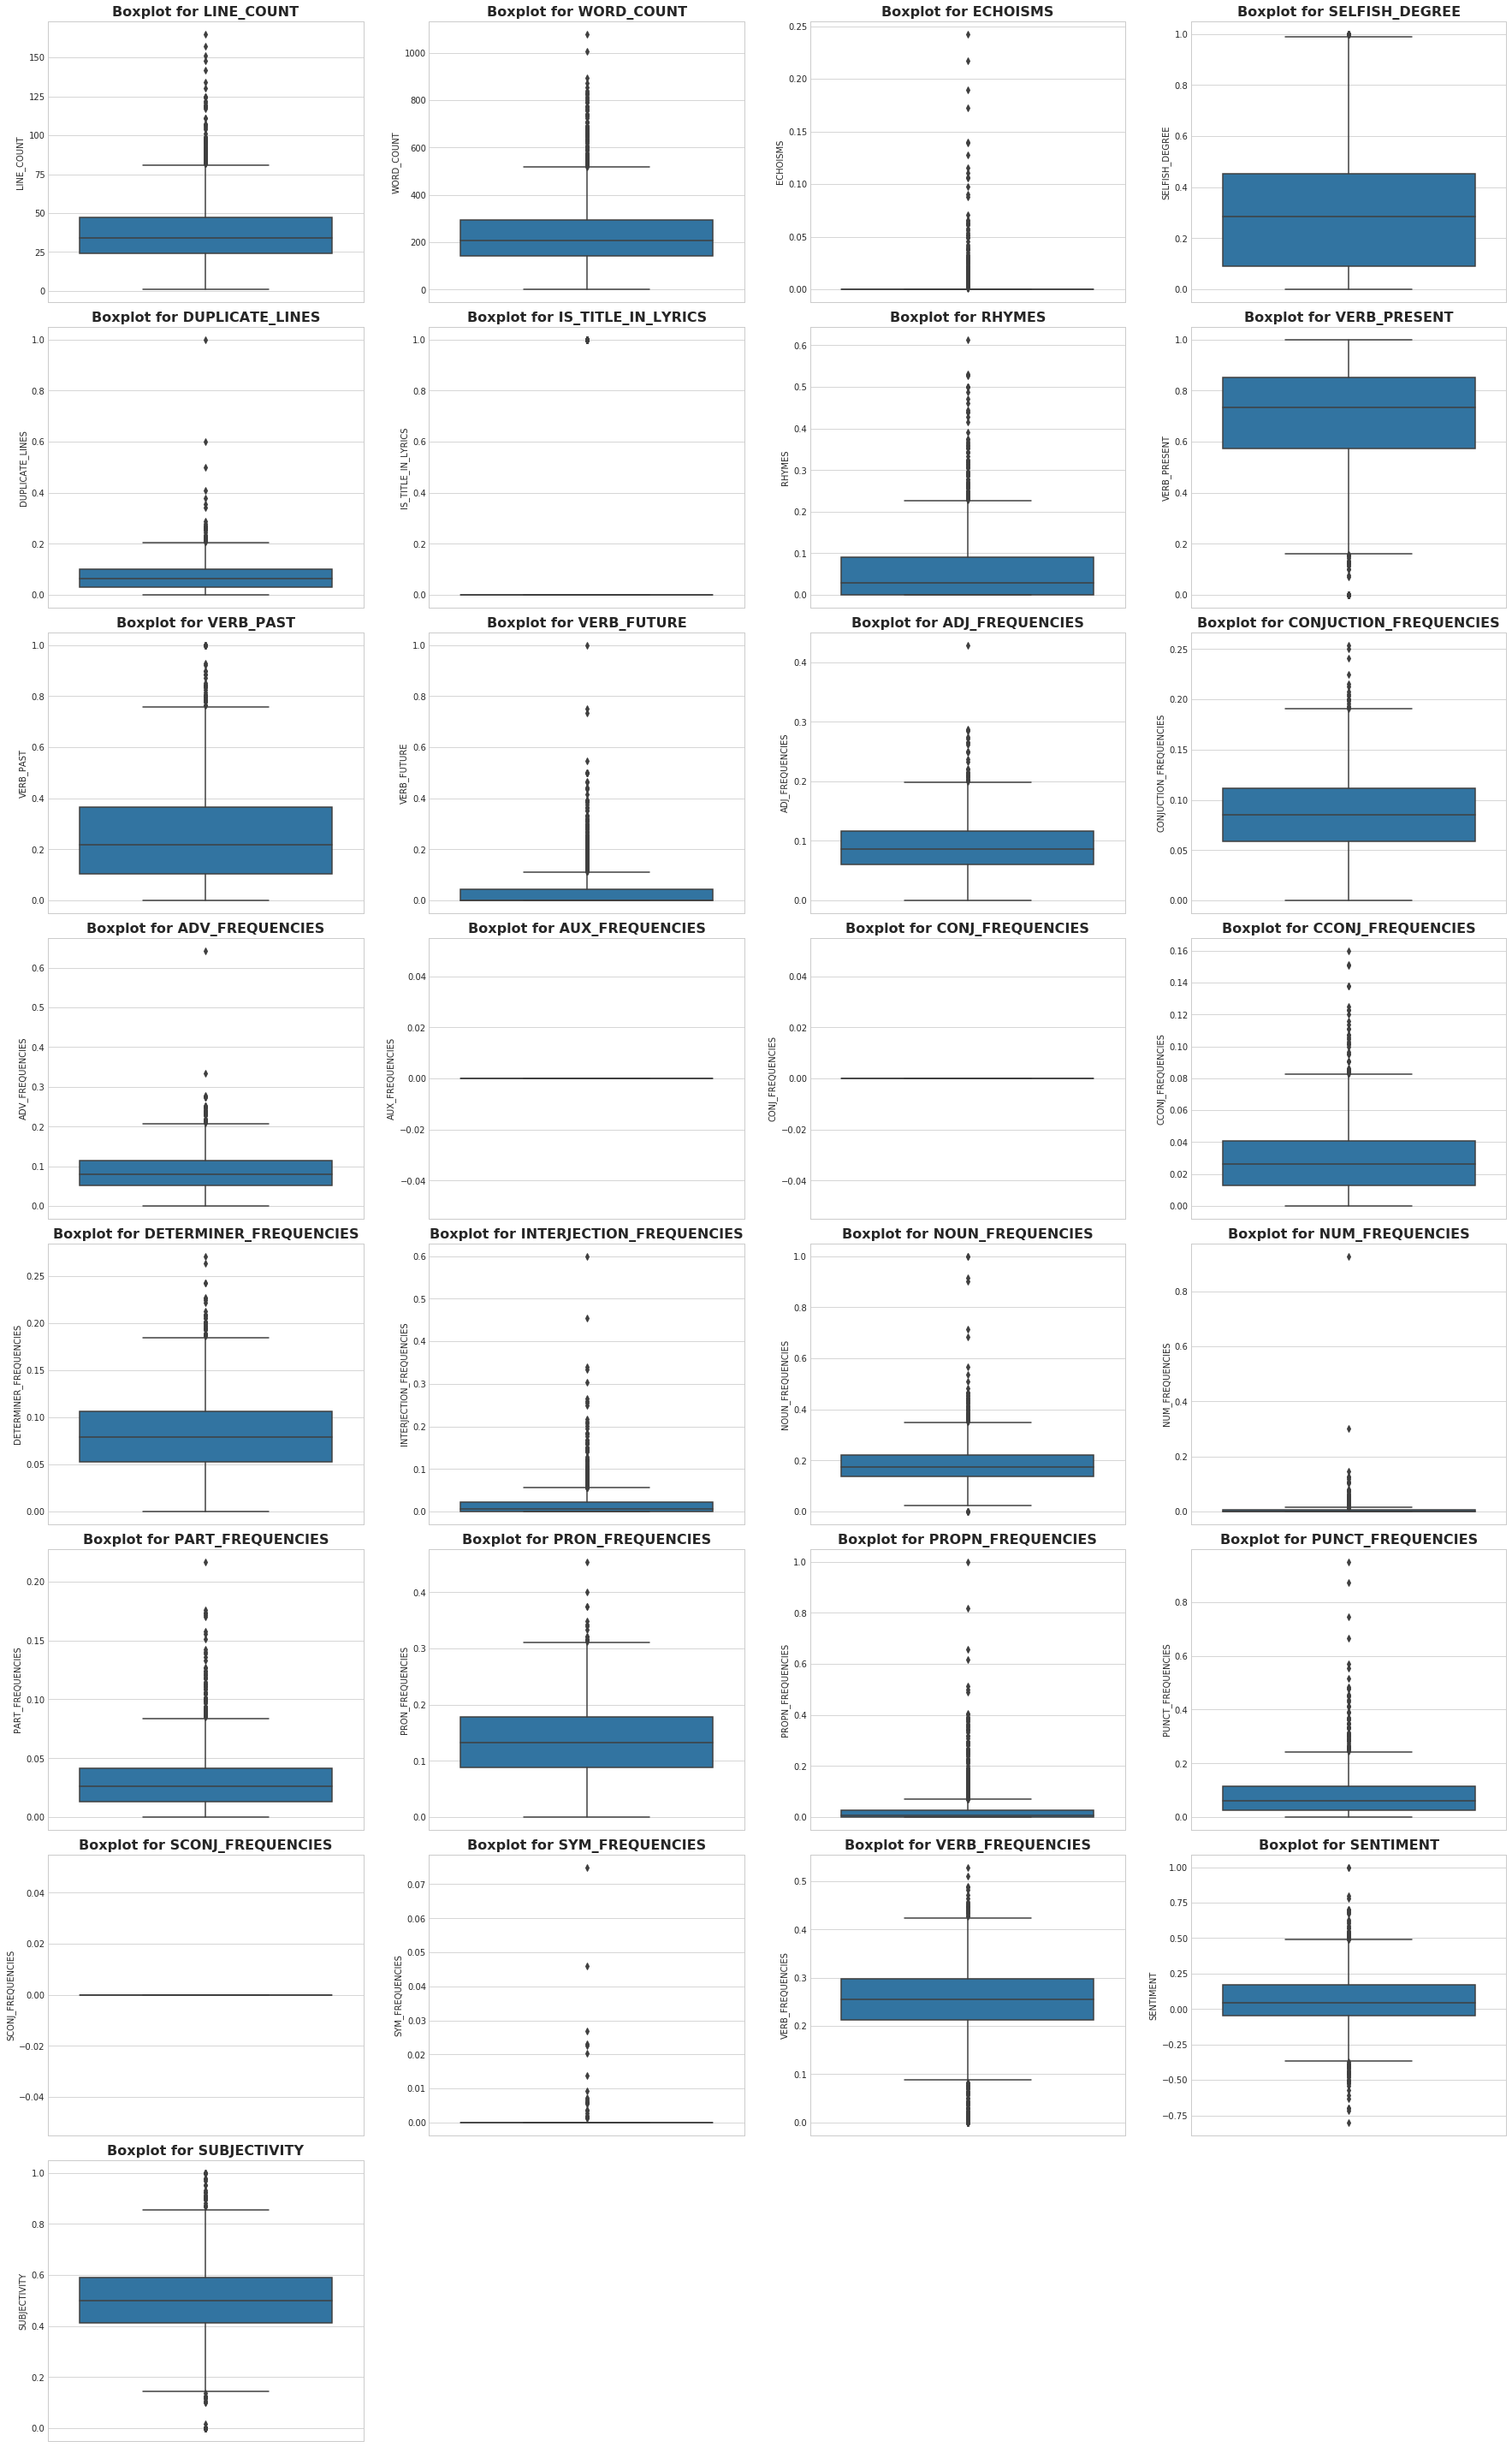

In [37]:
useless_columns = [ 'Unnamed: 0','ID','ARTIST', 'SONG_TITLE', 'EMOTION', 'X_FREQUENCIES', 'SPACE_FREQUENCIES']
tmp_df = dataset.drop(useless_columns + ['LYRICS_VECTOR', 'TITLE_VECTOR'],axis=1)

f, axarr = plt.subplots(8, 4, figsize=(25,40))
k = 0
for feature in tmp_df.columns:
    (i, j) = divmod(k, 4)
    axarr[i,j] = sns.boxplot(y=tmp_df[feature], ax=axarr[i,j])
    axarr[i,j].set_title('Boxplot for {}'.format(feature), fontsize=16, weight='bold')
    k += 1
plt.tight_layout()
f.delaxes(axarr[-1,-1])
f.delaxes(axarr[-1,-2])
f.delaxes(axarr[-1,-3])

## Feature Selection

In this section we want to select the most important feature for our classification.<br>
The final selection is the result of a lot trials that we don't want to show for the sake of brevity.

In [12]:
selected_columns = [
   'LYRICS_VECTOR',
   #'WORD_COUNT', 
   'ECHOISMS',
   #'SELFISH_DEGREE', 
   'DUPLICATE_LINES', 'IS_TITLE_IN_LYRICS', 
   'VERB_PRESENT', 
   'VERB_PAST', 'VERB_FUTURE', 'ADJ_FREQUENCIES',
   'PUNCT_FREQUENCIES',
   'SENTIMENT', 'SUBJECTIVITY',
   'EMOTION'
]

In [16]:
'''
Function to get X and y of the correct shape. The function mainly transforms the lyrics array 
feature into 300 separate features. 
 X = (..., 310)
 y = (...,)
'''
def get_X_y(dataset, emotion=True):
    if emotion is True:
        tmp_df = dataset.drop(['EMOTION'], axis=1)
    else:
        tmp_df = dataset
    X = list()
    for (i, row) in tmp_df.iterrows():
        sub_list = list()
        for field in row:
            if type(field) == str:
                field = field[1:-1].split()
                sub_list += [float(x.replace('\n','')) for x in field]
            else:
                sub_list.append(field)
        X.append(np.array(sub_list))
    X = np.array(X)
    if emotion is True:
        y = dataset['EMOTION'].as_matrix().T
        return X, y
    else:
        return X

In [17]:
# Reduced dataset and extra_test
r_dataset = dataset[selected_columns]
r_extra_test = extra_test[selected_columns]

X, y = get_X_y(r_dataset)
X_extra_test, y_extra_test = get_X_y(r_extra_test)

In [18]:
print('X shape:', X.shape)
print('y shape:',y.shape)
print('X_extra_test shape:', X_extra_test.shape)
print('y_extra_test shape:',y_extra_test.shape)

X shape: (1935, 310)
y shape: (1935,)
X_extra_test shape: (20, 310)
y_extra_test shape: (20,)


### PCA on MoodyLyrics4Q

Here I will try to project MoodyLyrics4Q lyrics vectors on a 2-dimensional space to see if the arousal-valance classification actually makes the lyrics content very separated in 4 distinct clusters.

In [19]:
from sklearn.decomposition import PCA

def pca(x, n_components):
    pca = PCA(n_components=n_components)
    return pca.fit_transform(x)

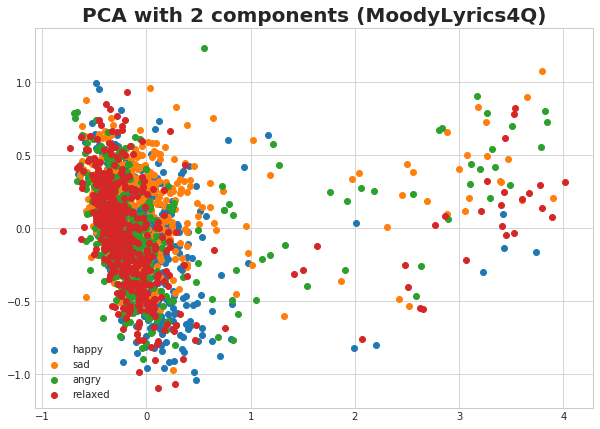

In [20]:
if not use_both:
    # Reduced dataset and extra_test
    r1_dataset = dataset[['LYRICS_VECTOR', 'EMOTION']]

    X1, y1 = get_X_y(r1_dataset)

    components = pca(X1, 2)

    # Put reduced components and labels together for plotting
    encoder = LabelEncoder()
    pca_y = encoder.fit_transform(y)

    comps = list(zip(components, pca_y))
    pca_df = pd.DataFrame(comps, columns=['Vector', 'Emotion'])
    
    # Plot points for each class
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 7)
    for i in range(4):
        emo_df = pca_df[pca_df['Emotion'] == i]
        x = emo_df['Vector'].as_matrix()
        x = np.array([np.array(k) for k in x])
        plt.scatter(x[:,0], x[:,1])
    plt.legend(emotion_labels)
    plt.title('PCA with 2 components (MoodyLyrics4Q)', weight='bold', fontsize=20)
    plt.show()

# Classification

## Artificial Neural Network

### Model

Here we will use an ANN for our classification task. <br>
In the first cell we define the model.

In [62]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
    
from sklearn.utils import class_weight
    
def build_ann(optimizer='adam', input_size=310):
    classifier = Sequential()
    
    # Add input layer
    classifier = Sequential()
    # Add input layer
    classifier.add(Dense(units = 50, kernel_initializer = 'random_normal', activation = 'sigmoid', input_dim = input_size))
    classifier.add(Dropout(0.5))
    
    # Add hidden layers
    #classifier.add(Dense(units = 30, kernel_initializer = 'random_normal', activation = 'sigmoid'))
    #classifier.add(Dropout(0.5))
                
    #classifier.add(Dense(units = 30, kernel_initializer = 'random_normal', activation = 'relu'))
    #classifier.add(Dropout(0.1))
    
        
    # Add output layer
    classifier.add(Dense(units = 4, kernel_initializer = 'glorot_normal', activation = 'softmax'))
    
    # Compiling the ANN
    classifier.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics = ['accuracy'])

    return classifier

Here we will encode y with numerical label and we'll scale X. 

In [63]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
'''
We encode y (i.e. angry, happy, sad, relaxed) into numerical label (0,1,2,3) and 
then into dummy variables... e.g. 0 0 1 0 instead of 2. 
and we scale X with a standard scaler
'''

encoder = LabelEncoder()
y_nn = np_utils.to_categorical(encoder.fit_transform(y))
sc = StandardScaler()
X_nn = sc.fit_transform(X)
print('New shapes...')
print('X shape', X_nn.shape)
print('y shape', y_nn.shape)

X_train, X_test, y_train, y_test = train_test_split(X_nn, y_nn, test_size = 0.1, random_state = 13)
emotion_labels = encoder.inverse_transform([0, 1, 2, 3])

New shapes...
X shape (1935, 310)
y shape (1935, 4)


/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [38]:
classifier = build_ann('adam', X_train.shape[1])
classifier.fit(X_train, y_train, batch_size = 128, epochs = 100, 
               validation_split=0.2, verbose=False)

### Results

Accuracy score 0.54


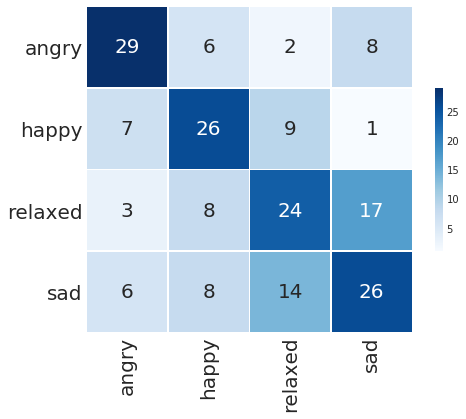

In [39]:
y_pred = classifier.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
y_true = np.argmax(y_test,axis=1)
filename = '../Report/chapters/chapter5/images/CM_ANN.png'
plot_confusion_matrix(y_true, y_pred,'ANN - confusion matrix', emotion_labels, filename)

print('Accuracy score', round(accuracy_score(y_pred,y_true),2))

### Cross Validation

In [65]:
from keras.wrappers.scikit_learn import KerasClassifier

keras_classifier = KerasClassifier(build_fn=build_ann)
parameters = {'batch_size': [128, 256],
              'epochs': [100],
              'optimizer': ['adam', 'nadam'],
              'validation_split': [0.1]}
grid_search = GridSearchCV(estimator = keras_classifier,
                           param_grid = parameters,
                           cv = 10,
                           verbose=False)
grid_search = grid_search.fit(X_nn, y_nn)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
best_classifier = grid_search.best_estimator_
print(best_parameters)
print('Accuracy: %0.2f' % (best_accuracy*100))

Train on 1566 samples, validate on 175 samples
Epoch 1/200
1566/1566 [==============================] - 4s 2ms/step - loss: 1.4990 - acc: 0.2803 - val_loss: 1.2364 - val_acc: 0.4400
Epoch 2/200
1566/1566 [==============================] - 0s 49us/step - loss: 1.3240 - acc: 0.3799 - val_loss: 1.1513 - val_acc: 0.5714
Epoch 3/200
1566/1566 [==============================] - 0s 51us/step - loss: 1.2809 - acc: 0.3940 - val_loss: 1.1002 - val_acc: 0.6114
Epoch 4/200
1566/1566 [==============================] - 0s 46us/step - loss: 1.2212 - acc: 0.4361 - val_loss: 1.0681 - val_acc: 0.6057
Epoch 5/200
1566/1566 [==============================] - 0s 44us/step - loss: 1.1920 - acc: 0.4655 - val_loss: 1.0347 - val_acc: 0.6400
Epoch 6/200
1566/1566 [==============================] - 0s 47us/step - loss: 1.1702 - acc: 0.4872 - val_loss: 1.0117 - val_acc: 0.6686
Epoch 7/200
1566/1566 [==============================] - 0s 48us/step - loss: 1.1471 - acc: 0.4981 - val_loss: 0.9939 - val_acc: 0.6686
Ep

1566/1566 [==============================] - 0s 46us/step - loss: 0.8335 - acc: 0.6552 - val_loss: 0.8964 - val_acc: 0.6686
Epoch 61/200
1566/1566 [==============================] - 0s 45us/step - loss: 0.8413 - acc: 0.6469 - val_loss: 0.8955 - val_acc: 0.6629
Epoch 62/200
1566/1566 [==============================] - 0s 47us/step - loss: 0.8323 - acc: 0.6584 - val_loss: 0.8917 - val_acc: 0.6743
Epoch 63/200
1566/1566 [==============================] - 0s 39us/step - loss: 0.8178 - acc: 0.6667 - val_loss: 0.8887 - val_acc: 0.6629
Epoch 64/200
1566/1566 [==============================] - 0s 40us/step - loss: 0.8412 - acc: 0.6654 - val_loss: 0.8904 - val_acc: 0.6629
Epoch 65/200
1566/1566 [==============================] - 0s 43us/step - loss: 0.8077 - acc: 0.6558 - val_loss: 0.8899 - val_acc: 0.6629
Epoch 66/200
1566/1566 [==============================] - 0s 39us/step - loss: 0.8180 - acc: 0.6705 - val_loss: 0.8884 - val_acc: 0.6457
Epoch 67/200
1566/1566 [==============================

Epoch 120/200
1566/1566 [==============================] - 0s 45us/step - loss: 0.7208 - acc: 0.7126 - val_loss: 0.9247 - val_acc: 0.6400
Epoch 121/200
1566/1566 [==============================] - 0s 39us/step - loss: 0.7344 - acc: 0.6999 - val_loss: 0.9287 - val_acc: 0.6571
Epoch 122/200
1566/1566 [==============================] - 0s 41us/step - loss: 0.7451 - acc: 0.6871 - val_loss: 0.9377 - val_acc: 0.6400
Epoch 123/200
1566/1566 [==============================] - 0s 51us/step - loss: 0.7403 - acc: 0.7082 - val_loss: 0.9407 - val_acc: 0.6400
Epoch 124/200
1566/1566 [==============================] - 0s 41us/step - loss: 0.7134 - acc: 0.7235 - val_loss: 0.9300 - val_acc: 0.6343
Epoch 125/200
1566/1566 [==============================] - 0s 39us/step - loss: 0.7347 - acc: 0.7063 - val_loss: 0.9194 - val_acc: 0.6400
Epoch 126/200
1566/1566 [==============================] - 0s 38us/step - loss: 0.7178 - acc: 0.7037 - val_loss: 0.9243 - val_acc: 0.6457
Epoch 127/200
1566/1566 [=========

1566/1566 [==============================] - 0s 47us/step - loss: 0.6408 - acc: 0.7407 - val_loss: 0.9789 - val_acc: 0.6400
Epoch 180/200
1566/1566 [==============================] - 0s 42us/step - loss: 0.6329 - acc: 0.7503 - val_loss: 0.9792 - val_acc: 0.6514
Epoch 181/200
1566/1566 [==============================] - 0s 39us/step - loss: 0.6468 - acc: 0.7427 - val_loss: 0.9836 - val_acc: 0.6400
Epoch 182/200
1566/1566 [==============================] - 0s 38us/step - loss: 0.6387 - acc: 0.7401 - val_loss: 0.9815 - val_acc: 0.6457
Epoch 183/200
1566/1566 [==============================] - 0s 50us/step - loss: 0.6376 - acc: 0.7458 - val_loss: 0.9863 - val_acc: 0.6629
Epoch 184/200
1566/1566 [==============================] - 0s 43us/step - loss: 0.6319 - acc: 0.7567 - val_loss: 0.9912 - val_acc: 0.6400
Epoch 185/200
1566/1566 [==============================] - 0s 47us/step - loss: 0.6177 - acc: 0.7465 - val_loss: 0.9980 - val_acc: 0.6400
Epoch 186/200
1566/1566 [=======================

1566/1566 [==============================] - 0s 48us/step - loss: 0.8615 - acc: 0.6526 - val_loss: 0.8778 - val_acc: 0.6514
Epoch 38/200
1566/1566 [==============================] - 0s 50us/step - loss: 0.8752 - acc: 0.6379 - val_loss: 0.8773 - val_acc: 0.6400
Epoch 39/200
1566/1566 [==============================] - 0s 39us/step - loss: 0.8800 - acc: 0.6405 - val_loss: 0.8771 - val_acc: 0.6400
Epoch 40/200
1566/1566 [==============================] - 0s 39us/step - loss: 0.8789 - acc: 0.6469 - val_loss: 0.8775 - val_acc: 0.6457
Epoch 41/200
1566/1566 [==============================] - 0s 38us/step - loss: 0.8641 - acc: 0.6481 - val_loss: 0.8746 - val_acc: 0.6457
Epoch 42/200
1566/1566 [==============================] - 0s 40us/step - loss: 0.8638 - acc: 0.6347 - val_loss: 0.8762 - val_acc: 0.6400
Epoch 43/200
1566/1566 [==============================] - 0s 40us/step - loss: 0.8588 - acc: 0.6520 - val_loss: 0.8783 - val_acc: 0.6514
Epoch 44/200
1566/1566 [==============================

Epoch 97/200
1566/1566 [==============================] - 0s 38us/step - loss: 0.7614 - acc: 0.6826 - val_loss: 0.9058 - val_acc: 0.6514
Epoch 98/200
1566/1566 [==============================] - 0s 46us/step - loss: 0.7390 - acc: 0.7043 - val_loss: 0.9059 - val_acc: 0.6514
Epoch 99/200
1566/1566 [==============================] - 0s 56us/step - loss: 0.7468 - acc: 0.6999 - val_loss: 0.9103 - val_acc: 0.6571
Epoch 100/200
1566/1566 [==============================] - 0s 38us/step - loss: 0.7474 - acc: 0.6967 - val_loss: 0.9059 - val_acc: 0.6457
Epoch 101/200
1566/1566 [==============================] - 0s 40us/step - loss: 0.7141 - acc: 0.7056 - val_loss: 0.9117 - val_acc: 0.6571
Epoch 102/200
1566/1566 [==============================] - 0s 38us/step - loss: 0.7401 - acc: 0.7031 - val_loss: 0.9153 - val_acc: 0.6343
Epoch 103/200
1566/1566 [==============================] - 0s 40us/step - loss: 0.7347 - acc: 0.6960 - val_loss: 0.9132 - val_acc: 0.6343
Epoch 104/200
1566/1566 [============

1566/1566 [==============================] - 0s 45us/step - loss: 0.6429 - acc: 0.7356 - val_loss: 0.9684 - val_acc: 0.6000
Epoch 157/200
1566/1566 [==============================] - 0s 62us/step - loss: 0.6661 - acc: 0.7299 - val_loss: 0.9665 - val_acc: 0.6057
Epoch 158/200
1566/1566 [==============================] - 0s 39us/step - loss: 0.6643 - acc: 0.7369 - val_loss: 0.9707 - val_acc: 0.6114
Epoch 159/200
1566/1566 [==============================] - 0s 42us/step - loss: 0.6553 - acc: 0.7478 - val_loss: 0.9739 - val_acc: 0.5943
Epoch 160/200
1566/1566 [==============================] - 0s 42us/step - loss: 0.6457 - acc: 0.7522 - val_loss: 0.9736 - val_acc: 0.6114
Epoch 161/200
1566/1566 [==============================] - 0s 39us/step - loss: 0.6587 - acc: 0.7427 - val_loss: 0.9764 - val_acc: 0.6171
Epoch 162/200
1566/1566 [==============================] - 0s 43us/step - loss: 0.6435 - acc: 0.7427 - val_loss: 0.9737 - val_acc: 0.6057
Epoch 163/200
1566/1566 [=======================

1566/1566 [==============================] - 0s 45us/step - loss: 1.0092 - acc: 0.5734 - val_loss: 0.9544 - val_acc: 0.6400
Epoch 15/200
1566/1566 [==============================] - 0s 47us/step - loss: 0.9869 - acc: 0.5760 - val_loss: 0.9535 - val_acc: 0.6286
Epoch 16/200
1566/1566 [==============================] - 0s 39us/step - loss: 1.0076 - acc: 0.5600 - val_loss: 0.9464 - val_acc: 0.6457
Epoch 17/200
1566/1566 [==============================] - 0s 49us/step - loss: 0.9769 - acc: 0.5977 - val_loss: 0.9416 - val_acc: 0.6286
Epoch 18/200
1566/1566 [==============================] - 0s 45us/step - loss: 0.9761 - acc: 0.5766 - val_loss: 0.9365 - val_acc: 0.6400
Epoch 19/200
1566/1566 [==============================] - 0s 41us/step - loss: 0.9683 - acc: 0.5773 - val_loss: 0.9354 - val_acc: 0.6229
Epoch 20/200
1566/1566 [==============================] - 0s 40us/step - loss: 0.9627 - acc: 0.5868 - val_loss: 0.9321 - val_acc: 0.6229
Epoch 21/200
1566/1566 [==============================

Epoch 74/200
1566/1566 [==============================] - 0s 41us/step - loss: 0.8029 - acc: 0.6667 - val_loss: 0.9250 - val_acc: 0.6171
Epoch 75/200
1566/1566 [==============================] - 0s 45us/step - loss: 0.8032 - acc: 0.6622 - val_loss: 0.9199 - val_acc: 0.6171
Epoch 76/200
1566/1566 [==============================] - 0s 46us/step - loss: 0.7978 - acc: 0.6711 - val_loss: 0.9230 - val_acc: 0.6229
Epoch 77/200
1566/1566 [==============================] - 0s 49us/step - loss: 0.7909 - acc: 0.6788 - val_loss: 0.9244 - val_acc: 0.6171
Epoch 78/200
1566/1566 [==============================] - 0s 52us/step - loss: 0.7874 - acc: 0.6814 - val_loss: 0.9255 - val_acc: 0.6171
Epoch 79/200
1566/1566 [==============================] - 0s 47us/step - loss: 0.8075 - acc: 0.6596 - val_loss: 0.9199 - val_acc: 0.6114
Epoch 80/200
1566/1566 [==============================] - 0s 53us/step - loss: 0.7970 - acc: 0.6858 - val_loss: 0.9225 - val_acc: 0.6171
Epoch 81/200
1566/1566 [=================

1566/1566 [==============================] - 0s 48us/step - loss: 0.6976 - acc: 0.7165 - val_loss: 0.9640 - val_acc: 0.6114
Epoch 134/200
1566/1566 [==============================] - 0s 45us/step - loss: 0.7047 - acc: 0.7146 - val_loss: 0.9686 - val_acc: 0.6229
Epoch 135/200
1566/1566 [==============================] - 0s 46us/step - loss: 0.7005 - acc: 0.7133 - val_loss: 0.9676 - val_acc: 0.6229
Epoch 136/200
1566/1566 [==============================] - 0s 45us/step - loss: 0.6978 - acc: 0.7126 - val_loss: 0.9633 - val_acc: 0.6286
Epoch 137/200
1566/1566 [==============================] - 0s 44us/step - loss: 0.7176 - acc: 0.7088 - val_loss: 0.9610 - val_acc: 0.6457
Epoch 138/200
1566/1566 [==============================] - 0s 48us/step - loss: 0.6946 - acc: 0.6999 - val_loss: 0.9614 - val_acc: 0.6400
Epoch 139/200
1566/1566 [==============================] - 0s 46us/step - loss: 0.6881 - acc: 0.7222 - val_loss: 0.9578 - val_acc: 0.6229
Epoch 140/200
1566/1566 [=======================

1566/1566 [==============================] - 0s 45us/step - loss: 0.6270 - acc: 0.7561 - val_loss: 1.0292 - val_acc: 0.6457
Epoch 193/200
1566/1566 [==============================] - 0s 41us/step - loss: 0.6219 - acc: 0.7599 - val_loss: 1.0308 - val_acc: 0.6457
Epoch 194/200
1566/1566 [==============================] - 0s 43us/step - loss: 0.6307 - acc: 0.7503 - val_loss: 1.0317 - val_acc: 0.6571
Epoch 195/200
1566/1566 [==============================] - 0s 46us/step - loss: 0.6048 - acc: 0.7580 - val_loss: 1.0335 - val_acc: 0.6400
Epoch 196/200
1566/1566 [==============================] - 0s 45us/step - loss: 0.5823 - acc: 0.7752 - val_loss: 1.0320 - val_acc: 0.6514
Epoch 197/200
1566/1566 [==============================] - 0s 49us/step - loss: 0.6097 - acc: 0.7542 - val_loss: 1.0313 - val_acc: 0.6400
Epoch 198/200
1566/1566 [==============================] - 0s 51us/step - loss: 0.6137 - acc: 0.7586 - val_loss: 1.0286 - val_acc: 0.6514
Epoch 199/200
1566/1566 [=======================

Epoch 51/200
1566/1566 [==============================] - 0s 45us/step - loss: 0.8360 - acc: 0.6507 - val_loss: 0.8927 - val_acc: 0.6686
Epoch 52/200
1566/1566 [==============================] - 0s 45us/step - loss: 0.8510 - acc: 0.6577 - val_loss: 0.8911 - val_acc: 0.6800
Epoch 53/200
1566/1566 [==============================] - 0s 46us/step - loss: 0.8578 - acc: 0.6507 - val_loss: 0.8911 - val_acc: 0.6629
Epoch 54/200
1566/1566 [==============================] - 0s 40us/step - loss: 0.8390 - acc: 0.6584 - val_loss: 0.8935 - val_acc: 0.6743
Epoch 55/200
1566/1566 [==============================] - 0s 51us/step - loss: 0.8452 - acc: 0.6539 - val_loss: 0.8925 - val_acc: 0.6629
Epoch 56/200
1566/1566 [==============================] - 0s 44us/step - loss: 0.8391 - acc: 0.6526 - val_loss: 0.8925 - val_acc: 0.6629
Epoch 57/200
1566/1566 [==============================] - 0s 47us/step - loss: 0.8237 - acc: 0.6564 - val_loss: 0.8960 - val_acc: 0.6629
Epoch 58/200
1566/1566 [=================

Epoch 111/200
1566/1566 [==============================] - 0s 47us/step - loss: 0.7164 - acc: 0.7101 - val_loss: 0.9358 - val_acc: 0.6857
Epoch 112/200
1566/1566 [==============================] - 0s 53us/step - loss: 0.7443 - acc: 0.6954 - val_loss: 0.9365 - val_acc: 0.6971
Epoch 113/200
1566/1566 [==============================] - 0s 46us/step - loss: 0.7319 - acc: 0.7024 - val_loss: 0.9414 - val_acc: 0.6800
Epoch 114/200
1566/1566 [==============================] - 0s 45us/step - loss: 0.7353 - acc: 0.6903 - val_loss: 0.9445 - val_acc: 0.6800
Epoch 115/200
1566/1566 [==============================] - 0s 43us/step - loss: 0.7409 - acc: 0.6903 - val_loss: 0.9438 - val_acc: 0.6800
Epoch 116/200
1566/1566 [==============================] - 0s 44us/step - loss: 0.7220 - acc: 0.6960 - val_loss: 0.9411 - val_acc: 0.6914
Epoch 117/200
1566/1566 [==============================] - 0s 46us/step - loss: 0.7199 - acc: 0.7095 - val_loss: 0.9414 - val_acc: 0.6800
Epoch 118/200
1566/1566 [=========

1566/1566 [==============================] - 0s 45us/step - loss: 0.6626 - acc: 0.7286 - val_loss: 1.0122 - val_acc: 0.6514
Epoch 171/200
1566/1566 [==============================] - 0s 43us/step - loss: 0.6763 - acc: 0.7267 - val_loss: 1.0071 - val_acc: 0.6629
Epoch 172/200
1566/1566 [==============================] - 0s 39us/step - loss: 0.6636 - acc: 0.7299 - val_loss: 1.0054 - val_acc: 0.6629
Epoch 173/200
1566/1566 [==============================] - 0s 40us/step - loss: 0.6394 - acc: 0.7420 - val_loss: 1.0040 - val_acc: 0.6457
Epoch 174/200
1566/1566 [==============================] - 0s 43us/step - loss: 0.6318 - acc: 0.7369 - val_loss: 1.0066 - val_acc: 0.6400
Epoch 175/200
1566/1566 [==============================] - 0s 39us/step - loss: 0.6518 - acc: 0.7337 - val_loss: 1.0098 - val_acc: 0.6514
Epoch 176/200
1566/1566 [==============================] - 0s 40us/step - loss: 0.6573 - acc: 0.7382 - val_loss: 1.0070 - val_acc: 0.6457
Epoch 177/200
1566/1566 [=======================

1566/1566 [==============================] - 0s 52us/step - loss: 0.9302 - acc: 0.6079 - val_loss: 0.8843 - val_acc: 0.6914
Epoch 29/200
1566/1566 [==============================] - 0s 49us/step - loss: 0.9170 - acc: 0.6137 - val_loss: 0.8870 - val_acc: 0.6857
Epoch 30/200
1566/1566 [==============================] - 0s 38us/step - loss: 0.9132 - acc: 0.6245 - val_loss: 0.8871 - val_acc: 0.6800
Epoch 31/200
1566/1566 [==============================] - 0s 44us/step - loss: 0.9438 - acc: 0.6034 - val_loss: 0.8911 - val_acc: 0.6857
Epoch 32/200
1566/1566 [==============================] - 0s 40us/step - loss: 0.9093 - acc: 0.6245 - val_loss: 0.8879 - val_acc: 0.6800
Epoch 33/200
1566/1566 [==============================] - 0s 38us/step - loss: 0.9244 - acc: 0.6111 - val_loss: 0.8892 - val_acc: 0.6743
Epoch 34/200
1566/1566 [==============================] - 0s 39us/step - loss: 0.9240 - acc: 0.6060 - val_loss: 0.8885 - val_acc: 0.6800
Epoch 35/200
1566/1566 [==============================

Epoch 88/200
1566/1566 [==============================] - 0s 47us/step - loss: 0.7628 - acc: 0.6916 - val_loss: 0.9209 - val_acc: 0.6629
Epoch 89/200
1566/1566 [==============================] - 0s 40us/step - loss: 0.7467 - acc: 0.6967 - val_loss: 0.9139 - val_acc: 0.6686
Epoch 90/200
1566/1566 [==============================] - 0s 42us/step - loss: 0.7730 - acc: 0.6782 - val_loss: 0.9092 - val_acc: 0.6743
Epoch 91/200
1566/1566 [==============================] - 0s 40us/step - loss: 0.7661 - acc: 0.6909 - val_loss: 0.9051 - val_acc: 0.6800
Epoch 92/200
1566/1566 [==============================] - 0s 53us/step - loss: 0.7683 - acc: 0.7018 - val_loss: 0.9060 - val_acc: 0.6914
Epoch 93/200
1566/1566 [==============================] - 0s 49us/step - loss: 0.7539 - acc: 0.6973 - val_loss: 0.9075 - val_acc: 0.6629
Epoch 94/200
1566/1566 [==============================] - 0s 50us/step - loss: 0.7780 - acc: 0.6865 - val_loss: 0.9070 - val_acc: 0.6743
Epoch 95/200
1566/1566 [=================

1566/1566 [==============================] - 0s 45us/step - loss: 0.6682 - acc: 0.7305 - val_loss: 0.9663 - val_acc: 0.6457
Epoch 148/200
1566/1566 [==============================] - 0s 49us/step - loss: 0.6689 - acc: 0.7229 - val_loss: 0.9700 - val_acc: 0.6514
Epoch 149/200
1566/1566 [==============================] - 0s 47us/step - loss: 0.6741 - acc: 0.7261 - val_loss: 0.9704 - val_acc: 0.6457
Epoch 150/200
1566/1566 [==============================] - 0s 43us/step - loss: 0.6641 - acc: 0.7382 - val_loss: 0.9708 - val_acc: 0.6571
Epoch 151/200
1566/1566 [==============================] - 0s 44us/step - loss: 0.6881 - acc: 0.7158 - val_loss: 0.9748 - val_acc: 0.6457
Epoch 152/200
1566/1566 [==============================] - 0s 47us/step - loss: 0.6686 - acc: 0.7216 - val_loss: 0.9691 - val_acc: 0.6629
Epoch 153/200
1566/1566 [==============================] - 0s 47us/step - loss: 0.6881 - acc: 0.7222 - val_loss: 0.9685 - val_acc: 0.6629
Epoch 154/200
1566/1566 [=======================

1567/1567 [==============================] - 0s 44us/step - loss: 1.1632 - acc: 0.4863 - val_loss: 1.0465 - val_acc: 0.6286
Epoch 6/200
1567/1567 [==============================] - 0s 44us/step - loss: 1.1560 - acc: 0.4863 - val_loss: 1.0206 - val_acc: 0.6229
Epoch 7/200
1567/1567 [==============================] - 0s 44us/step - loss: 1.1236 - acc: 0.5080 - val_loss: 1.0055 - val_acc: 0.6171
Epoch 8/200
1567/1567 [==============================] - 0s 41us/step - loss: 1.1032 - acc: 0.5150 - val_loss: 0.9953 - val_acc: 0.6343
Epoch 9/200
1567/1567 [==============================] - 0s 38us/step - loss: 1.0786 - acc: 0.5380 - val_loss: 0.9851 - val_acc: 0.6514
Epoch 10/200
1567/1567 [==============================] - 0s 43us/step - loss: 1.0808 - acc: 0.5399 - val_loss: 0.9794 - val_acc: 0.6514
Epoch 11/200
1567/1567 [==============================] - 0s 46us/step - loss: 1.0594 - acc: 0.5341 - val_loss: 0.9719 - val_acc: 0.6571
Epoch 12/200
1567/1567 [==============================] - 

Epoch 65/200
1567/1567 [==============================] - 0s 44us/step - loss: 0.8454 - acc: 0.6605 - val_loss: 0.9098 - val_acc: 0.7029
Epoch 66/200
1567/1567 [==============================] - 0s 41us/step - loss: 0.8120 - acc: 0.6631 - val_loss: 0.9070 - val_acc: 0.6971
Epoch 67/200
1567/1567 [==============================] - 0s 46us/step - loss: 0.8323 - acc: 0.6669 - val_loss: 0.9092 - val_acc: 0.6971
Epoch 68/200
1567/1567 [==============================] - 0s 40us/step - loss: 0.8176 - acc: 0.6701 - val_loss: 0.9170 - val_acc: 0.6914
Epoch 69/200
1567/1567 [==============================] - 0s 41us/step - loss: 0.8259 - acc: 0.6771 - val_loss: 0.9119 - val_acc: 0.6971
Epoch 70/200
1567/1567 [==============================] - 0s 51us/step - loss: 0.8130 - acc: 0.6752 - val_loss: 0.9145 - val_acc: 0.6857
Epoch 71/200
1567/1567 [==============================] - 0s 48us/step - loss: 0.8268 - acc: 0.6656 - val_loss: 0.9106 - val_acc: 0.6971
Epoch 72/200
1567/1567 [=================

1567/1567 [==============================] - 0s 43us/step - loss: 0.7278 - acc: 0.6956 - val_loss: 0.9614 - val_acc: 0.6629
Epoch 125/200
1567/1567 [==============================] - 0s 44us/step - loss: 0.7141 - acc: 0.7103 - val_loss: 0.9510 - val_acc: 0.6743
Epoch 126/200
1567/1567 [==============================] - 0s 43us/step - loss: 0.6983 - acc: 0.7173 - val_loss: 0.9577 - val_acc: 0.6686
Epoch 127/200
1567/1567 [==============================] - 0s 44us/step - loss: 0.7260 - acc: 0.7058 - val_loss: 0.9604 - val_acc: 0.6686
Epoch 128/200
1567/1567 [==============================] - 0s 41us/step - loss: 0.7194 - acc: 0.7020 - val_loss: 0.9630 - val_acc: 0.6629
Epoch 129/200
1567/1567 [==============================] - 0s 49us/step - loss: 0.7133 - acc: 0.7135 - val_loss: 0.9594 - val_acc: 0.6743
Epoch 130/200
1567/1567 [==============================] - 0s 39us/step - loss: 0.6941 - acc: 0.7090 - val_loss: 0.9651 - val_acc: 0.6629
Epoch 131/200
1567/1567 [=======================

1567/1567 [==============================] - 0s 39us/step - loss: 0.6123 - acc: 0.7479 - val_loss: 1.0356 - val_acc: 0.6400
Epoch 184/200
1567/1567 [==============================] - 0s 54us/step - loss: 0.6122 - acc: 0.7473 - val_loss: 1.0357 - val_acc: 0.6514
Epoch 185/200
1567/1567 [==============================] - 0s 53us/step - loss: 0.6086 - acc: 0.7486 - val_loss: 1.0358 - val_acc: 0.6514
Epoch 186/200
1567/1567 [==============================] - 0s 46us/step - loss: 0.6248 - acc: 0.7435 - val_loss: 1.0373 - val_acc: 0.6571
Epoch 187/200
1567/1567 [==============================] - 0s 44us/step - loss: 0.6379 - acc: 0.7428 - val_loss: 1.0223 - val_acc: 0.6457
Epoch 188/200
1567/1567 [==============================] - 0s 40us/step - loss: 0.6179 - acc: 0.7511 - val_loss: 1.0253 - val_acc: 0.6457
Epoch 189/200
1567/1567 [==============================] - 0s 40us/step - loss: 0.6243 - acc: 0.7556 - val_loss: 1.0313 - val_acc: 0.6457
Epoch 190/200
1567/1567 [=======================

1567/1567 [==============================] - 0s 56us/step - loss: 0.8773 - acc: 0.6458 - val_loss: 0.8826 - val_acc: 0.6629
Epoch 42/200
1567/1567 [==============================] - 0s 46us/step - loss: 0.8709 - acc: 0.6209 - val_loss: 0.8763 - val_acc: 0.6514
Epoch 43/200
1567/1567 [==============================] - 0s 72us/step - loss: 0.8587 - acc: 0.6503 - val_loss: 0.8793 - val_acc: 0.6571
Epoch 44/200
1567/1567 [==============================] - 0s 56us/step - loss: 0.8664 - acc: 0.6420 - val_loss: 0.8786 - val_acc: 0.6571
Epoch 45/200
1567/1567 [==============================] - 0s 56us/step - loss: 0.8762 - acc: 0.6388 - val_loss: 0.8786 - val_acc: 0.6686
Epoch 46/200
1567/1567 [==============================] - 0s 49us/step - loss: 0.8498 - acc: 0.6522 - val_loss: 0.8702 - val_acc: 0.6571
Epoch 47/200
1567/1567 [==============================] - 0s 44us/step - loss: 0.8707 - acc: 0.6343 - val_loss: 0.8683 - val_acc: 0.6571
Epoch 48/200
1567/1567 [==============================

Epoch 101/200
1567/1567 [==============================] - 0s 35us/step - loss: 0.7456 - acc: 0.6816 - val_loss: 0.8783 - val_acc: 0.6571
Epoch 102/200
1567/1567 [==============================] - 0s 36us/step - loss: 0.7379 - acc: 0.6994 - val_loss: 0.8789 - val_acc: 0.6571
Epoch 103/200
1567/1567 [==============================] - 0s 59us/step - loss: 0.7317 - acc: 0.7256 - val_loss: 0.8832 - val_acc: 0.6571
Epoch 104/200
1567/1567 [==============================] - 0s 50us/step - loss: 0.7403 - acc: 0.7071 - val_loss: 0.8793 - val_acc: 0.6514
Epoch 105/200
1567/1567 [==============================] - 0s 34us/step - loss: 0.7282 - acc: 0.7039 - val_loss: 0.8816 - val_acc: 0.6571
Epoch 106/200
1567/1567 [==============================] - 0s 40us/step - loss: 0.7368 - acc: 0.6994 - val_loss: 0.8842 - val_acc: 0.6571
Epoch 107/200
1567/1567 [==============================] - 0s 35us/step - loss: 0.7415 - acc: 0.7020 - val_loss: 0.8889 - val_acc: 0.6514
Epoch 108/200
1567/1567 [=========

1567/1567 [==============================] - 0s 64us/step - loss: 0.6384 - acc: 0.7364 - val_loss: 0.9144 - val_acc: 0.6514
Epoch 161/200
1567/1567 [==============================] - 0s 83us/step - loss: 0.6495 - acc: 0.7415 - val_loss: 0.9177 - val_acc: 0.6743
Epoch 162/200
1567/1567 [==============================] - 0s 61us/step - loss: 0.6452 - acc: 0.7473 - val_loss: 0.9196 - val_acc: 0.6571
Epoch 163/200
1567/1567 [==============================] - 0s 66us/step - loss: 0.6430 - acc: 0.7275 - val_loss: 0.9210 - val_acc: 0.6629
Epoch 164/200
1567/1567 [==============================] - 0s 66us/step - loss: 0.6610 - acc: 0.7275 - val_loss: 0.9156 - val_acc: 0.6743
Epoch 165/200
1567/1567 [==============================] - 0s 62us/step - loss: 0.6404 - acc: 0.7403 - val_loss: 0.9211 - val_acc: 0.6629
Epoch 166/200
1567/1567 [==============================] - 0s 35us/step - loss: 0.6446 - acc: 0.7396 - val_loss: 0.9180 - val_acc: 0.6571
Epoch 167/200
1567/1567 [=======================

1567/1567 [==============================] - 0s 36us/step - loss: 0.9851 - acc: 0.5973 - val_loss: 0.9148 - val_acc: 0.6686
Epoch 19/200
1567/1567 [==============================] - 0s 37us/step - loss: 0.9869 - acc: 0.5826 - val_loss: 0.9159 - val_acc: 0.6686
Epoch 20/200
1567/1567 [==============================] - 0s 38us/step - loss: 0.9530 - acc: 0.5992 - val_loss: 0.9218 - val_acc: 0.6629
Epoch 21/200
1567/1567 [==============================] - 0s 54us/step - loss: 0.9620 - acc: 0.5903 - val_loss: 0.9166 - val_acc: 0.6629
Epoch 22/200
1567/1567 [==============================] - 0s 34us/step - loss: 0.9623 - acc: 0.6037 - val_loss: 0.9085 - val_acc: 0.6571
Epoch 23/200
1567/1567 [==============================] - 0s 38us/step - loss: 0.9453 - acc: 0.6050 - val_loss: 0.9066 - val_acc: 0.6686
Epoch 24/200
1567/1567 [==============================] - 0s 36us/step - loss: 0.9592 - acc: 0.5929 - val_loss: 0.9074 - val_acc: 0.6743
Epoch 25/200
1567/1567 [==============================

Epoch 78/200
1567/1567 [==============================] - 0s 39us/step - loss: 0.7946 - acc: 0.6835 - val_loss: 0.9060 - val_acc: 0.6686
Epoch 79/200
1567/1567 [==============================] - 0s 36us/step - loss: 0.7791 - acc: 0.6828 - val_loss: 0.9068 - val_acc: 0.6686
Epoch 80/200
1567/1567 [==============================] - 0s 43us/step - loss: 0.7728 - acc: 0.6956 - val_loss: 0.9148 - val_acc: 0.6514
Epoch 81/200
1567/1567 [==============================] - 0s 36us/step - loss: 0.8019 - acc: 0.6733 - val_loss: 0.9117 - val_acc: 0.6629
Epoch 82/200
1567/1567 [==============================] - 0s 34us/step - loss: 0.7783 - acc: 0.6847 - val_loss: 0.9117 - val_acc: 0.6571
Epoch 83/200
1567/1567 [==============================] - 0s 38us/step - loss: 0.7703 - acc: 0.6765 - val_loss: 0.9166 - val_acc: 0.6571
Epoch 84/200
1567/1567 [==============================] - 0s 39us/step - loss: 0.7885 - acc: 0.6835 - val_loss: 0.9205 - val_acc: 0.6571
Epoch 85/200
1567/1567 [=================

1567/1567 [==============================] - 0s 36us/step - loss: 0.6872 - acc: 0.7237 - val_loss: 0.9502 - val_acc: 0.6514
Epoch 138/200
1567/1567 [==============================] - 0s 34us/step - loss: 0.6746 - acc: 0.7294 - val_loss: 0.9521 - val_acc: 0.6571
Epoch 139/200
1567/1567 [==============================] - 0s 34us/step - loss: 0.6890 - acc: 0.7243 - val_loss: 0.9513 - val_acc: 0.6514
Epoch 140/200
1567/1567 [==============================] - 0s 54us/step - loss: 0.6732 - acc: 0.7326 - val_loss: 0.9583 - val_acc: 0.6629
Epoch 141/200
1567/1567 [==============================] - 0s 43us/step - loss: 0.6601 - acc: 0.7396 - val_loss: 0.9579 - val_acc: 0.6571
Epoch 142/200
1567/1567 [==============================] - 0s 33us/step - loss: 0.6979 - acc: 0.7135 - val_loss: 0.9588 - val_acc: 0.6457
Epoch 143/200
1567/1567 [==============================] - 0s 37us/step - loss: 0.6872 - acc: 0.7173 - val_loss: 0.9533 - val_acc: 0.6457
Epoch 144/200
1567/1567 [=======================

1567/1567 [==============================] - 0s 34us/step - loss: 0.6019 - acc: 0.7556 - val_loss: 1.0022 - val_acc: 0.6571
Epoch 197/200
1567/1567 [==============================] - 0s 38us/step - loss: 0.6165 - acc: 0.7428 - val_loss: 0.9970 - val_acc: 0.6571
Epoch 198/200
1567/1567 [==============================] - 0s 34us/step - loss: 0.6076 - acc: 0.7607 - val_loss: 0.9984 - val_acc: 0.6571
Epoch 199/200
1567/1567 [==============================] - 0s 35us/step - loss: 0.5966 - acc: 0.7652 - val_loss: 1.0062 - val_acc: 0.6571
Epoch 200/200
1742/1742 [==============================] - 0s 21us/step
Train on 1567 samples, validate on 175 samples
Epoch 1/200
1567/1567 [==============================] - 5s 3ms/step - loss: 1.7480 - acc: 0.2731 - val_loss: 1.4281 - val_acc: 0.3714
Epoch 2/200
1567/1567 [==============================] - 0s 40us/step - loss: 1.4705 - acc: 0.3497 - val_loss: 1.2310 - val_acc: 0.5257
Epoch 3/200
1567/1567 [==============================] - 0s 38us/step - 

Epoch 55/200
1567/1567 [==============================] - 0s 40us/step - loss: 0.8632 - acc: 0.6490 - val_loss: 0.9157 - val_acc: 0.6457
Epoch 56/200
1567/1567 [==============================] - 0s 39us/step - loss: 0.8436 - acc: 0.6541 - val_loss: 0.9165 - val_acc: 0.6571
Epoch 57/200
1567/1567 [==============================] - 0s 63us/step - loss: 0.8347 - acc: 0.6522 - val_loss: 0.9212 - val_acc: 0.6514
Epoch 58/200
1567/1567 [==============================] - 0s 58us/step - loss: 0.8297 - acc: 0.6484 - val_loss: 0.9198 - val_acc: 0.6629
Epoch 59/200
1567/1567 [==============================] - 0s 77us/step - loss: 0.8340 - acc: 0.6567 - val_loss: 0.9178 - val_acc: 0.6457
Epoch 60/200
1567/1567 [==============================] - 0s 54us/step - loss: 0.8375 - acc: 0.6733 - val_loss: 0.9167 - val_acc: 0.6629
Epoch 61/200
1567/1567 [==============================] - 0s 50us/step - loss: 0.8330 - acc: 0.6713 - val_loss: 0.9150 - val_acc: 0.6629
Epoch 62/200
1567/1567 [=================

1567/1567 [==============================] - 0s 44us/step - loss: 0.7217 - acc: 0.6988 - val_loss: 0.9605 - val_acc: 0.6286
Epoch 115/200
1567/1567 [==============================] - 0s 42us/step - loss: 0.7145 - acc: 0.7135 - val_loss: 0.9623 - val_acc: 0.6343
Epoch 116/200
1567/1567 [==============================] - 0s 45us/step - loss: 0.7282 - acc: 0.7218 - val_loss: 0.9594 - val_acc: 0.6400
Epoch 117/200
1567/1567 [==============================] - 0s 48us/step - loss: 0.7319 - acc: 0.7052 - val_loss: 0.9558 - val_acc: 0.6114
Epoch 118/200
1567/1567 [==============================] - 0s 49us/step - loss: 0.7012 - acc: 0.7218 - val_loss: 0.9603 - val_acc: 0.6286
Epoch 119/200
1567/1567 [==============================] - 0s 51us/step - loss: 0.7230 - acc: 0.7064 - val_loss: 0.9671 - val_acc: 0.6286
Epoch 120/200
1567/1567 [==============================] - 0s 43us/step - loss: 0.7102 - acc: 0.7173 - val_loss: 0.9634 - val_acc: 0.6286
Epoch 121/200
1567/1567 [=======================

1567/1567 [==============================] - 0s 45us/step - loss: 0.6293 - acc: 0.7447 - val_loss: 1.0123 - val_acc: 0.6286
Epoch 174/200
1567/1567 [==============================] - 0s 45us/step - loss: 0.6411 - acc: 0.7518 - val_loss: 1.0132 - val_acc: 0.6229
Epoch 175/200
1567/1567 [==============================] - 0s 41us/step - loss: 0.6215 - acc: 0.7569 - val_loss: 1.0110 - val_acc: 0.6171
Epoch 176/200
1567/1567 [==============================] - 0s 48us/step - loss: 0.6498 - acc: 0.7428 - val_loss: 1.0158 - val_acc: 0.6171
Epoch 177/200
1567/1567 [==============================] - 0s 44us/step - loss: 0.6331 - acc: 0.7422 - val_loss: 1.0162 - val_acc: 0.6171
Epoch 178/200
1567/1567 [==============================] - 0s 51us/step - loss: 0.6409 - acc: 0.7492 - val_loss: 1.0113 - val_acc: 0.6171
Epoch 179/200
1567/1567 [==============================] - 0s 51us/step - loss: 0.6449 - acc: 0.7556 - val_loss: 1.0146 - val_acc: 0.6171
Epoch 180/200
1567/1567 [=======================

1567/1567 [==============================] - 0s 52us/step - loss: 0.9197 - acc: 0.6126 - val_loss: 0.9634 - val_acc: 0.5771
Epoch 32/200
1567/1567 [==============================] - 0s 53us/step - loss: 0.9166 - acc: 0.6056 - val_loss: 0.9634 - val_acc: 0.5829
Epoch 33/200
1567/1567 [==============================] - 0s 50us/step - loss: 0.9092 - acc: 0.6177 - val_loss: 0.9586 - val_acc: 0.5771
Epoch 34/200
1567/1567 [==============================] - 0s 44us/step - loss: 0.8924 - acc: 0.6356 - val_loss: 0.9611 - val_acc: 0.5771
Epoch 35/200
1567/1567 [==============================] - 0s 41us/step - loss: 0.8942 - acc: 0.6216 - val_loss: 0.9665 - val_acc: 0.5771
Epoch 36/200
1567/1567 [==============================] - 0s 40us/step - loss: 0.8975 - acc: 0.6158 - val_loss: 0.9679 - val_acc: 0.5657
Epoch 37/200
1567/1567 [==============================] - 0s 43us/step - loss: 0.8852 - acc: 0.6299 - val_loss: 0.9709 - val_acc: 0.5829
Epoch 38/200
1567/1567 [==============================

Epoch 91/200
1567/1567 [==============================] - 0s 42us/step - loss: 0.7655 - acc: 0.6847 - val_loss: 1.0091 - val_acc: 0.6000
Epoch 92/200
1567/1567 [==============================] - 0s 42us/step - loss: 0.7529 - acc: 0.7007 - val_loss: 1.0107 - val_acc: 0.6000
Epoch 93/200
1567/1567 [==============================] - 0s 39us/step - loss: 0.7517 - acc: 0.6860 - val_loss: 1.0064 - val_acc: 0.6114
Epoch 94/200
1567/1567 [==============================] - 0s 41us/step - loss: 0.7703 - acc: 0.6911 - val_loss: 1.0164 - val_acc: 0.6057
Epoch 95/200
1567/1567 [==============================] - 0s 45us/step - loss: 0.7663 - acc: 0.6860 - val_loss: 1.0135 - val_acc: 0.6114
Epoch 96/200
1567/1567 [==============================] - 0s 41us/step - loss: 0.7514 - acc: 0.6956 - val_loss: 1.0093 - val_acc: 0.6057
Epoch 97/200
1567/1567 [==============================] - 0s 48us/step - loss: 0.7637 - acc: 0.7001 - val_loss: 1.0136 - val_acc: 0.6000
Epoch 98/200
1567/1567 [=================

1567/1567 [==============================] - 0s 54us/step - loss: 0.6639 - acc: 0.7428 - val_loss: 1.0680 - val_acc: 0.5771
Epoch 151/200
1567/1567 [==============================] - 0s 40us/step - loss: 0.6775 - acc: 0.7345 - val_loss: 1.0606 - val_acc: 0.5886
Epoch 152/200
1567/1567 [==============================] - 0s 40us/step - loss: 0.6599 - acc: 0.7435 - val_loss: 1.0582 - val_acc: 0.5829
Epoch 153/200
1567/1567 [==============================] - 0s 43us/step - loss: 0.6629 - acc: 0.7403 - val_loss: 1.0650 - val_acc: 0.5829
Epoch 154/200
1567/1567 [==============================] - 0s 45us/step - loss: 0.6861 - acc: 0.7352 - val_loss: 1.0672 - val_acc: 0.5829
Epoch 155/200
1567/1567 [==============================] - 0s 45us/step - loss: 0.6633 - acc: 0.7384 - val_loss: 1.0705 - val_acc: 0.5771
Epoch 156/200
1567/1567 [==============================] - 0s 44us/step - loss: 0.6628 - acc: 0.7403 - val_loss: 1.0731 - val_acc: 0.5714
Epoch 157/200
1567/1567 [=======================

1741/1741 [==============================] - 0s 58us/step - loss: 1.0731 - acc: 0.5244 - val_loss: 0.9699 - val_acc: 0.6186
Epoch 9/200
1741/1741 [==============================] - 0s 52us/step - loss: 1.0665 - acc: 0.5221 - val_loss: 0.9548 - val_acc: 0.6340
Epoch 10/200
1741/1741 [==============================] - 0s 52us/step - loss: 1.0675 - acc: 0.5152 - val_loss: 0.9488 - val_acc: 0.6340
Epoch 11/200
1741/1741 [==============================] - 0s 51us/step - loss: 1.0209 - acc: 0.5635 - val_loss: 0.9382 - val_acc: 0.6443
Epoch 12/200
1741/1741 [==============================] - 0s 48us/step - loss: 1.0244 - acc: 0.5646 - val_loss: 0.9335 - val_acc: 0.6598
Epoch 13/200
1741/1741 [==============================] - 0s 49us/step - loss: 1.0139 - acc: 0.5640 - val_loss: 0.9283 - val_acc: 0.6701
Epoch 14/200
1741/1741 [==============================] - 0s 55us/step - loss: 1.0029 - acc: 0.5750 - val_loss: 0.9187 - val_acc: 0.6546
Epoch 15/200
1741/1741 [==============================]

Epoch 68/200
1741/1741 [==============================] - 0s 40us/step - loss: 0.8061 - acc: 0.6841 - val_loss: 0.8948 - val_acc: 0.6546
Epoch 69/200
1741/1741 [==============================] - 0s 45us/step - loss: 0.8131 - acc: 0.6651 - val_loss: 0.8957 - val_acc: 0.6598
Epoch 70/200
1741/1741 [==============================] - 0s 40us/step - loss: 0.8102 - acc: 0.6594 - val_loss: 0.8913 - val_acc: 0.6649
Epoch 71/200
1741/1741 [==============================] - 0s 40us/step - loss: 0.8088 - acc: 0.6760 - val_loss: 0.8948 - val_acc: 0.6392
Epoch 72/200
1741/1741 [==============================] - 0s 47us/step - loss: 0.7909 - acc: 0.6755 - val_loss: 0.8905 - val_acc: 0.6598
Epoch 73/200
1741/1741 [==============================] - 0s 41us/step - loss: 0.7928 - acc: 0.6657 - val_loss: 0.8906 - val_acc: 0.6495
Epoch 74/200
1741/1741 [==============================] - 0s 43us/step - loss: 0.7938 - acc: 0.6680 - val_loss: 0.8933 - val_acc: 0.6495
Epoch 75/200
1741/1741 [=================

1741/1741 [==============================] - 0s 45us/step - loss: 0.7100 - acc: 0.7099 - val_loss: 0.9338 - val_acc: 0.6495
Epoch 128/200
1741/1741 [==============================] - 0s 43us/step - loss: 0.7099 - acc: 0.7071 - val_loss: 0.9264 - val_acc: 0.6649
Epoch 129/200
1741/1741 [==============================] - 0s 56us/step - loss: 0.7111 - acc: 0.7013 - val_loss: 0.9334 - val_acc: 0.6495
Epoch 130/200
1741/1741 [==============================] - 0s 45us/step - loss: 0.7155 - acc: 0.7019 - val_loss: 0.9349 - val_acc: 0.6495
Epoch 131/200
1741/1741 [==============================] - 0s 47us/step - loss: 0.6934 - acc: 0.7191 - val_loss: 0.9368 - val_acc: 0.6443
Epoch 132/200
1741/1741 [==============================] - 0s 52us/step - loss: 0.6980 - acc: 0.7076 - val_loss: 0.9351 - val_acc: 0.6495
Epoch 133/200
1741/1741 [==============================] - 0s 45us/step - loss: 0.7006 - acc: 0.7157 - val_loss: 0.9320 - val_acc: 0.6598
Epoch 134/200
1741/1741 [=======================

1741/1741 [==============================] - 0s 43us/step - loss: 0.6223 - acc: 0.7415 - val_loss: 0.9892 - val_acc: 0.6392
Epoch 187/200
1741/1741 [==============================] - 0s 45us/step - loss: 0.6306 - acc: 0.7461 - val_loss: 0.9903 - val_acc: 0.6340
Epoch 188/200
1741/1741 [==============================] - 0s 45us/step - loss: 0.6197 - acc: 0.7593 - val_loss: 0.9919 - val_acc: 0.6392
Epoch 189/200
1741/1741 [==============================] - 0s 43us/step - loss: 0.6338 - acc: 0.7433 - val_loss: 0.9923 - val_acc: 0.6546
Epoch 190/200
1741/1741 [==============================] - 0s 46us/step - loss: 0.6268 - acc: 0.7484 - val_loss: 0.9934 - val_acc: 0.6495
Epoch 191/200
1741/1741 [==============================] - 0s 55us/step - loss: 0.6352 - acc: 0.7387 - val_loss: 0.9921 - val_acc: 0.6495
Epoch 192/200
1741/1741 [==============================] - 0s 48us/step - loss: 0.5999 - acc: 0.7593 - val_loss: 0.9945 - val_acc: 0.6443
Epoch 193/200
1741/1741 [=======================

In [66]:
from keras.wrappers.scikit_learn import KerasClassifier

keras_classifier = KerasClassifier(build_fn=build_ann)
parameters = {'batch_size': [64, 128],
              'epochs': [100, 150, 200],
              'optimizer': ['adam', 'nadam'],
              'validation_split': [0.1]}
grid_search = GridSearchCV(estimator = keras_classifier,
                           param_grid = parameters,
                           cv = 10,
                           verbose=False)
grid_search = grid_search.fit(X_nn, y_nn)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
best_classifier = grid_search.best_estimator_
print(best_parameters)
print('Accuracy: %0.2f' % (best_accuracy*100))

Train on 1566 samples, validate on 175 samples
Epoch 1/100
1566/1566 [==============================] - 4s 3ms/step - loss: 1.6561 - acc: 0.2784 - val_loss: 1.2203 - val_acc: 0.4571
Epoch 2/100
1566/1566 [==============================] - 0s 80us/step - loss: 1.3317 - acc: 0.3914 - val_loss: 1.0767 - val_acc: 0.5886
Epoch 3/100
1566/1566 [==============================] - 0s 70us/step - loss: 1.2202 - acc: 0.4457 - val_loss: 1.0257 - val_acc: 0.6229
Epoch 4/100
1566/1566 [==============================] - 0s 72us/step - loss: 1.1588 - acc: 0.4764 - val_loss: 0.9960 - val_acc: 0.6457
Epoch 5/100
1566/1566 [==============================] - 0s 94us/step - loss: 1.1132 - acc: 0.5057 - val_loss: 0.9683 - val_acc: 0.6629
Epoch 6/100
1566/1566 [==============================] - 0s 79us/step - loss: 1.0756 - acc: 0.5236 - val_loss: 0.9525 - val_acc: 0.6514
Epoch 7/100
1566/1566 [==============================] - 0s 68us/step - loss: 1.0674 - acc: 0.5287 - val_loss: 0.9401 - val_acc: 0.6629
Ep

1566/1566 [==============================] - 0s 100us/step - loss: 0.7807 - acc: 0.6916 - val_loss: 0.9108 - val_acc: 0.6457
Epoch 61/100
1566/1566 [==============================] - 0s 95us/step - loss: 0.7813 - acc: 0.6884 - val_loss: 0.9075 - val_acc: 0.6457
Epoch 62/100
1566/1566 [==============================] - 0s 89us/step - loss: 0.7764 - acc: 0.6871 - val_loss: 0.9083 - val_acc: 0.6457
Epoch 63/100
1566/1566 [==============================] - 0s 89us/step - loss: 0.7754 - acc: 0.6833 - val_loss: 0.9099 - val_acc: 0.6514
Epoch 64/100
1566/1566 [==============================] - 0s 66us/step - loss: 0.7672 - acc: 0.6890 - val_loss: 0.9113 - val_acc: 0.6514
Epoch 65/100
1566/1566 [==============================] - 0s 81us/step - loss: 0.7577 - acc: 0.6916 - val_loss: 0.9162 - val_acc: 0.6571
Epoch 66/100
1566/1566 [==============================] - 0s 83us/step - loss: 0.7539 - acc: 0.7018 - val_loss: 0.9096 - val_acc: 0.6343
Epoch 67/100
1566/1566 [=============================

1566/1566 [==============================] - 0s 96us/step - loss: 0.9418 - acc: 0.5913 - val_loss: 0.8974 - val_acc: 0.6629
Epoch 19/100
1566/1566 [==============================] - 0s 93us/step - loss: 0.9075 - acc: 0.6117 - val_loss: 0.8980 - val_acc: 0.6629
Epoch 20/100
1566/1566 [==============================] - 0s 89us/step - loss: 0.9115 - acc: 0.6207 - val_loss: 0.8946 - val_acc: 0.6629
Epoch 21/100
1566/1566 [==============================] - 0s 102us/step - loss: 0.8919 - acc: 0.6379 - val_loss: 0.8919 - val_acc: 0.6514
Epoch 22/100
1566/1566 [==============================] - 0s 101us/step - loss: 0.8943 - acc: 0.6303 - val_loss: 0.8870 - val_acc: 0.6571
Epoch 23/100
1566/1566 [==============================] - 0s 102us/step - loss: 0.8928 - acc: 0.6277 - val_loss: 0.8922 - val_acc: 0.6514
Epoch 24/100
1566/1566 [==============================] - 0s 101us/step - loss: 0.8947 - acc: 0.6367 - val_loss: 0.8899 - val_acc: 0.6629
Epoch 25/100
1566/1566 [==========================

Epoch 78/100
1566/1566 [==============================] - 0s 72us/step - loss: 0.7116 - acc: 0.7203 - val_loss: 0.9313 - val_acc: 0.6457
Epoch 79/100
1566/1566 [==============================] - 0s 69us/step - loss: 0.7066 - acc: 0.7101 - val_loss: 0.9450 - val_acc: 0.6514
Epoch 80/100
1566/1566 [==============================] - 0s 70us/step - loss: 0.6954 - acc: 0.7267 - val_loss: 0.9401 - val_acc: 0.6457
Epoch 81/100
1566/1566 [==============================] - 0s 82us/step - loss: 0.7114 - acc: 0.7133 - val_loss: 0.9376 - val_acc: 0.6629
Epoch 82/100
1566/1566 [==============================] - 0s 93us/step - loss: 0.7282 - acc: 0.7075 - val_loss: 0.9360 - val_acc: 0.6629
Epoch 83/100
1566/1566 [==============================] - 0s 74us/step - loss: 0.7083 - acc: 0.7184 - val_loss: 0.9417 - val_acc: 0.6629
Epoch 84/100
1566/1566 [==============================] - 0s 69us/step - loss: 0.7118 - acc: 0.7158 - val_loss: 0.9372 - val_acc: 0.6514
Epoch 85/100
1566/1566 [=================

1566/1566 [==============================] - 0s 73us/step - loss: 0.8588 - acc: 0.6501 - val_loss: 0.9038 - val_acc: 0.6686
Epoch 37/100
1566/1566 [==============================] - 0s 69us/step - loss: 0.8390 - acc: 0.6590 - val_loss: 0.9012 - val_acc: 0.6743
Epoch 38/100
1566/1566 [==============================] - 0s 71us/step - loss: 0.8507 - acc: 0.6501 - val_loss: 0.9035 - val_acc: 0.6800
Epoch 39/100
1566/1566 [==============================] - 0s 69us/step - loss: 0.8499 - acc: 0.6679 - val_loss: 0.9056 - val_acc: 0.6857
Epoch 40/100
1566/1566 [==============================] - 0s 74us/step - loss: 0.8423 - acc: 0.6462 - val_loss: 0.9046 - val_acc: 0.6800
Epoch 41/100
1566/1566 [==============================] - 0s 72us/step - loss: 0.8413 - acc: 0.6456 - val_loss: 0.9076 - val_acc: 0.6629
Epoch 42/100
1566/1566 [==============================] - 0s 71us/step - loss: 0.8363 - acc: 0.6533 - val_loss: 0.9046 - val_acc: 0.6571
Epoch 43/100
1566/1566 [==============================

Epoch 96/100
1566/1566 [==============================] - 0s 71us/step - loss: 0.7004 - acc: 0.7229 - val_loss: 0.9660 - val_acc: 0.6400
Epoch 97/100
1566/1566 [==============================] - 0s 73us/step - loss: 0.6962 - acc: 0.7082 - val_loss: 0.9630 - val_acc: 0.6400
Epoch 98/100
1566/1566 [==============================] - 0s 82us/step - loss: 0.6863 - acc: 0.7120 - val_loss: 0.9699 - val_acc: 0.6343
Epoch 99/100
1566/1566 [==============================] - 0s 66us/step - loss: 0.6887 - acc: 0.7197 - val_loss: 0.9720 - val_acc: 0.6400
Epoch 100/100
1741/1741 [==============================] - 0s 50us/step
Train on 1566 samples, validate on 175 samples
Epoch 1/100
1566/1566 [==============================] - 4s 3ms/step - loss: 1.4398 - acc: 0.3263 - val_loss: 1.1885 - val_acc: 0.5200
Epoch 2/100
1566/1566 [==============================] - 0s 69us/step - loss: 1.2897 - acc: 0.3953 - val_loss: 1.0962 - val_acc: 0.5714
Epoch 3/100
1566/1566 [==============================] - 0s 69

1566/1566 [==============================] - 0s 71us/step - loss: 0.7959 - acc: 0.6699 - val_loss: 0.9208 - val_acc: 0.6400
Epoch 55/100
1566/1566 [==============================] - 0s 72us/step - loss: 0.8106 - acc: 0.6584 - val_loss: 0.9190 - val_acc: 0.6514
Epoch 56/100
1566/1566 [==============================] - 0s 71us/step - loss: 0.7964 - acc: 0.6814 - val_loss: 0.9200 - val_acc: 0.6514
Epoch 57/100
1566/1566 [==============================] - 0s 68us/step - loss: 0.7921 - acc: 0.6699 - val_loss: 0.9194 - val_acc: 0.6514
Epoch 58/100
1566/1566 [==============================] - 0s 76us/step - loss: 0.7950 - acc: 0.6673 - val_loss: 0.9277 - val_acc: 0.6629
Epoch 59/100
1566/1566 [==============================] - 0s 73us/step - loss: 0.7918 - acc: 0.6916 - val_loss: 0.9228 - val_acc: 0.6457
Epoch 60/100
1566/1566 [==============================] - 0s 71us/step - loss: 0.7786 - acc: 0.6833 - val_loss: 0.9203 - val_acc: 0.6629
Epoch 61/100
1566/1566 [==============================

Epoch 13/100
1566/1566 [==============================] - 0s 73us/step - loss: 0.9860 - acc: 0.5888 - val_loss: 0.8990 - val_acc: 0.6800
Epoch 14/100
1566/1566 [==============================] - 0s 72us/step - loss: 0.9553 - acc: 0.5951 - val_loss: 0.8947 - val_acc: 0.6857
Epoch 15/100
1566/1566 [==============================] - 0s 72us/step - loss: 0.9758 - acc: 0.5881 - val_loss: 0.8957 - val_acc: 0.6914
Epoch 16/100
1566/1566 [==============================] - 0s 84us/step - loss: 0.9574 - acc: 0.5888 - val_loss: 0.8897 - val_acc: 0.6914
Epoch 17/100
1566/1566 [==============================] - 0s 67us/step - loss: 0.9300 - acc: 0.6175 - val_loss: 0.8902 - val_acc: 0.6857
Epoch 18/100
1566/1566 [==============================] - 0s 73us/step - loss: 0.9456 - acc: 0.6220 - val_loss: 0.8859 - val_acc: 0.6857
Epoch 19/100
1566/1566 [==============================] - 0s 71us/step - loss: 0.9241 - acc: 0.5945 - val_loss: 0.8878 - val_acc: 0.6743
Epoch 20/100
1566/1566 [=================

Epoch 73/100
1566/1566 [==============================] - 0s 84us/step - loss: 0.7402 - acc: 0.7069 - val_loss: 0.9148 - val_acc: 0.6857
Epoch 74/100
1566/1566 [==============================] - 0s 80us/step - loss: 0.7475 - acc: 0.7018 - val_loss: 0.9138 - val_acc: 0.6800
Epoch 75/100
1566/1566 [==============================] - 0s 91us/step - loss: 0.7316 - acc: 0.6928 - val_loss: 0.9189 - val_acc: 0.6686
Epoch 76/100
1566/1566 [==============================] - 0s 81us/step - loss: 0.7454 - acc: 0.6992 - val_loss: 0.9187 - val_acc: 0.6686
Epoch 77/100
1566/1566 [==============================] - 0s 81us/step - loss: 0.7262 - acc: 0.6992 - val_loss: 0.9162 - val_acc: 0.6743
Epoch 78/100
1566/1566 [==============================] - 0s 82us/step - loss: 0.7432 - acc: 0.6852 - val_loss: 0.9178 - val_acc: 0.6857
Epoch 79/100
1566/1566 [==============================] - 0s 79us/step - loss: 0.7500 - acc: 0.6909 - val_loss: 0.9187 - val_acc: 0.6800
Epoch 80/100
1566/1566 [=================

1567/1567 [==============================] - 0s 63us/step - loss: 0.8673 - acc: 0.6343 - val_loss: 0.9036 - val_acc: 0.6857
Epoch 32/100
1567/1567 [==============================] - 0s 64us/step - loss: 0.8612 - acc: 0.6484 - val_loss: 0.9007 - val_acc: 0.6971
Epoch 33/100
1567/1567 [==============================] - 0s 59us/step - loss: 0.8614 - acc: 0.6420 - val_loss: 0.9036 - val_acc: 0.6971
Epoch 34/100
1567/1567 [==============================] - 0s 64us/step - loss: 0.8422 - acc: 0.6567 - val_loss: 0.9018 - val_acc: 0.6971
Epoch 35/100
1567/1567 [==============================] - 0s 66us/step - loss: 0.8506 - acc: 0.6420 - val_loss: 0.9033 - val_acc: 0.6914
Epoch 36/100
1567/1567 [==============================] - 0s 65us/step - loss: 0.8375 - acc: 0.6528 - val_loss: 0.9032 - val_acc: 0.6914
Epoch 37/100
1567/1567 [==============================] - 0s 81us/step - loss: 0.8403 - acc: 0.6573 - val_loss: 0.9043 - val_acc: 0.6857
Epoch 38/100
1567/1567 [==============================

Epoch 91/100
1567/1567 [==============================] - 0s 64us/step - loss: 0.6871 - acc: 0.7147 - val_loss: 0.9733 - val_acc: 0.6400
Epoch 92/100
1567/1567 [==============================] - 0s 58us/step - loss: 0.7025 - acc: 0.7141 - val_loss: 0.9780 - val_acc: 0.6457
Epoch 93/100
1567/1567 [==============================] - 0s 60us/step - loss: 0.6991 - acc: 0.7116 - val_loss: 0.9759 - val_acc: 0.6343
Epoch 94/100
1567/1567 [==============================] - 0s 63us/step - loss: 0.6955 - acc: 0.7147 - val_loss: 0.9800 - val_acc: 0.6343
Epoch 95/100
1567/1567 [==============================] - 0s 59us/step - loss: 0.6896 - acc: 0.7192 - val_loss: 0.9757 - val_acc: 0.6514
Epoch 96/100
1567/1567 [==============================] - 0s 72us/step - loss: 0.6900 - acc: 0.7307 - val_loss: 0.9783 - val_acc: 0.6457
Epoch 97/100
1567/1567 [==============================] - 0s 63us/step - loss: 0.6817 - acc: 0.7275 - val_loss: 0.9882 - val_acc: 0.6400
Epoch 98/100
1567/1567 [=================

Epoch 50/100
1567/1567 [==============================] - 0s 65us/step - loss: 0.7851 - acc: 0.6758 - val_loss: 0.8780 - val_acc: 0.6629
Epoch 51/100
1567/1567 [==============================] - 0s 62us/step - loss: 0.7891 - acc: 0.6816 - val_loss: 0.8774 - val_acc: 0.6743
Epoch 52/100
1567/1567 [==============================] - 0s 64us/step - loss: 0.7906 - acc: 0.6688 - val_loss: 0.8780 - val_acc: 0.6571
Epoch 53/100
1567/1567 [==============================] - 0s 59us/step - loss: 0.7790 - acc: 0.6892 - val_loss: 0.8719 - val_acc: 0.6743
Epoch 54/100
1567/1567 [==============================] - 0s 69us/step - loss: 0.7724 - acc: 0.6739 - val_loss: 0.8758 - val_acc: 0.6571
Epoch 55/100
1567/1567 [==============================] - 0s 62us/step - loss: 0.7567 - acc: 0.7045 - val_loss: 0.8769 - val_acc: 0.6629
Epoch 56/100
1567/1567 [==============================] - 0s 60us/step - loss: 0.7654 - acc: 0.6841 - val_loss: 0.8791 - val_acc: 0.6629
Epoch 57/100
1567/1567 [=================

1567/1567 [==============================] - 0s 71us/step - loss: 1.0187 - acc: 0.5629 - val_loss: 0.9463 - val_acc: 0.6571
Epoch 9/100
1567/1567 [==============================] - 0s 67us/step - loss: 1.0224 - acc: 0.5501 - val_loss: 0.9392 - val_acc: 0.6457
Epoch 10/100
1567/1567 [==============================] - 0s 64us/step - loss: 1.0006 - acc: 0.5737 - val_loss: 0.9334 - val_acc: 0.6571
Epoch 11/100
1567/1567 [==============================] - 0s 72us/step - loss: 0.9951 - acc: 0.5724 - val_loss: 0.9233 - val_acc: 0.6400
Epoch 12/100
1567/1567 [==============================] - 0s 61us/step - loss: 0.9911 - acc: 0.5686 - val_loss: 0.9189 - val_acc: 0.6686
Epoch 13/100
1567/1567 [==============================] - 0s 60us/step - loss: 0.9769 - acc: 0.5807 - val_loss: 0.9155 - val_acc: 0.6514
Epoch 14/100
1567/1567 [==============================] - 0s 59us/step - loss: 0.9490 - acc: 0.5967 - val_loss: 0.9121 - val_acc: 0.6571
Epoch 15/100
1567/1567 [==============================]

Epoch 68/100
1567/1567 [==============================] - 0s 82us/step - loss: 0.7580 - acc: 0.6809 - val_loss: 0.9216 - val_acc: 0.6400
Epoch 69/100
1567/1567 [==============================] - 0s 75us/step - loss: 0.7625 - acc: 0.6918 - val_loss: 0.9227 - val_acc: 0.6514
Epoch 70/100
1567/1567 [==============================] - 0s 74us/step - loss: 0.7412 - acc: 0.6969 - val_loss: 0.9225 - val_acc: 0.6457
Epoch 71/100
1567/1567 [==============================] - 0s 76us/step - loss: 0.7461 - acc: 0.7007 - val_loss: 0.9187 - val_acc: 0.6514
Epoch 72/100
1567/1567 [==============================] - 0s 82us/step - loss: 0.7410 - acc: 0.6854 - val_loss: 0.9230 - val_acc: 0.6514
Epoch 73/100
1567/1567 [==============================] - 0s 82us/step - loss: 0.7527 - acc: 0.6822 - val_loss: 0.9146 - val_acc: 0.6457
Epoch 74/100
1567/1567 [==============================] - 0s 72us/step - loss: 0.7486 - acc: 0.7026 - val_loss: 0.9192 - val_acc: 0.6457
Epoch 75/100
1567/1567 [=================

Epoch 27/100
1567/1567 [==============================] - 0s 68us/step - loss: 0.8786 - acc: 0.6388 - val_loss: 0.9072 - val_acc: 0.6629
Epoch 28/100
1567/1567 [==============================] - 0s 73us/step - loss: 0.8600 - acc: 0.6350 - val_loss: 0.9009 - val_acc: 0.6457
Epoch 29/100
1567/1567 [==============================] - 0s 74us/step - loss: 0.8694 - acc: 0.6369 - val_loss: 0.9053 - val_acc: 0.6514
Epoch 30/100
1567/1567 [==============================] - 0s 73us/step - loss: 0.8865 - acc: 0.6197 - val_loss: 0.9058 - val_acc: 0.6457
Epoch 31/100
1567/1567 [==============================] - 0s 70us/step - loss: 0.8701 - acc: 0.6439 - val_loss: 0.9079 - val_acc: 0.6400
Epoch 32/100
1567/1567 [==============================] - 0s 72us/step - loss: 0.8571 - acc: 0.6426 - val_loss: 0.9056 - val_acc: 0.6571
Epoch 33/100
1567/1567 [==============================] - 0s 84us/step - loss: 0.8566 - acc: 0.6503 - val_loss: 0.9111 - val_acc: 0.6514
Epoch 34/100
1567/1567 [=================

Epoch 87/100
1567/1567 [==============================] - 0s 76us/step - loss: 0.6958 - acc: 0.7109 - val_loss: 0.9612 - val_acc: 0.6171
Epoch 88/100
1567/1567 [==============================] - 0s 65us/step - loss: 0.6953 - acc: 0.7122 - val_loss: 0.9619 - val_acc: 0.6229
Epoch 89/100
1567/1567 [==============================] - 0s 71us/step - loss: 0.6977 - acc: 0.7160 - val_loss: 0.9611 - val_acc: 0.6229
Epoch 90/100
1567/1567 [==============================] - 0s 71us/step - loss: 0.6874 - acc: 0.7237 - val_loss: 0.9630 - val_acc: 0.6229
Epoch 91/100
1567/1567 [==============================] - 0s 79us/step - loss: 0.6897 - acc: 0.7281 - val_loss: 0.9611 - val_acc: 0.6171
Epoch 92/100
1567/1567 [==============================] - 0s 73us/step - loss: 0.6924 - acc: 0.7147 - val_loss: 0.9608 - val_acc: 0.6229
Epoch 93/100
1567/1567 [==============================] - 0s 72us/step - loss: 0.6744 - acc: 0.7384 - val_loss: 0.9609 - val_acc: 0.6286
Epoch 94/100
1567/1567 [=================

Epoch 46/100
1567/1567 [==============================] - 0s 71us/step - loss: 0.8149 - acc: 0.6694 - val_loss: 0.9889 - val_acc: 0.5886
Epoch 47/100
1567/1567 [==============================] - 0s 70us/step - loss: 0.8100 - acc: 0.6726 - val_loss: 0.9922 - val_acc: 0.5943
Epoch 48/100
1567/1567 [==============================] - 0s 75us/step - loss: 0.8242 - acc: 0.6599 - val_loss: 0.9846 - val_acc: 0.5943
Epoch 49/100
1567/1567 [==============================] - 0s 73us/step - loss: 0.8238 - acc: 0.6624 - val_loss: 0.9892 - val_acc: 0.5886
Epoch 50/100
1567/1567 [==============================] - 0s 70us/step - loss: 0.8005 - acc: 0.6854 - val_loss: 0.9923 - val_acc: 0.5829
Epoch 51/100
1567/1567 [==============================] - 0s 72us/step - loss: 0.8083 - acc: 0.6905 - val_loss: 0.9927 - val_acc: 0.5943
Epoch 52/100
1567/1567 [==============================] - 0s 75us/step - loss: 0.8097 - acc: 0.6637 - val_loss: 0.9887 - val_acc: 0.5886
Epoch 53/100
1567/1567 [=================

1566/1566 [==============================] - 0s 74us/step - loss: 1.0769 - acc: 0.5345 - val_loss: 0.9558 - val_acc: 0.6629
Epoch 5/100
1566/1566 [==============================] - 0s 69us/step - loss: 1.0269 - acc: 0.5619 - val_loss: 0.9234 - val_acc: 0.6514
Epoch 6/100
1566/1566 [==============================] - 0s 70us/step - loss: 1.0128 - acc: 0.5722 - val_loss: 0.9193 - val_acc: 0.6914
Epoch 7/100
1566/1566 [==============================] - 0s 71us/step - loss: 0.9763 - acc: 0.5792 - val_loss: 0.9009 - val_acc: 0.6686
Epoch 8/100
1566/1566 [==============================] - 0s 71us/step - loss: 0.9570 - acc: 0.5932 - val_loss: 0.9038 - val_acc: 0.6857
Epoch 9/100
1566/1566 [==============================] - 0s 70us/step - loss: 0.9589 - acc: 0.5881 - val_loss: 0.9027 - val_acc: 0.6686
Epoch 10/100
1566/1566 [==============================] - 0s 74us/step - loss: 0.9489 - acc: 0.5868 - val_loss: 0.8919 - val_acc: 0.6571
Epoch 11/100
1566/1566 [==============================] - 0

Epoch 64/100
1566/1566 [==============================] - 0s 71us/step - loss: 0.6583 - acc: 0.7554 - val_loss: 1.0000 - val_acc: 0.6571
Epoch 65/100
1566/1566 [==============================] - 0s 69us/step - loss: 0.6419 - acc: 0.7490 - val_loss: 0.9989 - val_acc: 0.6400
Epoch 66/100
1566/1566 [==============================] - 0s 82us/step - loss: 0.6388 - acc: 0.7490 - val_loss: 1.0024 - val_acc: 0.6457
Epoch 67/100
1566/1566 [==============================] - 0s 69us/step - loss: 0.6358 - acc: 0.7484 - val_loss: 0.9984 - val_acc: 0.6514
Epoch 68/100
1566/1566 [==============================] - 0s 67us/step - loss: 0.6610 - acc: 0.7452 - val_loss: 0.9934 - val_acc: 0.6457
Epoch 69/100
1566/1566 [==============================] - 0s 72us/step - loss: 0.6368 - acc: 0.7420 - val_loss: 0.9998 - val_acc: 0.6400
Epoch 70/100
1566/1566 [==============================] - 0s 71us/step - loss: 0.6515 - acc: 0.7414 - val_loss: 1.0015 - val_acc: 0.6400
Epoch 71/100
1566/1566 [=================

1566/1566 [==============================] - 0s 108us/step - loss: 0.8200 - acc: 0.6590 - val_loss: 0.9008 - val_acc: 0.6571
Epoch 23/100
1566/1566 [==============================] - 0s 95us/step - loss: 0.8221 - acc: 0.6622 - val_loss: 0.9119 - val_acc: 0.6571
Epoch 24/100
1566/1566 [==============================] - 0s 83us/step - loss: 0.8031 - acc: 0.6673 - val_loss: 0.9084 - val_acc: 0.6571
Epoch 25/100
1566/1566 [==============================] - 0s 71us/step - loss: 0.8048 - acc: 0.6641 - val_loss: 0.9088 - val_acc: 0.6514
Epoch 26/100
1566/1566 [==============================] - 0s 66us/step - loss: 0.7866 - acc: 0.6833 - val_loss: 0.9132 - val_acc: 0.6400
Epoch 27/100
1566/1566 [==============================] - 0s 71us/step - loss: 0.8203 - acc: 0.6654 - val_loss: 0.9081 - val_acc: 0.6400
Epoch 28/100
1566/1566 [==============================] - 0s 73us/step - loss: 0.8117 - acc: 0.6743 - val_loss: 0.9193 - val_acc: 0.6400
Epoch 29/100
1566/1566 [=============================

Epoch 82/100
1566/1566 [==============================] - 0s 61us/step - loss: 0.5680 - acc: 0.7688 - val_loss: 1.0823 - val_acc: 0.6286
Epoch 83/100
1566/1566 [==============================] - 0s 68us/step - loss: 0.5597 - acc: 0.7733 - val_loss: 1.0797 - val_acc: 0.6114
Epoch 84/100
1566/1566 [==============================] - 0s 68us/step - loss: 0.5759 - acc: 0.7752 - val_loss: 1.0978 - val_acc: 0.6171
Epoch 85/100
1566/1566 [==============================] - 0s 72us/step - loss: 0.5655 - acc: 0.7784 - val_loss: 1.0961 - val_acc: 0.6171
Epoch 86/100
1566/1566 [==============================] - 0s 62us/step - loss: 0.5450 - acc: 0.7880 - val_loss: 1.0902 - val_acc: 0.6114
Epoch 87/100
1566/1566 [==============================] - 0s 70us/step - loss: 0.5773 - acc: 0.7733 - val_loss: 1.0933 - val_acc: 0.6286
Epoch 88/100
1566/1566 [==============================] - 0s 68us/step - loss: 0.5808 - acc: 0.7682 - val_loss: 1.1032 - val_acc: 0.6171
Epoch 89/100
1566/1566 [=================

1566/1566 [==============================] - 0s 75us/step - loss: 0.7481 - acc: 0.6992 - val_loss: 0.9279 - val_acc: 0.6571
Epoch 41/100
1566/1566 [==============================] - 0s 74us/step - loss: 0.7516 - acc: 0.6903 - val_loss: 0.9402 - val_acc: 0.6457
Epoch 42/100
1566/1566 [==============================] - 0s 88us/step - loss: 0.7487 - acc: 0.7005 - val_loss: 0.9461 - val_acc: 0.6171
Epoch 43/100
1566/1566 [==============================] - 0s 83us/step - loss: 0.7235 - acc: 0.7165 - val_loss: 0.9508 - val_acc: 0.6400
Epoch 44/100
1566/1566 [==============================] - 0s 95us/step - loss: 0.7349 - acc: 0.6967 - val_loss: 0.9513 - val_acc: 0.6400
Epoch 45/100
1566/1566 [==============================] - 0s 104us/step - loss: 0.7209 - acc: 0.7222 - val_loss: 0.9521 - val_acc: 0.6457
Epoch 46/100
1566/1566 [==============================] - 0s 83us/step - loss: 0.7293 - acc: 0.7031 - val_loss: 0.9601 - val_acc: 0.6514
Epoch 47/100
1566/1566 [=============================

Epoch 100/100
1741/1741 [==============================] - 0s 48us/step
Train on 1566 samples, validate on 175 samples
Epoch 1/100
1566/1566 [==============================] - 5s 3ms/step - loss: 1.4215 - acc: 0.3442 - val_loss: 1.1160 - val_acc: 0.5829
Epoch 2/100
1566/1566 [==============================] - 0s 65us/step - loss: 1.2184 - acc: 0.4470 - val_loss: 1.0251 - val_acc: 0.6000
Epoch 3/100
1566/1566 [==============================] - 0s 60us/step - loss: 1.1590 - acc: 0.4994 - val_loss: 0.9723 - val_acc: 0.6229
Epoch 4/100
1566/1566 [==============================] - 0s 62us/step - loss: 1.0904 - acc: 0.5300 - val_loss: 0.9438 - val_acc: 0.6457
Epoch 5/100
1566/1566 [==============================] - 0s 69us/step - loss: 1.0451 - acc: 0.5421 - val_loss: 0.9204 - val_acc: 0.6686
Epoch 6/100
1566/1566 [==============================] - 0s 59us/step - loss: 1.0254 - acc: 0.5600 - val_loss: 0.9088 - val_acc: 0.6400
Epoch 7/100
1566/1566 [==============================] - 0s 68us/s

1566/1566 [==============================] - 0s 70us/step - loss: 0.6977 - acc: 0.7190 - val_loss: 0.9822 - val_acc: 0.6743
Epoch 59/100
1566/1566 [==============================] - 0s 60us/step - loss: 0.6770 - acc: 0.7209 - val_loss: 0.9813 - val_acc: 0.6457
Epoch 60/100
1566/1566 [==============================] - 0s 60us/step - loss: 0.6908 - acc: 0.7209 - val_loss: 0.9799 - val_acc: 0.6571
Epoch 61/100
1566/1566 [==============================] - 0s 72us/step - loss: 0.6757 - acc: 0.7484 - val_loss: 0.9931 - val_acc: 0.6571
Epoch 62/100
1566/1566 [==============================] - 0s 66us/step - loss: 0.6763 - acc: 0.7190 - val_loss: 1.0053 - val_acc: 0.6457
Epoch 63/100
1566/1566 [==============================] - 0s 65us/step - loss: 0.6671 - acc: 0.7458 - val_loss: 0.9916 - val_acc: 0.6571
Epoch 64/100
1566/1566 [==============================] - 0s 61us/step - loss: 0.6499 - acc: 0.7439 - val_loss: 1.0013 - val_acc: 0.6514
Epoch 65/100
1566/1566 [==============================

Epoch 17/100
1566/1566 [==============================] - 0s 70us/step - loss: 0.8835 - acc: 0.6194 - val_loss: 0.8928 - val_acc: 0.6686
Epoch 18/100
1566/1566 [==============================] - 0s 73us/step - loss: 0.8757 - acc: 0.6424 - val_loss: 0.8886 - val_acc: 0.6800
Epoch 19/100
1566/1566 [==============================] - 0s 63us/step - loss: 0.8740 - acc: 0.6290 - val_loss: 0.8888 - val_acc: 0.6629
Epoch 20/100
1566/1566 [==============================] - 0s 63us/step - loss: 0.8555 - acc: 0.6526 - val_loss: 0.8887 - val_acc: 0.6743
Epoch 21/100
1566/1566 [==============================] - 0s 92us/step - loss: 0.8543 - acc: 0.6462 - val_loss: 0.8880 - val_acc: 0.6743
Epoch 22/100
1566/1566 [==============================] - 0s 75us/step - loss: 0.8200 - acc: 0.6558 - val_loss: 0.8738 - val_acc: 0.6743
Epoch 23/100
1566/1566 [==============================] - 0s 75us/step - loss: 0.8540 - acc: 0.6424 - val_loss: 0.8778 - val_acc: 0.6857
Epoch 24/100
1566/1566 [=================

Epoch 77/100
1566/1566 [==============================] - 0s 92us/step - loss: 0.6253 - acc: 0.7484 - val_loss: 1.0219 - val_acc: 0.6743
Epoch 78/100
1566/1566 [==============================] - 0s 73us/step - loss: 0.6156 - acc: 0.7510 - val_loss: 1.0241 - val_acc: 0.6629
Epoch 79/100
1566/1566 [==============================] - 0s 75us/step - loss: 0.6062 - acc: 0.7605 - val_loss: 1.0416 - val_acc: 0.6629
Epoch 80/100
1566/1566 [==============================] - 0s 77us/step - loss: 0.6006 - acc: 0.7542 - val_loss: 1.0405 - val_acc: 0.6629
Epoch 81/100
1566/1566 [==============================] - 0s 76us/step - loss: 0.5976 - acc: 0.7503 - val_loss: 1.0383 - val_acc: 0.6686
Epoch 82/100
1566/1566 [==============================] - 0s 85us/step - loss: 0.6213 - acc: 0.7420 - val_loss: 1.0359 - val_acc: 0.6571
Epoch 83/100
1566/1566 [==============================] - 0s 81us/step - loss: 0.5890 - acc: 0.7625 - val_loss: 1.0457 - val_acc: 0.6571
Epoch 84/100
1566/1566 [=================

Epoch 36/100
1567/1567 [==============================] - 0s 74us/step - loss: 0.7663 - acc: 0.6796 - val_loss: 0.9385 - val_acc: 0.6743
Epoch 37/100
1567/1567 [==============================] - 0s 72us/step - loss: 0.7618 - acc: 0.6752 - val_loss: 0.9428 - val_acc: 0.6857
Epoch 38/100
1567/1567 [==============================] - 0s 71us/step - loss: 0.7431 - acc: 0.6924 - val_loss: 0.9469 - val_acc: 0.6857
Epoch 39/100
1567/1567 [==============================] - 0s 74us/step - loss: 0.7475 - acc: 0.6899 - val_loss: 0.9482 - val_acc: 0.6914
Epoch 40/100
1567/1567 [==============================] - 0s 84us/step - loss: 0.7361 - acc: 0.7020 - val_loss: 0.9434 - val_acc: 0.6743
Epoch 41/100
1567/1567 [==============================] - 0s 70us/step - loss: 0.7371 - acc: 0.6950 - val_loss: 0.9576 - val_acc: 0.6800
Epoch 42/100
1567/1567 [==============================] - 0s 72us/step - loss: 0.7337 - acc: 0.6981 - val_loss: 0.9515 - val_acc: 0.6686
Epoch 43/100
1567/1567 [=================

Epoch 96/100
1567/1567 [==============================] - 0s 74us/step - loss: 0.5526 - acc: 0.7907 - val_loss: 1.1779 - val_acc: 0.6457
Epoch 97/100
1567/1567 [==============================] - 0s 84us/step - loss: 0.5355 - acc: 0.7939 - val_loss: 1.1794 - val_acc: 0.6514
Epoch 98/100
1567/1567 [==============================] - 0s 73us/step - loss: 0.5240 - acc: 0.8034 - val_loss: 1.1776 - val_acc: 0.6514
Epoch 99/100
1567/1567 [==============================] - 0s 71us/step - loss: 0.5419 - acc: 0.7811 - val_loss: 1.2000 - val_acc: 0.6457
Epoch 100/100
1742/1742 [==============================] - 0s 46us/step
Train on 1567 samples, validate on 175 samples
Epoch 1/100
1567/1567 [==============================] - 5s 3ms/step - loss: 1.4553 - acc: 0.3293 - val_loss: 1.1479 - val_acc: 0.5143
Epoch 2/100
1567/1567 [==============================] - 0s 80us/step - loss: 1.2252 - acc: 0.4403 - val_loss: 1.0439 - val_acc: 0.6229
Epoch 3/100
1567/1567 [==============================] - 0s 88

1567/1567 [==============================] - 0s 84us/step - loss: 0.6834 - acc: 0.7198 - val_loss: 0.9018 - val_acc: 0.6571
Epoch 55/100
1567/1567 [==============================] - 0s 85us/step - loss: 0.6989 - acc: 0.7122 - val_loss: 0.8995 - val_acc: 0.6514
Epoch 56/100
1567/1567 [==============================] - 0s 75us/step - loss: 0.6691 - acc: 0.7326 - val_loss: 0.9115 - val_acc: 0.6400
Epoch 57/100
1567/1567 [==============================] - 0s 79us/step - loss: 0.6875 - acc: 0.7071 - val_loss: 0.9004 - val_acc: 0.6629
Epoch 58/100
1567/1567 [==============================] - 0s 76us/step - loss: 0.6558 - acc: 0.7403 - val_loss: 0.9088 - val_acc: 0.6514
Epoch 59/100
1567/1567 [==============================] - 0s 101us/step - loss: 0.6626 - acc: 0.7269 - val_loss: 0.9043 - val_acc: 0.6629
Epoch 60/100
1567/1567 [==============================] - 0s 83us/step - loss: 0.6457 - acc: 0.7454 - val_loss: 0.9017 - val_acc: 0.6743
Epoch 61/100
1567/1567 [=============================

Epoch 13/100
1567/1567 [==============================] - 0s 71us/step - loss: 0.9087 - acc: 0.6184 - val_loss: 0.8958 - val_acc: 0.6857
Epoch 14/100
1567/1567 [==============================] - 0s 70us/step - loss: 0.8915 - acc: 0.6286 - val_loss: 0.8951 - val_acc: 0.7029
Epoch 15/100
1567/1567 [==============================] - 0s 73us/step - loss: 0.8828 - acc: 0.6267 - val_loss: 0.8883 - val_acc: 0.6857
Epoch 16/100
1567/1567 [==============================] - 0s 73us/step - loss: 0.8993 - acc: 0.6254 - val_loss: 0.8942 - val_acc: 0.6914
Epoch 17/100
1567/1567 [==============================] - 0s 75us/step - loss: 0.8638 - acc: 0.6299 - val_loss: 0.8907 - val_acc: 0.6914
Epoch 18/100
1567/1567 [==============================] - 0s 82us/step - loss: 0.8547 - acc: 0.6503 - val_loss: 0.8862 - val_acc: 0.6857
Epoch 19/100
1567/1567 [==============================] - 0s 76us/step - loss: 0.8774 - acc: 0.6407 - val_loss: 0.8879 - val_acc: 0.6857
Epoch 20/100
1567/1567 [=================

Epoch 73/100
1567/1567 [==============================] - 0s 75us/step - loss: 0.5990 - acc: 0.7498 - val_loss: 0.9849 - val_acc: 0.6057
Epoch 74/100
1567/1567 [==============================] - 0s 72us/step - loss: 0.6051 - acc: 0.7511 - val_loss: 0.9854 - val_acc: 0.6457
Epoch 75/100
1567/1567 [==============================] - 0s 71us/step - loss: 0.6402 - acc: 0.7345 - val_loss: 0.9947 - val_acc: 0.6400
Epoch 76/100
1567/1567 [==============================] - 0s 71us/step - loss: 0.6133 - acc: 0.7486 - val_loss: 1.0075 - val_acc: 0.6457
Epoch 77/100
1567/1567 [==============================] - 0s 71us/step - loss: 0.5938 - acc: 0.7632 - val_loss: 1.0134 - val_acc: 0.6400
Epoch 78/100
1567/1567 [==============================] - 0s 75us/step - loss: 0.6013 - acc: 0.7498 - val_loss: 1.0035 - val_acc: 0.6400
Epoch 79/100
1567/1567 [==============================] - 0s 84us/step - loss: 0.6035 - acc: 0.7683 - val_loss: 1.0173 - val_acc: 0.6343
Epoch 80/100
1567/1567 [=================

1567/1567 [==============================] - 0s 74us/step - loss: 0.7829 - acc: 0.6892 - val_loss: 0.9229 - val_acc: 0.6629
Epoch 32/100
1567/1567 [==============================] - 0s 90us/step - loss: 0.7741 - acc: 0.6816 - val_loss: 0.9239 - val_acc: 0.6457
Epoch 33/100
1567/1567 [==============================] - 0s 91us/step - loss: 0.7707 - acc: 0.6956 - val_loss: 0.9214 - val_acc: 0.6514
Epoch 34/100
1567/1567 [==============================] - 0s 77us/step - loss: 0.7618 - acc: 0.6962 - val_loss: 0.9314 - val_acc: 0.6571
Epoch 35/100
1567/1567 [==============================] - 0s 90us/step - loss: 0.7705 - acc: 0.6873 - val_loss: 0.9316 - val_acc: 0.6400
Epoch 36/100
1567/1567 [==============================] - 0s 83us/step - loss: 0.7683 - acc: 0.6975 - val_loss: 0.9308 - val_acc: 0.6400
Epoch 37/100
1567/1567 [==============================] - 0s 83us/step - loss: 0.7622 - acc: 0.6956 - val_loss: 0.9303 - val_acc: 0.6686
Epoch 38/100
1567/1567 [==============================

Epoch 91/100
1567/1567 [==============================] - 0s 90us/step - loss: 0.5600 - acc: 0.7824 - val_loss: 1.0747 - val_acc: 0.6286
Epoch 92/100
1567/1567 [==============================] - 0s 81us/step - loss: 0.5458 - acc: 0.7958 - val_loss: 1.0634 - val_acc: 0.6571
Epoch 93/100
1567/1567 [==============================] - 0s 86us/step - loss: 0.5432 - acc: 0.7964 - val_loss: 1.0777 - val_acc: 0.6457
Epoch 94/100
1567/1567 [==============================] - 0s 105us/step - loss: 0.5733 - acc: 0.7792 - val_loss: 1.0771 - val_acc: 0.6514
Epoch 95/100
1567/1567 [==============================] - 0s 93us/step - loss: 0.5707 - acc: 0.7798 - val_loss: 1.0750 - val_acc: 0.6571
Epoch 96/100
1567/1567 [==============================] - 0s 114us/step - loss: 0.5404 - acc: 0.7862 - val_loss: 1.0969 - val_acc: 0.6400
Epoch 97/100
1567/1567 [==============================] - 0s 100us/step - loss: 0.5615 - acc: 0.7856 - val_loss: 1.1017 - val_acc: 0.6457
Epoch 98/100
1567/1567 [==============

1567/1567 [==============================] - 0s 78us/step - loss: 0.7051 - acc: 0.7211 - val_loss: 1.0436 - val_acc: 0.6057
Epoch 50/100
1567/1567 [==============================] - 0s 71us/step - loss: 0.7083 - acc: 0.7179 - val_loss: 1.0351 - val_acc: 0.6171
Epoch 51/100
1567/1567 [==============================] - 0s 70us/step - loss: 0.7126 - acc: 0.7237 - val_loss: 1.0384 - val_acc: 0.6057
Epoch 52/100
1567/1567 [==============================] - 0s 73us/step - loss: 0.6812 - acc: 0.7256 - val_loss: 1.0396 - val_acc: 0.6000
Epoch 53/100
1567/1567 [==============================] - 0s 72us/step - loss: 0.6961 - acc: 0.7205 - val_loss: 1.0612 - val_acc: 0.6114
Epoch 54/100
1567/1567 [==============================] - 0s 79us/step - loss: 0.6936 - acc: 0.7186 - val_loss: 1.0483 - val_acc: 0.6000
Epoch 55/100
1567/1567 [==============================] - 0s 72us/step - loss: 0.6821 - acc: 0.7307 - val_loss: 1.0581 - val_acc: 0.6171
Epoch 56/100
1567/1567 [==============================

Epoch 8/150
1566/1566 [==============================] - 0s 72us/step - loss: 1.0518 - acc: 0.5473 - val_loss: 0.9560 - val_acc: 0.6400
Epoch 9/150
1566/1566 [==============================] - 0s 87us/step - loss: 1.0275 - acc: 0.5645 - val_loss: 0.9470 - val_acc: 0.6286
Epoch 10/150
1566/1566 [==============================] - 0s 70us/step - loss: 1.0305 - acc: 0.5594 - val_loss: 0.9284 - val_acc: 0.6571
Epoch 11/150
1566/1566 [==============================] - 0s 71us/step - loss: 1.0093 - acc: 0.5722 - val_loss: 0.9227 - val_acc: 0.6571
Epoch 12/150
1566/1566 [==============================] - 0s 72us/step - loss: 0.9858 - acc: 0.5811 - val_loss: 0.9182 - val_acc: 0.6457
Epoch 13/150
1566/1566 [==============================] - 0s 74us/step - loss: 0.9812 - acc: 0.5747 - val_loss: 0.9112 - val_acc: 0.6457
Epoch 14/150
1566/1566 [==============================] - 0s 80us/step - loss: 0.9706 - acc: 0.5983 - val_loss: 0.9057 - val_acc: 0.6400
Epoch 15/150
1566/1566 [===================

Epoch 68/150
1566/1566 [==============================] - 0s 80us/step - loss: 0.7501 - acc: 0.7024 - val_loss: 0.9328 - val_acc: 0.6457
Epoch 69/150
1566/1566 [==============================] - 0s 90us/step - loss: 0.7708 - acc: 0.6903 - val_loss: 0.9211 - val_acc: 0.6571
Epoch 70/150
1566/1566 [==============================] - 0s 73us/step - loss: 0.7305 - acc: 0.6954 - val_loss: 0.9266 - val_acc: 0.6457
Epoch 71/150
1566/1566 [==============================] - 0s 75us/step - loss: 0.7446 - acc: 0.6922 - val_loss: 0.9293 - val_acc: 0.6400
Epoch 72/150
1566/1566 [==============================] - 0s 73us/step - loss: 0.7384 - acc: 0.6973 - val_loss: 0.9262 - val_acc: 0.6571
Epoch 73/150
1566/1566 [==============================] - 0s 72us/step - loss: 0.7416 - acc: 0.7082 - val_loss: 0.9302 - val_acc: 0.6629
Epoch 74/150
1566/1566 [==============================] - 0s 73us/step - loss: 0.7449 - acc: 0.6903 - val_loss: 0.9303 - val_acc: 0.6514
Epoch 75/150
1566/1566 [=================

1566/1566 [==============================] - 0s 74us/step - loss: 0.6398 - acc: 0.7599 - val_loss: 1.0006 - val_acc: 0.6571
Epoch 128/150
1566/1566 [==============================] - 0s 73us/step - loss: 0.6243 - acc: 0.7433 - val_loss: 1.0046 - val_acc: 0.6743
Epoch 129/150
1566/1566 [==============================] - 0s 68us/step - loss: 0.6163 - acc: 0.7535 - val_loss: 1.0046 - val_acc: 0.6686
Epoch 130/150
1566/1566 [==============================] - 0s 84us/step - loss: 0.6302 - acc: 0.7407 - val_loss: 1.0131 - val_acc: 0.6571
Epoch 131/150
1566/1566 [==============================] - 0s 70us/step - loss: 0.6383 - acc: 0.7446 - val_loss: 1.0176 - val_acc: 0.6629
Epoch 132/150
1566/1566 [==============================] - 0s 71us/step - loss: 0.6182 - acc: 0.7465 - val_loss: 1.0181 - val_acc: 0.6686
Epoch 133/150
1566/1566 [==============================] - 0s 74us/step - loss: 0.6332 - acc: 0.7522 - val_loss: 1.0172 - val_acc: 0.6686
Epoch 134/150
1566/1566 [=======================

1566/1566 [==============================] - 0s 81us/step - loss: 0.8436 - acc: 0.6405 - val_loss: 0.8925 - val_acc: 0.6457
Epoch 36/150
1566/1566 [==============================] - 0s 71us/step - loss: 0.8326 - acc: 0.6424 - val_loss: 0.8876 - val_acc: 0.6457
Epoch 37/150
1566/1566 [==============================] - 0s 76us/step - loss: 0.8404 - acc: 0.6609 - val_loss: 0.8863 - val_acc: 0.6343
Epoch 38/150
1566/1566 [==============================] - 0s 74us/step - loss: 0.8284 - acc: 0.6590 - val_loss: 0.8889 - val_acc: 0.6457
Epoch 39/150
1566/1566 [==============================] - 0s 80us/step - loss: 0.8245 - acc: 0.6724 - val_loss: 0.8876 - val_acc: 0.6457
Epoch 40/150
1566/1566 [==============================] - 0s 77us/step - loss: 0.8082 - acc: 0.6762 - val_loss: 0.8897 - val_acc: 0.6457
Epoch 41/150
1566/1566 [==============================] - 0s 73us/step - loss: 0.8136 - acc: 0.6692 - val_loss: 0.8866 - val_acc: 0.6629
Epoch 42/150
1566/1566 [==============================

Epoch 95/150
1566/1566 [==============================] - 0s 73us/step - loss: 0.6808 - acc: 0.7273 - val_loss: 0.9478 - val_acc: 0.6457
Epoch 96/150
1566/1566 [==============================] - 0s 73us/step - loss: 0.6645 - acc: 0.7286 - val_loss: 0.9587 - val_acc: 0.6400
Epoch 97/150
1566/1566 [==============================] - 0s 77us/step - loss: 0.6645 - acc: 0.7427 - val_loss: 0.9525 - val_acc: 0.6400
Epoch 98/150
1566/1566 [==============================] - 0s 74us/step - loss: 0.6638 - acc: 0.7375 - val_loss: 0.9477 - val_acc: 0.6457
Epoch 99/150
1566/1566 [==============================] - 0s 74us/step - loss: 0.6702 - acc: 0.7356 - val_loss: 0.9498 - val_acc: 0.6571
Epoch 100/150
1566/1566 [==============================] - 0s 74us/step - loss: 0.6600 - acc: 0.7427 - val_loss: 0.9568 - val_acc: 0.6400
Epoch 101/150
1566/1566 [==============================] - 0s 75us/step - loss: 0.6579 - acc: 0.7433 - val_loss: 0.9621 - val_acc: 0.6400
Epoch 102/150
1566/1566 [==============

1566/1566 [==============================] - 0s 74us/step - loss: 1.2461 - acc: 0.4393 - val_loss: 1.0689 - val_acc: 0.6114
Epoch 4/150
1566/1566 [==============================] - 0s 85us/step - loss: 1.1562 - acc: 0.4962 - val_loss: 1.0303 - val_acc: 0.6000
Epoch 5/150
1566/1566 [==============================] - 0s 74us/step - loss: 1.1201 - acc: 0.5115 - val_loss: 0.9969 - val_acc: 0.6229
Epoch 6/150
1566/1566 [==============================] - 0s 74us/step - loss: 1.1187 - acc: 0.5147 - val_loss: 0.9896 - val_acc: 0.6171
Epoch 7/150
1566/1566 [==============================] - 0s 75us/step - loss: 1.0846 - acc: 0.5249 - val_loss: 0.9773 - val_acc: 0.5829
Epoch 8/150
1566/1566 [==============================] - 0s 79us/step - loss: 1.0566 - acc: 0.5287 - val_loss: 0.9635 - val_acc: 0.5829
Epoch 9/150
1566/1566 [==============================] - 0s 72us/step - loss: 1.0366 - acc: 0.5568 - val_loss: 0.9535 - val_acc: 0.6114
Epoch 10/150
1566/1566 [==============================] - 0s

Epoch 63/150
1566/1566 [==============================] - 0s 80us/step - loss: 0.7919 - acc: 0.6731 - val_loss: 0.9227 - val_acc: 0.6457
Epoch 64/150
1566/1566 [==============================] - 0s 80us/step - loss: 0.7662 - acc: 0.6699 - val_loss: 0.9232 - val_acc: 0.6229
Epoch 65/150
1566/1566 [==============================] - 0s 71us/step - loss: 0.7650 - acc: 0.6871 - val_loss: 0.9204 - val_acc: 0.6229
Epoch 66/150
1566/1566 [==============================] - 0s 73us/step - loss: 0.7420 - acc: 0.6992 - val_loss: 0.9214 - val_acc: 0.6286
Epoch 67/150
1566/1566 [==============================] - 0s 85us/step - loss: 0.7527 - acc: 0.6833 - val_loss: 0.9204 - val_acc: 0.6514
Epoch 68/150
1566/1566 [==============================] - 0s 76us/step - loss: 0.7477 - acc: 0.6839 - val_loss: 0.9259 - val_acc: 0.6229
Epoch 69/150
1566/1566 [==============================] - 0s 77us/step - loss: 0.7487 - acc: 0.6814 - val_loss: 0.9303 - val_acc: 0.6514
Epoch 70/150
1566/1566 [=================

1566/1566 [==============================] - 0s 76us/step - loss: 0.6219 - acc: 0.7503 - val_loss: 1.0136 - val_acc: 0.6114
Epoch 123/150
1566/1566 [==============================] - 0s 88us/step - loss: 0.6351 - acc: 0.7420 - val_loss: 1.0199 - val_acc: 0.6343
Epoch 124/150
1566/1566 [==============================] - 0s 74us/step - loss: 0.6146 - acc: 0.7580 - val_loss: 1.0264 - val_acc: 0.6286
Epoch 125/150
1566/1566 [==============================] - 0s 79us/step - loss: 0.6133 - acc: 0.7593 - val_loss: 1.0262 - val_acc: 0.6114
Epoch 126/150
1566/1566 [==============================] - 0s 73us/step - loss: 0.6395 - acc: 0.7337 - val_loss: 1.0251 - val_acc: 0.6171
Epoch 127/150
1566/1566 [==============================] - 0s 82us/step - loss: 0.6061 - acc: 0.7618 - val_loss: 1.0332 - val_acc: 0.6171
Epoch 128/150
1566/1566 [==============================] - 0s 74us/step - loss: 0.6364 - acc: 0.7465 - val_loss: 1.0346 - val_acc: 0.6229
Epoch 129/150
1566/1566 [=======================

1566/1566 [==============================] - 0s 80us/step - loss: 0.8657 - acc: 0.6481 - val_loss: 0.8968 - val_acc: 0.6571
Epoch 31/150
1566/1566 [==============================] - 0s 70us/step - loss: 0.8893 - acc: 0.6220 - val_loss: 0.8941 - val_acc: 0.6629
Epoch 32/150
1566/1566 [==============================] - 0s 70us/step - loss: 0.8784 - acc: 0.6296 - val_loss: 0.8923 - val_acc: 0.6629
Epoch 33/150
1566/1566 [==============================] - 0s 73us/step - loss: 0.8874 - acc: 0.6347 - val_loss: 0.8964 - val_acc: 0.6571
Epoch 34/150
1566/1566 [==============================] - 0s 80us/step - loss: 0.8704 - acc: 0.6405 - val_loss: 0.8914 - val_acc: 0.6743
Epoch 35/150
1566/1566 [==============================] - 0s 82us/step - loss: 0.8726 - acc: 0.6367 - val_loss: 0.8896 - val_acc: 0.6629
Epoch 36/150
1566/1566 [==============================] - 0s 76us/step - loss: 0.8565 - acc: 0.6398 - val_loss: 0.8936 - val_acc: 0.6571
Epoch 37/150
1566/1566 [==============================

Epoch 90/150
1566/1566 [==============================] - 0s 65us/step - loss: 0.7142 - acc: 0.7126 - val_loss: 0.9507 - val_acc: 0.6286
Epoch 91/150
1566/1566 [==============================] - 0s 64us/step - loss: 0.7319 - acc: 0.6980 - val_loss: 0.9500 - val_acc: 0.6343
Epoch 92/150
1566/1566 [==============================] - 0s 62us/step - loss: 0.7150 - acc: 0.7184 - val_loss: 0.9564 - val_acc: 0.6457
Epoch 93/150
1566/1566 [==============================] - 0s 66us/step - loss: 0.6914 - acc: 0.7209 - val_loss: 0.9565 - val_acc: 0.6343
Epoch 94/150
1566/1566 [==============================] - 0s 69us/step - loss: 0.7049 - acc: 0.7178 - val_loss: 0.9596 - val_acc: 0.6400
Epoch 95/150
1566/1566 [==============================] - 0s 69us/step - loss: 0.7037 - acc: 0.7126 - val_loss: 0.9617 - val_acc: 0.6457
Epoch 96/150
1566/1566 [==============================] - 0s 71us/step - loss: 0.7025 - acc: 0.7165 - val_loss: 0.9576 - val_acc: 0.6514
Epoch 97/150
1566/1566 [=================

1566/1566 [==============================] - 0s 81us/step - loss: 0.5899 - acc: 0.7656 - val_loss: 1.0644 - val_acc: 0.6057
Epoch 150/150
1741/1741 [==============================] - 0s 53us/step
Train on 1566 samples, validate on 175 samples
Epoch 1/150
1566/1566 [==============================] - 6s 4ms/step - loss: 1.4397 - acc: 0.3161 - val_loss: 1.1758 - val_acc: 0.5543
Epoch 2/150
1566/1566 [==============================] - 0s 76us/step - loss: 1.2707 - acc: 0.4195 - val_loss: 1.0821 - val_acc: 0.6057
Epoch 3/150
1566/1566 [==============================] - 0s 80us/step - loss: 1.2058 - acc: 0.4464 - val_loss: 1.0322 - val_acc: 0.6457
Epoch 4/150
1566/1566 [==============================] - 0s 98us/step - loss: 1.1595 - acc: 0.4764 - val_loss: 0.9980 - val_acc: 0.6343
Epoch 5/150
1566/1566 [==============================] - 0s 90us/step - loss: 1.1028 - acc: 0.5102 - val_loss: 0.9735 - val_acc: 0.6571
Epoch 6/150
1566/1566 [==============================] - 0s 91us/step - loss: 

Epoch 58/150
1566/1566 [==============================] - 0s 67us/step - loss: 0.7761 - acc: 0.6897 - val_loss: 0.8950 - val_acc: 0.6743
Epoch 59/150
1566/1566 [==============================] - 0s 69us/step - loss: 0.7781 - acc: 0.6807 - val_loss: 0.8945 - val_acc: 0.6800
Epoch 60/150
1566/1566 [==============================] - 0s 68us/step - loss: 0.7905 - acc: 0.6794 - val_loss: 0.8914 - val_acc: 0.6743
Epoch 61/150
1566/1566 [==============================] - 0s 77us/step - loss: 0.8067 - acc: 0.6686 - val_loss: 0.8970 - val_acc: 0.6629
Epoch 62/150
1566/1566 [==============================] - 0s 70us/step - loss: 0.7723 - acc: 0.6871 - val_loss: 0.8970 - val_acc: 0.6629
Epoch 63/150
1566/1566 [==============================] - 0s 71us/step - loss: 0.7717 - acc: 0.6903 - val_loss: 0.9030 - val_acc: 0.6686
Epoch 64/150
1566/1566 [==============================] - 0s 66us/step - loss: 0.7606 - acc: 0.6724 - val_loss: 0.8964 - val_acc: 0.6571
Epoch 65/150
1566/1566 [=================

1566/1566 [==============================] - 0s 95us/step - loss: 0.6454 - acc: 0.7465 - val_loss: 0.9814 - val_acc: 0.6514
Epoch 118/150
1566/1566 [==============================] - 0s 85us/step - loss: 0.6372 - acc: 0.7465 - val_loss: 0.9815 - val_acc: 0.6400
Epoch 119/150
1566/1566 [==============================] - 0s 98us/step - loss: 0.6287 - acc: 0.7427 - val_loss: 0.9749 - val_acc: 0.6514
Epoch 120/150
1566/1566 [==============================] - 0s 96us/step - loss: 0.6442 - acc: 0.7420 - val_loss: 0.9810 - val_acc: 0.6400
Epoch 121/150
1566/1566 [==============================] - 0s 87us/step - loss: 0.6437 - acc: 0.7471 - val_loss: 0.9751 - val_acc: 0.6343
Epoch 122/150
1566/1566 [==============================] - 0s 63us/step - loss: 0.6440 - acc: 0.7388 - val_loss: 0.9804 - val_acc: 0.6457
Epoch 123/150
1566/1566 [==============================] - 0s 71us/step - loss: 0.6351 - acc: 0.7286 - val_loss: 0.9861 - val_acc: 0.6457
Epoch 124/150
1566/1566 [=======================

1567/1567 [==============================] - 0s 67us/step - loss: 0.9231 - acc: 0.6133 - val_loss: 0.8977 - val_acc: 0.6914
Epoch 26/150
1567/1567 [==============================] - 0s 76us/step - loss: 0.9042 - acc: 0.6184 - val_loss: 0.8984 - val_acc: 0.6857
Epoch 27/150
1567/1567 [==============================] - 0s 61us/step - loss: 0.8894 - acc: 0.6292 - val_loss: 0.9011 - val_acc: 0.6914
Epoch 28/150
1567/1567 [==============================] - 0s 72us/step - loss: 0.8776 - acc: 0.6299 - val_loss: 0.8942 - val_acc: 0.6857
Epoch 29/150
1567/1567 [==============================] - 0s 72us/step - loss: 0.8913 - acc: 0.6216 - val_loss: 0.8897 - val_acc: 0.6914
Epoch 30/150
1567/1567 [==============================] - 0s 67us/step - loss: 0.9042 - acc: 0.6241 - val_loss: 0.8941 - val_acc: 0.6857
Epoch 31/150
1567/1567 [==============================] - 0s 70us/step - loss: 0.8757 - acc: 0.6305 - val_loss: 0.8934 - val_acc: 0.6857
Epoch 32/150
1567/1567 [==============================

Epoch 85/150
1567/1567 [==============================] - 0s 66us/step - loss: 0.7052 - acc: 0.7128 - val_loss: 0.9549 - val_acc: 0.6914
Epoch 86/150
1567/1567 [==============================] - 0s 63us/step - loss: 0.6952 - acc: 0.7103 - val_loss: 0.9552 - val_acc: 0.6971
Epoch 87/150
1567/1567 [==============================] - 0s 98us/step - loss: 0.7106 - acc: 0.7154 - val_loss: 0.9634 - val_acc: 0.6800
Epoch 88/150
1567/1567 [==============================] - 0s 81us/step - loss: 0.7199 - acc: 0.7045 - val_loss: 0.9625 - val_acc: 0.6857
Epoch 89/150
1567/1567 [==============================] - 0s 92us/step - loss: 0.6940 - acc: 0.7262 - val_loss: 0.9582 - val_acc: 0.6800
Epoch 90/150
1567/1567 [==============================] - 0s 71us/step - loss: 0.7077 - acc: 0.7116 - val_loss: 0.9641 - val_acc: 0.6800
Epoch 91/150
1567/1567 [==============================] - 0s 73us/step - loss: 0.7190 - acc: 0.7013 - val_loss: 0.9674 - val_acc: 0.6800
Epoch 92/150
1567/1567 [=================

1567/1567 [==============================] - 0s 85us/step - loss: 0.6065 - acc: 0.7671 - val_loss: 1.0720 - val_acc: 0.6457
Epoch 145/150
1567/1567 [==============================] - 0s 81us/step - loss: 0.5863 - acc: 0.7601 - val_loss: 1.0789 - val_acc: 0.6514
Epoch 146/150
1567/1567 [==============================] - 0s 76us/step - loss: 0.6020 - acc: 0.7683 - val_loss: 1.0750 - val_acc: 0.6343
Epoch 147/150
1567/1567 [==============================] - 0s 90us/step - loss: 0.5758 - acc: 0.7658 - val_loss: 1.0767 - val_acc: 0.6514
Epoch 148/150
1567/1567 [==============================] - 0s 76us/step - loss: 0.5957 - acc: 0.7581 - val_loss: 1.0744 - val_acc: 0.6457
Epoch 149/150
1567/1567 [==============================] - 0s 81us/step - loss: 0.5685 - acc: 0.7862 - val_loss: 1.0920 - val_acc: 0.6400
Epoch 150/150
1742/1742 [==============================] - 0s 54us/step
Train on 1567 samples, validate on 175 samples
Epoch 1/150
1567/1567 [==============================] - 5s 3ms/ste

Epoch 53/150
1567/1567 [==============================] - 0s 106us/step - loss: 0.7782 - acc: 0.6847 - val_loss: 0.8717 - val_acc: 0.6571
Epoch 54/150
1567/1567 [==============================] - 0s 85us/step - loss: 0.7806 - acc: 0.6816 - val_loss: 0.8677 - val_acc: 0.6686
Epoch 55/150
1567/1567 [==============================] - 0s 78us/step - loss: 0.7611 - acc: 0.6784 - val_loss: 0.8682 - val_acc: 0.6629
Epoch 56/150
1567/1567 [==============================] - 0s 83us/step - loss: 0.7590 - acc: 0.6943 - val_loss: 0.8603 - val_acc: 0.6629
Epoch 57/150
1567/1567 [==============================] - 0s 71us/step - loss: 0.7611 - acc: 0.6860 - val_loss: 0.8660 - val_acc: 0.6457
Epoch 58/150
1567/1567 [==============================] - 0s 94us/step - loss: 0.7827 - acc: 0.6777 - val_loss: 0.8690 - val_acc: 0.6629
Epoch 59/150
1567/1567 [==============================] - 0s 96us/step - loss: 0.7558 - acc: 0.6867 - val_loss: 0.8735 - val_acc: 0.6743
Epoch 60/150
1567/1567 [================

1567/1567 [==============================] - 0s 75us/step - loss: 0.6225 - acc: 0.7486 - val_loss: 0.9045 - val_acc: 0.6629
Epoch 113/150
1567/1567 [==============================] - 0s 72us/step - loss: 0.6365 - acc: 0.7281 - val_loss: 0.9144 - val_acc: 0.6229
Epoch 114/150
1567/1567 [==============================] - 0s 74us/step - loss: 0.6418 - acc: 0.7364 - val_loss: 0.9071 - val_acc: 0.6400
Epoch 115/150
1567/1567 [==============================] - 0s 89us/step - loss: 0.6336 - acc: 0.7377 - val_loss: 0.9173 - val_acc: 0.6457
Epoch 116/150
1567/1567 [==============================] - 0s 70us/step - loss: 0.6566 - acc: 0.7326 - val_loss: 0.9210 - val_acc: 0.6400
Epoch 117/150
1567/1567 [==============================] - 0s 75us/step - loss: 0.6416 - acc: 0.7435 - val_loss: 0.9197 - val_acc: 0.6400
Epoch 118/150
1567/1567 [==============================] - 0s 75us/step - loss: 0.6345 - acc: 0.7415 - val_loss: 0.9195 - val_acc: 0.6457
Epoch 119/150
1567/1567 [=======================

1567/1567 [==============================] - 0s 87us/step - loss: 0.9118 - acc: 0.6248 - val_loss: 0.8991 - val_acc: 0.6857
Epoch 21/150
1567/1567 [==============================] - 0s 81us/step - loss: 0.9160 - acc: 0.6209 - val_loss: 0.8996 - val_acc: 0.6971
Epoch 22/150
1567/1567 [==============================] - 0s 81us/step - loss: 0.9101 - acc: 0.6139 - val_loss: 0.8977 - val_acc: 0.6800
Epoch 23/150
1567/1567 [==============================] - 0s 80us/step - loss: 0.9047 - acc: 0.6197 - val_loss: 0.8920 - val_acc: 0.6914
Epoch 24/150
1567/1567 [==============================] - 0s 81us/step - loss: 0.8905 - acc: 0.6343 - val_loss: 0.8964 - val_acc: 0.6857
Epoch 25/150
1567/1567 [==============================] - 0s 84us/step - loss: 0.8918 - acc: 0.6165 - val_loss: 0.8973 - val_acc: 0.6800
Epoch 26/150
1567/1567 [==============================] - 0s 82us/step - loss: 0.8925 - acc: 0.6362 - val_loss: 0.8926 - val_acc: 0.6857
Epoch 27/150
1567/1567 [==============================

Epoch 80/150
1567/1567 [==============================] - 0s 81us/step - loss: 0.7254 - acc: 0.7128 - val_loss: 0.9376 - val_acc: 0.6343
Epoch 81/150
1567/1567 [==============================] - 0s 83us/step - loss: 0.7387 - acc: 0.7013 - val_loss: 0.9401 - val_acc: 0.6686
Epoch 82/150
1567/1567 [==============================] - 0s 80us/step - loss: 0.7251 - acc: 0.7052 - val_loss: 0.9404 - val_acc: 0.6400
Epoch 83/150
1567/1567 [==============================] - 0s 91us/step - loss: 0.7164 - acc: 0.7026 - val_loss: 0.9457 - val_acc: 0.6400
Epoch 84/150
1567/1567 [==============================] - 0s 79us/step - loss: 0.7106 - acc: 0.7052 - val_loss: 0.9447 - val_acc: 0.6343
Epoch 85/150
1567/1567 [==============================] - 0s 85us/step - loss: 0.7068 - acc: 0.7205 - val_loss: 0.9463 - val_acc: 0.6343
Epoch 86/150
1567/1567 [==============================] - 0s 82us/step - loss: 0.7122 - acc: 0.7020 - val_loss: 0.9520 - val_acc: 0.6343
Epoch 87/150
1567/1567 [=================

1567/1567 [==============================] - 0s 82us/step - loss: 0.6107 - acc: 0.7492 - val_loss: 1.0393 - val_acc: 0.6400
Epoch 140/150
1567/1567 [==============================] - 0s 80us/step - loss: 0.6003 - acc: 0.7715 - val_loss: 1.0412 - val_acc: 0.6343
Epoch 141/150
1567/1567 [==============================] - 0s 83us/step - loss: 0.5955 - acc: 0.7556 - val_loss: 1.0387 - val_acc: 0.6400
Epoch 142/150
1567/1567 [==============================] - 0s 89us/step - loss: 0.6044 - acc: 0.7626 - val_loss: 1.0362 - val_acc: 0.6343
Epoch 143/150
1567/1567 [==============================] - 0s 78us/step - loss: 0.6047 - acc: 0.7575 - val_loss: 1.0326 - val_acc: 0.6400
Epoch 144/150
1567/1567 [==============================] - 0s 76us/step - loss: 0.5872 - acc: 0.7594 - val_loss: 1.0397 - val_acc: 0.6229
Epoch 145/150
1567/1567 [==============================] - 0s 84us/step - loss: 0.5810 - acc: 0.7632 - val_loss: 1.0478 - val_acc: 0.6171
Epoch 146/150
1567/1567 [=======================

Epoch 48/150
1567/1567 [==============================] - 0s 74us/step - loss: 0.8163 - acc: 0.6675 - val_loss: 0.9118 - val_acc: 0.6571
Epoch 49/150
1567/1567 [==============================] - 0s 93us/step - loss: 0.8051 - acc: 0.6733 - val_loss: 0.9157 - val_acc: 0.6571
Epoch 50/150
1567/1567 [==============================] - 0s 92us/step - loss: 0.8155 - acc: 0.6631 - val_loss: 0.9146 - val_acc: 0.6571
Epoch 51/150
1567/1567 [==============================] - 0s 71us/step - loss: 0.8112 - acc: 0.6739 - val_loss: 0.9111 - val_acc: 0.6629
Epoch 52/150
1567/1567 [==============================] - 0s 77us/step - loss: 0.8190 - acc: 0.6662 - val_loss: 0.9165 - val_acc: 0.6629
Epoch 53/150
1567/1567 [==============================] - 0s 78us/step - loss: 0.7905 - acc: 0.6713 - val_loss: 0.9158 - val_acc: 0.6571
Epoch 54/150
1567/1567 [==============================] - 0s 79us/step - loss: 0.8026 - acc: 0.6701 - val_loss: 0.9205 - val_acc: 0.6457
Epoch 55/150
1567/1567 [=================

Epoch 108/150
1567/1567 [==============================] - 0s 80us/step - loss: 0.6704 - acc: 0.7332 - val_loss: 0.9868 - val_acc: 0.6229
Epoch 109/150
1567/1567 [==============================] - 0s 70us/step - loss: 0.6701 - acc: 0.7364 - val_loss: 0.9858 - val_acc: 0.6229
Epoch 110/150
1567/1567 [==============================] - 0s 74us/step - loss: 0.6548 - acc: 0.7409 - val_loss: 0.9877 - val_acc: 0.6343
Epoch 111/150
1567/1567 [==============================] - 0s 75us/step - loss: 0.6744 - acc: 0.7288 - val_loss: 0.9835 - val_acc: 0.6286
Epoch 112/150
1567/1567 [==============================] - 0s 79us/step - loss: 0.6721 - acc: 0.7288 - val_loss: 0.9882 - val_acc: 0.6286
Epoch 113/150
1567/1567 [==============================] - 0s 74us/step - loss: 0.6427 - acc: 0.7569 - val_loss: 0.9933 - val_acc: 0.6343
Epoch 114/150
1567/1567 [==============================] - 0s 84us/step - loss: 0.6494 - acc: 0.7454 - val_loss: 0.9988 - val_acc: 0.6286
Epoch 115/150
1567/1567 [=========

1567/1567 [==============================] - 0s 92us/step - loss: 0.9422 - acc: 0.5929 - val_loss: 0.9689 - val_acc: 0.5543
Epoch 17/150
1567/1567 [==============================] - 0s 97us/step - loss: 0.9250 - acc: 0.6146 - val_loss: 0.9716 - val_acc: 0.5657
Epoch 18/150
1567/1567 [==============================] - 0s 102us/step - loss: 0.9311 - acc: 0.6101 - val_loss: 0.9656 - val_acc: 0.5657
Epoch 19/150
1567/1567 [==============================] - 0s 95us/step - loss: 0.9260 - acc: 0.6107 - val_loss: 0.9656 - val_acc: 0.5714
Epoch 20/150
1567/1567 [==============================] - 0s 93us/step - loss: 0.9153 - acc: 0.6184 - val_loss: 0.9598 - val_acc: 0.5714
Epoch 21/150
1567/1567 [==============================] - 0s 107us/step - loss: 0.9153 - acc: 0.6228 - val_loss: 0.9674 - val_acc: 0.5714
Epoch 22/150
1567/1567 [==============================] - 0s 99us/step - loss: 0.9154 - acc: 0.6152 - val_loss: 0.9691 - val_acc: 0.5829
Epoch 23/150
1567/1567 [============================

Epoch 76/150
1567/1567 [==============================] - 0s 88us/step - loss: 0.7312 - acc: 0.7109 - val_loss: 1.0202 - val_acc: 0.5943
Epoch 77/150
1567/1567 [==============================] - 0s 71us/step - loss: 0.7346 - acc: 0.7084 - val_loss: 1.0171 - val_acc: 0.5829
Epoch 78/150
1567/1567 [==============================] - 0s 72us/step - loss: 0.7468 - acc: 0.6943 - val_loss: 1.0187 - val_acc: 0.6000
Epoch 79/150
1567/1567 [==============================] - 0s 78us/step - loss: 0.7365 - acc: 0.7039 - val_loss: 1.0227 - val_acc: 0.5886
Epoch 80/150
1567/1567 [==============================] - 0s 70us/step - loss: 0.7423 - acc: 0.7026 - val_loss: 1.0212 - val_acc: 0.5886
Epoch 81/150
1567/1567 [==============================] - 0s 85us/step - loss: 0.7220 - acc: 0.7077 - val_loss: 1.0185 - val_acc: 0.5886
Epoch 82/150
1567/1567 [==============================] - 0s 81us/step - loss: 0.7103 - acc: 0.7122 - val_loss: 1.0170 - val_acc: 0.6000
Epoch 83/150
1567/1567 [=================

1567/1567 [==============================] - 0s 77us/step - loss: 0.6242 - acc: 0.7371 - val_loss: 1.1013 - val_acc: 0.5771
Epoch 136/150
1567/1567 [==============================] - 0s 72us/step - loss: 0.6015 - acc: 0.7556 - val_loss: 1.1015 - val_acc: 0.5714
Epoch 137/150
1567/1567 [==============================] - 0s 81us/step - loss: 0.6151 - acc: 0.7588 - val_loss: 1.0975 - val_acc: 0.5771
Epoch 138/150
1567/1567 [==============================] - 0s 73us/step - loss: 0.5985 - acc: 0.7817 - val_loss: 1.0980 - val_acc: 0.5829
Epoch 139/150
1567/1567 [==============================] - 0s 74us/step - loss: 0.6021 - acc: 0.7722 - val_loss: 1.0907 - val_acc: 0.5829
Epoch 140/150
1567/1567 [==============================] - 0s 74us/step - loss: 0.5957 - acc: 0.7741 - val_loss: 1.0987 - val_acc: 0.5771
Epoch 141/150
1567/1567 [==============================] - 0s 80us/step - loss: 0.6216 - acc: 0.7581 - val_loss: 1.1000 - val_acc: 0.5829
Epoch 142/150
1567/1567 [=======================

1566/1566 [==============================] - 0s 98us/step - loss: 0.7657 - acc: 0.6928 - val_loss: 0.9265 - val_acc: 0.6400
Epoch 44/150
1566/1566 [==============================] - 0s 88us/step - loss: 0.7464 - acc: 0.6922 - val_loss: 0.9295 - val_acc: 0.6686
Epoch 45/150
1566/1566 [==============================] - 0s 82us/step - loss: 0.7397 - acc: 0.7107 - val_loss: 0.9340 - val_acc: 0.6400
Epoch 46/150
1566/1566 [==============================] - 0s 80us/step - loss: 0.7443 - acc: 0.7011 - val_loss: 0.9292 - val_acc: 0.6514
Epoch 47/150
1566/1566 [==============================] - 0s 88us/step - loss: 0.7404 - acc: 0.7114 - val_loss: 0.9378 - val_acc: 0.6571
Epoch 48/150
1566/1566 [==============================] - 0s 87us/step - loss: 0.7195 - acc: 0.7139 - val_loss: 0.9439 - val_acc: 0.6457
Epoch 49/150
1566/1566 [==============================] - 0s 82us/step - loss: 0.7063 - acc: 0.7139 - val_loss: 0.9481 - val_acc: 0.6343
Epoch 50/150
1566/1566 [==============================

Epoch 103/150
1566/1566 [==============================] - 0s 70us/step - loss: 0.5432 - acc: 0.7957 - val_loss: 1.0729 - val_acc: 0.6457
Epoch 104/150
1566/1566 [==============================] - 0s 71us/step - loss: 0.5655 - acc: 0.7861 - val_loss: 1.0799 - val_acc: 0.6286
Epoch 105/150
1566/1566 [==============================] - 0s 69us/step - loss: 0.5404 - acc: 0.7912 - val_loss: 1.0813 - val_acc: 0.6286
Epoch 106/150
1566/1566 [==============================] - 0s 69us/step - loss: 0.5399 - acc: 0.7893 - val_loss: 1.0846 - val_acc: 0.6400
Epoch 107/150
1566/1566 [==============================] - 0s 70us/step - loss: 0.5442 - acc: 0.7893 - val_loss: 1.1018 - val_acc: 0.6229
Epoch 108/150
1566/1566 [==============================] - 0s 73us/step - loss: 0.5442 - acc: 0.7880 - val_loss: 1.1096 - val_acc: 0.6457
Epoch 109/150
1566/1566 [==============================] - 0s 66us/step - loss: 0.5281 - acc: 0.8059 - val_loss: 1.1086 - val_acc: 0.6457
Epoch 110/150
1566/1566 [=========

1566/1566 [==============================] - 0s 67us/step - loss: 0.9353 - acc: 0.6009 - val_loss: 0.8921 - val_acc: 0.6514
Epoch 12/150
1566/1566 [==============================] - 0s 68us/step - loss: 0.9026 - acc: 0.6149 - val_loss: 0.8837 - val_acc: 0.6400
Epoch 13/150
1566/1566 [==============================] - 0s 67us/step - loss: 0.8952 - acc: 0.6354 - val_loss: 0.8863 - val_acc: 0.6229
Epoch 14/150
1566/1566 [==============================] - 0s 70us/step - loss: 0.9023 - acc: 0.6271 - val_loss: 0.8916 - val_acc: 0.6457
Epoch 15/150
1566/1566 [==============================] - 0s 70us/step - loss: 0.8885 - acc: 0.6284 - val_loss: 0.8802 - val_acc: 0.6514
Epoch 16/150
1566/1566 [==============================] - 0s 68us/step - loss: 0.8961 - acc: 0.6360 - val_loss: 0.8746 - val_acc: 0.6514
Epoch 17/150
1566/1566 [==============================] - 0s 72us/step - loss: 0.8690 - acc: 0.6456 - val_loss: 0.8831 - val_acc: 0.6571
Epoch 18/150
1566/1566 [==============================

Epoch 71/150
1566/1566 [==============================] - 0s 66us/step - loss: 0.6312 - acc: 0.7554 - val_loss: 1.0073 - val_acc: 0.6171
Epoch 72/150
1566/1566 [==============================] - 0s 71us/step - loss: 0.6393 - acc: 0.7516 - val_loss: 1.0143 - val_acc: 0.6400
Epoch 73/150
1566/1566 [==============================] - 0s 72us/step - loss: 0.6215 - acc: 0.7586 - val_loss: 1.0211 - val_acc: 0.6400
Epoch 74/150
1566/1566 [==============================] - 0s 68us/step - loss: 0.6071 - acc: 0.7650 - val_loss: 1.0040 - val_acc: 0.6400
Epoch 75/150
1566/1566 [==============================] - 0s 74us/step - loss: 0.5991 - acc: 0.7605 - val_loss: 1.0088 - val_acc: 0.6514
Epoch 76/150
1566/1566 [==============================] - 0s 71us/step - loss: 0.6245 - acc: 0.7542 - val_loss: 1.0205 - val_acc: 0.6343
Epoch 77/150
1566/1566 [==============================] - 0s 69us/step - loss: 0.5954 - acc: 0.7669 - val_loss: 1.0342 - val_acc: 0.6286
Epoch 78/150
1566/1566 [=================

1566/1566 [==============================] - 0s 68us/step - loss: 0.4464 - acc: 0.8423 - val_loss: 1.2000 - val_acc: 0.6114
Epoch 131/150
1566/1566 [==============================] - 0s 66us/step - loss: 0.4456 - acc: 0.8308 - val_loss: 1.2200 - val_acc: 0.6171
Epoch 132/150
1566/1566 [==============================] - 0s 77us/step - loss: 0.4657 - acc: 0.8206 - val_loss: 1.2106 - val_acc: 0.6343
Epoch 133/150
1566/1566 [==============================] - 0s 70us/step - loss: 0.4690 - acc: 0.8308 - val_loss: 1.2254 - val_acc: 0.6229
Epoch 134/150
1566/1566 [==============================] - 0s 66us/step - loss: 0.4503 - acc: 0.8321 - val_loss: 1.2233 - val_acc: 0.6229
Epoch 135/150
1566/1566 [==============================] - 0s 63us/step - loss: 0.4413 - acc: 0.8359 - val_loss: 1.2313 - val_acc: 0.6171
Epoch 136/150
1566/1566 [==============================] - 0s 64us/step - loss: 0.4552 - acc: 0.8282 - val_loss: 1.2259 - val_acc: 0.6114
Epoch 137/150
1566/1566 [=======================

1566/1566 [==============================] - 0s 65us/step - loss: 0.7611 - acc: 0.6941 - val_loss: 0.9126 - val_acc: 0.6514
Epoch 39/150
1566/1566 [==============================] - 0s 65us/step - loss: 0.7618 - acc: 0.6858 - val_loss: 0.9248 - val_acc: 0.6514
Epoch 40/150
1566/1566 [==============================] - 0s 66us/step - loss: 0.7741 - acc: 0.6833 - val_loss: 0.9180 - val_acc: 0.6571
Epoch 41/150
1566/1566 [==============================] - 0s 72us/step - loss: 0.7357 - acc: 0.7031 - val_loss: 0.9300 - val_acc: 0.6400
Epoch 42/150
1566/1566 [==============================] - 0s 68us/step - loss: 0.7402 - acc: 0.7107 - val_loss: 0.9323 - val_acc: 0.6400
Epoch 43/150
1566/1566 [==============================] - 0s 73us/step - loss: 0.7563 - acc: 0.7024 - val_loss: 0.9344 - val_acc: 0.6400
Epoch 44/150
1566/1566 [==============================] - 0s 83us/step - loss: 0.7468 - acc: 0.7063 - val_loss: 0.9184 - val_acc: 0.6514
Epoch 45/150
1566/1566 [==============================

Epoch 98/150
1566/1566 [==============================] - 0s 83us/step - loss: 0.5319 - acc: 0.7925 - val_loss: 1.1123 - val_acc: 0.6057
Epoch 99/150
1566/1566 [==============================] - 0s 87us/step - loss: 0.5483 - acc: 0.7918 - val_loss: 1.1068 - val_acc: 0.5943
Epoch 100/150
1566/1566 [==============================] - 0s 84us/step - loss: 0.5411 - acc: 0.7976 - val_loss: 1.1072 - val_acc: 0.6000
Epoch 101/150
1566/1566 [==============================] - 0s 71us/step - loss: 0.5333 - acc: 0.7918 - val_loss: 1.1197 - val_acc: 0.6000
Epoch 102/150
1566/1566 [==============================] - 0s 81us/step - loss: 0.5381 - acc: 0.7854 - val_loss: 1.1285 - val_acc: 0.6114
Epoch 103/150
1566/1566 [==============================] - 0s 80us/step - loss: 0.5243 - acc: 0.7912 - val_loss: 1.1306 - val_acc: 0.6057
Epoch 104/150
1566/1566 [==============================] - 0s 83us/step - loss: 0.5419 - acc: 0.7893 - val_loss: 1.1425 - val_acc: 0.6000
Epoch 105/150
1566/1566 [===========

1566/1566 [==============================] - 0s 71us/step - loss: 1.0296 - acc: 0.5556 - val_loss: 0.9379 - val_acc: 0.6743
Epoch 7/150
1566/1566 [==============================] - 0s 80us/step - loss: 0.9767 - acc: 0.5875 - val_loss: 0.9259 - val_acc: 0.6686
Epoch 8/150
1566/1566 [==============================] - 0s 66us/step - loss: 0.9934 - acc: 0.5811 - val_loss: 0.9161 - val_acc: 0.6629
Epoch 9/150
1566/1566 [==============================] - 0s 68us/step - loss: 0.9599 - acc: 0.5907 - val_loss: 0.9153 - val_acc: 0.6400
Epoch 10/150
1566/1566 [==============================] - 0s 66us/step - loss: 0.9420 - acc: 0.6041 - val_loss: 0.9039 - val_acc: 0.6800
Epoch 11/150
1566/1566 [==============================] - 0s 66us/step - loss: 0.9407 - acc: 0.5996 - val_loss: 0.9017 - val_acc: 0.6629
Epoch 12/150
1566/1566 [==============================] - 0s 68us/step - loss: 0.9360 - acc: 0.5939 - val_loss: 0.9046 - val_acc: 0.6686
Epoch 13/150
1566/1566 [==============================] -

Epoch 66/150
1566/1566 [==============================] - 0s 67us/step - loss: 0.6581 - acc: 0.7369 - val_loss: 0.9929 - val_acc: 0.6743
Epoch 67/150
1566/1566 [==============================] - 0s 70us/step - loss: 0.6579 - acc: 0.7395 - val_loss: 1.0010 - val_acc: 0.6629
Epoch 68/150
1566/1566 [==============================] - 0s 72us/step - loss: 0.6462 - acc: 0.7350 - val_loss: 1.0018 - val_acc: 0.6800
Epoch 69/150
1566/1566 [==============================] - 0s 69us/step - loss: 0.6433 - acc: 0.7414 - val_loss: 1.0081 - val_acc: 0.6857
Epoch 70/150
1566/1566 [==============================] - 0s 66us/step - loss: 0.6276 - acc: 0.7593 - val_loss: 1.0087 - val_acc: 0.6857
Epoch 71/150
1566/1566 [==============================] - 0s 67us/step - loss: 0.6327 - acc: 0.7599 - val_loss: 1.0210 - val_acc: 0.6800
Epoch 72/150
1566/1566 [==============================] - 0s 78us/step - loss: 0.6449 - acc: 0.7452 - val_loss: 1.0245 - val_acc: 0.6629
Epoch 73/150
1566/1566 [=================

1566/1566 [==============================] - 0s 74us/step - loss: 0.4740 - acc: 0.8059 - val_loss: 1.1912 - val_acc: 0.6286
Epoch 126/150
1566/1566 [==============================] - 0s 81us/step - loss: 0.4831 - acc: 0.8206 - val_loss: 1.2101 - val_acc: 0.6057
Epoch 127/150
1566/1566 [==============================] - 0s 80us/step - loss: 0.4713 - acc: 0.8212 - val_loss: 1.2040 - val_acc: 0.6229
Epoch 128/150
1566/1566 [==============================] - 0s 82us/step - loss: 0.4713 - acc: 0.8097 - val_loss: 1.2224 - val_acc: 0.6171
Epoch 129/150
1566/1566 [==============================] - 0s 98us/step - loss: 0.5051 - acc: 0.8142 - val_loss: 1.2252 - val_acc: 0.6343
Epoch 130/150
1566/1566 [==============================] - 0s 82us/step - loss: 0.4812 - acc: 0.8065 - val_loss: 1.2253 - val_acc: 0.6229
Epoch 131/150
1566/1566 [==============================] - 0s 93us/step - loss: 0.4759 - acc: 0.8295 - val_loss: 1.2190 - val_acc: 0.6057
Epoch 132/150
1566/1566 [=======================

1566/1566 [==============================] - 0s 104us/step - loss: 0.8051 - acc: 0.6743 - val_loss: 0.9070 - val_acc: 0.6686
Epoch 34/150
1566/1566 [==============================] - 0s 102us/step - loss: 0.7767 - acc: 0.6801 - val_loss: 0.8969 - val_acc: 0.6800
Epoch 35/150
1566/1566 [==============================] - 0s 100us/step - loss: 0.7574 - acc: 0.6845 - val_loss: 0.9067 - val_acc: 0.6800
Epoch 36/150
1566/1566 [==============================] - 0s 103us/step - loss: 0.7610 - acc: 0.6916 - val_loss: 0.9066 - val_acc: 0.6743
Epoch 37/150
1566/1566 [==============================] - 0s 103us/step - loss: 0.7753 - acc: 0.6884 - val_loss: 0.9077 - val_acc: 0.6686
Epoch 38/150
1566/1566 [==============================] - 0s 110us/step - loss: 0.7438 - acc: 0.6954 - val_loss: 0.9082 - val_acc: 0.6743
Epoch 39/150
1566/1566 [==============================] - 0s 116us/step - loss: 0.7450 - acc: 0.6935 - val_loss: 0.9106 - val_acc: 0.6686
Epoch 40/150
1566/1566 [=======================

1566/1566 [==============================] - 0s 103us/step - loss: 0.5616 - acc: 0.7746 - val_loss: 1.0576 - val_acc: 0.6343
Epoch 93/150
1566/1566 [==============================] - 0s 81us/step - loss: 0.5508 - acc: 0.7810 - val_loss: 1.0467 - val_acc: 0.6457
Epoch 94/150
1566/1566 [==============================] - 0s 81us/step - loss: 0.5748 - acc: 0.7739 - val_loss: 1.0559 - val_acc: 0.6457
Epoch 95/150
1566/1566 [==============================] - 0s 103us/step - loss: 0.5418 - acc: 0.7969 - val_loss: 1.0593 - val_acc: 0.6571
Epoch 96/150
1566/1566 [==============================] - 0s 94us/step - loss: 0.5487 - acc: 0.7771 - val_loss: 1.0555 - val_acc: 0.6457
Epoch 97/150
1566/1566 [==============================] - 0s 96us/step - loss: 0.5664 - acc: 0.7746 - val_loss: 1.0742 - val_acc: 0.6343
Epoch 98/150
1566/1566 [==============================] - 0s 92us/step - loss: 0.5266 - acc: 0.8103 - val_loss: 1.0751 - val_acc: 0.6343
Epoch 99/150
1566/1566 [============================

1741/1741 [==============================] - 0s 53us/step
Train on 1567 samples, validate on 175 samples
Epoch 1/150
1567/1567 [==============================] - 6s 4ms/step - loss: 1.4111 - acc: 0.3421 - val_loss: 1.1110 - val_acc: 0.5886
Epoch 2/150
1567/1567 [==============================] - 0s 79us/step - loss: 1.1789 - acc: 0.4659 - val_loss: 1.0160 - val_acc: 0.6457
Epoch 3/150
1567/1567 [==============================] - 0s 73us/step - loss: 1.1202 - acc: 0.5086 - val_loss: 0.9766 - val_acc: 0.6286
Epoch 4/150
1567/1567 [==============================] - 0s 78us/step - loss: 1.0662 - acc: 0.5233 - val_loss: 0.9605 - val_acc: 0.6457
Epoch 5/150
1567/1567 [==============================] - 0s 81us/step - loss: 1.0297 - acc: 0.5578 - val_loss: 0.9490 - val_acc: 0.6571
Epoch 6/150
1567/1567 [==============================] - 0s 83us/step - loss: 1.0152 - acc: 0.5833 - val_loss: 0.9225 - val_acc: 0.6571
Epoch 7/150
1567/1567 [==============================] - 0s 76us/step - loss: 0.

1567/1567 [==============================] - 0s 73us/step - loss: 0.6588 - acc: 0.7237 - val_loss: 1.0178 - val_acc: 0.6457
Epoch 61/150
1567/1567 [==============================] - 0s 79us/step - loss: 0.6628 - acc: 0.7275 - val_loss: 1.0308 - val_acc: 0.6629
Epoch 62/150
1567/1567 [==============================] - 0s 87us/step - loss: 0.6465 - acc: 0.7409 - val_loss: 1.0322 - val_acc: 0.6686
Epoch 63/150
1567/1567 [==============================] - 0s 92us/step - loss: 0.6414 - acc: 0.7498 - val_loss: 1.0230 - val_acc: 0.6629
Epoch 64/150
1567/1567 [==============================] - 0s 83us/step - loss: 0.6400 - acc: 0.7511 - val_loss: 1.0308 - val_acc: 0.6571
Epoch 65/150
1567/1567 [==============================] - 0s 68us/step - loss: 0.6586 - acc: 0.7313 - val_loss: 1.0379 - val_acc: 0.6514
Epoch 66/150
1567/1567 [==============================] - 0s 65us/step - loss: 0.6390 - acc: 0.7505 - val_loss: 1.0347 - val_acc: 0.6800
Epoch 67/150
1567/1567 [==============================

Epoch 120/150
1567/1567 [==============================] - 0s 71us/step - loss: 0.4839 - acc: 0.8149 - val_loss: 1.2171 - val_acc: 0.6514
Epoch 121/150
1567/1567 [==============================] - 0s 71us/step - loss: 0.4931 - acc: 0.8079 - val_loss: 1.2094 - val_acc: 0.6629
Epoch 122/150
1567/1567 [==============================] - 0s 70us/step - loss: 0.4542 - acc: 0.8315 - val_loss: 1.2310 - val_acc: 0.6514
Epoch 123/150
1567/1567 [==============================] - 0s 70us/step - loss: 0.4637 - acc: 0.8162 - val_loss: 1.2592 - val_acc: 0.6343
Epoch 124/150
1567/1567 [==============================] - 0s 93us/step - loss: 0.4905 - acc: 0.8137 - val_loss: 1.2481 - val_acc: 0.6514
Epoch 125/150
1567/1567 [==============================] - 0s 68us/step - loss: 0.4939 - acc: 0.8168 - val_loss: 1.2519 - val_acc: 0.6286
Epoch 126/150
1567/1567 [==============================] - 0s 72us/step - loss: 0.4633 - acc: 0.8207 - val_loss: 1.2429 - val_acc: 0.6457
Epoch 127/150
1567/1567 [=========

1567/1567 [==============================] - 0s 73us/step - loss: 0.8013 - acc: 0.6688 - val_loss: 0.8770 - val_acc: 0.6571
Epoch 29/150
1567/1567 [==============================] - 0s 74us/step - loss: 0.7744 - acc: 0.6867 - val_loss: 0.8715 - val_acc: 0.6571
Epoch 30/150
1567/1567 [==============================] - 0s 77us/step - loss: 0.7648 - acc: 0.6924 - val_loss: 0.8637 - val_acc: 0.6743
Epoch 31/150
1567/1567 [==============================] - 0s 69us/step - loss: 0.7781 - acc: 0.6777 - val_loss: 0.8659 - val_acc: 0.6514
Epoch 32/150
1567/1567 [==============================] - 0s 82us/step - loss: 0.7779 - acc: 0.6828 - val_loss: 0.8683 - val_acc: 0.6571
Epoch 33/150
1567/1567 [==============================] - 0s 69us/step - loss: 0.7764 - acc: 0.6656 - val_loss: 0.8649 - val_acc: 0.6571
Epoch 34/150
1567/1567 [==============================] - 0s 69us/step - loss: 0.7707 - acc: 0.6892 - val_loss: 0.8696 - val_acc: 0.6514
Epoch 35/150
1567/1567 [==============================

Epoch 88/150
1567/1567 [==============================] - 0s 78us/step - loss: 0.5514 - acc: 0.7856 - val_loss: 0.9571 - val_acc: 0.6743
Epoch 89/150
1567/1567 [==============================] - 0s 75us/step - loss: 0.5565 - acc: 0.7824 - val_loss: 0.9515 - val_acc: 0.6743
Epoch 90/150
1567/1567 [==============================] - 0s 90us/step - loss: 0.5421 - acc: 0.7837 - val_loss: 0.9502 - val_acc: 0.6800
Epoch 91/150
1567/1567 [==============================] - 0s 71us/step - loss: 0.5634 - acc: 0.7837 - val_loss: 0.9588 - val_acc: 0.6457
Epoch 92/150
1567/1567 [==============================] - 0s 74us/step - loss: 0.5347 - acc: 0.7964 - val_loss: 0.9663 - val_acc: 0.6629
Epoch 93/150
1567/1567 [==============================] - 0s 82us/step - loss: 0.5466 - acc: 0.7824 - val_loss: 0.9696 - val_acc: 0.6629
Epoch 94/150
1567/1567 [==============================] - 0s 101us/step - loss: 0.5641 - acc: 0.7677 - val_loss: 0.9666 - val_acc: 0.6800
Epoch 95/150
1567/1567 [================

1567/1567 [==============================] - 0s 70us/step - loss: 0.4271 - acc: 0.8328 - val_loss: 1.0944 - val_acc: 0.6343
Epoch 148/150
1567/1567 [==============================] - 0s 70us/step - loss: 0.4031 - acc: 0.8405 - val_loss: 1.0853 - val_acc: 0.6457
Epoch 149/150
1567/1567 [==============================] - 0s 74us/step - loss: 0.4132 - acc: 0.8417 - val_loss: 1.1103 - val_acc: 0.6400
Epoch 150/150
1742/1742 [==============================] - 0s 56us/step
Train on 1567 samples, validate on 175 samples
Epoch 1/150
1567/1567 [==============================] - 6s 4ms/step - loss: 1.3902 - acc: 0.3350 - val_loss: 1.1275 - val_acc: 0.5886
Epoch 2/150
1567/1567 [==============================] - 0s 72us/step - loss: 1.2004 - acc: 0.4659 - val_loss: 1.0296 - val_acc: 0.6343
Epoch 3/150
1567/1567 [==============================] - 0s 77us/step - loss: 1.0993 - acc: 0.5188 - val_loss: 0.9959 - val_acc: 0.6229
Epoch 4/150
1567/1567 [==============================] - 0s 69us/step - lo

Epoch 56/150
1567/1567 [==============================] - 0s 92us/step - loss: 0.6774 - acc: 0.7205 - val_loss: 0.9809 - val_acc: 0.6457
Epoch 57/150
1567/1567 [==============================] - 0s 72us/step - loss: 0.6800 - acc: 0.7250 - val_loss: 0.9803 - val_acc: 0.6457
Epoch 58/150
1567/1567 [==============================] - 0s 90us/step - loss: 0.6686 - acc: 0.7326 - val_loss: 0.9793 - val_acc: 0.6400
Epoch 59/150
1567/1567 [==============================] - 0s 71us/step - loss: 0.6598 - acc: 0.7422 - val_loss: 0.9725 - val_acc: 0.6629
Epoch 60/150
1567/1567 [==============================] - 0s 72us/step - loss: 0.6755 - acc: 0.7422 - val_loss: 0.9866 - val_acc: 0.6457
Epoch 61/150
1567/1567 [==============================] - 0s 99us/step - loss: 0.6594 - acc: 0.7390 - val_loss: 0.9871 - val_acc: 0.6629
Epoch 62/150
1567/1567 [==============================] - 0s 75us/step - loss: 0.6567 - acc: 0.7218 - val_loss: 0.9929 - val_acc: 0.6457
Epoch 63/150
1567/1567 [=================

1567/1567 [==============================] - 0s 90us/step - loss: 0.4857 - acc: 0.8111 - val_loss: 1.1513 - val_acc: 0.6400
Epoch 116/150
1567/1567 [==============================] - 0s 68us/step - loss: 0.5007 - acc: 0.8066 - val_loss: 1.1580 - val_acc: 0.6514
Epoch 117/150
1567/1567 [==============================] - 0s 92us/step - loss: 0.4839 - acc: 0.8232 - val_loss: 1.1530 - val_acc: 0.6457
Epoch 118/150
1567/1567 [==============================] - 0s 80us/step - loss: 0.4816 - acc: 0.8137 - val_loss: 1.1964 - val_acc: 0.6343
Epoch 119/150
1567/1567 [==============================] - 0s 72us/step - loss: 0.4802 - acc: 0.8092 - val_loss: 1.1956 - val_acc: 0.6400
Epoch 120/150
1567/1567 [==============================] - 0s 101us/step - loss: 0.4570 - acc: 0.8277 - val_loss: 1.1983 - val_acc: 0.6457
Epoch 121/150
1567/1567 [==============================] - 0s 71us/step - loss: 0.4849 - acc: 0.8105 - val_loss: 1.2011 - val_acc: 0.6229
Epoch 122/150
1567/1567 [======================

1567/1567 [==============================] - 0s 81us/step - loss: 0.8310 - acc: 0.6656 - val_loss: 0.9147 - val_acc: 0.6629
Epoch 24/150
1567/1567 [==============================] - 0s 78us/step - loss: 0.8296 - acc: 0.6662 - val_loss: 0.9164 - val_acc: 0.6514
Epoch 25/150
1567/1567 [==============================] - 0s 81us/step - loss: 0.8256 - acc: 0.6631 - val_loss: 0.9163 - val_acc: 0.6743
Epoch 26/150
1567/1567 [==============================] - 0s 86us/step - loss: 0.8224 - acc: 0.6548 - val_loss: 0.9257 - val_acc: 0.6457
Epoch 27/150
1567/1567 [==============================] - 0s 86us/step - loss: 0.7946 - acc: 0.6675 - val_loss: 0.9171 - val_acc: 0.6571
Epoch 28/150
1567/1567 [==============================] - 0s 82us/step - loss: 0.8055 - acc: 0.6777 - val_loss: 0.9243 - val_acc: 0.6686
Epoch 29/150
1567/1567 [==============================] - 0s 85us/step - loss: 0.8079 - acc: 0.6713 - val_loss: 0.9376 - val_acc: 0.6514
Epoch 30/150
1567/1567 [==============================

Epoch 83/150
1567/1567 [==============================] - 0s 83us/step - loss: 0.5644 - acc: 0.7849 - val_loss: 1.0710 - val_acc: 0.6229
Epoch 84/150
1567/1567 [==============================] - 0s 77us/step - loss: 0.5978 - acc: 0.7760 - val_loss: 1.0660 - val_acc: 0.6171
Epoch 85/150
1567/1567 [==============================] - 0s 75us/step - loss: 0.6081 - acc: 0.7798 - val_loss: 1.0776 - val_acc: 0.6114
Epoch 86/150
1567/1567 [==============================] - 0s 76us/step - loss: 0.5888 - acc: 0.7575 - val_loss: 1.0839 - val_acc: 0.6057
Epoch 87/150
1567/1567 [==============================] - 0s 77us/step - loss: 0.5647 - acc: 0.7786 - val_loss: 1.0914 - val_acc: 0.6229
Epoch 88/150
1567/1567 [==============================] - 0s 80us/step - loss: 0.5744 - acc: 0.7786 - val_loss: 1.0787 - val_acc: 0.6343
Epoch 89/150
1567/1567 [==============================] - 0s 75us/step - loss: 0.5683 - acc: 0.7849 - val_loss: 1.0836 - val_acc: 0.6171
Epoch 90/150
1567/1567 [=================

1567/1567 [==============================] - 0s 105us/step - loss: 0.4136 - acc: 0.8462 - val_loss: 1.2409 - val_acc: 0.6286
Epoch 143/150
1567/1567 [==============================] - 0s 71us/step - loss: 0.4649 - acc: 0.8271 - val_loss: 1.2446 - val_acc: 0.6171
Epoch 144/150
1567/1567 [==============================] - 0s 79us/step - loss: 0.4386 - acc: 0.8462 - val_loss: 1.2466 - val_acc: 0.6343
Epoch 145/150
1567/1567 [==============================] - 0s 78us/step - loss: 0.4098 - acc: 0.8456 - val_loss: 1.2532 - val_acc: 0.6343
Epoch 146/150
1567/1567 [==============================] - 0s 77us/step - loss: 0.4429 - acc: 0.8385 - val_loss: 1.2546 - val_acc: 0.6286
Epoch 147/150
1567/1567 [==============================] - 0s 69us/step - loss: 0.4318 - acc: 0.8462 - val_loss: 1.2795 - val_acc: 0.6229
Epoch 148/150
1567/1567 [==============================] - 0s 77us/step - loss: 0.4452 - acc: 0.8302 - val_loss: 1.2736 - val_acc: 0.6229
Epoch 149/150
1567/1567 [======================

Epoch 51/150
1567/1567 [==============================] - 0s 73us/step - loss: 0.7072 - acc: 0.7096 - val_loss: 1.0335 - val_acc: 0.5886
Epoch 52/150
1567/1567 [==============================] - 0s 75us/step - loss: 0.7144 - acc: 0.7020 - val_loss: 1.0574 - val_acc: 0.5829
Epoch 53/150
1567/1567 [==============================] - 0s 75us/step - loss: 0.6957 - acc: 0.7192 - val_loss: 1.0543 - val_acc: 0.5829
Epoch 54/150
1567/1567 [==============================] - 0s 76us/step - loss: 0.7121 - acc: 0.7205 - val_loss: 1.0681 - val_acc: 0.5600
Epoch 55/150
1567/1567 [==============================] - 0s 68us/step - loss: 0.6947 - acc: 0.7230 - val_loss: 1.0700 - val_acc: 0.5657
Epoch 56/150
1567/1567 [==============================] - 0s 69us/step - loss: 0.6987 - acc: 0.7269 - val_loss: 1.0650 - val_acc: 0.5714
Epoch 57/150
1567/1567 [==============================] - 0s 66us/step - loss: 0.6613 - acc: 0.7313 - val_loss: 1.0614 - val_acc: 0.5657
Epoch 58/150
1567/1567 [=================

Epoch 111/150
1567/1567 [==============================] - 0s 75us/step - loss: 0.5229 - acc: 0.7932 - val_loss: 1.2216 - val_acc: 0.5714
Epoch 112/150
1567/1567 [==============================] - 0s 71us/step - loss: 0.5223 - acc: 0.7990 - val_loss: 1.2252 - val_acc: 0.5657
Epoch 113/150
1567/1567 [==============================] - 0s 72us/step - loss: 0.4845 - acc: 0.8226 - val_loss: 1.1930 - val_acc: 0.5657
Epoch 114/150
1567/1567 [==============================] - 0s 74us/step - loss: 0.4932 - acc: 0.8175 - val_loss: 1.1993 - val_acc: 0.5714
Epoch 115/150
1567/1567 [==============================] - 0s 81us/step - loss: 0.5382 - acc: 0.7881 - val_loss: 1.2165 - val_acc: 0.5657
Epoch 116/150
1567/1567 [==============================] - 0s 72us/step - loss: 0.5132 - acc: 0.8156 - val_loss: 1.2343 - val_acc: 0.5600
Epoch 117/150
1567/1567 [==============================] - 0s 71us/step - loss: 0.5013 - acc: 0.8105 - val_loss: 1.2509 - val_acc: 0.5600
Epoch 118/150
1567/1567 [=========

1566/1566 [==============================] - 0s 70us/step - loss: 0.9238 - acc: 0.6213 - val_loss: 0.8947 - val_acc: 0.6800
Epoch 20/200
1566/1566 [==============================] - 0s 71us/step - loss: 0.9405 - acc: 0.6015 - val_loss: 0.8916 - val_acc: 0.6800
Epoch 21/200
1566/1566 [==============================] - 0s 69us/step - loss: 0.9198 - acc: 0.6220 - val_loss: 0.8912 - val_acc: 0.6857
Epoch 22/200
1566/1566 [==============================] - 0s 68us/step - loss: 0.9166 - acc: 0.6188 - val_loss: 0.8906 - val_acc: 0.6686
Epoch 23/200
1566/1566 [==============================] - 0s 67us/step - loss: 0.9233 - acc: 0.6181 - val_loss: 0.8901 - val_acc: 0.6743
Epoch 24/200
1566/1566 [==============================] - 0s 81us/step - loss: 0.9066 - acc: 0.6290 - val_loss: 0.8865 - val_acc: 0.6686
Epoch 25/200
1566/1566 [==============================] - 0s 72us/step - loss: 0.9041 - acc: 0.6271 - val_loss: 0.8850 - val_acc: 0.6800
Epoch 26/200
1566/1566 [==============================

Epoch 79/200
1566/1566 [==============================] - 0s 75us/step - loss: 0.7332 - acc: 0.7063 - val_loss: 0.9216 - val_acc: 0.6343
Epoch 80/200
1566/1566 [==============================] - 0s 75us/step - loss: 0.7442 - acc: 0.7114 - val_loss: 0.9237 - val_acc: 0.6400
Epoch 81/200
1566/1566 [==============================] - 0s 86us/step - loss: 0.7227 - acc: 0.7178 - val_loss: 0.9230 - val_acc: 0.6571
Epoch 82/200
1566/1566 [==============================] - 0s 92us/step - loss: 0.7302 - acc: 0.7082 - val_loss: 0.9283 - val_acc: 0.6514
Epoch 83/200
1566/1566 [==============================] - 0s 71us/step - loss: 0.7171 - acc: 0.7190 - val_loss: 0.9326 - val_acc: 0.6514
Epoch 84/200
1566/1566 [==============================] - 0s 75us/step - loss: 0.7084 - acc: 0.7184 - val_loss: 0.9276 - val_acc: 0.6571
Epoch 85/200
1566/1566 [==============================] - 0s 77us/step - loss: 0.7235 - acc: 0.7146 - val_loss: 0.9298 - val_acc: 0.6514
Epoch 86/200
1566/1566 [=================

1566/1566 [==============================] - 0s 72us/step - loss: 0.6172 - acc: 0.7599 - val_loss: 1.0107 - val_acc: 0.6343
Epoch 139/200
1566/1566 [==============================] - 0s 77us/step - loss: 0.6121 - acc: 0.7637 - val_loss: 1.0213 - val_acc: 0.6400
Epoch 140/200
1566/1566 [==============================] - 0s 69us/step - loss: 0.5992 - acc: 0.7618 - val_loss: 1.0251 - val_acc: 0.6400
Epoch 141/200
1566/1566 [==============================] - 0s 69us/step - loss: 0.6012 - acc: 0.7554 - val_loss: 1.0157 - val_acc: 0.6629
Epoch 142/200
1566/1566 [==============================] - 0s 75us/step - loss: 0.6198 - acc: 0.7554 - val_loss: 1.0114 - val_acc: 0.6514
Epoch 143/200
1566/1566 [==============================] - 0s 79us/step - loss: 0.6042 - acc: 0.7618 - val_loss: 1.0223 - val_acc: 0.6514
Epoch 144/200
1566/1566 [==============================] - 0s 87us/step - loss: 0.6167 - acc: 0.7529 - val_loss: 1.0132 - val_acc: 0.6571
Epoch 145/200
1566/1566 [=======================

1566/1566 [==============================] - 0s 110us/step - loss: 0.5015 - acc: 0.8116 - val_loss: 1.1222 - val_acc: 0.6457
Epoch 198/200
1566/1566 [==============================] - 0s 93us/step - loss: 0.5328 - acc: 0.7944 - val_loss: 1.1169 - val_acc: 0.6514
Epoch 199/200
1566/1566 [==============================] - 0s 86us/step - loss: 0.5142 - acc: 0.8001 - val_loss: 1.1229 - val_acc: 0.6514
Epoch 200/200
1741/1741 [==============================] - 0s 61us/step
Train on 1566 samples, validate on 175 samples
Epoch 1/200
1566/1566 [==============================] - 6s 4ms/step - loss: 1.4781 - acc: 0.3180 - val_loss: 1.2099 - val_acc: 0.4571
Epoch 2/200
1566/1566 [==============================] - 0s 125us/step - loss: 1.2794 - acc: 0.4291 - val_loss: 1.1045 - val_acc: 0.5829
Epoch 3/200
1566/1566 [==============================] - 0s 125us/step - loss: 1.1837 - acc: 0.4579 - val_loss: 1.0559 - val_acc: 0.5943
Epoch 4/200
1566/1566 [==============================] - 0s 106us/step 

Epoch 56/200
1566/1566 [==============================] - 0s 72us/step - loss: 0.7804 - acc: 0.6954 - val_loss: 0.9038 - val_acc: 0.6629
Epoch 57/200
1566/1566 [==============================] - 0s 82us/step - loss: 0.7810 - acc: 0.6788 - val_loss: 0.9010 - val_acc: 0.6514
Epoch 58/200
1566/1566 [==============================] - 0s 75us/step - loss: 0.7744 - acc: 0.6833 - val_loss: 0.9004 - val_acc: 0.6686
Epoch 59/200
1566/1566 [==============================] - 0s 68us/step - loss: 0.7763 - acc: 0.6897 - val_loss: 0.9054 - val_acc: 0.6629
Epoch 60/200
1566/1566 [==============================] - 0s 74us/step - loss: 0.7623 - acc: 0.6909 - val_loss: 0.9006 - val_acc: 0.6686
Epoch 61/200
1566/1566 [==============================] - 0s 75us/step - loss: 0.7604 - acc: 0.6852 - val_loss: 0.9091 - val_acc: 0.6686
Epoch 62/200
1566/1566 [==============================] - 0s 79us/step - loss: 0.7676 - acc: 0.6807 - val_loss: 0.9143 - val_acc: 0.6571
Epoch 63/200
1566/1566 [=================

1566/1566 [==============================] - 0s 86us/step - loss: 0.6332 - acc: 0.7458 - val_loss: 0.9685 - val_acc: 0.6343
Epoch 116/200
1566/1566 [==============================] - 0s 88us/step - loss: 0.6321 - acc: 0.7471 - val_loss: 0.9717 - val_acc: 0.6343
Epoch 117/200
1566/1566 [==============================] - 0s 82us/step - loss: 0.6531 - acc: 0.7452 - val_loss: 0.9690 - val_acc: 0.6229
Epoch 118/200
1566/1566 [==============================] - 0s 88us/step - loss: 0.6396 - acc: 0.7388 - val_loss: 0.9695 - val_acc: 0.6286
Epoch 119/200
1566/1566 [==============================] - 0s 74us/step - loss: 0.6440 - acc: 0.7478 - val_loss: 0.9743 - val_acc: 0.6286
Epoch 120/200
1566/1566 [==============================] - 0s 85us/step - loss: 0.6448 - acc: 0.7612 - val_loss: 0.9737 - val_acc: 0.6286
Epoch 121/200
1566/1566 [==============================] - 0s 85us/step - loss: 0.6444 - acc: 0.7414 - val_loss: 0.9875 - val_acc: 0.6457
Epoch 122/200
1566/1566 [=======================

1566/1566 [==============================] - 0s 71us/step - loss: 0.5463 - acc: 0.7963 - val_loss: 1.0624 - val_acc: 0.6286
Epoch 175/200
1566/1566 [==============================] - 0s 75us/step - loss: 0.5406 - acc: 0.7829 - val_loss: 1.0699 - val_acc: 0.6114
Epoch 176/200
1566/1566 [==============================] - 0s 71us/step - loss: 0.5309 - acc: 0.7925 - val_loss: 1.0632 - val_acc: 0.6229
Epoch 177/200
1566/1566 [==============================] - 0s 70us/step - loss: 0.5405 - acc: 0.7861 - val_loss: 1.0694 - val_acc: 0.6171
Epoch 178/200
1566/1566 [==============================] - 0s 76us/step - loss: 0.5385 - acc: 0.7880 - val_loss: 1.0741 - val_acc: 0.6171
Epoch 179/200
1566/1566 [==============================] - 0s 88us/step - loss: 0.5462 - acc: 0.7969 - val_loss: 1.0569 - val_acc: 0.6343
Epoch 180/200
1566/1566 [==============================] - 0s 73us/step - loss: 0.5195 - acc: 0.7944 - val_loss: 1.0629 - val_acc: 0.6400
Epoch 181/200
1566/1566 [=======================

1566/1566 [==============================] - 0s 73us/step - loss: 0.8427 - acc: 0.6526 - val_loss: 0.8976 - val_acc: 0.6686
Epoch 33/200
1566/1566 [==============================] - 0s 79us/step - loss: 0.8531 - acc: 0.6494 - val_loss: 0.8942 - val_acc: 0.6686
Epoch 34/200
1566/1566 [==============================] - 0s 73us/step - loss: 0.8548 - acc: 0.6481 - val_loss: 0.8921 - val_acc: 0.6571
Epoch 35/200
1566/1566 [==============================] - 0s 79us/step - loss: 0.8551 - acc: 0.6533 - val_loss: 0.8950 - val_acc: 0.6686
Epoch 36/200
1566/1566 [==============================] - 0s 70us/step - loss: 0.8589 - acc: 0.6558 - val_loss: 0.8929 - val_acc: 0.6686
Epoch 37/200
1566/1566 [==============================] - 0s 82us/step - loss: 0.8529 - acc: 0.6411 - val_loss: 0.8932 - val_acc: 0.6514
Epoch 38/200
1566/1566 [==============================] - 0s 77us/step - loss: 0.8403 - acc: 0.6411 - val_loss: 0.8949 - val_acc: 0.6686
Epoch 39/200
1566/1566 [==============================

Epoch 92/200
1566/1566 [==============================] - 0s 92us/step - loss: 0.7052 - acc: 0.7158 - val_loss: 0.9452 - val_acc: 0.6629
Epoch 93/200
1566/1566 [==============================] - 0s 90us/step - loss: 0.6950 - acc: 0.7235 - val_loss: 0.9461 - val_acc: 0.6400
Epoch 94/200
1566/1566 [==============================] - 0s 92us/step - loss: 0.6824 - acc: 0.7209 - val_loss: 0.9499 - val_acc: 0.6457
Epoch 95/200
1566/1566 [==============================] - 0s 92us/step - loss: 0.6861 - acc: 0.7203 - val_loss: 0.9477 - val_acc: 0.6571
Epoch 96/200
1566/1566 [==============================] - 0s 77us/step - loss: 0.6820 - acc: 0.7209 - val_loss: 0.9497 - val_acc: 0.6400
Epoch 97/200
1566/1566 [==============================] - 0s 84us/step - loss: 0.6826 - acc: 0.7222 - val_loss: 0.9525 - val_acc: 0.6400
Epoch 98/200
1566/1566 [==============================] - ETA: 0s - loss: 0.6926 - acc: 0.718 - 0s 81us/step - loss: 0.6843 - acc: 0.7203 - val_loss: 0.9520 - val_acc: 0.6343
Epo

1566/1566 [==============================] - 0s 105us/step - loss: 0.5956 - acc: 0.7612 - val_loss: 1.0193 - val_acc: 0.6400
Epoch 152/200
1566/1566 [==============================] - 0s 103us/step - loss: 0.5639 - acc: 0.7708 - val_loss: 1.0270 - val_acc: 0.6343
Epoch 153/200
1566/1566 [==============================] - 0s 112us/step - loss: 0.5842 - acc: 0.7561 - val_loss: 1.0312 - val_acc: 0.6400
Epoch 154/200
1566/1566 [==============================] - 0s 98us/step - loss: 0.5733 - acc: 0.7727 - val_loss: 1.0341 - val_acc: 0.6343
Epoch 155/200
1566/1566 [==============================] - 0s 101us/step - loss: 0.5558 - acc: 0.7810 - val_loss: 1.0341 - val_acc: 0.6457
Epoch 156/200
1566/1566 [==============================] - 0s 105us/step - loss: 0.5728 - acc: 0.7739 - val_loss: 1.0377 - val_acc: 0.6457
Epoch 157/200
1566/1566 [==============================] - 0s 102us/step - loss: 0.5784 - acc: 0.7663 - val_loss: 1.0347 - val_acc: 0.6400
Epoch 158/200
1566/1566 [=================

1566/1566 [==============================] - 0s 84us/step - loss: 1.0518 - acc: 0.5460 - val_loss: 0.9355 - val_acc: 0.6629
Epoch 10/200
1566/1566 [==============================] - 0s 77us/step - loss: 1.0324 - acc: 0.5594 - val_loss: 0.9304 - val_acc: 0.6514
Epoch 11/200
1566/1566 [==============================] - 0s 74us/step - loss: 1.0118 - acc: 0.5670 - val_loss: 0.9184 - val_acc: 0.6571
Epoch 12/200
1566/1566 [==============================] - 0s 80us/step - loss: 0.9941 - acc: 0.5824 - val_loss: 0.9150 - val_acc: 0.6743
Epoch 13/200
1566/1566 [==============================] - 0s 73us/step - loss: 0.9777 - acc: 0.5926 - val_loss: 0.9134 - val_acc: 0.6743
Epoch 14/200
1566/1566 [==============================] - 0s 79us/step - loss: 0.9843 - acc: 0.5811 - val_loss: 0.9134 - val_acc: 0.6686
Epoch 15/200
1566/1566 [==============================] - 0s 76us/step - loss: 0.9783 - acc: 0.5754 - val_loss: 0.9058 - val_acc: 0.6629
Epoch 16/200
1566/1566 [==============================

Epoch 69/200
1566/1566 [==============================] - 0s 114us/step - loss: 0.7468 - acc: 0.7024 - val_loss: 0.9228 - val_acc: 0.6571
Epoch 70/200
1566/1566 [==============================] - 0s 73us/step - loss: 0.7643 - acc: 0.6762 - val_loss: 0.9280 - val_acc: 0.6514
Epoch 71/200
1566/1566 [==============================] - 0s 73us/step - loss: 0.7688 - acc: 0.6954 - val_loss: 0.9269 - val_acc: 0.6343
Epoch 72/200
1566/1566 [==============================] - 0s 79us/step - loss: 0.7521 - acc: 0.6903 - val_loss: 0.9242 - val_acc: 0.6514
Epoch 73/200
1566/1566 [==============================] - 0s 85us/step - loss: 0.7581 - acc: 0.6954 - val_loss: 0.9260 - val_acc: 0.6514
Epoch 74/200
1566/1566 [==============================] - 0s 79us/step - loss: 0.7453 - acc: 0.7024 - val_loss: 0.9225 - val_acc: 0.6400
Epoch 75/200
1566/1566 [==============================] - 0s 71us/step - loss: 0.7396 - acc: 0.6935 - val_loss: 0.9278 - val_acc: 0.6457
Epoch 76/200
1566/1566 [================

1566/1566 [==============================] - 0s 70us/step - loss: 0.6313 - acc: 0.7452 - val_loss: 1.0251 - val_acc: 0.6629
Epoch 129/200
1566/1566 [==============================] - 0s 75us/step - loss: 0.6543 - acc: 0.7312 - val_loss: 1.0170 - val_acc: 0.6686
Epoch 130/200
1566/1566 [==============================] - 0s 72us/step - loss: 0.6213 - acc: 0.7510 - val_loss: 1.0171 - val_acc: 0.6571
Epoch 131/200
1566/1566 [==============================] - 0s 80us/step - loss: 0.6275 - acc: 0.7458 - val_loss: 1.0213 - val_acc: 0.6457
Epoch 132/200
1566/1566 [==============================] - 0s 78us/step - loss: 0.6298 - acc: 0.7382 - val_loss: 1.0235 - val_acc: 0.6514
Epoch 133/200
1566/1566 [==============================] - 0s 78us/step - loss: 0.6261 - acc: 0.7567 - val_loss: 1.0272 - val_acc: 0.6571
Epoch 134/200
1566/1566 [==============================] - 0s 71us/step - loss: 0.6166 - acc: 0.7510 - val_loss: 1.0333 - val_acc: 0.6457
Epoch 135/200
1566/1566 [=======================

1566/1566 [==============================] - 0s 78us/step - loss: 0.5384 - acc: 0.7925 - val_loss: 1.1198 - val_acc: 0.6457
Epoch 188/200
1566/1566 [==============================] - 0s 76us/step - loss: 0.5423 - acc: 0.7771 - val_loss: 1.1067 - val_acc: 0.6514
Epoch 189/200
1566/1566 [==============================] - 0s 74us/step - loss: 0.5383 - acc: 0.7835 - val_loss: 1.1257 - val_acc: 0.6343
Epoch 190/200
1566/1566 [==============================] - 0s 83us/step - loss: 0.5526 - acc: 0.7746 - val_loss: 1.1317 - val_acc: 0.6286
Epoch 191/200
1566/1566 [==============================] - 0s 82us/step - loss: 0.5294 - acc: 0.7989 - val_loss: 1.1402 - val_acc: 0.6457
Epoch 192/200
1566/1566 [==============================] - 0s 73us/step - loss: 0.5402 - acc: 0.7771 - val_loss: 1.1358 - val_acc: 0.6571
Epoch 193/200
1566/1566 [==============================] - 0s 82us/step - loss: 0.5414 - acc: 0.7797 - val_loss: 1.1310 - val_acc: 0.6514
Epoch 194/200
1566/1566 [=======================

Epoch 46/200
1566/1566 [==============================] - 0s 85us/step - loss: 0.8234 - acc: 0.6692 - val_loss: 0.8808 - val_acc: 0.7029
Epoch 47/200
1566/1566 [==============================] - 0s 80us/step - loss: 0.8188 - acc: 0.6654 - val_loss: 0.8774 - val_acc: 0.6914
Epoch 48/200
1566/1566 [==============================] - 0s 74us/step - loss: 0.8085 - acc: 0.6628 - val_loss: 0.8821 - val_acc: 0.6914
Epoch 49/200
1566/1566 [==============================] - 0s 72us/step - loss: 0.8105 - acc: 0.6731 - val_loss: 0.8811 - val_acc: 0.6914
Epoch 50/200
1566/1566 [==============================] - 0s 70us/step - loss: 0.8065 - acc: 0.6711 - val_loss: 0.8845 - val_acc: 0.6800
Epoch 51/200
1566/1566 [==============================] - 0s 70us/step - loss: 0.8090 - acc: 0.6762 - val_loss: 0.8834 - val_acc: 0.6914
Epoch 52/200
1566/1566 [==============================] - 0s 73us/step - loss: 0.7877 - acc: 0.6750 - val_loss: 0.8778 - val_acc: 0.6914
Epoch 53/200
1566/1566 [=================

Epoch 106/200
1566/1566 [==============================] - 0s 74us/step - loss: 0.6788 - acc: 0.7254 - val_loss: 0.9564 - val_acc: 0.6571
Epoch 107/200
1566/1566 [==============================] - 0s 82us/step - loss: 0.6665 - acc: 0.7286 - val_loss: 0.9479 - val_acc: 0.6571
Epoch 108/200
1566/1566 [==============================] - 0s 68us/step - loss: 0.6688 - acc: 0.7216 - val_loss: 0.9489 - val_acc: 0.6457
Epoch 109/200
1566/1566 [==============================] - 0s 73us/step - loss: 0.6753 - acc: 0.7235 - val_loss: 0.9551 - val_acc: 0.6400
Epoch 110/200
1566/1566 [==============================] - 0s 74us/step - loss: 0.6569 - acc: 0.7305 - val_loss: 0.9566 - val_acc: 0.6514
Epoch 111/200
1566/1566 [==============================] - 0s 82us/step - loss: 0.6357 - acc: 0.7388 - val_loss: 0.9564 - val_acc: 0.6571
Epoch 112/200
1566/1566 [==============================] - 0s 74us/step - loss: 0.6514 - acc: 0.7388 - val_loss: 0.9566 - val_acc: 0.6514
Epoch 113/200
1566/1566 [=========

1566/1566 [==============================] - 0s 76us/step - loss: 0.5578 - acc: 0.7816 - val_loss: 1.0347 - val_acc: 0.6343
Epoch 166/200
1566/1566 [==============================] - 0s 81us/step - loss: 0.5655 - acc: 0.7688 - val_loss: 1.0383 - val_acc: 0.6514
Epoch 167/200
1566/1566 [==============================] - 0s 69us/step - loss: 0.5376 - acc: 0.7861 - val_loss: 1.0313 - val_acc: 0.6400
Epoch 168/200
1566/1566 [==============================] - 0s 86us/step - loss: 0.5628 - acc: 0.7784 - val_loss: 1.0363 - val_acc: 0.6400
Epoch 169/200
1566/1566 [==============================] - 0s 75us/step - loss: 0.5503 - acc: 0.7714 - val_loss: 1.0448 - val_acc: 0.6400
Epoch 170/200
1566/1566 [==============================] - 0s 67us/step - loss: 0.5629 - acc: 0.7848 - val_loss: 1.0395 - val_acc: 0.6457
Epoch 171/200
1566/1566 [==============================] - 0s 82us/step - loss: 0.5485 - acc: 0.7854 - val_loss: 1.0456 - val_acc: 0.6571
Epoch 172/200
1566/1566 [=======================

1567/1567 [==============================] - 0s 79us/step - loss: 0.9215 - acc: 0.6158 - val_loss: 0.9054 - val_acc: 0.6743
Epoch 24/200
1567/1567 [==============================] - 0s 79us/step - loss: 0.9287 - acc: 0.6037 - val_loss: 0.9052 - val_acc: 0.6743
Epoch 25/200
1567/1567 [==============================] - 0s 79us/step - loss: 0.8845 - acc: 0.6280 - val_loss: 0.8978 - val_acc: 0.6857
Epoch 26/200
1567/1567 [==============================] - 0s 76us/step - loss: 0.8973 - acc: 0.6177 - val_loss: 0.8966 - val_acc: 0.6743
Epoch 27/200
1567/1567 [==============================] - 0s 71us/step - loss: 0.8946 - acc: 0.6216 - val_loss: 0.8991 - val_acc: 0.6743
Epoch 28/200
1567/1567 [==============================] - 0s 84us/step - loss: 0.8705 - acc: 0.6324 - val_loss: 0.8994 - val_acc: 0.6914
Epoch 29/200
1567/1567 [==============================] - 0s 85us/step - loss: 0.8810 - acc: 0.6331 - val_loss: 0.9014 - val_acc: 0.6857
Epoch 30/200
1567/1567 [==============================

Epoch 83/200
1567/1567 [==============================] - 0s 74us/step - loss: 0.7021 - acc: 0.7141 - val_loss: 0.9564 - val_acc: 0.6857
Epoch 84/200
1567/1567 [==============================] - 0s 80us/step - loss: 0.7064 - acc: 0.7064 - val_loss: 0.9560 - val_acc: 0.6914
Epoch 85/200
1567/1567 [==============================] - 0s 80us/step - loss: 0.7141 - acc: 0.7090 - val_loss: 0.9651 - val_acc: 0.6743
Epoch 86/200
1567/1567 [==============================] - 0s 78us/step - loss: 0.7154 - acc: 0.7020 - val_loss: 0.9637 - val_acc: 0.6857
Epoch 87/200
1567/1567 [==============================] - 0s 82us/step - loss: 0.6925 - acc: 0.7084 - val_loss: 0.9532 - val_acc: 0.6800
Epoch 88/200
1567/1567 [==============================] - 0s 83us/step - loss: 0.7182 - acc: 0.7135 - val_loss: 0.9611 - val_acc: 0.6971
Epoch 89/200
1567/1567 [==============================] - 0s 87us/step - loss: 0.6994 - acc: 0.7033 - val_loss: 0.9695 - val_acc: 0.6857
Epoch 90/200
1567/1567 [=================

1567/1567 [==============================] - 0s 80us/step - loss: 0.5899 - acc: 0.7556 - val_loss: 1.0698 - val_acc: 0.6571
Epoch 143/200
1567/1567 [==============================] - 0s 74us/step - loss: 0.5857 - acc: 0.7741 - val_loss: 1.0680 - val_acc: 0.6400
Epoch 144/200
1567/1567 [==============================] - 0s 85us/step - loss: 0.6018 - acc: 0.7588 - val_loss: 1.0779 - val_acc: 0.6400
Epoch 145/200
1567/1567 [==============================] - 0s 76us/step - loss: 0.5740 - acc: 0.7594 - val_loss: 1.0781 - val_acc: 0.6514
Epoch 146/200
1567/1567 [==============================] - 0s 73us/step - loss: 0.5663 - acc: 0.7747 - val_loss: 1.0734 - val_acc: 0.6457
Epoch 147/200
1567/1567 [==============================] - 0s 73us/step - loss: 0.5772 - acc: 0.7703 - val_loss: 1.0805 - val_acc: 0.6457
Epoch 148/200
1567/1567 [==============================] - 0s 85us/step - loss: 0.5888 - acc: 0.7594 - val_loss: 1.0818 - val_acc: 0.6400
Epoch 149/200
1567/1567 [=======================

1742/1742 [==============================] - 0s 53us/step
Train on 1567 samples, validate on 175 samples
Epoch 1/200
1567/1567 [==============================] - 7s 4ms/step - loss: 1.5581 - acc: 0.2999 - val_loss: 1.2316 - val_acc: 0.4800
Epoch 2/200
1567/1567 [==============================] - 0s 82us/step - loss: 1.3056 - acc: 0.3931 - val_loss: 1.1104 - val_acc: 0.5600
Epoch 3/200
1567/1567 [==============================] - 0s 75us/step - loss: 1.2204 - acc: 0.4620 - val_loss: 1.0568 - val_acc: 0.6000
Epoch 4/200
1567/1567 [==============================] - 0s 82us/step - loss: 1.1754 - acc: 0.4793 - val_loss: 1.0169 - val_acc: 0.6229
Epoch 5/200
1567/1567 [==============================] - 0s 72us/step - loss: 1.1231 - acc: 0.5105 - val_loss: 0.9950 - val_acc: 0.6343
Epoch 6/200
1567/1567 [==============================] - 0s 73us/step - loss: 1.0870 - acc: 0.5227 - val_loss: 0.9766 - val_acc: 0.6343
Epoch 7/200
1567/1567 [==============================] - 0s 69us/step - loss: 1.

1567/1567 [==============================] - 0s 74us/step - loss: 0.7677 - acc: 0.6828 - val_loss: 0.8605 - val_acc: 0.6686
Epoch 61/200
1567/1567 [==============================] - 0s 80us/step - loss: 0.7729 - acc: 0.6822 - val_loss: 0.8635 - val_acc: 0.6800
Epoch 62/200
1567/1567 [==============================] - 0s 83us/step - loss: 0.7490 - acc: 0.7001 - val_loss: 0.8703 - val_acc: 0.6629
Epoch 63/200
1567/1567 [==============================] - 0s 73us/step - loss: 0.7563 - acc: 0.6847 - val_loss: 0.8643 - val_acc: 0.6857
Epoch 64/200
1567/1567 [==============================] - 0s 75us/step - loss: 0.7396 - acc: 0.7090 - val_loss: 0.8635 - val_acc: 0.6914
Epoch 65/200
1567/1567 [==============================] - 0s 76us/step - loss: 0.7498 - acc: 0.6969 - val_loss: 0.8682 - val_acc: 0.6743
Epoch 66/200
1567/1567 [==============================] - 0s 81us/step - loss: 0.7558 - acc: 0.6956 - val_loss: 0.8639 - val_acc: 0.6686
Epoch 67/200
1567/1567 [==============================

1567/1567 [==============================] - 0s 96us/step - loss: 0.6127 - acc: 0.7575 - val_loss: 0.9183 - val_acc: 0.6914
Epoch 120/200
1567/1567 [==============================] - 0s 105us/step - loss: 0.6327 - acc: 0.7415 - val_loss: 0.9206 - val_acc: 0.6857
Epoch 121/200
1567/1567 [==============================] - 0s 88us/step - loss: 0.6282 - acc: 0.7588 - val_loss: 0.9212 - val_acc: 0.6629
Epoch 122/200
1567/1567 [==============================] - 0s 87us/step - loss: 0.6288 - acc: 0.7428 - val_loss: 0.9260 - val_acc: 0.6686
Epoch 123/200
1567/1567 [==============================] - 0s 85us/step - loss: 0.6166 - acc: 0.7556 - val_loss: 0.9193 - val_acc: 0.6743
Epoch 124/200
1567/1567 [==============================] - 0s 101us/step - loss: 0.6294 - acc: 0.7384 - val_loss: 0.9205 - val_acc: 0.6800
Epoch 125/200
1567/1567 [==============================] - 0s 97us/step - loss: 0.6160 - acc: 0.7690 - val_loss: 0.9213 - val_acc: 0.6743
Epoch 126/200
1567/1567 [=====================

1567/1567 [==============================] - 0s 72us/step - loss: 0.5468 - acc: 0.7779 - val_loss: 0.9961 - val_acc: 0.6514
Epoch 179/200
1567/1567 [==============================] - 0s 79us/step - loss: 0.5182 - acc: 0.7964 - val_loss: 0.9906 - val_acc: 0.6629
Epoch 180/200
1567/1567 [==============================] - 0s 76us/step - loss: 0.5433 - acc: 0.7805 - val_loss: 0.9932 - val_acc: 0.6629
Epoch 181/200
1567/1567 [==============================] - 0s 83us/step - loss: 0.5286 - acc: 0.7805 - val_loss: 0.9932 - val_acc: 0.6800
Epoch 182/200
1567/1567 [==============================] - 0s 69us/step - loss: 0.5310 - acc: 0.7824 - val_loss: 0.9975 - val_acc: 0.6571
Epoch 183/200
1567/1567 [==============================] - 0s 71us/step - loss: 0.5095 - acc: 0.7926 - val_loss: 0.9970 - val_acc: 0.6629
Epoch 184/200
1567/1567 [==============================] - 0s 78us/step - loss: 0.5168 - acc: 0.7958 - val_loss: 0.9968 - val_acc: 0.6571
Epoch 185/200
1567/1567 [=======================

1567/1567 [==============================] - 0s 74us/step - loss: 0.8318 - acc: 0.6560 - val_loss: 0.8910 - val_acc: 0.6800
Epoch 37/200
1567/1567 [==============================] - 0s 88us/step - loss: 0.8378 - acc: 0.6599 - val_loss: 0.8890 - val_acc: 0.6743
Epoch 38/200
1567/1567 [==============================] - 0s 101us/step - loss: 0.8434 - acc: 0.6560 - val_loss: 0.8882 - val_acc: 0.6743
Epoch 39/200
1567/1567 [==============================] - 0s 90us/step - loss: 0.8259 - acc: 0.6592 - val_loss: 0.8875 - val_acc: 0.6686
Epoch 40/200
1567/1567 [==============================] - 0s 92us/step - loss: 0.8441 - acc: 0.6369 - val_loss: 0.8951 - val_acc: 0.6743
Epoch 41/200
1567/1567 [==============================] - 0s 88us/step - loss: 0.8331 - acc: 0.6567 - val_loss: 0.8984 - val_acc: 0.6686
Epoch 42/200
1567/1567 [==============================] - 0s 93us/step - loss: 0.8205 - acc: 0.6522 - val_loss: 0.8936 - val_acc: 0.6629
Epoch 43/200
1567/1567 [=============================

Epoch 96/200
1567/1567 [==============================] - 0s 70us/step - loss: 0.6724 - acc: 0.7301 - val_loss: 0.9561 - val_acc: 0.6457
Epoch 97/200
1567/1567 [==============================] - 0s 71us/step - loss: 0.6871 - acc: 0.7192 - val_loss: 0.9530 - val_acc: 0.6457
Epoch 98/200
1567/1567 [==============================] - 0s 73us/step - loss: 0.6886 - acc: 0.7205 - val_loss: 0.9578 - val_acc: 0.6514
Epoch 99/200
1567/1567 [==============================] - 0s 86us/step - loss: 0.6997 - acc: 0.7205 - val_loss: 0.9541 - val_acc: 0.6800
Epoch 100/200
1567/1567 [==============================] - 0s 72us/step - loss: 0.6834 - acc: 0.7186 - val_loss: 0.9692 - val_acc: 0.6457
Epoch 101/200
1567/1567 [==============================] - 0s 79us/step - loss: 0.6737 - acc: 0.7307 - val_loss: 0.9651 - val_acc: 0.6457
Epoch 102/200
1567/1567 [==============================] - 0s 84us/step - loss: 0.6625 - acc: 0.7345 - val_loss: 0.9678 - val_acc: 0.6343
Epoch 103/200
1567/1567 [=============

1567/1567 [==============================] - 0s 79us/step - loss: 0.5837 - acc: 0.7562 - val_loss: 1.0448 - val_acc: 0.6514
Epoch 156/200
1567/1567 [==============================] - 0s 79us/step - loss: 0.5749 - acc: 0.7671 - val_loss: 1.0563 - val_acc: 0.6229
Epoch 157/200
1567/1567 [==============================] - 0s 72us/step - loss: 0.5715 - acc: 0.7690 - val_loss: 1.0492 - val_acc: 0.6343
Epoch 158/200
1567/1567 [==============================] - 0s 81us/step - loss: 0.5817 - acc: 0.7626 - val_loss: 1.0545 - val_acc: 0.6457
Epoch 159/200
1567/1567 [==============================] - 0s 78us/step - loss: 0.5754 - acc: 0.7601 - val_loss: 1.0508 - val_acc: 0.6514
Epoch 160/200
1567/1567 [==============================] - 0s 82us/step - loss: 0.5682 - acc: 0.7639 - val_loss: 1.0502 - val_acc: 0.6400
Epoch 161/200
1567/1567 [==============================] - 0s 83us/step - loss: 0.5517 - acc: 0.7722 - val_loss: 1.0603 - val_acc: 0.6343
Epoch 162/200
1567/1567 [=======================

1567/1567 [==============================] - 0s 95us/step - loss: 0.9894 - acc: 0.5846 - val_loss: 0.9280 - val_acc: 0.6686
Epoch 14/200
1567/1567 [==============================] - 0s 77us/step - loss: 0.9676 - acc: 0.5877 - val_loss: 0.9271 - val_acc: 0.6800
Epoch 15/200
1567/1567 [==============================] - 0s 79us/step - loss: 0.9661 - acc: 0.5877 - val_loss: 0.9250 - val_acc: 0.6629
Epoch 16/200
1567/1567 [==============================] - 0s 71us/step - loss: 0.9571 - acc: 0.5909 - val_loss: 0.9196 - val_acc: 0.6743
Epoch 17/200
1567/1567 [==============================] - 0s 87us/step - loss: 0.9403 - acc: 0.6082 - val_loss: 0.9214 - val_acc: 0.6629
Epoch 18/200
1567/1567 [==============================] - 0s 82us/step - loss: 0.9291 - acc: 0.6120 - val_loss: 0.9198 - val_acc: 0.6571
Epoch 19/200
1567/1567 [==============================] - 0s 106us/step - loss: 0.9359 - acc: 0.6037 - val_loss: 0.9156 - val_acc: 0.6686
Epoch 20/200
1567/1567 [=============================

Epoch 73/200
1567/1567 [==============================] - 0s 86us/step - loss: 0.7359 - acc: 0.6975 - val_loss: 0.9597 - val_acc: 0.6400
Epoch 74/200
1567/1567 [==============================] - 0s 90us/step - loss: 0.7392 - acc: 0.7033 - val_loss: 0.9572 - val_acc: 0.6286
Epoch 75/200
1567/1567 [==============================] - 0s 92us/step - loss: 0.7273 - acc: 0.7013 - val_loss: 0.9650 - val_acc: 0.6400
Epoch 76/200
1567/1567 [==============================] - 0s 90us/step - loss: 0.7383 - acc: 0.6956 - val_loss: 0.9597 - val_acc: 0.6514
Epoch 77/200
1567/1567 [==============================] - 0s 84us/step - loss: 0.7305 - acc: 0.7013 - val_loss: 0.9683 - val_acc: 0.6457
Epoch 78/200
1567/1567 [==============================] - 0s 92us/step - loss: 0.7197 - acc: 0.7058 - val_loss: 0.9670 - val_acc: 0.6229
Epoch 79/200
1567/1567 [==============================] - 0s 77us/step - loss: 0.7498 - acc: 0.6899 - val_loss: 0.9664 - val_acc: 0.6286
Epoch 80/200
1567/1567 [=================

1567/1567 [==============================] - 0s 75us/step - loss: 0.6158 - acc: 0.7626 - val_loss: 1.0531 - val_acc: 0.6057
Epoch 133/200
1567/1567 [==============================] - 0s 82us/step - loss: 0.6077 - acc: 0.7645 - val_loss: 1.0557 - val_acc: 0.6057
Epoch 134/200
1567/1567 [==============================] - 0s 74us/step - loss: 0.6261 - acc: 0.7454 - val_loss: 1.0540 - val_acc: 0.6057
Epoch 135/200
1567/1567 [==============================] - 0s 74us/step - loss: 0.6297 - acc: 0.7479 - val_loss: 1.0681 - val_acc: 0.6229
Epoch 136/200
1567/1567 [==============================] - 0s 100us/step - loss: 0.6207 - acc: 0.7447 - val_loss: 1.0640 - val_acc: 0.6057
Epoch 137/200
1567/1567 [==============================] - 0s 72us/step - loss: 0.6114 - acc: 0.7569 - val_loss: 1.0666 - val_acc: 0.6171
Epoch 138/200
1567/1567 [==============================] - 0s 74us/step - loss: 0.6066 - acc: 0.7575 - val_loss: 1.0668 - val_acc: 0.6114
Epoch 139/200
1567/1567 [======================

1567/1567 [==============================] - 0s 76us/step - loss: 0.5435 - acc: 0.7907 - val_loss: 1.1540 - val_acc: 0.6343
Epoch 192/200
1567/1567 [==============================] - 0s 79us/step - loss: 0.5234 - acc: 0.8041 - val_loss: 1.1648 - val_acc: 0.6229
Epoch 193/200
1567/1567 [==============================] - 0s 84us/step - loss: 0.5257 - acc: 0.7932 - val_loss: 1.1595 - val_acc: 0.6343
Epoch 194/200
1567/1567 [==============================] - 0s 80us/step - loss: 0.5403 - acc: 0.7926 - val_loss: 1.1617 - val_acc: 0.6286
Epoch 195/200
1567/1567 [==============================] - 0s 77us/step - loss: 0.4999 - acc: 0.8117 - val_loss: 1.1725 - val_acc: 0.6343
Epoch 196/200
1567/1567 [==============================] - 0s 81us/step - loss: 0.5245 - acc: 0.7913 - val_loss: 1.1615 - val_acc: 0.6286
Epoch 197/200
1567/1567 [==============================] - 0s 86us/step - loss: 0.5137 - acc: 0.8015 - val_loss: 1.1573 - val_acc: 0.6343
Epoch 198/200
1567/1567 [=======================

Epoch 50/200
1567/1567 [==============================] - 0s 78us/step - loss: 0.7927 - acc: 0.6694 - val_loss: 0.9894 - val_acc: 0.5943
Epoch 51/200
1567/1567 [==============================] - 0s 72us/step - loss: 0.8180 - acc: 0.6713 - val_loss: 0.9857 - val_acc: 0.5943
Epoch 52/200
1567/1567 [==============================] - 0s 86us/step - loss: 0.8081 - acc: 0.6765 - val_loss: 0.9897 - val_acc: 0.6057
Epoch 53/200
1567/1567 [==============================] - 0s 76us/step - loss: 0.7917 - acc: 0.6707 - val_loss: 0.9918 - val_acc: 0.6057
Epoch 54/200
1567/1567 [==============================] - 0s 81us/step - loss: 0.7753 - acc: 0.6835 - val_loss: 0.9934 - val_acc: 0.5943
Epoch 55/200
1567/1567 [==============================] - 0s 84us/step - loss: 0.7868 - acc: 0.6899 - val_loss: 0.9946 - val_acc: 0.5943
Epoch 56/200
1567/1567 [==============================] - 0s 77us/step - loss: 0.7729 - acc: 0.6816 - val_loss: 0.9984 - val_acc: 0.5943
Epoch 57/200
1567/1567 [=================

Epoch 110/200
1567/1567 [==============================] - 0s 68us/step - loss: 0.6448 - acc: 0.7415 - val_loss: 1.0591 - val_acc: 0.5943
Epoch 111/200
1567/1567 [==============================] - 0s 80us/step - loss: 0.6454 - acc: 0.7384 - val_loss: 1.0610 - val_acc: 0.5943
Epoch 112/200
1567/1567 [==============================] - 0s 73us/step - loss: 0.6506 - acc: 0.7435 - val_loss: 1.0632 - val_acc: 0.5943
Epoch 113/200
1567/1567 [==============================] - 0s 71us/step - loss: 0.6564 - acc: 0.7345 - val_loss: 1.0690 - val_acc: 0.5829
Epoch 114/200
1567/1567 [==============================] - 0s 88us/step - loss: 0.6623 - acc: 0.7320 - val_loss: 1.0546 - val_acc: 0.6000
Epoch 115/200
1567/1567 [==============================] - 0s 76us/step - loss: 0.6489 - acc: 0.7454 - val_loss: 1.0609 - val_acc: 0.5943
Epoch 116/200
1567/1567 [==============================] - 0s 88us/step - loss: 0.6543 - acc: 0.7294 - val_loss: 1.0669 - val_acc: 0.5829
Epoch 117/200
1567/1567 [=========

1567/1567 [==============================] - 0s 84us/step - loss: 0.5558 - acc: 0.7696 - val_loss: 1.1527 - val_acc: 0.5943
Epoch 170/200
1567/1567 [==============================] - 0s 77us/step - loss: 0.5353 - acc: 0.8003 - val_loss: 1.1622 - val_acc: 0.5886
Epoch 171/200
1567/1567 [==============================] - 0s 97us/step - loss: 0.5336 - acc: 0.7830 - val_loss: 1.1556 - val_acc: 0.5886
Epoch 172/200
1567/1567 [==============================] - 0s 68us/step - loss: 0.5551 - acc: 0.7862 - val_loss: 1.1636 - val_acc: 0.5943
Epoch 173/200
1567/1567 [==============================] - 0s 74us/step - loss: 0.5519 - acc: 0.7920 - val_loss: 1.1653 - val_acc: 0.5771
Epoch 174/200
1567/1567 [==============================] - 0s 78us/step - loss: 0.5458 - acc: 0.7907 - val_loss: 1.1614 - val_acc: 0.5886
Epoch 175/200
1567/1567 [==============================] - 0s 98us/step - loss: 0.5327 - acc: 0.7945 - val_loss: 1.1636 - val_acc: 0.5886
Epoch 176/200
1567/1567 [=======================

1566/1566 [==============================] - 0s 86us/step - loss: 0.8324 - acc: 0.6692 - val_loss: 0.8943 - val_acc: 0.6571
Epoch 28/200
1566/1566 [==============================] - 0s 90us/step - loss: 0.8111 - acc: 0.6679 - val_loss: 0.8987 - val_acc: 0.6514
Epoch 29/200
1566/1566 [==============================] - 0s 83us/step - loss: 0.8143 - acc: 0.6654 - val_loss: 0.8998 - val_acc: 0.6571
Epoch 30/200
1566/1566 [==============================] - 0s 87us/step - loss: 0.8021 - acc: 0.6654 - val_loss: 0.9099 - val_acc: 0.6400
Epoch 31/200
1566/1566 [==============================] - 0s 94us/step - loss: 0.8083 - acc: 0.6916 - val_loss: 0.9125 - val_acc: 0.6629
Epoch 32/200
1566/1566 [==============================] - 0s 85us/step - loss: 0.7885 - acc: 0.6858 - val_loss: 0.9053 - val_acc: 0.6686
Epoch 33/200
1566/1566 [==============================] - 0s 84us/step - loss: 0.7824 - acc: 0.6826 - val_loss: 0.9160 - val_acc: 0.6514
Epoch 34/200
1566/1566 [==============================

Epoch 87/200
1566/1566 [==============================] - 0s 81us/step - loss: 0.5734 - acc: 0.7842 - val_loss: 1.0483 - val_acc: 0.6229
Epoch 88/200
1566/1566 [==============================] - 0s 80us/step - loss: 0.5913 - acc: 0.7663 - val_loss: 1.0406 - val_acc: 0.6229
Epoch 89/200
1566/1566 [==============================] - 0s 97us/step - loss: 0.5653 - acc: 0.7880 - val_loss: 1.0403 - val_acc: 0.6286
Epoch 90/200
1566/1566 [==============================] - 0s 84us/step - loss: 0.5866 - acc: 0.7720 - val_loss: 1.0357 - val_acc: 0.6343
Epoch 91/200
1566/1566 [==============================] - 0s 74us/step - loss: 0.5520 - acc: 0.7797 - val_loss: 1.0481 - val_acc: 0.6343
Epoch 92/200
1566/1566 [==============================] - 0s 75us/step - loss: 0.6013 - acc: 0.7784 - val_loss: 1.0525 - val_acc: 0.6229
Epoch 93/200
1566/1566 [==============================] - 0s 81us/step - loss: 0.5638 - acc: 0.7778 - val_loss: 1.0517 - val_acc: 0.6400
Epoch 94/200
1566/1566 [=================

1566/1566 [==============================] - 0s 76us/step - loss: 0.4740 - acc: 0.8193 - val_loss: 1.2390 - val_acc: 0.6400
Epoch 147/200
1566/1566 [==============================] - 0s 70us/step - loss: 0.4419 - acc: 0.8378 - val_loss: 1.2306 - val_acc: 0.6400
Epoch 148/200
1566/1566 [==============================] - 0s 77us/step - loss: 0.4375 - acc: 0.8372 - val_loss: 1.2243 - val_acc: 0.6343
Epoch 149/200
1566/1566 [==============================] - 0s 83us/step - loss: 0.4556 - acc: 0.8346 - val_loss: 1.2280 - val_acc: 0.6286
Epoch 150/200
1566/1566 [==============================] - 0s 76us/step - loss: 0.4331 - acc: 0.8352 - val_loss: 1.2386 - val_acc: 0.6286
Epoch 151/200
1566/1566 [==============================] - 0s 73us/step - loss: 0.4342 - acc: 0.8333 - val_loss: 1.2359 - val_acc: 0.6343
Epoch 152/200
1566/1566 [==============================] - 0s 75us/step - loss: 0.4145 - acc: 0.8455 - val_loss: 1.2455 - val_acc: 0.6457
Epoch 153/200
1566/1566 [=======================

1566/1566 [==============================] - 0s 76us/step - loss: 1.0531 - acc: 0.5466 - val_loss: 0.9403 - val_acc: 0.6114
Epoch 5/200
1566/1566 [==============================] - 0s 82us/step - loss: 1.0237 - acc: 0.5530 - val_loss: 0.9322 - val_acc: 0.6343
Epoch 6/200
1566/1566 [==============================] - 0s 79us/step - loss: 1.0159 - acc: 0.5626 - val_loss: 0.9182 - val_acc: 0.6686
Epoch 7/200
1566/1566 [==============================] - 0s 75us/step - loss: 0.9747 - acc: 0.5868 - val_loss: 0.9165 - val_acc: 0.6514
Epoch 8/200
1566/1566 [==============================] - 0s 86us/step - loss: 0.9669 - acc: 0.5894 - val_loss: 0.9035 - val_acc: 0.6343
Epoch 9/200
1566/1566 [==============================] - 0s 83us/step - loss: 0.9344 - acc: 0.6086 - val_loss: 0.8993 - val_acc: 0.6800
Epoch 10/200
1566/1566 [==============================] - 0s 84us/step - loss: 0.9325 - acc: 0.5951 - val_loss: 0.8988 - val_acc: 0.6743
Epoch 11/200
1566/1566 [==============================] - 0

Epoch 64/200
1566/1566 [==============================] - 0s 73us/step - loss: 0.6437 - acc: 0.7510 - val_loss: 0.9692 - val_acc: 0.6743
Epoch 65/200
1566/1566 [==============================] - 0s 84us/step - loss: 0.6207 - acc: 0.7529 - val_loss: 0.9810 - val_acc: 0.6686
Epoch 66/200
1566/1566 [==============================] - 0s 73us/step - loss: 0.6156 - acc: 0.7618 - val_loss: 0.9861 - val_acc: 0.6514
Epoch 67/200
1566/1566 [==============================] - 0s 68us/step - loss: 0.6403 - acc: 0.7510 - val_loss: 0.9944 - val_acc: 0.6686
Epoch 68/200
1566/1566 [==============================] - 0s 78us/step - loss: 0.6276 - acc: 0.7497 - val_loss: 0.9933 - val_acc: 0.6514
Epoch 69/200
1566/1566 [==============================] - 0s 77us/step - loss: 0.6519 - acc: 0.7484 - val_loss: 0.9970 - val_acc: 0.6514
Epoch 70/200
1566/1566 [==============================] - 0s 79us/step - loss: 0.6314 - acc: 0.7548 - val_loss: 1.0069 - val_acc: 0.6457
Epoch 71/200
1566/1566 [=================

1566/1566 [==============================] - 0s 75us/step - loss: 0.4661 - acc: 0.8212 - val_loss: 1.1887 - val_acc: 0.6514
Epoch 124/200
1566/1566 [==============================] - 0s 84us/step - loss: 0.4839 - acc: 0.8116 - val_loss: 1.1903 - val_acc: 0.6514
Epoch 125/200
1566/1566 [==============================] - 0s 84us/step - loss: 0.4614 - acc: 0.8289 - val_loss: 1.1951 - val_acc: 0.6571
Epoch 126/200
1566/1566 [==============================] - 0s 75us/step - loss: 0.4625 - acc: 0.8282 - val_loss: 1.2006 - val_acc: 0.6400
Epoch 127/200
1566/1566 [==============================] - 0s 76us/step - loss: 0.4431 - acc: 0.8365 - val_loss: 1.2155 - val_acc: 0.6514
Epoch 128/200
1566/1566 [==============================] - 0s 81us/step - loss: 0.4668 - acc: 0.8269 - val_loss: 1.2199 - val_acc: 0.6400
Epoch 129/200
1566/1566 [==============================] - 0s 82us/step - loss: 0.4863 - acc: 0.8276 - val_loss: 1.2242 - val_acc: 0.6457
Epoch 130/200
1566/1566 [=======================

1566/1566 [==============================] - 0s 74us/step - loss: 0.3689 - acc: 0.8633 - val_loss: 1.3238 - val_acc: 0.6457
Epoch 183/200
1566/1566 [==============================] - 0s 75us/step - loss: 0.3816 - acc: 0.8576 - val_loss: 1.3176 - val_acc: 0.6629
Epoch 184/200
1566/1566 [==============================] - 0s 103us/step - loss: 0.3316 - acc: 0.8851 - val_loss: 1.3357 - val_acc: 0.6629
Epoch 185/200
1566/1566 [==============================] - 0s 92us/step - loss: 0.3765 - acc: 0.8640 - val_loss: 1.3570 - val_acc: 0.6343
Epoch 186/200
1566/1566 [==============================] - 0s 90us/step - loss: 0.3689 - acc: 0.8685 - val_loss: 1.3641 - val_acc: 0.6400
Epoch 187/200
1566/1566 [==============================] - 0s 93us/step - loss: 0.3824 - acc: 0.8582 - val_loss: 1.3722 - val_acc: 0.6457
Epoch 188/200
1566/1566 [==============================] - 0s 112us/step - loss: 0.3730 - acc: 0.8640 - val_loss: 1.3512 - val_acc: 0.6686
Epoch 189/200
1566/1566 [=====================

1566/1566 [==============================] - 0s 93us/step - loss: 0.7208 - acc: 0.7088 - val_loss: 0.9316 - val_acc: 0.6343
Epoch 41/200
1566/1566 [==============================] - 0s 77us/step - loss: 0.7293 - acc: 0.7031 - val_loss: 0.9311 - val_acc: 0.6229
Epoch 42/200
1566/1566 [==============================] - 0s 80us/step - loss: 0.7570 - acc: 0.6941 - val_loss: 0.9349 - val_acc: 0.6286
Epoch 43/200
1566/1566 [==============================] - 0s 76us/step - loss: 0.7392 - acc: 0.6897 - val_loss: 0.9432 - val_acc: 0.6229
Epoch 44/200
1566/1566 [==============================] - 0s 80us/step - loss: 0.7234 - acc: 0.7075 - val_loss: 0.9367 - val_acc: 0.6229
Epoch 45/200
1566/1566 [==============================] - 0s 75us/step - loss: 0.7247 - acc: 0.7095 - val_loss: 0.9355 - val_acc: 0.6171
Epoch 46/200
1566/1566 [==============================] - 0s 75us/step - loss: 0.7196 - acc: 0.7114 - val_loss: 0.9430 - val_acc: 0.6286
Epoch 47/200
1566/1566 [==============================

Epoch 100/200
1566/1566 [==============================] - 0s 84us/step - loss: 0.5283 - acc: 0.7969 - val_loss: 1.0948 - val_acc: 0.6457
Epoch 101/200
1566/1566 [==============================] - 0s 80us/step - loss: 0.5404 - acc: 0.7918 - val_loss: 1.0945 - val_acc: 0.6400
Epoch 102/200
1566/1566 [==============================] - 0s 83us/step - loss: 0.5278 - acc: 0.8033 - val_loss: 1.1087 - val_acc: 0.6457
Epoch 103/200
1566/1566 [==============================] - 0s 102us/step - loss: 0.5376 - acc: 0.7842 - val_loss: 1.1076 - val_acc: 0.6571
Epoch 104/200
1566/1566 [==============================] - 0s 75us/step - loss: 0.5307 - acc: 0.8001 - val_loss: 1.1014 - val_acc: 0.6571
Epoch 105/200
1566/1566 [==============================] - 0s 75us/step - loss: 0.5013 - acc: 0.8059 - val_loss: 1.0977 - val_acc: 0.6571
Epoch 106/200
1566/1566 [==============================] - 0s 84us/step - loss: 0.5413 - acc: 0.7925 - val_loss: 1.0996 - val_acc: 0.6457
Epoch 107/200
1566/1566 [========

1566/1566 [==============================] - 0s 81us/step - loss: 0.3771 - acc: 0.8595 - val_loss: 1.2734 - val_acc: 0.6286
Epoch 160/200
1566/1566 [==============================] - 0s 78us/step - loss: 0.3903 - acc: 0.8461 - val_loss: 1.2782 - val_acc: 0.6286
Epoch 161/200
1566/1566 [==============================] - 0s 84us/step - loss: 0.4047 - acc: 0.8576 - val_loss: 1.2817 - val_acc: 0.6400
Epoch 162/200
1566/1566 [==============================] - 0s 85us/step - loss: 0.4163 - acc: 0.8461 - val_loss: 1.2764 - val_acc: 0.6286
Epoch 163/200
1566/1566 [==============================] - 0s 81us/step - loss: 0.3758 - acc: 0.8525 - val_loss: 1.2600 - val_acc: 0.6171
Epoch 164/200
1566/1566 [==============================] - 0s 81us/step - loss: 0.3886 - acc: 0.8576 - val_loss: 1.2884 - val_acc: 0.6286
Epoch 165/200
1566/1566 [==============================] - 0s 83us/step - loss: 0.4146 - acc: 0.8474 - val_loss: 1.2899 - val_acc: 0.6286
Epoch 166/200
1566/1566 [=======================

1566/1566 [==============================] - 0s 81us/step - loss: 0.8910 - acc: 0.6335 - val_loss: 0.9034 - val_acc: 0.7029
Epoch 18/200
1566/1566 [==============================] - 0s 76us/step - loss: 0.8963 - acc: 0.6296 - val_loss: 0.9087 - val_acc: 0.6857
Epoch 19/200
1566/1566 [==============================] - 0s 86us/step - loss: 0.8637 - acc: 0.6347 - val_loss: 0.9104 - val_acc: 0.6629
Epoch 20/200
1566/1566 [==============================] - 0s 79us/step - loss: 0.8615 - acc: 0.6398 - val_loss: 0.9095 - val_acc: 0.6743
Epoch 21/200
1566/1566 [==============================] - 0s 82us/step - loss: 0.8614 - acc: 0.6456 - val_loss: 0.9105 - val_acc: 0.6800
Epoch 22/200
1566/1566 [==============================] - 0s 74us/step - loss: 0.8703 - acc: 0.6309 - val_loss: 0.9156 - val_acc: 0.6743
Epoch 23/200
1566/1566 [==============================] - 0s 88us/step - loss: 0.8446 - acc: 0.6526 - val_loss: 0.9128 - val_acc: 0.6857
Epoch 24/200
1566/1566 [==============================

Epoch 77/200
1566/1566 [==============================] - 0s 71us/step - loss: 0.6074 - acc: 0.7497 - val_loss: 1.0362 - val_acc: 0.6743
Epoch 78/200
1566/1566 [==============================] - 0s 98us/step - loss: 0.6337 - acc: 0.7510 - val_loss: 1.0503 - val_acc: 0.6686
Epoch 79/200
1566/1566 [==============================] - 0s 74us/step - loss: 0.6008 - acc: 0.7797 - val_loss: 1.0548 - val_acc: 0.6343
Epoch 80/200
1566/1566 [==============================] - 0s 71us/step - loss: 0.6188 - acc: 0.7580 - val_loss: 1.0569 - val_acc: 0.6571
Epoch 81/200
1566/1566 [==============================] - 0s 73us/step - loss: 0.5908 - acc: 0.7682 - val_loss: 1.0518 - val_acc: 0.6743
Epoch 82/200
1566/1566 [==============================] - 0s 81us/step - loss: 0.6052 - acc: 0.7650 - val_loss: 1.0557 - val_acc: 0.6571
Epoch 83/200
1566/1566 [==============================] - 0s 73us/step - loss: 0.5948 - acc: 0.7593 - val_loss: 1.0576 - val_acc: 0.6514
Epoch 84/200
1566/1566 [=================

1566/1566 [==============================] - 0s 73us/step - loss: 0.4750 - acc: 0.8167 - val_loss: 1.2474 - val_acc: 0.6171
Epoch 137/200
1566/1566 [==============================] - 0s 69us/step - loss: 0.4673 - acc: 0.8123 - val_loss: 1.2594 - val_acc: 0.6171
Epoch 138/200
1566/1566 [==============================] - 0s 81us/step - loss: 0.4705 - acc: 0.8186 - val_loss: 1.2580 - val_acc: 0.6057
Epoch 139/200
1566/1566 [==============================] - 0s 70us/step - loss: 0.4724 - acc: 0.8103 - val_loss: 1.2659 - val_acc: 0.6114
Epoch 140/200
1566/1566 [==============================] - 0s 77us/step - loss: 0.4585 - acc: 0.8282 - val_loss: 1.2672 - val_acc: 0.6114
Epoch 141/200
1566/1566 [==============================] - 0s 95us/step - loss: 0.4565 - acc: 0.8193 - val_loss: 1.2571 - val_acc: 0.6114
Epoch 142/200
1566/1566 [==============================] - 0s 79us/step - loss: 0.4379 - acc: 0.8333 - val_loss: 1.2724 - val_acc: 0.5943
Epoch 143/200
1566/1566 [=======================

1566/1566 [==============================] - 0s 72us/step - loss: 0.3661 - acc: 0.8672 - val_loss: 1.4251 - val_acc: 0.5829
Epoch 196/200
1566/1566 [==============================] - 0s 81us/step - loss: 0.3823 - acc: 0.8487 - val_loss: 1.4355 - val_acc: 0.6057
Epoch 197/200
1566/1566 [==============================] - 0s 77us/step - loss: 0.3767 - acc: 0.8653 - val_loss: 1.4275 - val_acc: 0.6057
Epoch 198/200
1566/1566 [==============================] - 0s 71us/step - loss: 0.3582 - acc: 0.8742 - val_loss: 1.4095 - val_acc: 0.6114
Epoch 199/200
1566/1566 [==============================] - 0s 71us/step - loss: 0.3642 - acc: 0.8691 - val_loss: 1.4236 - val_acc: 0.6057
Epoch 200/200
1741/1741 [==============================] - 0s 52us/step
Train on 1566 samples, validate on 175 samples
Epoch 1/200
1566/1566 [==============================] - 6s 4ms/step - loss: 1.4287 - acc: 0.3378 - val_loss: 1.1030 - val_acc: 0.5771
Epoch 2/200
1566/1566 [==============================] - 0s 95us/step 

Epoch 54/200
1566/1566 [==============================] - 0s 86us/step - loss: 0.6982 - acc: 0.7280 - val_loss: 0.9391 - val_acc: 0.6686
Epoch 55/200
1566/1566 [==============================] - 0s 69us/step - loss: 0.6941 - acc: 0.7248 - val_loss: 0.9405 - val_acc: 0.6743
Epoch 56/200
1566/1566 [==============================] - 0s 74us/step - loss: 0.7087 - acc: 0.7190 - val_loss: 0.9461 - val_acc: 0.6629
Epoch 57/200
1566/1566 [==============================] - 0s 79us/step - loss: 0.6901 - acc: 0.7299 - val_loss: 0.9450 - val_acc: 0.6686
Epoch 58/200
1566/1566 [==============================] - 0s 81us/step - loss: 0.6723 - acc: 0.7280 - val_loss: 0.9424 - val_acc: 0.6743
Epoch 59/200
1566/1566 [==============================] - 0s 70us/step - loss: 0.6703 - acc: 0.7280 - val_loss: 0.9378 - val_acc: 0.6571
Epoch 60/200
1566/1566 [==============================] - 0s 75us/step - loss: 0.6848 - acc: 0.7146 - val_loss: 0.9419 - val_acc: 0.6514
Epoch 61/200
1566/1566 [=================

Epoch 114/200
1566/1566 [==============================] - 0s 79us/step - loss: 0.4946 - acc: 0.8116 - val_loss: 1.0926 - val_acc: 0.6343
Epoch 115/200
1566/1566 [==============================] - 0s 74us/step - loss: 0.4894 - acc: 0.8084 - val_loss: 1.1113 - val_acc: 0.6400
Epoch 116/200
1566/1566 [==============================] - 0s 72us/step - loss: 0.4847 - acc: 0.8110 - val_loss: 1.1143 - val_acc: 0.6514
Epoch 117/200
1566/1566 [==============================] - 0s 69us/step - loss: 0.5170 - acc: 0.8084 - val_loss: 1.1012 - val_acc: 0.6571
Epoch 118/200
1566/1566 [==============================] - 0s 81us/step - loss: 0.4877 - acc: 0.8052 - val_loss: 1.0955 - val_acc: 0.6629
Epoch 119/200
1566/1566 [==============================] - 0s 81us/step - loss: 0.4903 - acc: 0.8135 - val_loss: 1.1139 - val_acc: 0.6571
Epoch 120/200
1566/1566 [==============================] - 0s 83us/step - loss: 0.4964 - acc: 0.8186 - val_loss: 1.1216 - val_acc: 0.6457
Epoch 121/200
1566/1566 [=========

1566/1566 [==============================] - 0s 76us/step - loss: 0.4048 - acc: 0.8423 - val_loss: 1.3039 - val_acc: 0.6229
Epoch 174/200
1566/1566 [==============================] - 0s 84us/step - loss: 0.3694 - acc: 0.8685 - val_loss: 1.2864 - val_acc: 0.6571
Epoch 175/200
1566/1566 [==============================] - 0s 78us/step - loss: 0.3795 - acc: 0.8506 - val_loss: 1.2812 - val_acc: 0.6629
Epoch 176/200
1566/1566 [==============================] - 0s 80us/step - loss: 0.3823 - acc: 0.8487 - val_loss: 1.2984 - val_acc: 0.6514
Epoch 177/200
1566/1566 [==============================] - 0s 82us/step - loss: 0.3950 - acc: 0.8499 - val_loss: 1.3022 - val_acc: 0.6229
Epoch 178/200
1566/1566 [==============================] - 0s 89us/step - loss: 0.3826 - acc: 0.8602 - val_loss: 1.3012 - val_acc: 0.6514
Epoch 179/200
1566/1566 [==============================] - 0s 85us/step - loss: 0.3709 - acc: 0.8659 - val_loss: 1.2974 - val_acc: 0.6686
Epoch 180/200
1566/1566 [=======================

1567/1567 [==============================] - 0s 82us/step - loss: 0.7910 - acc: 0.6656 - val_loss: 0.9231 - val_acc: 0.6743
Epoch 32/200
1567/1567 [==============================] - 0s 82us/step - loss: 0.7994 - acc: 0.6643 - val_loss: 0.9258 - val_acc: 0.6743
Epoch 33/200
1567/1567 [==============================] - 0s 77us/step - loss: 0.7722 - acc: 0.6886 - val_loss: 0.9392 - val_acc: 0.6800
Epoch 34/200
1567/1567 [==============================] - 0s 80us/step - loss: 0.7884 - acc: 0.6752 - val_loss: 0.9350 - val_acc: 0.6857
Epoch 35/200
1567/1567 [==============================] - 0s 85us/step - loss: 0.7867 - acc: 0.6777 - val_loss: 0.9381 - val_acc: 0.6800
Epoch 36/200
1567/1567 [==============================] - 0s 81us/step - loss: 0.7668 - acc: 0.6886 - val_loss: 0.9411 - val_acc: 0.6800
Epoch 37/200
1567/1567 [==============================] - 0s 81us/step - loss: 0.7506 - acc: 0.6790 - val_loss: 0.9466 - val_acc: 0.6743
Epoch 38/200
1567/1567 [==============================

Epoch 91/200
1567/1567 [==============================] - 0s 77us/step - loss: 0.5404 - acc: 0.7894 - val_loss: 1.1041 - val_acc: 0.6457
Epoch 92/200
1567/1567 [==============================] - 0s 73us/step - loss: 0.5546 - acc: 0.7760 - val_loss: 1.1062 - val_acc: 0.6457
Epoch 93/200
1567/1567 [==============================] - 0s 79us/step - loss: 0.5436 - acc: 0.7971 - val_loss: 1.1040 - val_acc: 0.6343
Epoch 94/200
1567/1567 [==============================] - 0s 66us/step - loss: 0.5384 - acc: 0.7932 - val_loss: 1.0983 - val_acc: 0.6286
Epoch 95/200
1567/1567 [==============================] - 0s 72us/step - loss: 0.5467 - acc: 0.7939 - val_loss: 1.0975 - val_acc: 0.6571
Epoch 96/200
1567/1567 [==============================] - 0s 72us/step - loss: 0.5510 - acc: 0.7817 - val_loss: 1.1069 - val_acc: 0.6286
Epoch 97/200
1567/1567 [==============================] - 0s 75us/step - loss: 0.5460 - acc: 0.7862 - val_loss: 1.1065 - val_acc: 0.6057
Epoch 98/200
1567/1567 [=================

1567/1567 [==============================] - 0s 81us/step - loss: 0.4402 - acc: 0.8302 - val_loss: 1.3050 - val_acc: 0.6457
Epoch 151/200
1567/1567 [==============================] - 0s 81us/step - loss: 0.4295 - acc: 0.8366 - val_loss: 1.3011 - val_acc: 0.6229
Epoch 152/200
1567/1567 [==============================] - 0s 86us/step - loss: 0.3985 - acc: 0.8551 - val_loss: 1.3278 - val_acc: 0.6400
Epoch 153/200
1567/1567 [==============================] - 0s 101us/step - loss: 0.4166 - acc: 0.8366 - val_loss: 1.3174 - val_acc: 0.6343
Epoch 154/200
1567/1567 [==============================] - 0s 108us/step - loss: 0.4159 - acc: 0.8392 - val_loss: 1.3209 - val_acc: 0.6343
Epoch 155/200
1567/1567 [==============================] - 0s 105us/step - loss: 0.4147 - acc: 0.8539 - val_loss: 1.3227 - val_acc: 0.6457
Epoch 156/200
1567/1567 [==============================] - 0s 110us/step - loss: 0.4016 - acc: 0.8622 - val_loss: 1.3280 - val_acc: 0.6343
Epoch 157/200
1567/1567 [===================

1567/1567 [==============================] - 0s 111us/step - loss: 0.9527 - acc: 0.6005 - val_loss: 0.8884 - val_acc: 0.6457
Epoch 9/200
1567/1567 [==============================] - 0s 88us/step - loss: 0.9492 - acc: 0.5992 - val_loss: 0.8801 - val_acc: 0.6629
Epoch 10/200
1567/1567 [==============================] - 0s 78us/step - loss: 0.9336 - acc: 0.6056 - val_loss: 0.8810 - val_acc: 0.6514
Epoch 11/200
1567/1567 [==============================] - 0s 99us/step - loss: 0.9216 - acc: 0.6088 - val_loss: 0.8768 - val_acc: 0.6400
Epoch 12/200
1567/1567 [==============================] - 0s 95us/step - loss: 0.9074 - acc: 0.6158 - val_loss: 0.8764 - val_acc: 0.6400
Epoch 13/200
1567/1567 [==============================] - 0s 70us/step - loss: 0.8987 - acc: 0.6235 - val_loss: 0.8680 - val_acc: 0.6743
Epoch 14/200
1567/1567 [==============================] - 0s 74us/step - loss: 0.8827 - acc: 0.6343 - val_loss: 0.8620 - val_acc: 0.6514
Epoch 15/200
1567/1567 [==============================

Epoch 68/200
1567/1567 [==============================] - 0s 75us/step - loss: 0.6123 - acc: 0.7492 - val_loss: 0.9474 - val_acc: 0.6686
Epoch 69/200
1567/1567 [==============================] - 0s 72us/step - loss: 0.6121 - acc: 0.7549 - val_loss: 0.9405 - val_acc: 0.6514
Epoch 70/200
1567/1567 [==============================] - 0s 79us/step - loss: 0.6087 - acc: 0.7409 - val_loss: 0.9311 - val_acc: 0.6800
Epoch 71/200
1567/1567 [==============================] - 0s 88us/step - loss: 0.5926 - acc: 0.7639 - val_loss: 0.9391 - val_acc: 0.6629
Epoch 72/200
1567/1567 [==============================] - 0s 81us/step - loss: 0.6060 - acc: 0.7549 - val_loss: 0.9435 - val_acc: 0.6571
Epoch 73/200
1567/1567 [==============================] - 0s 81us/step - loss: 0.5981 - acc: 0.7703 - val_loss: 0.9448 - val_acc: 0.6629
Epoch 74/200
1567/1567 [==============================] - 0s 77us/step - loss: 0.6000 - acc: 0.7607 - val_loss: 0.9459 - val_acc: 0.6686
Epoch 75/200
1567/1567 [=================

1567/1567 [==============================] - 0s 73us/step - loss: 0.4473 - acc: 0.8385 - val_loss: 1.1120 - val_acc: 0.6057
Epoch 128/200
1567/1567 [==============================] - 0s 70us/step - loss: 0.4588 - acc: 0.8226 - val_loss: 1.1096 - val_acc: 0.6229
Epoch 129/200
1567/1567 [==============================] - 0s 90us/step - loss: 0.4500 - acc: 0.8277 - val_loss: 1.1096 - val_acc: 0.6343
Epoch 130/200
1567/1567 [==============================] - 0s 83us/step - loss: 0.4389 - acc: 0.8341 - val_loss: 1.1148 - val_acc: 0.6400
Epoch 131/200
1567/1567 [==============================] - 0s 97us/step - loss: 0.4660 - acc: 0.8251 - val_loss: 1.1340 - val_acc: 0.6229
Epoch 132/200
1567/1567 [==============================] - 0s 93us/step - loss: 0.4542 - acc: 0.8220 - val_loss: 1.1238 - val_acc: 0.6057
Epoch 133/200
1567/1567 [==============================] - 0s 73us/step - loss: 0.4625 - acc: 0.8283 - val_loss: 1.1398 - val_acc: 0.6114
Epoch 134/200
1567/1567 [=======================

1567/1567 [==============================] - 0s 77us/step - loss: 0.3593 - acc: 0.8705 - val_loss: 1.2351 - val_acc: 0.6114
Epoch 187/200
1567/1567 [==============================] - 0s 82us/step - loss: 0.3519 - acc: 0.8730 - val_loss: 1.2393 - val_acc: 0.6171
Epoch 188/200
1567/1567 [==============================] - 0s 81us/step - loss: 0.3828 - acc: 0.8481 - val_loss: 1.2621 - val_acc: 0.6229
Epoch 189/200
1567/1567 [==============================] - 0s 84us/step - loss: 0.3828 - acc: 0.8641 - val_loss: 1.2633 - val_acc: 0.6171
Epoch 190/200
1567/1567 [==============================] - 0s 74us/step - loss: 0.3654 - acc: 0.8609 - val_loss: 1.2451 - val_acc: 0.6400
Epoch 191/200
1567/1567 [==============================] - 0s 77us/step - loss: 0.3453 - acc: 0.8666 - val_loss: 1.2399 - val_acc: 0.6229
Epoch 192/200
1567/1567 [==============================] - 0s 92us/step - loss: 0.3560 - acc: 0.8673 - val_loss: 1.2475 - val_acc: 0.6286
Epoch 193/200
1567/1567 [=======================

1567/1567 [==============================] - 0s 83us/step - loss: 0.7328 - acc: 0.7039 - val_loss: 0.9458 - val_acc: 0.6400
Epoch 45/200
1567/1567 [==============================] - 0s 78us/step - loss: 0.7133 - acc: 0.7173 - val_loss: 0.9468 - val_acc: 0.6514
Epoch 46/200
1567/1567 [==============================] - 0s 75us/step - loss: 0.7236 - acc: 0.7052 - val_loss: 0.9436 - val_acc: 0.6343
Epoch 47/200
1567/1567 [==============================] - 0s 80us/step - loss: 0.7371 - acc: 0.6930 - val_loss: 0.9605 - val_acc: 0.6400
Epoch 48/200
1567/1567 [==============================] - 0s 79us/step - loss: 0.7262 - acc: 0.7001 - val_loss: 0.9587 - val_acc: 0.6400
Epoch 49/200
1567/1567 [==============================] - 0s 77us/step - loss: 0.6961 - acc: 0.7230 - val_loss: 0.9596 - val_acc: 0.6514
Epoch 50/200
1567/1567 [==============================] - 0s 74us/step - loss: 0.7197 - acc: 0.7007 - val_loss: 0.9578 - val_acc: 0.6686
Epoch 51/200
1567/1567 [==============================

Epoch 104/200
1567/1567 [==============================] - 0s 94us/step - loss: 0.5268 - acc: 0.7971 - val_loss: 1.1051 - val_acc: 0.6343
Epoch 105/200
1567/1567 [==============================] - 0s 84us/step - loss: 0.5324 - acc: 0.7900 - val_loss: 1.1039 - val_acc: 0.6571
Epoch 106/200
1567/1567 [==============================] - 0s 72us/step - loss: 0.4996 - acc: 0.8015 - val_loss: 1.1221 - val_acc: 0.6514
Epoch 107/200
1567/1567 [==============================] - 0s 67us/step - loss: 0.5195 - acc: 0.8162 - val_loss: 1.1237 - val_acc: 0.6400
Epoch 108/200
1567/1567 [==============================] - 0s 74us/step - loss: 0.4940 - acc: 0.8015 - val_loss: 1.1202 - val_acc: 0.6400
Epoch 109/200
1567/1567 [==============================] - 0s 85us/step - loss: 0.5095 - acc: 0.7964 - val_loss: 1.1260 - val_acc: 0.6400
Epoch 110/200
1567/1567 [==============================] - 0s 82us/step - loss: 0.5120 - acc: 0.7983 - val_loss: 1.1327 - val_acc: 0.6400
Epoch 111/200
1567/1567 [=========

1567/1567 [==============================] - 0s 100us/step - loss: 0.3949 - acc: 0.8532 - val_loss: 1.3047 - val_acc: 0.6457
Epoch 164/200
1567/1567 [==============================] - 0s 97us/step - loss: 0.3854 - acc: 0.8666 - val_loss: 1.3106 - val_acc: 0.6400
Epoch 165/200
1567/1567 [==============================] - 0s 144us/step - loss: 0.3891 - acc: 0.8622 - val_loss: 1.2839 - val_acc: 0.6400
Epoch 166/200
1567/1567 [==============================] - 0s 106us/step - loss: 0.3769 - acc: 0.8583 - val_loss: 1.2984 - val_acc: 0.6343
Epoch 167/200
1567/1567 [==============================] - 0s 98us/step - loss: 0.3776 - acc: 0.8577 - val_loss: 1.3270 - val_acc: 0.6229
Epoch 168/200
1567/1567 [==============================] - 0s 116us/step - loss: 0.4101 - acc: 0.8577 - val_loss: 1.3261 - val_acc: 0.6286
Epoch 169/200
1567/1567 [==============================] - 0s 87us/step - loss: 0.3816 - acc: 0.8602 - val_loss: 1.3345 - val_acc: 0.6114
Epoch 170/200
1567/1567 [===================

1567/1567 [==============================] - 0s 84us/step - loss: 0.8482 - acc: 0.6535 - val_loss: 0.9143 - val_acc: 0.6743
Epoch 22/200
1567/1567 [==============================] - 0s 80us/step - loss: 0.8573 - acc: 0.6388 - val_loss: 0.9215 - val_acc: 0.6571
Epoch 23/200
1567/1567 [==============================] - 0s 71us/step - loss: 0.8547 - acc: 0.6356 - val_loss: 0.9228 - val_acc: 0.6514
Epoch 24/200
1567/1567 [==============================] - 0s 73us/step - loss: 0.8319 - acc: 0.6643 - val_loss: 0.9152 - val_acc: 0.6629
Epoch 25/200
1567/1567 [==============================] - 0s 108us/step - loss: 0.8187 - acc: 0.6707 - val_loss: 0.9184 - val_acc: 0.6629
Epoch 26/200
1567/1567 [==============================] - 0s 103us/step - loss: 0.8114 - acc: 0.6611 - val_loss: 0.9206 - val_acc: 0.6629
Epoch 27/200
1567/1567 [==============================] - 0s 74us/step - loss: 0.8235 - acc: 0.6586 - val_loss: 0.9247 - val_acc: 0.6343
Epoch 28/200
1567/1567 [============================

Epoch 81/200
1567/1567 [==============================] - 0s 101us/step - loss: 0.5853 - acc: 0.7811 - val_loss: 1.0818 - val_acc: 0.6114
Epoch 82/200
1567/1567 [==============================] - 0s 142us/step - loss: 0.5930 - acc: 0.7747 - val_loss: 1.0857 - val_acc: 0.6114
Epoch 83/200
1567/1567 [==============================] - 0s 109us/step - loss: 0.6059 - acc: 0.7626 - val_loss: 1.0899 - val_acc: 0.6171
Epoch 84/200
1567/1567 [==============================] - ETA: 0s - loss: 0.5803 - acc: 0.773 - 0s 129us/step - loss: 0.5823 - acc: 0.7728 - val_loss: 1.0868 - val_acc: 0.6229
Epoch 85/200
1567/1567 [==============================] - 0s 114us/step - loss: 0.5789 - acc: 0.7779 - val_loss: 1.0825 - val_acc: 0.6171
Epoch 86/200
1567/1567 [==============================] - 0s 122us/step - loss: 0.5759 - acc: 0.7849 - val_loss: 1.0849 - val_acc: 0.6343
Epoch 87/200
1567/1567 [==============================] - 0s 120us/step - loss: 0.5718 - acc: 0.7862 - val_loss: 1.0855 - val_acc: 0.6

1567/1567 [==============================] - 0s 76us/step - loss: 0.4448 - acc: 0.8354 - val_loss: 1.2779 - val_acc: 0.6114
Epoch 141/200
1567/1567 [==============================] - 0s 74us/step - loss: 0.4404 - acc: 0.8373 - val_loss: 1.2700 - val_acc: 0.6171
Epoch 142/200
1567/1567 [==============================] - 0s 72us/step - loss: 0.4468 - acc: 0.8341 - val_loss: 1.2722 - val_acc: 0.6171
Epoch 143/200
1567/1567 [==============================] - 0s 75us/step - loss: 0.4482 - acc: 0.8379 - val_loss: 1.2822 - val_acc: 0.6057
Epoch 144/200
1567/1567 [==============================] - 0s 73us/step - loss: 0.4338 - acc: 0.8424 - val_loss: 1.2701 - val_acc: 0.6343
Epoch 145/200
1567/1567 [==============================] - 0s 82us/step - loss: 0.4322 - acc: 0.8354 - val_loss: 1.2759 - val_acc: 0.6171
Epoch 146/200
1567/1567 [==============================] - 0s 81us/step - loss: 0.4314 - acc: 0.8385 - val_loss: 1.2866 - val_acc: 0.6114
Epoch 147/200
1567/1567 [=======================

1567/1567 [==============================] - 0s 126us/step - loss: 0.3852 - acc: 0.8564 - val_loss: 1.4632 - val_acc: 0.5886
Epoch 200/200
1742/1742 [==============================] - 0s 64us/step
Train on 1567 samples, validate on 175 samples
Epoch 1/200
1567/1567 [==============================] - 7s 4ms/step - loss: 1.3998 - acc: 0.3440 - val_loss: 1.1681 - val_acc: 0.4800
Epoch 2/200
1567/1567 [==============================] - 0s 76us/step - loss: 1.1982 - acc: 0.4633 - val_loss: 1.0726 - val_acc: 0.5143
Epoch 3/200
1567/1567 [==============================] - 0s 80us/step - loss: 1.1205 - acc: 0.5112 - val_loss: 1.0417 - val_acc: 0.5486
Epoch 4/200
1567/1567 [==============================] - 0s 75us/step - loss: 1.0694 - acc: 0.5386 - val_loss: 1.0122 - val_acc: 0.5371
Epoch 5/200
1567/1567 [==============================] - 0s 75us/step - loss: 1.0339 - acc: 0.5546 - val_loss: 0.9925 - val_acc: 0.5429
Epoch 6/200
1567/1567 [==============================] - 0s 77us/step - loss:

Epoch 58/200
1567/1567 [==============================] - 0s 75us/step - loss: 0.6722 - acc: 0.7250 - val_loss: 1.0708 - val_acc: 0.5829
Epoch 59/200
1567/1567 [==============================] - 0s 80us/step - loss: 0.6720 - acc: 0.7250 - val_loss: 1.0709 - val_acc: 0.5943
Epoch 60/200
1567/1567 [==============================] - 0s 80us/step - loss: 0.6828 - acc: 0.7224 - val_loss: 1.0711 - val_acc: 0.5886
Epoch 61/200
1567/1567 [==============================] - 0s 70us/step - loss: 0.6601 - acc: 0.7371 - val_loss: 1.0662 - val_acc: 0.5829
Epoch 62/200
1567/1567 [==============================] - 0s 79us/step - loss: 0.6408 - acc: 0.7562 - val_loss: 1.0795 - val_acc: 0.5771
Epoch 63/200
1567/1567 [==============================] - 0s 74us/step - loss: 0.6649 - acc: 0.7466 - val_loss: 1.0907 - val_acc: 0.5886
Epoch 64/200
1567/1567 [==============================] - 0s 71us/step - loss: 0.6501 - acc: 0.7409 - val_loss: 1.0867 - val_acc: 0.5886
Epoch 65/200
1567/1567 [=================

1567/1567 [==============================] - 0s 82us/step - loss: 0.4963 - acc: 0.8022 - val_loss: 1.2341 - val_acc: 0.6000
Epoch 118/200
1567/1567 [==============================] - 0s 113us/step - loss: 0.4913 - acc: 0.8181 - val_loss: 1.2403 - val_acc: 0.5829
Epoch 119/200
1567/1567 [==============================] - 0s 92us/step - loss: 0.4620 - acc: 0.8226 - val_loss: 1.2403 - val_acc: 0.5886
Epoch 120/200
1567/1567 [==============================] - 0s 76us/step - loss: 0.4944 - acc: 0.8009 - val_loss: 1.2418 - val_acc: 0.5943
Epoch 121/200
1567/1567 [==============================] - 0s 79us/step - loss: 0.4858 - acc: 0.8168 - val_loss: 1.2410 - val_acc: 0.5943
Epoch 122/200
1567/1567 [==============================] - 0s 74us/step - loss: 0.4927 - acc: 0.8188 - val_loss: 1.2609 - val_acc: 0.5943
Epoch 123/200
1567/1567 [==============================] - 0s 79us/step - loss: 0.4612 - acc: 0.8354 - val_loss: 1.2699 - val_acc: 0.5886
Epoch 124/200
1567/1567 [======================

1567/1567 [==============================] - 0s 107us/step - loss: 0.3931 - acc: 0.8666 - val_loss: 1.4109 - val_acc: 0.5943
Epoch 177/200
1567/1567 [==============================] - 0s 98us/step - loss: 0.3663 - acc: 0.8749 - val_loss: 1.4139 - val_acc: 0.5943
Epoch 178/200
1567/1567 [==============================] - 0s 79us/step - loss: 0.3882 - acc: 0.8647 - val_loss: 1.4291 - val_acc: 0.5886
Epoch 179/200
1567/1567 [==============================] - 0s 76us/step - loss: 0.3907 - acc: 0.8558 - val_loss: 1.4252 - val_acc: 0.5886
Epoch 180/200
1567/1567 [==============================] - 0s 77us/step - loss: 0.4023 - acc: 0.8634 - val_loss: 1.4364 - val_acc: 0.5829
Epoch 181/200
1567/1567 [==============================] - 0s 81us/step - loss: 0.4127 - acc: 0.8590 - val_loss: 1.4340 - val_acc: 0.5829
Epoch 182/200
1567/1567 [==============================] - 0s 79us/step - loss: 0.3968 - acc: 0.8602 - val_loss: 1.4224 - val_acc: 0.5829
Epoch 183/200
1567/1567 [======================

1566/1566 [==============================] - 0s 51us/step - loss: 0.9202 - acc: 0.6149 - val_loss: 0.8757 - val_acc: 0.6971
Epoch 35/100
1566/1566 [==============================] - 0s 75us/step - loss: 0.9171 - acc: 0.6054 - val_loss: 0.8810 - val_acc: 0.6857
Epoch 36/100
1566/1566 [==============================] - 0s 79us/step - loss: 0.8879 - acc: 0.6194 - val_loss: 0.8858 - val_acc: 0.6857
Epoch 37/100
1566/1566 [==============================] - 0s 64us/step - loss: 0.8936 - acc: 0.6373 - val_loss: 0.8869 - val_acc: 0.6800
Epoch 38/100
1566/1566 [==============================] - 0s 55us/step - loss: 0.8885 - acc: 0.6226 - val_loss: 0.8853 - val_acc: 0.6514
Epoch 39/100
1566/1566 [==============================] - 0s 72us/step - loss: 0.8993 - acc: 0.6213 - val_loss: 0.8847 - val_acc: 0.6629
Epoch 40/100
1566/1566 [==============================] - 0s 63us/step - loss: 0.8924 - acc: 0.6335 - val_loss: 0.8843 - val_acc: 0.6629
Epoch 41/100
1566/1566 [==============================

Epoch 94/100
1566/1566 [==============================] - 0s 48us/step - loss: 0.7588 - acc: 0.6941 - val_loss: 0.9132 - val_acc: 0.6514
Epoch 95/100
1566/1566 [==============================] - 0s 64us/step - loss: 0.7736 - acc: 0.6718 - val_loss: 0.9078 - val_acc: 0.6686
Epoch 96/100
1566/1566 [==============================] - 0s 70us/step - loss: 0.7644 - acc: 0.6897 - val_loss: 0.9088 - val_acc: 0.6571
Epoch 97/100
1566/1566 [==============================] - 0s 50us/step - loss: 0.7501 - acc: 0.6954 - val_loss: 0.9137 - val_acc: 0.6629
Epoch 98/100
1566/1566 [==============================] - 0s 58us/step - loss: 0.7661 - acc: 0.6807 - val_loss: 0.9166 - val_acc: 0.6571
Epoch 99/100
1566/1566 [==============================] - 0s 56us/step - loss: 0.7546 - acc: 0.6852 - val_loss: 0.9258 - val_acc: 0.6343
Epoch 100/100
1741/1741 [==============================] - 0s 35us/step
Train on 1566 samples, validate on 175 samples
Epoch 1/100
1566/1566 [==============================] - 7s

Epoch 53/100
1566/1566 [==============================] - 0s 46us/step - loss: 0.8338 - acc: 0.6648 - val_loss: 0.8961 - val_acc: 0.6514
Epoch 54/100
1566/1566 [==============================] - 0s 52us/step - loss: 0.8508 - acc: 0.6577 - val_loss: 0.8969 - val_acc: 0.6571
Epoch 55/100
1566/1566 [==============================] - 0s 41us/step - loss: 0.8384 - acc: 0.6648 - val_loss: 0.8979 - val_acc: 0.6286
Epoch 56/100
1566/1566 [==============================] - 0s 50us/step - loss: 0.8297 - acc: 0.6603 - val_loss: 0.8970 - val_acc: 0.6400
Epoch 57/100
1566/1566 [==============================] - 0s 46us/step - loss: 0.8355 - acc: 0.6488 - val_loss: 0.8972 - val_acc: 0.6571
Epoch 58/100
1566/1566 [==============================] - 0s 42us/step - loss: 0.8355 - acc: 0.6469 - val_loss: 0.8956 - val_acc: 0.6457
Epoch 59/100
1566/1566 [==============================] - 0s 41us/step - loss: 0.8312 - acc: 0.6590 - val_loss: 0.8968 - val_acc: 0.6514
Epoch 60/100
1566/1566 [=================

Epoch 12/100
1566/1566 [==============================] - 0s 47us/step - loss: 1.0497 - acc: 0.5434 - val_loss: 0.9401 - val_acc: 0.6743
Epoch 13/100
1566/1566 [==============================] - 0s 80us/step - loss: 1.0108 - acc: 0.5734 - val_loss: 0.9341 - val_acc: 0.6971
Epoch 14/100
1566/1566 [==============================] - 0s 49us/step - loss: 0.9997 - acc: 0.5696 - val_loss: 0.9369 - val_acc: 0.6857
Epoch 15/100
1566/1566 [==============================] - 0s 48us/step - loss: 1.0068 - acc: 0.5702 - val_loss: 0.9338 - val_acc: 0.6800
Epoch 16/100
1566/1566 [==============================] - 0s 47us/step - loss: 1.0016 - acc: 0.5747 - val_loss: 0.9288 - val_acc: 0.6743
Epoch 17/100
1566/1566 [==============================] - 0s 50us/step - loss: 0.9893 - acc: 0.5875 - val_loss: 0.9186 - val_acc: 0.6800
Epoch 18/100
1566/1566 [==============================] - 0s 47us/step - loss: 0.9921 - acc: 0.5645 - val_loss: 0.9147 - val_acc: 0.6914
Epoch 19/100
1566/1566 [=================

Epoch 72/100
1566/1566 [==============================] - 0s 55us/step - loss: 0.8101 - acc: 0.6673 - val_loss: 0.9258 - val_acc: 0.6571
Epoch 73/100
1566/1566 [==============================] - 0s 56us/step - loss: 0.8012 - acc: 0.6609 - val_loss: 0.9226 - val_acc: 0.6514
Epoch 74/100
1566/1566 [==============================] - 0s 59us/step - loss: 0.7950 - acc: 0.6660 - val_loss: 0.9251 - val_acc: 0.6400
Epoch 75/100
1566/1566 [==============================] - 0s 54us/step - loss: 0.8056 - acc: 0.6686 - val_loss: 0.9251 - val_acc: 0.6514
Epoch 76/100
1566/1566 [==============================] - 0s 54us/step - loss: 0.7888 - acc: 0.6916 - val_loss: 0.9147 - val_acc: 0.6514
Epoch 77/100
1566/1566 [==============================] - 0s 51us/step - loss: 0.7969 - acc: 0.6731 - val_loss: 0.9166 - val_acc: 0.6457
Epoch 78/100
1566/1566 [==============================] - 0s 65us/step - loss: 0.7895 - acc: 0.6788 - val_loss: 0.9226 - val_acc: 0.6457
Epoch 79/100
1566/1566 [=================

Epoch 31/100
1566/1566 [==============================] - 0s 45us/step - loss: 0.9360 - acc: 0.6028 - val_loss: 0.8919 - val_acc: 0.6686
Epoch 32/100
1566/1566 [==============================] - 0s 44us/step - loss: 0.9276 - acc: 0.6169 - val_loss: 0.8916 - val_acc: 0.6857
Epoch 33/100
1566/1566 [==============================] - 0s 47us/step - loss: 0.9349 - acc: 0.6169 - val_loss: 0.8927 - val_acc: 0.6743
Epoch 34/100
1566/1566 [==============================] - 0s 44us/step - loss: 0.9286 - acc: 0.6137 - val_loss: 0.8914 - val_acc: 0.6629
Epoch 35/100
1566/1566 [==============================] - 0s 41us/step - loss: 0.9073 - acc: 0.6309 - val_loss: 0.8893 - val_acc: 0.6800
Epoch 36/100
1566/1566 [==============================] - 0s 43us/step - loss: 0.9082 - acc: 0.6066 - val_loss: 0.8887 - val_acc: 0.6914
Epoch 37/100
1566/1566 [==============================] - 0s 44us/step - loss: 0.9232 - acc: 0.6169 - val_loss: 0.8912 - val_acc: 0.6914
Epoch 38/100
1566/1566 [=================

1566/1566 [==============================] - 0s 46us/step - loss: 0.7829 - acc: 0.6903 - val_loss: 0.9075 - val_acc: 0.6629
Epoch 91/100
1566/1566 [==============================] - 0s 46us/step - loss: 0.7706 - acc: 0.6845 - val_loss: 0.9060 - val_acc: 0.6629
Epoch 92/100
1566/1566 [==============================] - 0s 47us/step - loss: 0.7887 - acc: 0.6654 - val_loss: 0.9080 - val_acc: 0.6629
Epoch 93/100
1566/1566 [==============================] - 0s 42us/step - loss: 0.7840 - acc: 0.6782 - val_loss: 0.9078 - val_acc: 0.6571
Epoch 94/100
1566/1566 [==============================] - 0s 44us/step - loss: 0.7719 - acc: 0.6986 - val_loss: 0.9121 - val_acc: 0.6686
Epoch 95/100
1566/1566 [==============================] - 0s 46us/step - loss: 0.7656 - acc: 0.6897 - val_loss: 0.9103 - val_acc: 0.6457
Epoch 96/100
1566/1566 [==============================] - 0s 46us/step - loss: 0.7621 - acc: 0.6737 - val_loss: 0.9121 - val_acc: 0.6457
Epoch 97/100
1566/1566 [==============================

Epoch 49/100
1566/1566 [==============================] - 0s 47us/step - loss: 0.8427 - acc: 0.6571 - val_loss: 0.8841 - val_acc: 0.6571
Epoch 50/100
1566/1566 [==============================] - 0s 53us/step - loss: 0.8647 - acc: 0.6367 - val_loss: 0.8785 - val_acc: 0.6571
Epoch 51/100
1566/1566 [==============================] - 0s 46us/step - loss: 0.8527 - acc: 0.6513 - val_loss: 0.8786 - val_acc: 0.6629
Epoch 52/100
1566/1566 [==============================] - 0s 50us/step - loss: 0.8599 - acc: 0.6443 - val_loss: 0.8797 - val_acc: 0.6743
Epoch 53/100
1566/1566 [==============================] - 0s 51us/step - loss: 0.8459 - acc: 0.6558 - val_loss: 0.8808 - val_acc: 0.6743
Epoch 54/100
1566/1566 [==============================] - 0s 69us/step - loss: 0.8457 - acc: 0.6564 - val_loss: 0.8757 - val_acc: 0.6686
Epoch 55/100
1566/1566 [==============================] - 0s 75us/step - loss: 0.8528 - acc: 0.6520 - val_loss: 0.8760 - val_acc: 0.6571
Epoch 56/100
1566/1566 [=================

1567/1567 [==============================] - 0s 56us/step - loss: 1.1004 - acc: 0.5144 - val_loss: 0.9859 - val_acc: 0.6000
Epoch 8/100
1567/1567 [==============================] - 0s 49us/step - loss: 1.0836 - acc: 0.5188 - val_loss: 0.9703 - val_acc: 0.6229
Epoch 9/100
1567/1567 [==============================] - 0s 50us/step - loss: 1.0623 - acc: 0.5227 - val_loss: 0.9625 - val_acc: 0.6400
Epoch 10/100
1567/1567 [==============================] - 0s 52us/step - loss: 1.0734 - acc: 0.5265 - val_loss: 0.9523 - val_acc: 0.6343
Epoch 11/100
1567/1567 [==============================] - 0s 48us/step - loss: 1.0455 - acc: 0.5469 - val_loss: 0.9420 - val_acc: 0.6343
Epoch 12/100
1567/1567 [==============================] - 0s 49us/step - loss: 1.0297 - acc: 0.5475 - val_loss: 0.9328 - val_acc: 0.6457
Epoch 13/100
1567/1567 [==============================] - 0s 56us/step - loss: 1.0038 - acc: 0.5743 - val_loss: 0.9259 - val_acc: 0.6571
Epoch 14/100
1567/1567 [==============================] 

Epoch 67/100
1567/1567 [==============================] - 0s 43us/step - loss: 0.8341 - acc: 0.6554 - val_loss: 0.9173 - val_acc: 0.6914
Epoch 68/100
1567/1567 [==============================] - 0s 52us/step - loss: 0.8077 - acc: 0.6707 - val_loss: 0.9093 - val_acc: 0.6914
Epoch 69/100
1567/1567 [==============================] - 0s 45us/step - loss: 0.8067 - acc: 0.6707 - val_loss: 0.9120 - val_acc: 0.7029
Epoch 70/100
1567/1567 [==============================] - 0s 40us/step - loss: 0.8128 - acc: 0.6675 - val_loss: 0.9134 - val_acc: 0.6914
Epoch 71/100
1567/1567 [==============================] - 0s 47us/step - loss: 0.8142 - acc: 0.6528 - val_loss: 0.9140 - val_acc: 0.6914
Epoch 72/100
1567/1567 [==============================] - 0s 46us/step - loss: 0.8037 - acc: 0.6739 - val_loss: 0.9131 - val_acc: 0.6914
Epoch 73/100
1567/1567 [==============================] - 0s 46us/step - loss: 0.8004 - acc: 0.6707 - val_loss: 0.9246 - val_acc: 0.6857
Epoch 74/100
1567/1567 [=================

Epoch 26/100
1567/1567 [==============================] - 0s 40us/step - loss: 0.9210 - acc: 0.6228 - val_loss: 0.8845 - val_acc: 0.6743
Epoch 27/100
1567/1567 [==============================] - 0s 42us/step - loss: 0.9262 - acc: 0.5916 - val_loss: 0.8867 - val_acc: 0.6743
Epoch 28/100
1567/1567 [==============================] - 0s 48us/step - loss: 0.9066 - acc: 0.6286 - val_loss: 0.8791 - val_acc: 0.6800
Epoch 29/100
1567/1567 [==============================] - 0s 47us/step - loss: 0.9181 - acc: 0.6114 - val_loss: 0.8797 - val_acc: 0.6743
Epoch 30/100
1567/1567 [==============================] - 0s 46us/step - loss: 0.9070 - acc: 0.6152 - val_loss: 0.8809 - val_acc: 0.6800
Epoch 31/100
1567/1567 [==============================] - 0s 45us/step - loss: 0.9091 - acc: 0.6228 - val_loss: 0.8806 - val_acc: 0.6857
Epoch 32/100
1567/1567 [==============================] - 0s 40us/step - loss: 0.9088 - acc: 0.6248 - val_loss: 0.8781 - val_acc: 0.6743
Epoch 33/100
1567/1567 [=================

Epoch 86/100
1567/1567 [==============================] - 0s 48us/step - loss: 0.7824 - acc: 0.6784 - val_loss: 0.8678 - val_acc: 0.6514
Epoch 87/100
1567/1567 [==============================] - 0s 49us/step - loss: 0.7541 - acc: 0.6981 - val_loss: 0.8708 - val_acc: 0.6514
Epoch 88/100
1567/1567 [==============================] - 0s 40us/step - loss: 0.7639 - acc: 0.6803 - val_loss: 0.8715 - val_acc: 0.6571
Epoch 89/100
1567/1567 [==============================] - 0s 41us/step - loss: 0.7562 - acc: 0.6854 - val_loss: 0.8669 - val_acc: 0.6571
Epoch 90/100
1567/1567 [==============================] - 0s 49us/step - loss: 0.7425 - acc: 0.7026 - val_loss: 0.8699 - val_acc: 0.6571
Epoch 91/100
1567/1567 [==============================] - 0s 53us/step - loss: 0.7532 - acc: 0.6924 - val_loss: 0.8720 - val_acc: 0.6571
Epoch 92/100
1567/1567 [==============================] - 0s 49us/step - loss: 0.7370 - acc: 0.7020 - val_loss: 0.8673 - val_acc: 0.6629
Epoch 93/100
1567/1567 [=================

Epoch 45/100
1567/1567 [==============================] - 0s 52us/step - loss: 0.8841 - acc: 0.6203 - val_loss: 0.9086 - val_acc: 0.6686
Epoch 46/100
1567/1567 [==============================] - 0s 45us/step - loss: 0.8547 - acc: 0.6465 - val_loss: 0.9070 - val_acc: 0.6686
Epoch 47/100
1567/1567 [==============================] - 0s 44us/step - loss: 0.8639 - acc: 0.6496 - val_loss: 0.9031 - val_acc: 0.6571
Epoch 48/100
1567/1567 [==============================] - 0s 45us/step - loss: 0.8592 - acc: 0.6471 - val_loss: 0.9067 - val_acc: 0.6857
Epoch 49/100
1567/1567 [==============================] - 0s 45us/step - loss: 0.8466 - acc: 0.6509 - val_loss: 0.9077 - val_acc: 0.6800
Epoch 50/100
1567/1567 [==============================] - 0s 45us/step - loss: 0.8522 - acc: 0.6356 - val_loss: 0.9089 - val_acc: 0.6686
Epoch 51/100
1567/1567 [==============================] - 0s 46us/step - loss: 0.8434 - acc: 0.6554 - val_loss: 0.9134 - val_acc: 0.6571
Epoch 52/100
1567/1567 [=================

1567/1567 [==============================] - 0s 44us/step - loss: 1.2497 - acc: 0.4378 - val_loss: 1.1069 - val_acc: 0.5714
Epoch 4/100
1567/1567 [==============================] - 0s 46us/step - loss: 1.2164 - acc: 0.4633 - val_loss: 1.0713 - val_acc: 0.5714
Epoch 5/100
1567/1567 [==============================] - 0s 46us/step - loss: 1.1937 - acc: 0.4569 - val_loss: 1.0473 - val_acc: 0.5886
Epoch 6/100
1567/1567 [==============================] - 0s 46us/step - loss: 1.1366 - acc: 0.4882 - val_loss: 1.0249 - val_acc: 0.5943
Epoch 7/100
1567/1567 [==============================] - 0s 49us/step - loss: 1.0953 - acc: 0.5214 - val_loss: 1.0090 - val_acc: 0.6000
Epoch 8/100
1567/1567 [==============================] - 0s 50us/step - loss: 1.0850 - acc: 0.5124 - val_loss: 0.9960 - val_acc: 0.6000
Epoch 9/100
1567/1567 [==============================] - 0s 48us/step - loss: 1.0610 - acc: 0.5361 - val_loss: 0.9830 - val_acc: 0.6114
Epoch 10/100
1567/1567 [==============================] - 0s

Epoch 63/100
1567/1567 [==============================] - 0s 45us/step - loss: 0.8209 - acc: 0.6643 - val_loss: 0.9135 - val_acc: 0.6686
Epoch 64/100
1567/1567 [==============================] - 0s 49us/step - loss: 0.8159 - acc: 0.6605 - val_loss: 0.9207 - val_acc: 0.6629
Epoch 65/100
1567/1567 [==============================] - 0s 48us/step - loss: 0.8045 - acc: 0.6752 - val_loss: 0.9199 - val_acc: 0.6629
Epoch 66/100
1567/1567 [==============================] - 0s 48us/step - loss: 0.7935 - acc: 0.6867 - val_loss: 0.9203 - val_acc: 0.6629
Epoch 67/100
1567/1567 [==============================] - 0s 46us/step - loss: 0.8077 - acc: 0.6758 - val_loss: 0.9209 - val_acc: 0.6629
Epoch 68/100
1567/1567 [==============================] - 0s 41us/step - loss: 0.7996 - acc: 0.6758 - val_loss: 0.9259 - val_acc: 0.6743
Epoch 69/100
1567/1567 [==============================] - 0s 51us/step - loss: 0.8079 - acc: 0.6822 - val_loss: 0.9280 - val_acc: 0.6571
Epoch 70/100
1567/1567 [=================

1567/1567 [==============================] - 0s 67us/step - loss: 0.9615 - acc: 0.5967 - val_loss: 0.9720 - val_acc: 0.5829
Epoch 22/100
1567/1567 [==============================] - 0s 44us/step - loss: 0.9605 - acc: 0.5954 - val_loss: 0.9753 - val_acc: 0.5771
Epoch 23/100
1567/1567 [==============================] - 0s 43us/step - loss: 0.9487 - acc: 0.5992 - val_loss: 0.9734 - val_acc: 0.5886
Epoch 24/100
1567/1567 [==============================] - 0s 46us/step - loss: 0.9461 - acc: 0.5986 - val_loss: 0.9762 - val_acc: 0.5943
Epoch 25/100
1567/1567 [==============================] - 0s 47us/step - loss: 0.9375 - acc: 0.6139 - val_loss: 0.9666 - val_acc: 0.5943
Epoch 26/100
1567/1567 [==============================] - 0s 46us/step - loss: 0.9332 - acc: 0.6075 - val_loss: 0.9688 - val_acc: 0.5886
Epoch 27/100
1567/1567 [==============================] - 0s 44us/step - loss: 0.9293 - acc: 0.6050 - val_loss: 0.9737 - val_acc: 0.5714
Epoch 28/100
1567/1567 [==============================

Epoch 81/100
1567/1567 [==============================] - 0s 47us/step - loss: 0.7783 - acc: 0.6816 - val_loss: 0.9959 - val_acc: 0.5886
Epoch 82/100
1567/1567 [==============================] - 0s 46us/step - loss: 0.7972 - acc: 0.6771 - val_loss: 0.9911 - val_acc: 0.5886
Epoch 83/100
1567/1567 [==============================] - 0s 57us/step - loss: 0.7764 - acc: 0.6777 - val_loss: 0.9980 - val_acc: 0.5943
Epoch 84/100
1567/1567 [==============================] - 0s 69us/step - loss: 0.7804 - acc: 0.6854 - val_loss: 0.9977 - val_acc: 0.6000
Epoch 85/100
1567/1567 [==============================] - 0s 50us/step - loss: 0.7699 - acc: 0.6733 - val_loss: 0.9998 - val_acc: 0.6000
Epoch 86/100
1567/1567 [==============================] - 0s 55us/step - loss: 0.7600 - acc: 0.6962 - val_loss: 1.0026 - val_acc: 0.5943
Epoch 87/100
1567/1567 [==============================] - 0s 47us/step - loss: 0.7872 - acc: 0.6816 - val_loss: 1.0029 - val_acc: 0.5886
Epoch 88/100
1567/1567 [=================

1566/1566 [==============================] - 0s 47us/step - loss: 0.8178 - acc: 0.6648 - val_loss: 0.9084 - val_acc: 0.6571
Epoch 40/100
1566/1566 [==============================] - 0s 57us/step - loss: 0.8248 - acc: 0.6711 - val_loss: 0.9138 - val_acc: 0.6457
Epoch 41/100
1566/1566 [==============================] - 0s 55us/step - loss: 0.8181 - acc: 0.6603 - val_loss: 0.9103 - val_acc: 0.6400
Epoch 42/100
1566/1566 [==============================] - 0s 50us/step - loss: 0.7994 - acc: 0.6711 - val_loss: 0.9144 - val_acc: 0.6629
Epoch 43/100
1566/1566 [==============================] - 0s 52us/step - loss: 0.7862 - acc: 0.6865 - val_loss: 0.9165 - val_acc: 0.6514
Epoch 44/100
1566/1566 [==============================] - 0s 47us/step - loss: 0.7771 - acc: 0.6807 - val_loss: 0.9132 - val_acc: 0.6400
Epoch 45/100
1566/1566 [==============================] - 0s 47us/step - loss: 0.7891 - acc: 0.6705 - val_loss: 0.9159 - val_acc: 0.6457
Epoch 46/100
1566/1566 [==============================

Epoch 99/100
1566/1566 [==============================] - 0s 51us/step - loss: 0.6463 - acc: 0.7395 - val_loss: 0.9793 - val_acc: 0.6686
Epoch 100/100
1741/1741 [==============================] - 0s 39us/step
Train on 1566 samples, validate on 175 samples
Epoch 1/100
1566/1566 [==============================] - 9s 6ms/step - loss: 1.4531 - acc: 0.3097 - val_loss: 1.1703 - val_acc: 0.4914
Epoch 2/100
1566/1566 [==============================] - 0s 73us/step - loss: 1.2667 - acc: 0.4246 - val_loss: 1.0763 - val_acc: 0.5657
Epoch 3/100
1566/1566 [==============================] - 0s 82us/step - loss: 1.1945 - acc: 0.4706 - val_loss: 1.0307 - val_acc: 0.6057
Epoch 4/100
1566/1566 [==============================] - 0s 65us/step - loss: 1.1162 - acc: 0.4968 - val_loss: 0.9818 - val_acc: 0.6286
Epoch 5/100
1566/1566 [==============================] - 0s 67us/step - loss: 1.0930 - acc: 0.5211 - val_loss: 0.9624 - val_acc: 0.6343
Epoch 6/100
1566/1566 [==============================] - 0s 65us/

1566/1566 [==============================] - 0s 56us/step - loss: 0.7500 - acc: 0.6999 - val_loss: 0.9097 - val_acc: 0.6686
Epoch 58/100
1566/1566 [==============================] - 0s 53us/step - loss: 0.7558 - acc: 0.6814 - val_loss: 0.9168 - val_acc: 0.6686
Epoch 59/100
1566/1566 [==============================] - 0s 50us/step - loss: 0.7410 - acc: 0.6897 - val_loss: 0.9230 - val_acc: 0.6686
Epoch 60/100
1566/1566 [==============================] - 0s 49us/step - loss: 0.7390 - acc: 0.6967 - val_loss: 0.9157 - val_acc: 0.6686
Epoch 61/100
1566/1566 [==============================] - 0s 51us/step - loss: 0.7283 - acc: 0.7037 - val_loss: 0.9207 - val_acc: 0.6571
Epoch 62/100
1566/1566 [==============================] - 0s 46us/step - loss: 0.7199 - acc: 0.7241 - val_loss: 0.9220 - val_acc: 0.6571
Epoch 63/100
1566/1566 [==============================] - 0s 53us/step - loss: 0.7214 - acc: 0.7152 - val_loss: 0.9192 - val_acc: 0.6457
Epoch 64/100
1566/1566 [==============================

Epoch 16/100
1566/1566 [==============================] - 0s 49us/step - loss: 0.9003 - acc: 0.6315 - val_loss: 0.9056 - val_acc: 0.6914
Epoch 17/100
1566/1566 [==============================] - 0s 47us/step - loss: 0.9220 - acc: 0.6073 - val_loss: 0.9062 - val_acc: 0.6686
Epoch 18/100
1566/1566 [==============================] - 0s 48us/step - loss: 0.9265 - acc: 0.6130 - val_loss: 0.9034 - val_acc: 0.6629
Epoch 19/100
1566/1566 [==============================] - 0s 50us/step - loss: 0.9167 - acc: 0.6047 - val_loss: 0.9063 - val_acc: 0.6514
Epoch 20/100
1566/1566 [==============================] - 0s 46us/step - loss: 0.9071 - acc: 0.6284 - val_loss: 0.9111 - val_acc: 0.6343
Epoch 21/100
1566/1566 [==============================] - 0s 45us/step - loss: 0.8992 - acc: 0.6213 - val_loss: 0.9112 - val_acc: 0.6686
Epoch 22/100
1566/1566 [==============================] - 0s 48us/step - loss: 0.8850 - acc: 0.6373 - val_loss: 0.9072 - val_acc: 0.6571
Epoch 23/100
1566/1566 [=================

Epoch 76/100
1566/1566 [==============================] - 0s 51us/step - loss: 0.6877 - acc: 0.7133 - val_loss: 0.9758 - val_acc: 0.6286
Epoch 77/100
1566/1566 [==============================] - 0s 46us/step - loss: 0.6848 - acc: 0.7229 - val_loss: 0.9832 - val_acc: 0.6171
Epoch 78/100
1566/1566 [==============================] - 0s 46us/step - loss: 0.6866 - acc: 0.7209 - val_loss: 0.9759 - val_acc: 0.6343
Epoch 79/100
1566/1566 [==============================] - 0s 48us/step - loss: 0.6837 - acc: 0.7305 - val_loss: 0.9809 - val_acc: 0.6286
Epoch 80/100
1566/1566 [==============================] - 0s 48us/step - loss: 0.6887 - acc: 0.7209 - val_loss: 0.9765 - val_acc: 0.6286
Epoch 81/100
1566/1566 [==============================] - 0s 46us/step - loss: 0.6694 - acc: 0.7363 - val_loss: 0.9829 - val_acc: 0.6229
Epoch 82/100
1566/1566 [==============================] - 0s 51us/step - loss: 0.6775 - acc: 0.7261 - val_loss: 0.9729 - val_acc: 0.6343
Epoch 83/100
1566/1566 [=================

Epoch 35/100
1566/1566 [==============================] - 0s 60us/step - loss: 0.8413 - acc: 0.6456 - val_loss: 0.8974 - val_acc: 0.6857
Epoch 36/100
1566/1566 [==============================] - 0s 60us/step - loss: 0.8573 - acc: 0.6507 - val_loss: 0.8934 - val_acc: 0.6686
Epoch 37/100
1566/1566 [==============================] - 0s 64us/step - loss: 0.8139 - acc: 0.6679 - val_loss: 0.8999 - val_acc: 0.6800
Epoch 38/100
1566/1566 [==============================] - 0s 63us/step - loss: 0.8301 - acc: 0.6679 - val_loss: 0.8980 - val_acc: 0.6743
Epoch 39/100
1566/1566 [==============================] - 0s 59us/step - loss: 0.8173 - acc: 0.6603 - val_loss: 0.9038 - val_acc: 0.6686
Epoch 40/100
1566/1566 [==============================] - 0s 60us/step - loss: 0.8187 - acc: 0.6539 - val_loss: 0.9103 - val_acc: 0.6686
Epoch 41/100
1566/1566 [==============================] - 0s 54us/step - loss: 0.8097 - acc: 0.6654 - val_loss: 0.9062 - val_acc: 0.6743
Epoch 42/100
1566/1566 [=================

Epoch 95/100
1566/1566 [==============================] - 0s 73us/step - loss: 0.6700 - acc: 0.7318 - val_loss: 1.0092 - val_acc: 0.6629
Epoch 96/100
1566/1566 [==============================] - 0s 71us/step - loss: 0.6741 - acc: 0.7292 - val_loss: 1.0041 - val_acc: 0.6457
Epoch 97/100
1566/1566 [==============================] - 0s 93us/step - loss: 0.6622 - acc: 0.7388 - val_loss: 1.0130 - val_acc: 0.6514
Epoch 98/100
1566/1566 [==============================] - 0s 58us/step - loss: 0.6563 - acc: 0.7388 - val_loss: 1.0112 - val_acc: 0.6400
Epoch 99/100
1566/1566 [==============================] - 0s 69us/step - loss: 0.6476 - acc: 0.7407 - val_loss: 1.0119 - val_acc: 0.6457
Epoch 100/100
1741/1741 [==============================] - 0s 49us/step
Train on 1566 samples, validate on 175 samples
Epoch 1/100
1566/1566 [==============================] - 9s 6ms/step - loss: 1.4897 - acc: 0.2874 - val_loss: 1.1786 - val_acc: 0.5314
Epoch 2/100
1566/1566 [==============================] - 0s 6

Epoch 54/100
1566/1566 [==============================] - 0s 47us/step - loss: 0.7518 - acc: 0.7011 - val_loss: 0.9250 - val_acc: 0.6629
Epoch 55/100
1566/1566 [==============================] - 0s 48us/step - loss: 0.7653 - acc: 0.6877 - val_loss: 0.9262 - val_acc: 0.6686
Epoch 56/100
1566/1566 [==============================] - 0s 55us/step - loss: 0.7474 - acc: 0.6980 - val_loss: 0.9141 - val_acc: 0.6743
Epoch 57/100
1566/1566 [==============================] - 0s 51us/step - loss: 0.7392 - acc: 0.7063 - val_loss: 0.9187 - val_acc: 0.6686
Epoch 58/100
1566/1566 [==============================] - 0s 52us/step - loss: 0.7571 - acc: 0.6960 - val_loss: 0.9318 - val_acc: 0.6743
Epoch 59/100
1566/1566 [==============================] - 0s 50us/step - loss: 0.7257 - acc: 0.7114 - val_loss: 0.9283 - val_acc: 0.6686
Epoch 60/100
1566/1566 [==============================] - 0s 54us/step - loss: 0.7488 - acc: 0.7114 - val_loss: 0.9334 - val_acc: 0.6457
Epoch 61/100
1566/1566 [=================

Epoch 13/100
1567/1567 [==============================] - 0s 60us/step - loss: 0.9722 - acc: 0.5954 - val_loss: 0.9116 - val_acc: 0.6629
Epoch 14/100
1567/1567 [==============================] - 0s 54us/step - loss: 0.9529 - acc: 0.5897 - val_loss: 0.9066 - val_acc: 0.6571
Epoch 15/100
1567/1567 [==============================] - 0s 56us/step - loss: 0.9351 - acc: 0.6056 - val_loss: 0.8988 - val_acc: 0.6629
Epoch 16/100
1567/1567 [==============================] - 0s 58us/step - loss: 0.9354 - acc: 0.6082 - val_loss: 0.9020 - val_acc: 0.6686
Epoch 17/100
1567/1567 [==============================] - 0s 47us/step - loss: 0.9163 - acc: 0.6094 - val_loss: 0.9005 - val_acc: 0.6629
Epoch 18/100
1567/1567 [==============================] - 0s 50us/step - loss: 0.8905 - acc: 0.6343 - val_loss: 0.8878 - val_acc: 0.6971
Epoch 19/100
1567/1567 [==============================] - 0s 62us/step - loss: 0.8986 - acc: 0.6324 - val_loss: 0.8927 - val_acc: 0.6571
Epoch 20/100
1567/1567 [=================

Epoch 73/100
1567/1567 [==============================] - 0s 53us/step - loss: 0.7039 - acc: 0.7141 - val_loss: 0.9617 - val_acc: 0.6514
Epoch 74/100
1567/1567 [==============================] - 0s 51us/step - loss: 0.7038 - acc: 0.7039 - val_loss: 0.9580 - val_acc: 0.6571
Epoch 75/100
1567/1567 [==============================] - 0s 52us/step - loss: 0.6889 - acc: 0.7262 - val_loss: 0.9524 - val_acc: 0.6514
Epoch 76/100
1567/1567 [==============================] - 0s 52us/step - loss: 0.6738 - acc: 0.7167 - val_loss: 0.9578 - val_acc: 0.6571
Epoch 77/100
1567/1567 [==============================] - 0s 54us/step - loss: 0.6788 - acc: 0.7250 - val_loss: 0.9701 - val_acc: 0.6743
Epoch 78/100
1567/1567 [==============================] - 0s 45us/step - loss: 0.6909 - acc: 0.7167 - val_loss: 0.9676 - val_acc: 0.6571
Epoch 79/100
1567/1567 [==============================] - 0s 47us/step - loss: 0.6793 - acc: 0.7294 - val_loss: 0.9814 - val_acc: 0.6629
Epoch 80/100
1567/1567 [=================

Epoch 32/100
1567/1567 [==============================] - 0s 48us/step - loss: 0.8154 - acc: 0.6631 - val_loss: 0.8684 - val_acc: 0.6343
Epoch 33/100
1567/1567 [==============================] - 0s 47us/step - loss: 0.8217 - acc: 0.6669 - val_loss: 0.8717 - val_acc: 0.6571
Epoch 34/100
1567/1567 [==============================] - 0s 55us/step - loss: 0.8334 - acc: 0.6496 - val_loss: 0.8641 - val_acc: 0.6514
Epoch 35/100
1567/1567 [==============================] - 0s 48us/step - loss: 0.8163 - acc: 0.6618 - val_loss: 0.8584 - val_acc: 0.6571
Epoch 36/100
1567/1567 [==============================] - 0s 50us/step - loss: 0.8122 - acc: 0.6631 - val_loss: 0.8669 - val_acc: 0.6457
Epoch 37/100
1567/1567 [==============================] - 0s 53us/step - loss: 0.7903 - acc: 0.6701 - val_loss: 0.8825 - val_acc: 0.6457
Epoch 38/100
1567/1567 [==============================] - 0s 49us/step - loss: 0.8006 - acc: 0.6643 - val_loss: 0.8666 - val_acc: 0.6629
Epoch 39/100
1567/1567 [=================

Epoch 92/100
1567/1567 [==============================] - 0s 54us/step - loss: 0.6203 - acc: 0.7581 - val_loss: 0.9188 - val_acc: 0.6629
Epoch 93/100
1567/1567 [==============================] - 0s 55us/step - loss: 0.6448 - acc: 0.7371 - val_loss: 0.9194 - val_acc: 0.6571
Epoch 94/100
1567/1567 [==============================] - 0s 63us/step - loss: 0.6347 - acc: 0.7441 - val_loss: 0.9113 - val_acc: 0.6686
Epoch 95/100
1567/1567 [==============================] - 0s 78us/step - loss: 0.6526 - acc: 0.7403 - val_loss: 0.9167 - val_acc: 0.6571
Epoch 96/100
1567/1567 [==============================] - 0s 77us/step - loss: 0.6382 - acc: 0.7435 - val_loss: 0.9228 - val_acc: 0.6571
Epoch 97/100
1567/1567 [==============================] - 0s 65us/step - loss: 0.6109 - acc: 0.7441 - val_loss: 0.9192 - val_acc: 0.6686
Epoch 98/100
1567/1567 [==============================] - 0s 68us/step - loss: 0.6238 - acc: 0.7505 - val_loss: 0.9251 - val_acc: 0.6571
Epoch 99/100
1567/1567 [=================

Epoch 51/100
1567/1567 [==============================] - 0s 90us/step - loss: 0.7644 - acc: 0.6860 - val_loss: 0.9149 - val_acc: 0.6857
Epoch 52/100
1567/1567 [==============================] - 0s 100us/step - loss: 0.7764 - acc: 0.7033 - val_loss: 0.9123 - val_acc: 0.6629
Epoch 53/100
1567/1567 [==============================] - 0s 55us/step - loss: 0.7639 - acc: 0.6911 - val_loss: 0.9177 - val_acc: 0.6571
Epoch 54/100
1567/1567 [==============================] - 0s 68us/step - loss: 0.7566 - acc: 0.6892 - val_loss: 0.9172 - val_acc: 0.6800
Epoch 55/100
1567/1567 [==============================] - 0s 57us/step - loss: 0.7581 - acc: 0.6892 - val_loss: 0.9298 - val_acc: 0.6743
Epoch 56/100
1567/1567 [==============================] - 0s 47us/step - loss: 0.7504 - acc: 0.6930 - val_loss: 0.9312 - val_acc: 0.6457
Epoch 57/100
1567/1567 [==============================] - 0s 45us/step - loss: 0.7577 - acc: 0.6924 - val_loss: 0.9349 - val_acc: 0.6400
Epoch 58/100
1567/1567 [================

1567/1567 [==============================] - 0s 53us/step - loss: 1.0250 - acc: 0.5488 - val_loss: 0.9402 - val_acc: 0.6686
Epoch 10/100
1567/1567 [==============================] - 0s 53us/step - loss: 1.0066 - acc: 0.5558 - val_loss: 0.9252 - val_acc: 0.6743
Epoch 11/100
1567/1567 [==============================] - 0s 55us/step - loss: 0.9684 - acc: 0.5846 - val_loss: 0.9281 - val_acc: 0.6743
Epoch 12/100
1567/1567 [==============================] - 0s 54us/step - loss: 0.9792 - acc: 0.5846 - val_loss: 0.9264 - val_acc: 0.6743
Epoch 13/100
1567/1567 [==============================] - 0s 51us/step - loss: 0.9669 - acc: 0.5890 - val_loss: 0.9184 - val_acc: 0.6800
Epoch 14/100
1567/1567 [==============================] - 0s 49us/step - loss: 0.9618 - acc: 0.6024 - val_loss: 0.9119 - val_acc: 0.6743
Epoch 15/100
1567/1567 [==============================] - 0s 47us/step - loss: 0.9626 - acc: 0.5884 - val_loss: 0.9139 - val_acc: 0.6457
Epoch 16/100
1567/1567 [==============================

Epoch 69/100
1567/1567 [==============================] - 0s 47us/step - loss: 0.7146 - acc: 0.7167 - val_loss: 0.9554 - val_acc: 0.6457
Epoch 70/100
1567/1567 [==============================] - 0s 49us/step - loss: 0.7064 - acc: 0.7352 - val_loss: 0.9696 - val_acc: 0.6400
Epoch 71/100
1567/1567 [==============================] - 0s 47us/step - loss: 0.7196 - acc: 0.7064 - val_loss: 0.9692 - val_acc: 0.6286
Epoch 72/100
1567/1567 [==============================] - 0s 49us/step - loss: 0.7134 - acc: 0.7128 - val_loss: 0.9712 - val_acc: 0.6400
Epoch 73/100
1567/1567 [==============================] - 0s 52us/step - loss: 0.7080 - acc: 0.7198 - val_loss: 0.9746 - val_acc: 0.6457
Epoch 74/100
1567/1567 [==============================] - 0s 48us/step - loss: 0.7155 - acc: 0.7173 - val_loss: 0.9720 - val_acc: 0.6286
Epoch 75/100
1567/1567 [==============================] - 0s 57us/step - loss: 0.7016 - acc: 0.7147 - val_loss: 0.9742 - val_acc: 0.6400
Epoch 76/100
1567/1567 [=================

Epoch 28/100
1567/1567 [==============================] - 0s 57us/step - loss: 0.8581 - acc: 0.6254 - val_loss: 0.9686 - val_acc: 0.5829
Epoch 29/100
1567/1567 [==============================] - 0s 48us/step - loss: 0.8482 - acc: 0.6554 - val_loss: 0.9517 - val_acc: 0.5829
Epoch 30/100
1567/1567 [==============================] - 0s 47us/step - loss: 0.8698 - acc: 0.6496 - val_loss: 0.9659 - val_acc: 0.5829
Epoch 31/100
1567/1567 [==============================] - 0s 51us/step - loss: 0.8414 - acc: 0.6573 - val_loss: 0.9714 - val_acc: 0.6000
Epoch 32/100
1567/1567 [==============================] - 0s 51us/step - loss: 0.8203 - acc: 0.6637 - val_loss: 0.9730 - val_acc: 0.5829
Epoch 33/100
1567/1567 [==============================] - 0s 46us/step - loss: 0.8387 - acc: 0.6675 - val_loss: 0.9776 - val_acc: 0.5886
Epoch 34/100
1567/1567 [==============================] - 0s 48us/step - loss: 0.8494 - acc: 0.6401 - val_loss: 0.9676 - val_acc: 0.5771
Epoch 35/100
1567/1567 [=================

Epoch 88/100
1567/1567 [==============================] - 0s 47us/step - loss: 0.6574 - acc: 0.7511 - val_loss: 1.0597 - val_acc: 0.6057
Epoch 89/100
1567/1567 [==============================] - 0s 50us/step - loss: 0.6539 - acc: 0.7524 - val_loss: 1.0612 - val_acc: 0.6057
Epoch 90/100
1567/1567 [==============================] - 0s 49us/step - loss: 0.6607 - acc: 0.7422 - val_loss: 1.0553 - val_acc: 0.6000
Epoch 91/100
1567/1567 [==============================] - 0s 52us/step - loss: 0.6407 - acc: 0.7435 - val_loss: 1.0503 - val_acc: 0.6171
Epoch 92/100
1567/1567 [==============================] - 0s 49us/step - loss: 0.6639 - acc: 0.7371 - val_loss: 1.0574 - val_acc: 0.6057
Epoch 93/100
1567/1567 [==============================] - 0s 52us/step - loss: 0.6372 - acc: 0.7486 - val_loss: 1.0658 - val_acc: 0.6057
Epoch 94/100
1567/1567 [==============================] - 0s 47us/step - loss: 0.6438 - acc: 0.7345 - val_loss: 1.0642 - val_acc: 0.6000
Epoch 95/100
1567/1567 [=================

Epoch 47/150
1566/1566 [==============================] - 0s 51us/step - loss: 0.8635 - acc: 0.6437 - val_loss: 0.8860 - val_acc: 0.6914
Epoch 48/150
1566/1566 [==============================] - 0s 55us/step - loss: 0.8804 - acc: 0.6411 - val_loss: 0.8952 - val_acc: 0.6571
Epoch 49/150
1566/1566 [==============================] - 0s 65us/step - loss: 0.8637 - acc: 0.6379 - val_loss: 0.8918 - val_acc: 0.6629
Epoch 50/150
1566/1566 [==============================] - 0s 62us/step - loss: 0.8689 - acc: 0.6501 - val_loss: 0.8843 - val_acc: 0.6914
Epoch 51/150
1566/1566 [==============================] - 0s 49us/step - loss: 0.8652 - acc: 0.6545 - val_loss: 0.8881 - val_acc: 0.6629
Epoch 52/150
1566/1566 [==============================] - 0s 61us/step - loss: 0.8540 - acc: 0.6411 - val_loss: 0.8860 - val_acc: 0.6743
Epoch 53/150
1566/1566 [==============================] - 0s 62us/step - loss: 0.8589 - acc: 0.6437 - val_loss: 0.8874 - val_acc: 0.6629
Epoch 54/150
1566/1566 [=================

Epoch 107/150
1566/1566 [==============================] - 0s 56us/step - loss: 0.7551 - acc: 0.6973 - val_loss: 0.9194 - val_acc: 0.6629
Epoch 108/150
1566/1566 [==============================] - 0s 49us/step - loss: 0.7287 - acc: 0.7063 - val_loss: 0.9226 - val_acc: 0.6457
Epoch 109/150
1566/1566 [==============================] - 0s 54us/step - loss: 0.7254 - acc: 0.7037 - val_loss: 0.9219 - val_acc: 0.6514
Epoch 110/150
1566/1566 [==============================] - 0s 47us/step - loss: 0.7630 - acc: 0.6980 - val_loss: 0.9261 - val_acc: 0.6514
Epoch 111/150
1566/1566 [==============================] - 0s 53us/step - loss: 0.7350 - acc: 0.7158 - val_loss: 0.9290 - val_acc: 0.6457
Epoch 112/150
1566/1566 [==============================] - 0s 51us/step - loss: 0.7312 - acc: 0.7114 - val_loss: 0.9284 - val_acc: 0.6571
Epoch 113/150
1566/1566 [==============================] - 0s 50us/step - loss: 0.7426 - acc: 0.7088 - val_loss: 0.9234 - val_acc: 0.6514
Epoch 114/150
1566/1566 [=========

1566/1566 [==============================] - 0s 53us/step - loss: 0.9947 - acc: 0.5664 - val_loss: 0.9156 - val_acc: 0.6629
Epoch 16/150
1566/1566 [==============================] - 0s 49us/step - loss: 0.9783 - acc: 0.5766 - val_loss: 0.9088 - val_acc: 0.6457
Epoch 17/150
1566/1566 [==============================] - 0s 49us/step - loss: 0.9955 - acc: 0.5773 - val_loss: 0.9037 - val_acc: 0.6514
Epoch 18/150
1566/1566 [==============================] - 0s 51us/step - loss: 0.9880 - acc: 0.5868 - val_loss: 0.8997 - val_acc: 0.6571
Epoch 19/150
1566/1566 [==============================] - 0s 53us/step - loss: 0.9955 - acc: 0.5900 - val_loss: 0.8974 - val_acc: 0.6514
Epoch 20/150
1566/1566 [==============================] - 0s 47us/step - loss: 0.9666 - acc: 0.5824 - val_loss: 0.8986 - val_acc: 0.6857
Epoch 21/150
1566/1566 [==============================] - 0s 46us/step - loss: 0.9655 - acc: 0.5830 - val_loss: 0.8953 - val_acc: 0.6743
Epoch 22/150
1566/1566 [==============================

Epoch 75/150
1566/1566 [==============================] - 0s 48us/step - loss: 0.7892 - acc: 0.6877 - val_loss: 0.8921 - val_acc: 0.6629
Epoch 76/150
1566/1566 [==============================] - 0s 50us/step - loss: 0.7893 - acc: 0.6845 - val_loss: 0.8936 - val_acc: 0.6800
Epoch 77/150
1566/1566 [==============================] - 0s 47us/step - loss: 0.7867 - acc: 0.6897 - val_loss: 0.8944 - val_acc: 0.6743
Epoch 78/150
1566/1566 [==============================] - 0s 48us/step - loss: 0.7877 - acc: 0.6794 - val_loss: 0.8930 - val_acc: 0.6686
Epoch 79/150
1566/1566 [==============================] - 0s 54us/step - loss: 0.8043 - acc: 0.6648 - val_loss: 0.8961 - val_acc: 0.6571
Epoch 80/150
1566/1566 [==============================] - 0s 47us/step - loss: 0.7804 - acc: 0.6782 - val_loss: 0.8994 - val_acc: 0.6629
Epoch 81/150
1566/1566 [==============================] - 0s 50us/step - loss: 0.7864 - acc: 0.6743 - val_loss: 0.9028 - val_acc: 0.6629
Epoch 82/150
1566/1566 [=================

1566/1566 [==============================] - 0s 77us/step - loss: 0.6961 - acc: 0.7184 - val_loss: 0.9438 - val_acc: 0.6286
Epoch 135/150
1566/1566 [==============================] - 0s 44us/step - loss: 0.6658 - acc: 0.7395 - val_loss: 0.9463 - val_acc: 0.6286
Epoch 136/150
1566/1566 [==============================] - 0s 49us/step - loss: 0.6797 - acc: 0.7216 - val_loss: 0.9425 - val_acc: 0.6343
Epoch 137/150
1566/1566 [==============================] - 0s 47us/step - loss: 0.6880 - acc: 0.7312 - val_loss: 0.9364 - val_acc: 0.6457
Epoch 138/150
1566/1566 [==============================] - 0s 50us/step - loss: 0.6975 - acc: 0.7146 - val_loss: 0.9410 - val_acc: 0.6457
Epoch 139/150
1566/1566 [==============================] - 0s 46us/step - loss: 0.6823 - acc: 0.7350 - val_loss: 0.9383 - val_acc: 0.6514
Epoch 140/150
1566/1566 [==============================] - 0s 49us/step - loss: 0.6776 - acc: 0.7401 - val_loss: 0.9411 - val_acc: 0.6514
Epoch 141/150
1566/1566 [=======================

1566/1566 [==============================] - 0s 55us/step - loss: 0.8730 - acc: 0.6405 - val_loss: 0.8975 - val_acc: 0.6629
Epoch 43/150
1566/1566 [==============================] - 0s 46us/step - loss: 0.8757 - acc: 0.6303 - val_loss: 0.9005 - val_acc: 0.6514
Epoch 44/150
1566/1566 [==============================] - 0s 50us/step - loss: 0.8702 - acc: 0.6328 - val_loss: 0.9064 - val_acc: 0.6571
Epoch 45/150
1566/1566 [==============================] - 0s 60us/step - loss: 0.8678 - acc: 0.6392 - val_loss: 0.9057 - val_acc: 0.6571
Epoch 46/150
1566/1566 [==============================] - 0s 55us/step - loss: 0.8721 - acc: 0.6398 - val_loss: 0.9041 - val_acc: 0.6743
Epoch 47/150
1566/1566 [==============================] - 0s 47us/step - loss: 0.8638 - acc: 0.6335 - val_loss: 0.9003 - val_acc: 0.6800
Epoch 48/150
1566/1566 [==============================] - 0s 48us/step - loss: 0.8588 - acc: 0.6315 - val_loss: 0.9028 - val_acc: 0.6571
Epoch 49/150
1566/1566 [==============================

Epoch 102/150
1566/1566 [==============================] - 0s 54us/step - loss: 0.7642 - acc: 0.6890 - val_loss: 0.9340 - val_acc: 0.6457
Epoch 103/150
1566/1566 [==============================] - 0s 49us/step - loss: 0.7435 - acc: 0.6909 - val_loss: 0.9380 - val_acc: 0.6343
Epoch 104/150
1566/1566 [==============================] - 0s 49us/step - loss: 0.7461 - acc: 0.6865 - val_loss: 0.9387 - val_acc: 0.6286
Epoch 105/150
1566/1566 [==============================] - 0s 61us/step - loss: 0.7544 - acc: 0.6922 - val_loss: 0.9367 - val_acc: 0.6343
Epoch 106/150
1566/1566 [==============================] - 0s 72us/step - loss: 0.7541 - acc: 0.6948 - val_loss: 0.9357 - val_acc: 0.6514
Epoch 107/150
1566/1566 [==============================] - 0s 67us/step - loss: 0.7453 - acc: 0.6890 - val_loss: 0.9483 - val_acc: 0.6343
Epoch 108/150
1566/1566 [==============================] - 0s 64us/step - loss: 0.7444 - acc: 0.7037 - val_loss: 0.9484 - val_acc: 0.6400
Epoch 109/150
1566/1566 [=========

1566/1566 [==============================] - 0s 46us/step - loss: 1.0744 - acc: 0.5153 - val_loss: 0.9620 - val_acc: 0.5943
Epoch 11/150
1566/1566 [==============================] - 0s 53us/step - loss: 1.0476 - acc: 0.5460 - val_loss: 0.9534 - val_acc: 0.6057
Epoch 12/150
1566/1566 [==============================] - 0s 56us/step - loss: 1.0476 - acc: 0.5390 - val_loss: 0.9407 - val_acc: 0.6171
Epoch 13/150
1566/1566 [==============================] - 0s 67us/step - loss: 1.0258 - acc: 0.5562 - val_loss: 0.9354 - val_acc: 0.6343
Epoch 14/150
1566/1566 [==============================] - 0s 47us/step - loss: 1.0516 - acc: 0.5466 - val_loss: 0.9300 - val_acc: 0.6457
Epoch 15/150
1566/1566 [==============================] - 0s 51us/step - loss: 1.0100 - acc: 0.5734 - val_loss: 0.9264 - val_acc: 0.6343
Epoch 16/150
1566/1566 [==============================] - 0s 49us/step - loss: 1.0047 - acc: 0.5677 - val_loss: 0.9267 - val_acc: 0.6514
Epoch 17/150
1566/1566 [==============================

Epoch 70/150
1566/1566 [==============================] - 0s 48us/step - loss: 0.8144 - acc: 0.6756 - val_loss: 0.9049 - val_acc: 0.6686
Epoch 71/150
1566/1566 [==============================] - 0s 52us/step - loss: 0.8246 - acc: 0.6558 - val_loss: 0.9018 - val_acc: 0.6629
Epoch 72/150
1566/1566 [==============================] - 0s 49us/step - loss: 0.8093 - acc: 0.6654 - val_loss: 0.9042 - val_acc: 0.6686
Epoch 73/150
1566/1566 [==============================] - 0s 45us/step - loss: 0.8264 - acc: 0.6692 - val_loss: 0.9034 - val_acc: 0.6743
Epoch 74/150
1566/1566 [==============================] - 0s 58us/step - loss: 0.8172 - acc: 0.6590 - val_loss: 0.8988 - val_acc: 0.6629
Epoch 75/150
1566/1566 [==============================] - 0s 47us/step - loss: 0.8202 - acc: 0.6667 - val_loss: 0.8939 - val_acc: 0.6914
Epoch 76/150
1566/1566 [==============================] - 0s 51us/step - loss: 0.7994 - acc: 0.6737 - val_loss: 0.8952 - val_acc: 0.6743
Epoch 77/150
1566/1566 [=================

1566/1566 [==============================] - 0s 58us/step - loss: 0.7114 - acc: 0.7165 - val_loss: 0.9624 - val_acc: 0.6800
Epoch 130/150
1566/1566 [==============================] - 0s 76us/step - loss: 0.7190 - acc: 0.7126 - val_loss: 0.9626 - val_acc: 0.6743
Epoch 131/150
1566/1566 [==============================] - 0s 69us/step - loss: 0.7058 - acc: 0.7216 - val_loss: 0.9670 - val_acc: 0.6857
Epoch 132/150
1566/1566 [==============================] - 0s 70us/step - loss: 0.7142 - acc: 0.7050 - val_loss: 0.9639 - val_acc: 0.6743
Epoch 133/150
1566/1566 [==============================] - 0s 46us/step - loss: 0.7042 - acc: 0.7254 - val_loss: 0.9580 - val_acc: 0.6629
Epoch 134/150
1566/1566 [==============================] - 0s 51us/step - loss: 0.7117 - acc: 0.7088 - val_loss: 0.9607 - val_acc: 0.6514
Epoch 135/150
1566/1566 [==============================] - 0s 56us/step - loss: 0.7060 - acc: 0.7107 - val_loss: 0.9603 - val_acc: 0.6629
Epoch 136/150
1566/1566 [=======================

1566/1566 [==============================] - 0s 45us/step - loss: 0.9066 - acc: 0.6130 - val_loss: 0.8913 - val_acc: 0.6743
Epoch 38/150
1566/1566 [==============================] - 0s 53us/step - loss: 0.9010 - acc: 0.6169 - val_loss: 0.8905 - val_acc: 0.6629
Epoch 39/150
1566/1566 [==============================] - 0s 52us/step - loss: 0.8864 - acc: 0.6347 - val_loss: 0.8901 - val_acc: 0.6800
Epoch 40/150
1566/1566 [==============================] - 0s 54us/step - loss: 0.8872 - acc: 0.6239 - val_loss: 0.8882 - val_acc: 0.6800
Epoch 41/150
1566/1566 [==============================] - 0s 54us/step - loss: 0.8911 - acc: 0.6264 - val_loss: 0.8869 - val_acc: 0.6857
Epoch 42/150
1566/1566 [==============================] - 0s 52us/step - loss: 0.8932 - acc: 0.6367 - val_loss: 0.8891 - val_acc: 0.6686
Epoch 43/150
1566/1566 [==============================] - 0s 49us/step - loss: 0.8843 - acc: 0.6379 - val_loss: 0.8925 - val_acc: 0.6686
Epoch 44/150
1566/1566 [==============================

Epoch 97/150
1566/1566 [==============================] - 0s 45us/step - loss: 0.7463 - acc: 0.7095 - val_loss: 0.9007 - val_acc: 0.6686
Epoch 98/150
1566/1566 [==============================] - 0s 53us/step - loss: 0.7566 - acc: 0.7043 - val_loss: 0.9051 - val_acc: 0.6686
Epoch 99/150
1566/1566 [==============================] - 0s 51us/step - loss: 0.7429 - acc: 0.7005 - val_loss: 0.9040 - val_acc: 0.6629
Epoch 100/150
1566/1566 [==============================] - 0s 52us/step - loss: 0.7547 - acc: 0.6788 - val_loss: 0.9084 - val_acc: 0.6686
Epoch 101/150
1566/1566 [==============================] - 0s 45us/step - loss: 0.7566 - acc: 0.6960 - val_loss: 0.9130 - val_acc: 0.6514
Epoch 102/150
1566/1566 [==============================] - 0s 52us/step - loss: 0.7416 - acc: 0.6986 - val_loss: 0.9102 - val_acc: 0.6686
Epoch 103/150
1566/1566 [==============================] - 0s 54us/step - loss: 0.7516 - acc: 0.6922 - val_loss: 0.9131 - val_acc: 0.6629
Epoch 104/150
1566/1566 [============

1567/1567 [==============================] - 0s 50us/step - loss: 1.1758 - acc: 0.4646 - val_loss: 1.0310 - val_acc: 0.5829
Epoch 6/150
1567/1567 [==============================] - 0s 47us/step - loss: 1.1632 - acc: 0.4818 - val_loss: 1.0130 - val_acc: 0.6000
Epoch 7/150
1567/1567 [==============================] - 0s 47us/step - loss: 1.1172 - acc: 0.5201 - val_loss: 0.9872 - val_acc: 0.6286
Epoch 8/150
1567/1567 [==============================] - 0s 48us/step - loss: 1.1080 - acc: 0.5156 - val_loss: 0.9764 - val_acc: 0.6400
Epoch 9/150
1567/1567 [==============================] - 0s 45us/step - loss: 1.0818 - acc: 0.5131 - val_loss: 0.9714 - val_acc: 0.6400
Epoch 10/150
1567/1567 [==============================] - 0s 45us/step - loss: 1.0568 - acc: 0.5297 - val_loss: 0.9610 - val_acc: 0.6343
Epoch 11/150
1567/1567 [==============================] - 0s 46us/step - loss: 1.0562 - acc: 0.5361 - val_loss: 0.9551 - val_acc: 0.6229
Epoch 12/150
1567/1567 [==============================] - 

Epoch 65/150
1567/1567 [==============================] - 0s 57us/step - loss: 0.8133 - acc: 0.6662 - val_loss: 0.9180 - val_acc: 0.6914
Epoch 66/150
1567/1567 [==============================] - 0s 51us/step - loss: 0.8156 - acc: 0.6662 - val_loss: 0.9229 - val_acc: 0.6800
Epoch 67/150
1567/1567 [==============================] - 0s 49us/step - loss: 0.8021 - acc: 0.6579 - val_loss: 0.9224 - val_acc: 0.6743
Epoch 68/150
1567/1567 [==============================] - 0s 68us/step - loss: 0.8207 - acc: 0.6611 - val_loss: 0.9185 - val_acc: 0.6800
Epoch 69/150
1567/1567 [==============================] - 0s 55us/step - loss: 0.8125 - acc: 0.6688 - val_loss: 0.9207 - val_acc: 0.6686
Epoch 70/150
1567/1567 [==============================] - 0s 49us/step - loss: 0.8043 - acc: 0.6637 - val_loss: 0.9259 - val_acc: 0.6800
Epoch 71/150
1567/1567 [==============================] - 0s 45us/step - loss: 0.8019 - acc: 0.6707 - val_loss: 0.9229 - val_acc: 0.6743
Epoch 72/150
1567/1567 [=================

1567/1567 [==============================] - 0s 51us/step - loss: 0.7149 - acc: 0.7001 - val_loss: 0.9788 - val_acc: 0.6457
Epoch 125/150
1567/1567 [==============================] - 0s 47us/step - loss: 0.6911 - acc: 0.7294 - val_loss: 0.9901 - val_acc: 0.6514
Epoch 126/150
1567/1567 [==============================] - 0s 46us/step - loss: 0.6906 - acc: 0.7186 - val_loss: 0.9899 - val_acc: 0.6457
Epoch 127/150
1567/1567 [==============================] - 0s 48us/step - loss: 0.7142 - acc: 0.7077 - val_loss: 0.9816 - val_acc: 0.6514
Epoch 128/150
1567/1567 [==============================] - 0s 48us/step - loss: 0.6920 - acc: 0.7205 - val_loss: 0.9964 - val_acc: 0.6629
Epoch 129/150
1567/1567 [==============================] - 0s 47us/step - loss: 0.7094 - acc: 0.7090 - val_loss: 0.9901 - val_acc: 0.6686
Epoch 130/150
1567/1567 [==============================] - 0s 50us/step - loss: 0.7174 - acc: 0.7122 - val_loss: 0.9884 - val_acc: 0.6514
Epoch 131/150
1567/1567 [=======================

1567/1567 [==============================] - 0s 66us/step - loss: 0.8974 - acc: 0.6216 - val_loss: 0.8687 - val_acc: 0.6743
Epoch 33/150
1567/1567 [==============================] - 0s 54us/step - loss: 0.8894 - acc: 0.6120 - val_loss: 0.8724 - val_acc: 0.6629
Epoch 34/150
1567/1567 [==============================] - 0s 44us/step - loss: 0.8963 - acc: 0.6324 - val_loss: 0.8685 - val_acc: 0.6743
Epoch 35/150
1567/1567 [==============================] - 0s 48us/step - loss: 0.8768 - acc: 0.6311 - val_loss: 0.8721 - val_acc: 0.6686
Epoch 36/150
1567/1567 [==============================] - 0s 49us/step - loss: 0.8942 - acc: 0.6331 - val_loss: 0.8712 - val_acc: 0.6686
Epoch 37/150
1567/1567 [==============================] - 0s 56us/step - loss: 0.8948 - acc: 0.6171 - val_loss: 0.8721 - val_acc: 0.6686
Epoch 38/150
1567/1567 [==============================] - 0s 98us/step - loss: 0.8811 - acc: 0.6465 - val_loss: 0.8712 - val_acc: 0.6686
Epoch 39/150
1567/1567 [==============================

Epoch 92/150
1567/1567 [==============================] - 0s 47us/step - loss: 0.7553 - acc: 0.6841 - val_loss: 0.8549 - val_acc: 0.6629
Epoch 93/150
1567/1567 [==============================] - 0s 51us/step - loss: 0.7550 - acc: 0.7007 - val_loss: 0.8546 - val_acc: 0.6686
Epoch 94/150
1567/1567 [==============================] - 0s 52us/step - loss: 0.7537 - acc: 0.6937 - val_loss: 0.8572 - val_acc: 0.6686
Epoch 95/150
1567/1567 [==============================] - 0s 46us/step - loss: 0.7455 - acc: 0.6911 - val_loss: 0.8605 - val_acc: 0.6629
Epoch 96/150
1567/1567 [==============================] - 0s 49us/step - loss: 0.7394 - acc: 0.6950 - val_loss: 0.8599 - val_acc: 0.6686
Epoch 97/150
1567/1567 [==============================] - 0s 45us/step - loss: 0.7379 - acc: 0.6937 - val_loss: 0.8629 - val_acc: 0.6686
Epoch 98/150
1567/1567 [==============================] - 0s 51us/step - loss: 0.7345 - acc: 0.6937 - val_loss: 0.8666 - val_acc: 0.6629
Epoch 99/150
1567/1567 [=================

1742/1742 [==============================] - 0s 30us/step
Train on 1567 samples, validate on 175 samples
Epoch 1/150
1567/1567 [==============================] - 8s 5ms/step - loss: 1.5245 - acc: 0.2814 - val_loss: 1.2466 - val_acc: 0.4457
Epoch 2/150
1567/1567 [==============================] - 0s 54us/step - loss: 1.3438 - acc: 0.3772 - val_loss: 1.1570 - val_acc: 0.5429
Epoch 3/150
1567/1567 [==============================] - 0s 72us/step - loss: 1.2805 - acc: 0.4027 - val_loss: 1.0969 - val_acc: 0.5886
Epoch 4/150
1567/1567 [==============================] - 0s 55us/step - loss: 1.2223 - acc: 0.4410 - val_loss: 1.0610 - val_acc: 0.6057
Epoch 5/150
1567/1567 [==============================] - 0s 53us/step - loss: 1.1809 - acc: 0.4710 - val_loss: 1.0357 - val_acc: 0.5886
Epoch 6/150
1567/1567 [==============================] - 0s 48us/step - loss: 1.1481 - acc: 0.4888 - val_loss: 1.0174 - val_acc: 0.6000
Epoch 7/150
1567/1567 [==============================] - 0s 52us/step - loss: 1.

1567/1567 [==============================] - 0s 61us/step - loss: 0.8409 - acc: 0.6490 - val_loss: 0.8924 - val_acc: 0.6629
Epoch 61/150
1567/1567 [==============================] - 0s 56us/step - loss: 0.8189 - acc: 0.6573 - val_loss: 0.8968 - val_acc: 0.6629
Epoch 62/150
1567/1567 [==============================] - 0s 52us/step - loss: 0.8217 - acc: 0.6554 - val_loss: 0.8941 - val_acc: 0.6571
Epoch 63/150
1567/1567 [==============================] - 0s 49us/step - loss: 0.8275 - acc: 0.6567 - val_loss: 0.8946 - val_acc: 0.6514
Epoch 64/150
1567/1567 [==============================] - 0s 52us/step - loss: 0.8038 - acc: 0.6752 - val_loss: 0.8953 - val_acc: 0.6629
Epoch 65/150
1567/1567 [==============================] - 0s 52us/step - loss: 0.7959 - acc: 0.6618 - val_loss: 0.8960 - val_acc: 0.6571
Epoch 66/150
1567/1567 [==============================] - 0s 55us/step - loss: 0.8261 - acc: 0.6509 - val_loss: 0.9003 - val_acc: 0.6571
Epoch 67/150
1567/1567 [==============================

Epoch 120/150
1567/1567 [==============================] - 0s 56us/step - loss: 0.7125 - acc: 0.7135 - val_loss: 0.9517 - val_acc: 0.6400
Epoch 121/150
1567/1567 [==============================] - 0s 59us/step - loss: 0.7002 - acc: 0.7154 - val_loss: 0.9552 - val_acc: 0.6514
Epoch 122/150
1567/1567 [==============================] - 0s 49us/step - loss: 0.7165 - acc: 0.7058 - val_loss: 0.9495 - val_acc: 0.6457
Epoch 123/150
1567/1567 [==============================] - 0s 52us/step - loss: 0.7118 - acc: 0.7071 - val_loss: 0.9522 - val_acc: 0.6457
Epoch 124/150
1567/1567 [==============================] - 0s 51us/step - loss: 0.6997 - acc: 0.7192 - val_loss: 0.9464 - val_acc: 0.6400
Epoch 125/150
1567/1567 [==============================] - 0s 52us/step - loss: 0.7204 - acc: 0.7052 - val_loss: 0.9543 - val_acc: 0.6343
Epoch 126/150
1567/1567 [==============================] - 0s 56us/step - loss: 0.7079 - acc: 0.7160 - val_loss: 0.9504 - val_acc: 0.6400
Epoch 127/150
1567/1567 [=========

1567/1567 [==============================] - 0s 50us/step - loss: 0.9302 - acc: 0.6063 - val_loss: 0.9116 - val_acc: 0.6457
Epoch 29/150
1567/1567 [==============================] - 0s 57us/step - loss: 0.9393 - acc: 0.6018 - val_loss: 0.9121 - val_acc: 0.6514
Epoch 30/150
1567/1567 [==============================] - 0s 49us/step - loss: 0.9016 - acc: 0.6101 - val_loss: 0.9151 - val_acc: 0.6571
Epoch 31/150
1567/1567 [==============================] - 0s 48us/step - loss: 0.9234 - acc: 0.5973 - val_loss: 0.9153 - val_acc: 0.6457
Epoch 32/150
1567/1567 [==============================] - 0s 54us/step - loss: 0.9022 - acc: 0.6209 - val_loss: 0.9170 - val_acc: 0.6514
Epoch 33/150
1567/1567 [==============================] - 0s 48us/step - loss: 0.9055 - acc: 0.6209 - val_loss: 0.9174 - val_acc: 0.6571
Epoch 34/150
1567/1567 [==============================] - 0s 50us/step - loss: 0.9038 - acc: 0.6120 - val_loss: 0.9188 - val_acc: 0.6457
Epoch 35/150
1567/1567 [==============================

Epoch 88/150
1567/1567 [==============================] - 0s 54us/step - loss: 0.7738 - acc: 0.6879 - val_loss: 0.9417 - val_acc: 0.6571
Epoch 89/150
1567/1567 [==============================] - 0s 55us/step - loss: 0.7848 - acc: 0.6873 - val_loss: 0.9423 - val_acc: 0.6629
Epoch 90/150
1567/1567 [==============================] - 0s 49us/step - loss: 0.7597 - acc: 0.6911 - val_loss: 0.9415 - val_acc: 0.6629
Epoch 91/150
1567/1567 [==============================] - 0s 51us/step - loss: 0.7759 - acc: 0.6854 - val_loss: 0.9470 - val_acc: 0.6457
Epoch 92/150
1567/1567 [==============================] - 0s 49us/step - loss: 0.7575 - acc: 0.6892 - val_loss: 0.9527 - val_acc: 0.6343
Epoch 93/150
1567/1567 [==============================] - 0s 52us/step - loss: 0.7554 - acc: 0.6860 - val_loss: 0.9461 - val_acc: 0.6457
Epoch 94/150
1567/1567 [==============================] - 0s 55us/step - loss: 0.7521 - acc: 0.6892 - val_loss: 0.9509 - val_acc: 0.6514
Epoch 95/150
1567/1567 [=================

1567/1567 [==============================] - 0s 55us/step - loss: 0.6709 - acc: 0.7364 - val_loss: 0.9917 - val_acc: 0.6286
Epoch 148/150
1567/1567 [==============================] - 0s 50us/step - loss: 0.6874 - acc: 0.7364 - val_loss: 0.9968 - val_acc: 0.6343
Epoch 149/150
1567/1567 [==============================] - 0s 49us/step - loss: 0.6772 - acc: 0.7352 - val_loss: 0.9970 - val_acc: 0.6343
Epoch 150/150
1742/1742 [==============================] - 0s 30us/step
Train on 1567 samples, validate on 175 samples
Epoch 1/150
1567/1567 [==============================] - 8s 5ms/step - loss: 1.5741 - acc: 0.3031 - val_loss: 1.2995 - val_acc: 0.4171
Epoch 2/150
1567/1567 [==============================] - 0s 48us/step - loss: 1.3954 - acc: 0.3720 - val_loss: 1.1657 - val_acc: 0.4571
Epoch 3/150
1567/1567 [==============================] - 0s 62us/step - loss: 1.2641 - acc: 0.4333 - val_loss: 1.1035 - val_acc: 0.5543
Epoch 4/150
1567/1567 [==============================] - 0s 56us/step - lo

Epoch 56/150
1567/1567 [==============================] - 0s 54us/step - loss: 0.8324 - acc: 0.6682 - val_loss: 0.9671 - val_acc: 0.6000
Epoch 57/150
1567/1567 [==============================] - 0s 67us/step - loss: 0.8488 - acc: 0.6573 - val_loss: 0.9672 - val_acc: 0.5943
Epoch 58/150
1567/1567 [==============================] - 0s 73us/step - loss: 0.8422 - acc: 0.6362 - val_loss: 0.9715 - val_acc: 0.5943
Epoch 59/150
1567/1567 [==============================] - 0s 68us/step - loss: 0.8297 - acc: 0.6790 - val_loss: 0.9704 - val_acc: 0.5943
Epoch 60/150
1567/1567 [==============================] - 0s 56us/step - loss: 0.8325 - acc: 0.6528 - val_loss: 0.9674 - val_acc: 0.5771
Epoch 61/150
1567/1567 [==============================] - 0s 62us/step - loss: 0.8153 - acc: 0.6682 - val_loss: 0.9672 - val_acc: 0.5886
Epoch 62/150
1567/1567 [==============================] - 0s 69us/step - loss: 0.8044 - acc: 0.6701 - val_loss: 0.9680 - val_acc: 0.5943
Epoch 63/150
1567/1567 [=================

1567/1567 [==============================] - 0s 89us/step - loss: 0.7396 - acc: 0.7033 - val_loss: 1.0095 - val_acc: 0.6057
Epoch 116/150
1567/1567 [==============================] - 0s 57us/step - loss: 0.7280 - acc: 0.7058 - val_loss: 1.0088 - val_acc: 0.6114
Epoch 117/150
1567/1567 [==============================] - 0s 51us/step - loss: 0.7055 - acc: 0.7224 - val_loss: 1.0111 - val_acc: 0.6057
Epoch 118/150
1567/1567 [==============================] - 0s 54us/step - loss: 0.7287 - acc: 0.7173 - val_loss: 1.0183 - val_acc: 0.6057
Epoch 119/150
1567/1567 [==============================] - 0s 78us/step - loss: 0.7248 - acc: 0.6930 - val_loss: 1.0072 - val_acc: 0.6057
Epoch 120/150
1567/1567 [==============================] - 0s 52us/step - loss: 0.7090 - acc: 0.7160 - val_loss: 1.0033 - val_acc: 0.6114
Epoch 121/150
1567/1567 [==============================] - 0s 51us/step - loss: 0.7156 - acc: 0.7352 - val_loss: 1.0069 - val_acc: 0.6057
Epoch 122/150
1567/1567 [=======================

1566/1566 [==============================] - 0s 48us/step - loss: 0.8791 - acc: 0.6309 - val_loss: 0.8800 - val_acc: 0.6686
Epoch 24/150
1566/1566 [==============================] - 0s 47us/step - loss: 0.8733 - acc: 0.6328 - val_loss: 0.8863 - val_acc: 0.6629
Epoch 25/150
1566/1566 [==============================] - 0s 45us/step - loss: 0.8812 - acc: 0.6322 - val_loss: 0.8822 - val_acc: 0.6743
Epoch 26/150
1566/1566 [==============================] - 0s 46us/step - loss: 0.8728 - acc: 0.6469 - val_loss: 0.8892 - val_acc: 0.6629
Epoch 27/150
1566/1566 [==============================] - 0s 48us/step - loss: 0.8523 - acc: 0.6526 - val_loss: 0.8986 - val_acc: 0.6686
Epoch 28/150
1566/1566 [==============================] - 0s 46us/step - loss: 0.8788 - acc: 0.6315 - val_loss: 0.8913 - val_acc: 0.6514
Epoch 29/150
1566/1566 [==============================] - 0s 52us/step - loss: 0.8297 - acc: 0.6584 - val_loss: 0.9048 - val_acc: 0.6571
Epoch 30/150
1566/1566 [==============================

Epoch 83/150
1566/1566 [==============================] - 0s 54us/step - loss: 0.6755 - acc: 0.7292 - val_loss: 0.9669 - val_acc: 0.6629
Epoch 84/150
1566/1566 [==============================] - 0s 59us/step - loss: 0.6731 - acc: 0.7241 - val_loss: 0.9563 - val_acc: 0.6686
Epoch 85/150
1566/1566 [==============================] - 0s 47us/step - loss: 0.6769 - acc: 0.7350 - val_loss: 0.9616 - val_acc: 0.6514
Epoch 86/150
1566/1566 [==============================] - 0s 46us/step - loss: 0.6665 - acc: 0.7427 - val_loss: 0.9605 - val_acc: 0.6514
Epoch 87/150
1566/1566 [==============================] - 0s 46us/step - loss: 0.6790 - acc: 0.7344 - val_loss: 0.9640 - val_acc: 0.6400
Epoch 88/150
1566/1566 [==============================] - 0s 49us/step - loss: 0.6829 - acc: 0.7395 - val_loss: 0.9643 - val_acc: 0.6514
Epoch 89/150
1566/1566 [==============================] - 0s 57us/step - loss: 0.6804 - acc: 0.7331 - val_loss: 0.9726 - val_acc: 0.6457
Epoch 90/150
1566/1566 [=================

1566/1566 [==============================] - 0s 54us/step - loss: 0.5578 - acc: 0.7797 - val_loss: 1.0510 - val_acc: 0.6400
Epoch 143/150
1566/1566 [==============================] - 0s 51us/step - loss: 0.5466 - acc: 0.7848 - val_loss: 1.0584 - val_acc: 0.6457
Epoch 144/150
1566/1566 [==============================] - 0s 54us/step - loss: 0.5505 - acc: 0.7822 - val_loss: 1.0616 - val_acc: 0.6571
Epoch 145/150
1566/1566 [==============================] - 0s 50us/step - loss: 0.5689 - acc: 0.7752 - val_loss: 1.0556 - val_acc: 0.6457
Epoch 146/150
1566/1566 [==============================] - 0s 58us/step - loss: 0.5282 - acc: 0.7969 - val_loss: 1.0619 - val_acc: 0.6400
Epoch 147/150
1566/1566 [==============================] - 0s 49us/step - loss: 0.5217 - acc: 0.7880 - val_loss: 1.0542 - val_acc: 0.6457
Epoch 148/150
1566/1566 [==============================] - 0s 53us/step - loss: 0.5524 - acc: 0.7905 - val_loss: 1.0662 - val_acc: 0.6400
Epoch 149/150
1566/1566 [=======================

Epoch 51/150
1566/1566 [==============================] - 0s 51us/step - loss: 0.7732 - acc: 0.6897 - val_loss: 0.9190 - val_acc: 0.6457
Epoch 52/150
1566/1566 [==============================] - 0s 51us/step - loss: 0.7499 - acc: 0.6865 - val_loss: 0.9197 - val_acc: 0.6457
Epoch 53/150
1566/1566 [==============================] - 0s 55us/step - loss: 0.7563 - acc: 0.6967 - val_loss: 0.9114 - val_acc: 0.6514
Epoch 54/150
1566/1566 [==============================] - 0s 51us/step - loss: 0.7441 - acc: 0.6941 - val_loss: 0.9124 - val_acc: 0.6686
Epoch 55/150
1566/1566 [==============================] - 0s 52us/step - loss: 0.7335 - acc: 0.7101 - val_loss: 0.9171 - val_acc: 0.6686
Epoch 56/150
1566/1566 [==============================] - 0s 55us/step - loss: 0.7479 - acc: 0.7037 - val_loss: 0.9108 - val_acc: 0.6629
Epoch 57/150
1566/1566 [==============================] - 0s 61us/step - loss: 0.7184 - acc: 0.7235 - val_loss: 0.9149 - val_acc: 0.6571
Epoch 58/150
1566/1566 [=================

Epoch 111/150
1566/1566 [==============================] - 0s 52us/step - loss: 0.5983 - acc: 0.7612 - val_loss: 1.0349 - val_acc: 0.6457
Epoch 112/150
1566/1566 [==============================] - 0s 52us/step - loss: 0.5990 - acc: 0.7618 - val_loss: 1.0337 - val_acc: 0.6457
Epoch 113/150
1566/1566 [==============================] - 0s 52us/step - loss: 0.5881 - acc: 0.7612 - val_loss: 1.0291 - val_acc: 0.6400
Epoch 114/150
1566/1566 [==============================] - 0s 56us/step - loss: 0.5735 - acc: 0.7810 - val_loss: 1.0341 - val_acc: 0.6286
Epoch 115/150
1566/1566 [==============================] - 0s 53us/step - loss: 0.5792 - acc: 0.7771 - val_loss: 1.0308 - val_acc: 0.6400
Epoch 116/150
1566/1566 [==============================] - 0s 49us/step - loss: 0.5857 - acc: 0.7778 - val_loss: 1.0476 - val_acc: 0.6343
Epoch 117/150
1566/1566 [==============================] - 0s 51us/step - loss: 0.5995 - acc: 0.7644 - val_loss: 1.0361 - val_acc: 0.6286
Epoch 118/150
1566/1566 [=========

1566/1566 [==============================] - 0s 51us/step - loss: 0.9017 - acc: 0.6188 - val_loss: 0.8915 - val_acc: 0.6743
Epoch 20/150
1566/1566 [==============================] - 0s 51us/step - loss: 0.8976 - acc: 0.6347 - val_loss: 0.9002 - val_acc: 0.6686
Epoch 21/150
1566/1566 [==============================] - 0s 47us/step - loss: 0.9048 - acc: 0.6130 - val_loss: 0.9015 - val_acc: 0.6857
Epoch 22/150
1566/1566 [==============================] - 0s 48us/step - loss: 0.9077 - acc: 0.6284 - val_loss: 0.8959 - val_acc: 0.6629
Epoch 23/150
1566/1566 [==============================] - 0s 50us/step - loss: 0.8779 - acc: 0.6354 - val_loss: 0.8940 - val_acc: 0.6914
Epoch 24/150
1566/1566 [==============================] - 0s 57us/step - loss: 0.8979 - acc: 0.6290 - val_loss: 0.8995 - val_acc: 0.6571
Epoch 25/150
1566/1566 [==============================] - 0s 59us/step - loss: 0.8805 - acc: 0.6411 - val_loss: 0.9006 - val_acc: 0.6686
Epoch 26/150
1566/1566 [==============================

Epoch 79/150
1566/1566 [==============================] - 0s 49us/step - loss: 0.6944 - acc: 0.7299 - val_loss: 0.9694 - val_acc: 0.6457
Epoch 80/150
1566/1566 [==============================] - 0s 47us/step - loss: 0.6708 - acc: 0.7350 - val_loss: 0.9607 - val_acc: 0.6514
Epoch 81/150
1566/1566 [==============================] - 0s 47us/step - loss: 0.6937 - acc: 0.7382 - val_loss: 0.9613 - val_acc: 0.6400
Epoch 82/150
1566/1566 [==============================] - 0s 48us/step - loss: 0.6648 - acc: 0.7337 - val_loss: 0.9667 - val_acc: 0.6400
Epoch 83/150
1566/1566 [==============================] - 0s 51us/step - loss: 0.6928 - acc: 0.7165 - val_loss: 0.9678 - val_acc: 0.6457
Epoch 84/150
1566/1566 [==============================] - 0s 51us/step - loss: 0.6565 - acc: 0.7331 - val_loss: 0.9749 - val_acc: 0.6343
Epoch 85/150
1566/1566 [==============================] - 0s 49us/step - loss: 0.6548 - acc: 0.7369 - val_loss: 0.9740 - val_acc: 0.6457
Epoch 86/150
1566/1566 [=================

1566/1566 [==============================] - 0s 49us/step - loss: 0.5626 - acc: 0.7797 - val_loss: 1.1022 - val_acc: 0.6286
Epoch 139/150
1566/1566 [==============================] - 0s 51us/step - loss: 0.5420 - acc: 0.7912 - val_loss: 1.1061 - val_acc: 0.6229
Epoch 140/150
1566/1566 [==============================] - 0s 56us/step - loss: 0.5656 - acc: 0.7720 - val_loss: 1.1177 - val_acc: 0.6171
Epoch 141/150
1566/1566 [==============================] - 0s 78us/step - loss: 0.5559 - acc: 0.7905 - val_loss: 1.1122 - val_acc: 0.6229
Epoch 142/150
1566/1566 [==============================] - 0s 54us/step - loss: 0.5375 - acc: 0.7912 - val_loss: 1.1058 - val_acc: 0.6400
Epoch 143/150
1566/1566 [==============================] - 0s 54us/step - loss: 0.5499 - acc: 0.7816 - val_loss: 1.1097 - val_acc: 0.6286
Epoch 144/150
1566/1566 [==============================] - 0s 55us/step - loss: 0.5439 - acc: 0.7886 - val_loss: 1.1143 - val_acc: 0.6286
Epoch 145/150
1566/1566 [=======================

Epoch 47/150
1566/1566 [==============================] - 0s 48us/step - loss: 0.7924 - acc: 0.6705 - val_loss: 0.9127 - val_acc: 0.6686
Epoch 48/150
1566/1566 [==============================] - 0s 52us/step - loss: 0.7772 - acc: 0.6801 - val_loss: 0.9107 - val_acc: 0.6800
Epoch 49/150
1566/1566 [==============================] - 0s 48us/step - loss: 0.7795 - acc: 0.6826 - val_loss: 0.9178 - val_acc: 0.6686
Epoch 50/150
1566/1566 [==============================] - 0s 52us/step - loss: 0.7706 - acc: 0.6909 - val_loss: 0.9207 - val_acc: 0.6457
Epoch 51/150
1566/1566 [==============================] - 0s 48us/step - loss: 0.7598 - acc: 0.6948 - val_loss: 0.9212 - val_acc: 0.6514
Epoch 52/150
1566/1566 [==============================] - 0s 51us/step - loss: 0.7632 - acc: 0.6973 - val_loss: 0.9206 - val_acc: 0.6686
Epoch 53/150
1566/1566 [==============================] - 0s 47us/step - loss: 0.7668 - acc: 0.6833 - val_loss: 0.9269 - val_acc: 0.6686
Epoch 54/150
1566/1566 [=================

Epoch 107/150
1566/1566 [==============================] - 0s 56us/step - loss: 0.6351 - acc: 0.7420 - val_loss: 1.0350 - val_acc: 0.6343
Epoch 108/150
1566/1566 [==============================] - 0s 50us/step - loss: 0.6329 - acc: 0.7478 - val_loss: 1.0404 - val_acc: 0.6400
Epoch 109/150
1566/1566 [==============================] - 0s 54us/step - loss: 0.6231 - acc: 0.7446 - val_loss: 1.0400 - val_acc: 0.6343
Epoch 110/150
1566/1566 [==============================] - 0s 74us/step - loss: 0.6276 - acc: 0.7567 - val_loss: 1.0442 - val_acc: 0.6343
Epoch 111/150
1566/1566 [==============================] - 0s 48us/step - loss: 0.6124 - acc: 0.7522 - val_loss: 1.0552 - val_acc: 0.6229
Epoch 112/150
1566/1566 [==============================] - 0s 68us/step - loss: 0.6397 - acc: 0.7510 - val_loss: 1.0492 - val_acc: 0.6000
Epoch 113/150
1566/1566 [==============================] - 0s 50us/step - loss: 0.6153 - acc: 0.7586 - val_loss: 1.0446 - val_acc: 0.6114
Epoch 114/150
1566/1566 [=========

1566/1566 [==============================] - 0s 54us/step - loss: 0.9518 - acc: 0.5830 - val_loss: 0.8867 - val_acc: 0.7086
Epoch 16/150
1566/1566 [==============================] - 0s 55us/step - loss: 0.9200 - acc: 0.6137 - val_loss: 0.8889 - val_acc: 0.6686
Epoch 17/150
1566/1566 [==============================] - 0s 54us/step - loss: 0.9260 - acc: 0.6156 - val_loss: 0.8918 - val_acc: 0.6914
Epoch 18/150
1566/1566 [==============================] - 0s 56us/step - loss: 0.9320 - acc: 0.6028 - val_loss: 0.8855 - val_acc: 0.6800
Epoch 19/150
1566/1566 [==============================] - 0s 49us/step - loss: 0.9102 - acc: 0.6226 - val_loss: 0.8869 - val_acc: 0.6971
Epoch 20/150
1566/1566 [==============================] - 0s 51us/step - loss: 0.8991 - acc: 0.6188 - val_loss: 0.8863 - val_acc: 0.6914
Epoch 21/150
1566/1566 [==============================] - 0s 49us/step - loss: 0.9012 - acc: 0.6188 - val_loss: 0.8879 - val_acc: 0.6857
Epoch 22/150
1566/1566 [==============================

Epoch 75/150
1566/1566 [==============================] - 0s 56us/step - loss: 0.6834 - acc: 0.7305 - val_loss: 0.9290 - val_acc: 0.6400
Epoch 76/150
1566/1566 [==============================] - 0s 50us/step - loss: 0.7145 - acc: 0.7165 - val_loss: 0.9375 - val_acc: 0.6343
Epoch 77/150
1566/1566 [==============================] - 0s 54us/step - loss: 0.6723 - acc: 0.7286 - val_loss: 0.9261 - val_acc: 0.6571
Epoch 78/150
1566/1566 [==============================] - 0s 50us/step - loss: 0.7134 - acc: 0.7063 - val_loss: 0.9196 - val_acc: 0.6743
Epoch 79/150
1566/1566 [==============================] - 0s 56us/step - loss: 0.7127 - acc: 0.7101 - val_loss: 0.9258 - val_acc: 0.6571
Epoch 80/150
1566/1566 [==============================] - 0s 51us/step - loss: 0.6711 - acc: 0.7337 - val_loss: 0.9237 - val_acc: 0.6629
Epoch 81/150
1566/1566 [==============================] - 0s 53us/step - loss: 0.6806 - acc: 0.7171 - val_loss: 0.9314 - val_acc: 0.6514
Epoch 82/150
1566/1566 [=================

1566/1566 [==============================] - 0s 58us/step - loss: 0.5698 - acc: 0.7669 - val_loss: 1.0541 - val_acc: 0.6743
Epoch 135/150
1566/1566 [==============================] - 0s 59us/step - loss: 0.5692 - acc: 0.7701 - val_loss: 1.0457 - val_acc: 0.6629
Epoch 136/150
1566/1566 [==============================] - 0s 71us/step - loss: 0.5309 - acc: 0.7893 - val_loss: 1.0504 - val_acc: 0.6629
Epoch 137/150
1566/1566 [==============================] - 0s 57us/step - loss: 0.5491 - acc: 0.7752 - val_loss: 1.0551 - val_acc: 0.6514
Epoch 138/150
1566/1566 [==============================] - 0s 56us/step - loss: 0.5470 - acc: 0.7893 - val_loss: 1.0572 - val_acc: 0.6629
Epoch 139/150
1566/1566 [==============================] - 0s 49us/step - loss: 0.5230 - acc: 0.7995 - val_loss: 1.0588 - val_acc: 0.6514
Epoch 140/150
1566/1566 [==============================] - 0s 55us/step - loss: 0.5541 - acc: 0.7867 - val_loss: 1.0659 - val_acc: 0.6571
Epoch 141/150
1566/1566 [=======================

1567/1567 [==============================] - 0s 48us/step - loss: 0.8089 - acc: 0.6758 - val_loss: 0.9249 - val_acc: 0.6629
Epoch 43/150
1567/1567 [==============================] - 0s 49us/step - loss: 0.7869 - acc: 0.6803 - val_loss: 0.9264 - val_acc: 0.6743
Epoch 44/150
1567/1567 [==============================] - 0s 49us/step - loss: 0.7969 - acc: 0.6739 - val_loss: 0.9221 - val_acc: 0.6686
Epoch 45/150
1567/1567 [==============================] - 0s 50us/step - loss: 0.8087 - acc: 0.6720 - val_loss: 0.9277 - val_acc: 0.6514
Epoch 46/150
1567/1567 [==============================] - 0s 51us/step - loss: 0.7763 - acc: 0.6867 - val_loss: 0.9247 - val_acc: 0.6800
Epoch 47/150
1567/1567 [==============================] - 0s 48us/step - loss: 0.7891 - acc: 0.6790 - val_loss: 0.9367 - val_acc: 0.6629
Epoch 48/150
1567/1567 [==============================] - 0s 49us/step - loss: 0.7613 - acc: 0.6918 - val_loss: 0.9355 - val_acc: 0.6686
Epoch 49/150
1567/1567 [==============================

Epoch 102/150
1567/1567 [==============================] - 0s 53us/step - loss: 0.6264 - acc: 0.7447 - val_loss: 1.0372 - val_acc: 0.6571
Epoch 103/150
1567/1567 [==============================] - 0s 50us/step - loss: 0.6224 - acc: 0.7537 - val_loss: 1.0314 - val_acc: 0.6571
Epoch 104/150
1567/1567 [==============================] - 0s 51us/step - loss: 0.6317 - acc: 0.7435 - val_loss: 1.0485 - val_acc: 0.6457
Epoch 105/150
1567/1567 [==============================] - 0s 52us/step - loss: 0.6125 - acc: 0.7466 - val_loss: 1.0467 - val_acc: 0.6457
Epoch 106/150
1567/1567 [==============================] - 0s 52us/step - loss: 0.6283 - acc: 0.7460 - val_loss: 1.0363 - val_acc: 0.6400
Epoch 107/150
1567/1567 [==============================] - 0s 51us/step - loss: 0.6118 - acc: 0.7594 - val_loss: 1.0331 - val_acc: 0.6457
Epoch 108/150
1567/1567 [==============================] - 0s 52us/step - loss: 0.6081 - acc: 0.7537 - val_loss: 1.0493 - val_acc: 0.6514
Epoch 109/150
1567/1567 [=========

1567/1567 [==============================] - 0s 55us/step - loss: 0.9772 - acc: 0.5877 - val_loss: 0.8984 - val_acc: 0.6514
Epoch 11/150
1567/1567 [==============================] - 0s 63us/step - loss: 0.9479 - acc: 0.5992 - val_loss: 0.8892 - val_acc: 0.6686
Epoch 12/150
1567/1567 [==============================] - 0s 55us/step - loss: 0.9575 - acc: 0.5884 - val_loss: 0.8880 - val_acc: 0.6686
Epoch 13/150
1567/1567 [==============================] - 0s 48us/step - loss: 0.9373 - acc: 0.6037 - val_loss: 0.8876 - val_acc: 0.6686
Epoch 14/150
1567/1567 [==============================] - 0s 50us/step - loss: 0.9407 - acc: 0.6197 - val_loss: 0.8817 - val_acc: 0.6743
Epoch 15/150
1567/1567 [==============================] - 0s 54us/step - loss: 0.9229 - acc: 0.6260 - val_loss: 0.8871 - val_acc: 0.6686
Epoch 16/150
1567/1567 [==============================] - 0s 51us/step - loss: 0.9126 - acc: 0.6203 - val_loss: 0.8871 - val_acc: 0.6514
Epoch 17/150
1567/1567 [==============================

Epoch 70/150
1567/1567 [==============================] - 0s 58us/step - loss: 0.7090 - acc: 0.7154 - val_loss: 0.8951 - val_acc: 0.6629
Epoch 71/150
1567/1567 [==============================] - 0s 55us/step - loss: 0.6989 - acc: 0.7211 - val_loss: 0.8968 - val_acc: 0.6571
Epoch 72/150
1567/1567 [==============================] - 0s 47us/step - loss: 0.6833 - acc: 0.7243 - val_loss: 0.8954 - val_acc: 0.6629
Epoch 73/150
1567/1567 [==============================] - 0s 50us/step - loss: 0.6819 - acc: 0.7326 - val_loss: 0.8969 - val_acc: 0.6686
Epoch 74/150
1567/1567 [==============================] - 0s 47us/step - loss: 0.6870 - acc: 0.7186 - val_loss: 0.8998 - val_acc: 0.6629
Epoch 75/150
1567/1567 [==============================] - 0s 49us/step - loss: 0.6959 - acc: 0.7269 - val_loss: 0.9055 - val_acc: 0.6857
Epoch 76/150
1567/1567 [==============================] - 0s 49us/step - loss: 0.6856 - acc: 0.7294 - val_loss: 0.9069 - val_acc: 0.6571
Epoch 77/150
1567/1567 [=================

1567/1567 [==============================] - 0s 57us/step - loss: 0.5599 - acc: 0.7773 - val_loss: 0.9754 - val_acc: 0.6514
Epoch 130/150
1567/1567 [==============================] - 0s 63us/step - loss: 0.5531 - acc: 0.7798 - val_loss: 0.9734 - val_acc: 0.6629
Epoch 131/150
1567/1567 [==============================] - 0s 49us/step - loss: 0.5552 - acc: 0.7830 - val_loss: 0.9830 - val_acc: 0.6514
Epoch 132/150
1567/1567 [==============================] - 0s 47us/step - loss: 0.5563 - acc: 0.7773 - val_loss: 0.9845 - val_acc: 0.6457
Epoch 133/150
1567/1567 [==============================] - 0s 49us/step - loss: 0.5539 - acc: 0.7843 - val_loss: 0.9821 - val_acc: 0.6571
Epoch 134/150
1567/1567 [==============================] - 0s 56us/step - loss: 0.5483 - acc: 0.7849 - val_loss: 0.9830 - val_acc: 0.6514
Epoch 135/150
1567/1567 [==============================] - 0s 60us/step - loss: 0.5347 - acc: 0.7869 - val_loss: 0.9914 - val_acc: 0.6343
Epoch 136/150
1567/1567 [=======================

1567/1567 [==============================] - 0s 49us/step - loss: 0.8053 - acc: 0.6701 - val_loss: 0.9042 - val_acc: 0.6629
Epoch 38/150
1567/1567 [==============================] - 0s 52us/step - loss: 0.8184 - acc: 0.6611 - val_loss: 0.9022 - val_acc: 0.6629
Epoch 39/150
1567/1567 [==============================] - 0s 50us/step - loss: 0.8059 - acc: 0.6854 - val_loss: 0.8933 - val_acc: 0.6686
Epoch 40/150
1567/1567 [==============================] - 0s 51us/step - loss: 0.7858 - acc: 0.6911 - val_loss: 0.9081 - val_acc: 0.6400
Epoch 41/150
1567/1567 [==============================] - 0s 52us/step - loss: 0.7956 - acc: 0.6726 - val_loss: 0.9072 - val_acc: 0.6571
Epoch 42/150
1567/1567 [==============================] - 0s 71us/step - loss: 0.8055 - acc: 0.6726 - val_loss: 0.9085 - val_acc: 0.6571
Epoch 43/150
1567/1567 [==============================] - 0s 52us/step - loss: 0.7903 - acc: 0.6611 - val_loss: 0.9089 - val_acc: 0.6343
Epoch 44/150
1567/1567 [==============================

Epoch 97/150
1567/1567 [==============================] - 0s 49us/step - loss: 0.6359 - acc: 0.7613 - val_loss: 0.9910 - val_acc: 0.6343
Epoch 98/150
1567/1567 [==============================] - 0s 48us/step - loss: 0.6118 - acc: 0.7537 - val_loss: 0.9758 - val_acc: 0.6743
Epoch 99/150
1567/1567 [==============================] - 0s 50us/step - loss: 0.6516 - acc: 0.7390 - val_loss: 0.9954 - val_acc: 0.6343
Epoch 100/150
1567/1567 [==============================] - 0s 49us/step - loss: 0.6222 - acc: 0.7511 - val_loss: 1.0081 - val_acc: 0.6400
Epoch 101/150
1567/1567 [==============================] - 0s 49us/step - loss: 0.6333 - acc: 0.7498 - val_loss: 1.0100 - val_acc: 0.6457
Epoch 102/150
1567/1567 [==============================] - 0s 48us/step - loss: 0.6059 - acc: 0.7639 - val_loss: 1.0066 - val_acc: 0.6571
Epoch 103/150
1567/1567 [==============================] - 0s 55us/step - loss: 0.6317 - acc: 0.7549 - val_loss: 1.0005 - val_acc: 0.6571
Epoch 104/150
1567/1567 [============

1567/1567 [==============================] - 0s 46us/step - loss: 1.1242 - acc: 0.4927 - val_loss: 0.9826 - val_acc: 0.6457
Epoch 6/150
1567/1567 [==============================] - 0s 50us/step - loss: 1.0695 - acc: 0.5367 - val_loss: 0.9647 - val_acc: 0.6571
Epoch 7/150
1567/1567 [==============================] - 0s 47us/step - loss: 1.0468 - acc: 0.5475 - val_loss: 0.9452 - val_acc: 0.6514
Epoch 8/150
1567/1567 [==============================] - 0s 49us/step - loss: 1.0319 - acc: 0.5546 - val_loss: 0.9312 - val_acc: 0.6800
Epoch 9/150
1567/1567 [==============================] - 0s 48us/step - loss: 1.0009 - acc: 0.5795 - val_loss: 0.9313 - val_acc: 0.6800
Epoch 10/150
1567/1567 [==============================] - 0s 53us/step - loss: 1.0011 - acc: 0.5795 - val_loss: 0.9270 - val_acc: 0.6800
Epoch 11/150
1567/1567 [==============================] - 0s 50us/step - loss: 0.9829 - acc: 0.5916 - val_loss: 0.9189 - val_acc: 0.6686
Epoch 12/150
1567/1567 [==============================] - 

Epoch 65/150
1567/1567 [==============================] - 0s 53us/step - loss: 0.7297 - acc: 0.7039 - val_loss: 0.9490 - val_acc: 0.6229
Epoch 66/150
1567/1567 [==============================] - 0s 51us/step - loss: 0.7137 - acc: 0.7275 - val_loss: 0.9531 - val_acc: 0.6286
Epoch 67/150
1567/1567 [==============================] - 0s 80us/step - loss: 0.7311 - acc: 0.7058 - val_loss: 0.9505 - val_acc: 0.6343
Epoch 68/150
1567/1567 [==============================] - 0s 73us/step - loss: 0.7363 - acc: 0.7090 - val_loss: 0.9509 - val_acc: 0.6286
Epoch 69/150
1567/1567 [==============================] - 0s 58us/step - loss: 0.7164 - acc: 0.7186 - val_loss: 0.9545 - val_acc: 0.6229
Epoch 70/150
1567/1567 [==============================] - 0s 54us/step - loss: 0.7026 - acc: 0.7147 - val_loss: 0.9558 - val_acc: 0.6229
Epoch 71/150
1567/1567 [==============================] - 0s 71us/step - loss: 0.6983 - acc: 0.7154 - val_loss: 0.9533 - val_acc: 0.6400
Epoch 72/150
1567/1567 [=================

1567/1567 [==============================] - 0s 49us/step - loss: 0.5921 - acc: 0.7658 - val_loss: 1.0321 - val_acc: 0.6229
Epoch 125/150
1567/1567 [==============================] - 0s 56us/step - loss: 0.5866 - acc: 0.7639 - val_loss: 1.0411 - val_acc: 0.6229
Epoch 126/150
1567/1567 [==============================] - 0s 47us/step - loss: 0.5888 - acc: 0.7722 - val_loss: 1.0363 - val_acc: 0.6171
Epoch 127/150
1567/1567 [==============================] - 0s 53us/step - loss: 0.5923 - acc: 0.7620 - val_loss: 1.0391 - val_acc: 0.6229
Epoch 128/150
1567/1567 [==============================] - 0s 62us/step - loss: 0.6049 - acc: 0.7588 - val_loss: 1.0374 - val_acc: 0.6229
Epoch 129/150
1567/1567 [==============================] - 0s 53us/step - loss: 0.5756 - acc: 0.7792 - val_loss: 1.0501 - val_acc: 0.6343
Epoch 130/150
1567/1567 [==============================] - 0s 50us/step - loss: 0.5706 - acc: 0.7849 - val_loss: 1.0440 - val_acc: 0.6286
Epoch 131/150
1567/1567 [=======================

1567/1567 [==============================] - 0s 53us/step - loss: 0.8298 - acc: 0.6624 - val_loss: 0.9740 - val_acc: 0.5943
Epoch 33/150
1567/1567 [==============================] - 0s 54us/step - loss: 0.8271 - acc: 0.6733 - val_loss: 0.9780 - val_acc: 0.6000
Epoch 34/150
1567/1567 [==============================] - 0s 55us/step - loss: 0.8114 - acc: 0.6579 - val_loss: 0.9769 - val_acc: 0.6000
Epoch 35/150
1567/1567 [==============================] - 0s 51us/step - loss: 0.8247 - acc: 0.6669 - val_loss: 0.9898 - val_acc: 0.5943
Epoch 36/150
1567/1567 [==============================] - 0s 50us/step - loss: 0.8245 - acc: 0.6713 - val_loss: 0.9850 - val_acc: 0.5943
Epoch 37/150
1567/1567 [==============================] - 0s 51us/step - loss: 0.8057 - acc: 0.6726 - val_loss: 0.9831 - val_acc: 0.6000
Epoch 38/150
1567/1567 [==============================] - 0s 58us/step - loss: 0.8023 - acc: 0.6656 - val_loss: 0.9731 - val_acc: 0.6000
Epoch 39/150
1567/1567 [==============================

Epoch 92/150
1567/1567 [==============================] - 0s 74us/step - loss: 0.6588 - acc: 0.7422 - val_loss: 1.0807 - val_acc: 0.5886
Epoch 93/150
1567/1567 [==============================] - 0s 56us/step - loss: 0.6565 - acc: 0.7498 - val_loss: 1.0939 - val_acc: 0.5886
Epoch 94/150
1567/1567 [==============================] - 0s 52us/step - loss: 0.6321 - acc: 0.7511 - val_loss: 1.0896 - val_acc: 0.5886
Epoch 95/150
1567/1567 [==============================] - 0s 51us/step - loss: 0.6675 - acc: 0.7301 - val_loss: 1.0825 - val_acc: 0.5886
Epoch 96/150
1567/1567 [==============================] - 0s 51us/step - loss: 0.6292 - acc: 0.7377 - val_loss: 1.0908 - val_acc: 0.5943
Epoch 97/150
1567/1567 [==============================] - 0s 52us/step - loss: 0.6480 - acc: 0.7364 - val_loss: 1.0967 - val_acc: 0.5714
Epoch 98/150
1567/1567 [==============================] - 0s 51us/step - loss: 0.6389 - acc: 0.7518 - val_loss: 1.1043 - val_acc: 0.5886
Epoch 99/150
1567/1567 [=================

1742/1742 [==============================] - 0s 34us/step
Train on 1566 samples, validate on 175 samples
Epoch 1/200
1566/1566 [==============================] - 8s 5ms/step - loss: 1.5039 - acc: 0.3059 - val_loss: 1.2263 - val_acc: 0.4857
Epoch 2/200
1566/1566 [==============================] - 0s 50us/step - loss: 1.3512 - acc: 0.3729 - val_loss: 1.1264 - val_acc: 0.5771
Epoch 3/200
1566/1566 [==============================] - 0s 51us/step - loss: 1.2318 - acc: 0.4496 - val_loss: 1.0723 - val_acc: 0.5771
Epoch 4/200
1566/1566 [==============================] - 0s 54us/step - loss: 1.2035 - acc: 0.4534 - val_loss: 1.0384 - val_acc: 0.6057
Epoch 5/200
1566/1566 [==============================] - 0s 54us/step - loss: 1.1787 - acc: 0.4738 - val_loss: 1.0166 - val_acc: 0.6171
Epoch 6/200
1566/1566 [==============================] - 0s 52us/step - loss: 1.1517 - acc: 0.4936 - val_loss: 0.9953 - val_acc: 0.6057
Epoch 7/200
1566/1566 [==============================] - 0s 54us/step - loss: 1.

1566/1566 [==============================] - 0s 54us/step - loss: 0.8217 - acc: 0.6552 - val_loss: 0.8958 - val_acc: 0.6629
Epoch 61/200
1566/1566 [==============================] - 0s 49us/step - loss: 0.8399 - acc: 0.6520 - val_loss: 0.8929 - val_acc: 0.6629
Epoch 62/200
1566/1566 [==============================] - 0s 51us/step - loss: 0.8314 - acc: 0.6564 - val_loss: 0.8927 - val_acc: 0.6629
Epoch 63/200
1566/1566 [==============================] - 0s 54us/step - loss: 0.8311 - acc: 0.6622 - val_loss: 0.9005 - val_acc: 0.6629
Epoch 64/200
1566/1566 [==============================] - 0s 53us/step - loss: 0.8193 - acc: 0.6603 - val_loss: 0.8954 - val_acc: 0.6629
Epoch 65/200
1566/1566 [==============================] - 0s 53us/step - loss: 0.8197 - acc: 0.6654 - val_loss: 0.8944 - val_acc: 0.6514
Epoch 66/200
1566/1566 [==============================] - 0s 59us/step - loss: 0.8154 - acc: 0.6660 - val_loss: 0.8962 - val_acc: 0.6571
Epoch 67/200
1566/1566 [==============================

Epoch 120/200
1566/1566 [==============================] - 0s 62us/step - loss: 0.7398 - acc: 0.7056 - val_loss: 0.9383 - val_acc: 0.6286
Epoch 121/200
1566/1566 [==============================] - 0s 67us/step - loss: 0.7256 - acc: 0.7120 - val_loss: 0.9383 - val_acc: 0.6343
Epoch 122/200
1566/1566 [==============================] - 0s 59us/step - loss: 0.7330 - acc: 0.7133 - val_loss: 0.9361 - val_acc: 0.6286
Epoch 123/200
1566/1566 [==============================] - 0s 63us/step - loss: 0.7346 - acc: 0.7011 - val_loss: 0.9447 - val_acc: 0.6343
Epoch 124/200
1566/1566 [==============================] - 0s 62us/step - loss: 0.7216 - acc: 0.7075 - val_loss: 0.9464 - val_acc: 0.6286
Epoch 125/200
1566/1566 [==============================] - 0s 63us/step - loss: 0.7423 - acc: 0.7031 - val_loss: 0.9443 - val_acc: 0.6343
Epoch 126/200
1566/1566 [==============================] - 0s 63us/step - loss: 0.7104 - acc: 0.7197 - val_loss: 0.9456 - val_acc: 0.6400
Epoch 127/200
1566/1566 [=========

1566/1566 [==============================] - 0s 53us/step - loss: 0.6584 - acc: 0.7465 - val_loss: 0.9995 - val_acc: 0.6229
Epoch 180/200
1566/1566 [==============================] - 0s 57us/step - loss: 0.6447 - acc: 0.7427 - val_loss: 0.9991 - val_acc: 0.6286
Epoch 181/200
1566/1566 [==============================] - 0s 58us/step - loss: 0.6447 - acc: 0.7490 - val_loss: 1.0034 - val_acc: 0.6400
Epoch 182/200
1566/1566 [==============================] - 0s 52us/step - loss: 0.6404 - acc: 0.7446 - val_loss: 0.9953 - val_acc: 0.6571
Epoch 183/200
1566/1566 [==============================] - 0s 55us/step - loss: 0.6474 - acc: 0.7395 - val_loss: 0.9961 - val_acc: 0.6514
Epoch 184/200
1566/1566 [==============================] - 0s 57us/step - loss: 0.6375 - acc: 0.7516 - val_loss: 1.0039 - val_acc: 0.6286
Epoch 185/200
1566/1566 [==============================] - 0s 97us/step - loss: 0.6393 - acc: 0.7478 - val_loss: 0.9995 - val_acc: 0.6286
Epoch 186/200
1566/1566 [=======================

1566/1566 [==============================] - 0s 75us/step - loss: 0.8964 - acc: 0.6201 - val_loss: 0.8936 - val_acc: 0.6629
Epoch 38/200
1566/1566 [==============================] - 0s 51us/step - loss: 0.9036 - acc: 0.6354 - val_loss: 0.8942 - val_acc: 0.6743
Epoch 39/200
1566/1566 [==============================] - 0s 48us/step - loss: 0.8677 - acc: 0.6360 - val_loss: 0.8932 - val_acc: 0.6800
Epoch 40/200
1566/1566 [==============================] - 0s 52us/step - loss: 0.8891 - acc: 0.6367 - val_loss: 0.8949 - val_acc: 0.6686
Epoch 41/200
1566/1566 [==============================] - 0s 52us/step - loss: 0.8666 - acc: 0.6386 - val_loss: 0.8965 - val_acc: 0.6629
Epoch 42/200
1566/1566 [==============================] - 0s 48us/step - loss: 0.8619 - acc: 0.6373 - val_loss: 0.8926 - val_acc: 0.6514
Epoch 43/200
1566/1566 [==============================] - 0s 48us/step - loss: 0.8568 - acc: 0.6507 - val_loss: 0.8959 - val_acc: 0.6686
Epoch 44/200
1566/1566 [==============================

Epoch 97/200
1566/1566 [==============================] - 0s 53us/step - loss: 0.7471 - acc: 0.6960 - val_loss: 0.9285 - val_acc: 0.6457
Epoch 98/200
1566/1566 [==============================] - 0s 52us/step - loss: 0.7598 - acc: 0.6845 - val_loss: 0.9298 - val_acc: 0.6457
Epoch 99/200
1566/1566 [==============================] - 0s 49us/step - loss: 0.7616 - acc: 0.6897 - val_loss: 0.9283 - val_acc: 0.6400
Epoch 100/200
1566/1566 [==============================] - 0s 48us/step - loss: 0.7329 - acc: 0.6960 - val_loss: 0.9278 - val_acc: 0.6457
Epoch 101/200
1566/1566 [==============================] - 0s 50us/step - loss: 0.7461 - acc: 0.6954 - val_loss: 0.9304 - val_acc: 0.6457
Epoch 102/200
1566/1566 [==============================] - 0s 50us/step - loss: 0.7357 - acc: 0.7107 - val_loss: 0.9327 - val_acc: 0.6457
Epoch 103/200
1566/1566 [==============================] - 0s 63us/step - loss: 0.7361 - acc: 0.7031 - val_loss: 0.9295 - val_acc: 0.6457
Epoch 104/200
1566/1566 [============

1566/1566 [==============================] - 0s 69us/step - loss: 0.6607 - acc: 0.7267 - val_loss: 0.9771 - val_acc: 0.6457
Epoch 157/200
1566/1566 [==============================] - 0s 50us/step - loss: 0.6639 - acc: 0.7299 - val_loss: 0.9787 - val_acc: 0.6400
Epoch 158/200
1566/1566 [==============================] - 0s 54us/step - loss: 0.6551 - acc: 0.7324 - val_loss: 0.9787 - val_acc: 0.6229
Epoch 159/200
1566/1566 [==============================] - 0s 51us/step - loss: 0.6456 - acc: 0.7427 - val_loss: 0.9806 - val_acc: 0.6400
Epoch 160/200
1566/1566 [==============================] - 0s 50us/step - loss: 0.6681 - acc: 0.7401 - val_loss: 0.9758 - val_acc: 0.6514
Epoch 161/200
1566/1566 [==============================] - 0s 51us/step - loss: 0.6719 - acc: 0.7197 - val_loss: 0.9754 - val_acc: 0.6457
Epoch 162/200
1566/1566 [==============================] - 0s 53us/step - loss: 0.6619 - acc: 0.7375 - val_loss: 0.9787 - val_acc: 0.6400
Epoch 163/200
1566/1566 [=======================

1566/1566 [==============================] - 0s 59us/step - loss: 1.0147 - acc: 0.5792 - val_loss: 0.9408 - val_acc: 0.6457
Epoch 15/200
1566/1566 [==============================] - 0s 49us/step - loss: 0.9994 - acc: 0.5734 - val_loss: 0.9376 - val_acc: 0.6514
Epoch 16/200
1566/1566 [==============================] - 0s 51us/step - loss: 0.9875 - acc: 0.5715 - val_loss: 0.9327 - val_acc: 0.6343
Epoch 17/200
1566/1566 [==============================] - 0s 53us/step - loss: 0.9802 - acc: 0.5709 - val_loss: 0.9281 - val_acc: 0.6400
Epoch 18/200
1566/1566 [==============================] - 0s 65us/step - loss: 0.9784 - acc: 0.5677 - val_loss: 0.9241 - val_acc: 0.6571
Epoch 19/200
1566/1566 [==============================] - 0s 56us/step - loss: 0.9914 - acc: 0.5658 - val_loss: 0.9194 - val_acc: 0.6857
Epoch 20/200
1566/1566 [==============================] - 0s 56us/step - loss: 0.9439 - acc: 0.5856 - val_loss: 0.9199 - val_acc: 0.6743
Epoch 21/200
1566/1566 [==============================

Epoch 74/200
1566/1566 [==============================] - 0s 49us/step - loss: 0.7902 - acc: 0.6705 - val_loss: 0.9138 - val_acc: 0.6343
Epoch 75/200
1566/1566 [==============================] - 0s 50us/step - loss: 0.7836 - acc: 0.6884 - val_loss: 0.9072 - val_acc: 0.6343
Epoch 76/200
1566/1566 [==============================] - 0s 48us/step - loss: 0.7962 - acc: 0.6724 - val_loss: 0.9056 - val_acc: 0.6514
Epoch 77/200
1566/1566 [==============================] - 0s 52us/step - loss: 0.8113 - acc: 0.6590 - val_loss: 0.9062 - val_acc: 0.6400
Epoch 78/200
1566/1566 [==============================] - 0s 50us/step - loss: 0.7789 - acc: 0.6801 - val_loss: 0.9054 - val_acc: 0.6457
Epoch 79/200
1566/1566 [==============================] - 0s 62us/step - loss: 0.7815 - acc: 0.6871 - val_loss: 0.9056 - val_acc: 0.6514
Epoch 80/200
1566/1566 [==============================] - 0s 65us/step - loss: 0.7926 - acc: 0.6884 - val_loss: 0.9154 - val_acc: 0.6400
Epoch 81/200
1566/1566 [=================

1566/1566 [==============================] - 0s 52us/step - loss: 0.6952 - acc: 0.7190 - val_loss: 0.9517 - val_acc: 0.6457
Epoch 134/200
1566/1566 [==============================] - 0s 53us/step - loss: 0.7067 - acc: 0.7107 - val_loss: 0.9487 - val_acc: 0.6457
Epoch 135/200
1566/1566 [==============================] - 0s 69us/step - loss: 0.6834 - acc: 0.7209 - val_loss: 0.9536 - val_acc: 0.6343
Epoch 136/200
1566/1566 [==============================] - 0s 54us/step - loss: 0.6946 - acc: 0.7235 - val_loss: 0.9522 - val_acc: 0.6457
Epoch 137/200
1566/1566 [==============================] - 0s 59us/step - loss: 0.7008 - acc: 0.7139 - val_loss: 0.9573 - val_acc: 0.6229
Epoch 138/200
1566/1566 [==============================] - 0s 56us/step - loss: 0.6828 - acc: 0.7248 - val_loss: 0.9529 - val_acc: 0.6514
Epoch 139/200
1566/1566 [==============================] - 0s 48us/step - loss: 0.6920 - acc: 0.7267 - val_loss: 0.9501 - val_acc: 0.6514
Epoch 140/200
1566/1566 [=======================

1566/1566 [==============================] - 0s 47us/step - loss: 0.6220 - acc: 0.7465 - val_loss: 1.0114 - val_acc: 0.6400
Epoch 193/200
1566/1566 [==============================] - 0s 52us/step - loss: 0.6163 - acc: 0.7554 - val_loss: 1.0101 - val_acc: 0.6400
Epoch 194/200
1566/1566 [==============================] - 0s 50us/step - loss: 0.6223 - acc: 0.7561 - val_loss: 1.0091 - val_acc: 0.6400
Epoch 195/200
1566/1566 [==============================] - 0s 48us/step - loss: 0.6131 - acc: 0.7561 - val_loss: 1.0096 - val_acc: 0.6400
Epoch 196/200
1566/1566 [==============================] - 0s 55us/step - loss: 0.6106 - acc: 0.7465 - val_loss: 1.0092 - val_acc: 0.6400
Epoch 197/200
1566/1566 [==============================] - 0s 53us/step - loss: 0.6194 - acc: 0.7586 - val_loss: 1.0160 - val_acc: 0.6457
Epoch 198/200
1566/1566 [==============================] - 0s 48us/step - loss: 0.5932 - acc: 0.7701 - val_loss: 1.0165 - val_acc: 0.6400
Epoch 199/200
1566/1566 [=======================

Epoch 51/200
1566/1566 [==============================] - 0s 51us/step - loss: 0.8676 - acc: 0.6488 - val_loss: 0.8923 - val_acc: 0.6800
Epoch 52/200
1566/1566 [==============================] - 0s 55us/step - loss: 0.8500 - acc: 0.6469 - val_loss: 0.8957 - val_acc: 0.6743
Epoch 53/200
1566/1566 [==============================] - 0s 48us/step - loss: 0.8569 - acc: 0.6533 - val_loss: 0.8933 - val_acc: 0.6743
Epoch 54/200
1566/1566 [==============================] - 0s 53us/step - loss: 0.8708 - acc: 0.6379 - val_loss: 0.8928 - val_acc: 0.6800
Epoch 55/200
1566/1566 [==============================] - 0s 53us/step - loss: 0.8578 - acc: 0.6488 - val_loss: 0.8914 - val_acc: 0.6971
Epoch 56/200
1566/1566 [==============================] - 0s 50us/step - loss: 0.8445 - acc: 0.6379 - val_loss: 0.8913 - val_acc: 0.6971
Epoch 57/200
1566/1566 [==============================] - 0s 50us/step - loss: 0.8496 - acc: 0.6456 - val_loss: 0.8957 - val_acc: 0.6743
Epoch 58/200
1566/1566 [=================

Epoch 111/200
1566/1566 [==============================] - 0s 49us/step - loss: 0.7486 - acc: 0.7018 - val_loss: 0.9375 - val_acc: 0.6743
Epoch 112/200
1566/1566 [==============================] - 0s 52us/step - loss: 0.7435 - acc: 0.6877 - val_loss: 0.9360 - val_acc: 0.6743
Epoch 113/200
1566/1566 [==============================] - 0s 54us/step - loss: 0.7358 - acc: 0.6986 - val_loss: 0.9363 - val_acc: 0.6857
Epoch 114/200
1566/1566 [==============================] - 0s 49us/step - loss: 0.7516 - acc: 0.6852 - val_loss: 0.9354 - val_acc: 0.6629
Epoch 115/200
1566/1566 [==============================] - 0s 52us/step - loss: 0.7482 - acc: 0.6980 - val_loss: 0.9375 - val_acc: 0.6743
Epoch 116/200
1566/1566 [==============================] - 0s 49us/step - loss: 0.7608 - acc: 0.6973 - val_loss: 0.9392 - val_acc: 0.6743
Epoch 117/200
1566/1566 [==============================] - 0s 50us/step - loss: 0.7336 - acc: 0.7011 - val_loss: 0.9415 - val_acc: 0.6743
Epoch 118/200
1566/1566 [=========

1566/1566 [==============================] - 0s 78us/step - loss: 0.6527 - acc: 0.7312 - val_loss: 0.9890 - val_acc: 0.6686
Epoch 171/200
1566/1566 [==============================] - 0s 80us/step - loss: 0.6508 - acc: 0.7337 - val_loss: 0.9882 - val_acc: 0.6629
Epoch 172/200
1566/1566 [==============================] - 0s 65us/step - loss: 0.6633 - acc: 0.7375 - val_loss: 0.9929 - val_acc: 0.6686
Epoch 173/200
1566/1566 [==============================] - 0s 91us/step - loss: 0.6587 - acc: 0.7452 - val_loss: 0.9938 - val_acc: 0.6571
Epoch 174/200
1566/1566 [==============================] - 0s 69us/step - loss: 0.6746 - acc: 0.7190 - val_loss: 0.9952 - val_acc: 0.6514
Epoch 175/200
1566/1566 [==============================] - 0s 70us/step - loss: 0.6380 - acc: 0.7567 - val_loss: 0.9916 - val_acc: 0.6457
Epoch 176/200
1566/1566 [==============================] - 0s 74us/step - loss: 0.6539 - acc: 0.7414 - val_loss: 0.9932 - val_acc: 0.6514
Epoch 177/200
1566/1566 [=======================

1566/1566 [==============================] - 0s 53us/step - loss: 0.9157 - acc: 0.6143 - val_loss: 0.8983 - val_acc: 0.6514
Epoch 29/200
1566/1566 [==============================] - 0s 51us/step - loss: 0.9297 - acc: 0.6092 - val_loss: 0.8940 - val_acc: 0.6629
Epoch 30/200
1566/1566 [==============================] - 0s 50us/step - loss: 0.9085 - acc: 0.6137 - val_loss: 0.8972 - val_acc: 0.6686
Epoch 31/200
1566/1566 [==============================] - 0s 47us/step - loss: 0.9153 - acc: 0.6245 - val_loss: 0.8971 - val_acc: 0.6743
Epoch 32/200
1566/1566 [==============================] - 0s 73us/step - loss: 0.9177 - acc: 0.6130 - val_loss: 0.8909 - val_acc: 0.6743
Epoch 33/200
1566/1566 [==============================] - 0s 55us/step - loss: 0.9093 - acc: 0.6213 - val_loss: 0.8881 - val_acc: 0.6743
Epoch 34/200
1566/1566 [==============================] - 0s 49us/step - loss: 0.9037 - acc: 0.6277 - val_loss: 0.8870 - val_acc: 0.6800
Epoch 35/200
1566/1566 [==============================

Epoch 88/200
1566/1566 [==============================] - 0s 52us/step - loss: 0.7546 - acc: 0.6992 - val_loss: 0.9159 - val_acc: 0.6686
Epoch 89/200
1566/1566 [==============================] - 0s 64us/step - loss: 0.7822 - acc: 0.6801 - val_loss: 0.9145 - val_acc: 0.6571
Epoch 90/200
1566/1566 [==============================] - 0s 66us/step - loss: 0.7583 - acc: 0.6967 - val_loss: 0.9124 - val_acc: 0.6571
Epoch 91/200
1566/1566 [==============================] - 0s 62us/step - loss: 0.7604 - acc: 0.6865 - val_loss: 0.9109 - val_acc: 0.6571
Epoch 92/200
1566/1566 [==============================] - 0s 61us/step - loss: 0.7718 - acc: 0.6858 - val_loss: 0.9150 - val_acc: 0.6457
Epoch 93/200
1566/1566 [==============================] - 0s 63us/step - loss: 0.7587 - acc: 0.6839 - val_loss: 0.9139 - val_acc: 0.6571
Epoch 94/200
1566/1566 [==============================] - 0s 89us/step - loss: 0.7623 - acc: 0.6992 - val_loss: 0.9080 - val_acc: 0.6743
Epoch 95/200
1566/1566 [=================

1566/1566 [==============================] - 0s 48us/step - loss: 0.6823 - acc: 0.7216 - val_loss: 0.9655 - val_acc: 0.6400
Epoch 148/200
1566/1566 [==============================] - 0s 47us/step - loss: 0.6763 - acc: 0.7286 - val_loss: 0.9736 - val_acc: 0.6286
Epoch 149/200
1566/1566 [==============================] - 0s 48us/step - loss: 0.6774 - acc: 0.7337 - val_loss: 0.9788 - val_acc: 0.6343
Epoch 150/200
1566/1566 [==============================] - 0s 51us/step - loss: 0.6779 - acc: 0.7216 - val_loss: 0.9694 - val_acc: 0.6514
Epoch 151/200
1566/1566 [==============================] - 0s 50us/step - loss: 0.6651 - acc: 0.7267 - val_loss: 0.9743 - val_acc: 0.6343
Epoch 152/200
1566/1566 [==============================] - 0s 52us/step - loss: 0.6850 - acc: 0.7190 - val_loss: 0.9815 - val_acc: 0.6343
Epoch 153/200
1566/1566 [==============================] - 0s 48us/step - loss: 0.6665 - acc: 0.7261 - val_loss: 0.9813 - val_acc: 0.6343
Epoch 154/200
1566/1566 [=======================

1567/1567 [==============================] - 0s 61us/step - loss: 1.1461 - acc: 0.4939 - val_loss: 1.0166 - val_acc: 0.6286
Epoch 6/200
1567/1567 [==============================] - 0s 56us/step - loss: 1.1380 - acc: 0.4927 - val_loss: 1.0012 - val_acc: 0.6229
Epoch 7/200
1567/1567 [==============================] - 0s 55us/step - loss: 1.1126 - acc: 0.5073 - val_loss: 0.9895 - val_acc: 0.6171
Epoch 8/200
1567/1567 [==============================] - 0s 60us/step - loss: 1.0969 - acc: 0.5163 - val_loss: 0.9685 - val_acc: 0.6457
Epoch 9/200
1567/1567 [==============================] - 0s 80us/step - loss: 1.0742 - acc: 0.5233 - val_loss: 0.9562 - val_acc: 0.6571
Epoch 10/200
1567/1567 [==============================] - 0s 50us/step - loss: 1.0793 - acc: 0.5278 - val_loss: 0.9504 - val_acc: 0.6343
Epoch 11/200
1567/1567 [==============================] - 0s 60us/step - loss: 1.0540 - acc: 0.5399 - val_loss: 0.9416 - val_acc: 0.6629
Epoch 12/200
1567/1567 [==============================] - 

Epoch 65/200
1567/1567 [==============================] - 0s 52us/step - loss: 0.8238 - acc: 0.6541 - val_loss: 0.9066 - val_acc: 0.6857
Epoch 66/200
1567/1567 [==============================] - 0s 52us/step - loss: 0.8220 - acc: 0.6777 - val_loss: 0.9051 - val_acc: 0.6800
Epoch 67/200
1567/1567 [==============================] - 0s 50us/step - loss: 0.8135 - acc: 0.6650 - val_loss: 0.9067 - val_acc: 0.6857
Epoch 68/200
1567/1567 [==============================] - 0s 50us/step - loss: 0.8073 - acc: 0.6694 - val_loss: 0.9113 - val_acc: 0.6857
Epoch 69/200
1567/1567 [==============================] - 0s 51us/step - loss: 0.8125 - acc: 0.6573 - val_loss: 0.9101 - val_acc: 0.6914
Epoch 70/200
1567/1567 [==============================] - 0s 48us/step - loss: 0.8115 - acc: 0.6656 - val_loss: 0.9085 - val_acc: 0.6914
Epoch 71/200
1567/1567 [==============================] - 0s 53us/step - loss: 0.8105 - acc: 0.6637 - val_loss: 0.9069 - val_acc: 0.7029
Epoch 72/200
1567/1567 [=================

1567/1567 [==============================] - 0s 50us/step - loss: 0.7185 - acc: 0.7084 - val_loss: 0.9500 - val_acc: 0.6571
Epoch 125/200
1567/1567 [==============================] - 0s 50us/step - loss: 0.7296 - acc: 0.6918 - val_loss: 0.9537 - val_acc: 0.6514
Epoch 126/200
1567/1567 [==============================] - 0s 63us/step - loss: 0.7301 - acc: 0.7045 - val_loss: 0.9590 - val_acc: 0.6514
Epoch 127/200
1567/1567 [==============================] - 0s 51us/step - loss: 0.6988 - acc: 0.7230 - val_loss: 0.9557 - val_acc: 0.6629
Epoch 128/200
1567/1567 [==============================] - 0s 50us/step - loss: 0.6956 - acc: 0.7262 - val_loss: 0.9577 - val_acc: 0.6629
Epoch 129/200
1567/1567 [==============================] - 0s 53us/step - loss: 0.7063 - acc: 0.7058 - val_loss: 0.9608 - val_acc: 0.6571
Epoch 130/200
1567/1567 [==============================] - 0s 51us/step - loss: 0.6950 - acc: 0.7116 - val_loss: 0.9655 - val_acc: 0.6686
Epoch 131/200
1567/1567 [=======================

1567/1567 [==============================] - 0s 50us/step - loss: 0.6454 - acc: 0.7422 - val_loss: 1.0311 - val_acc: 0.6400
Epoch 184/200
1567/1567 [==============================] - 0s 51us/step - loss: 0.6138 - acc: 0.7518 - val_loss: 1.0281 - val_acc: 0.6571
Epoch 185/200
1567/1567 [==============================] - 0s 51us/step - loss: 0.6315 - acc: 0.7511 - val_loss: 1.0311 - val_acc: 0.6571
Epoch 186/200
1567/1567 [==============================] - 0s 48us/step - loss: 0.6543 - acc: 0.7320 - val_loss: 1.0338 - val_acc: 0.6343
Epoch 187/200
1567/1567 [==============================] - 0s 53us/step - loss: 0.6259 - acc: 0.7492 - val_loss: 1.0362 - val_acc: 0.6400
Epoch 188/200
1567/1567 [==============================] - 0s 59us/step - loss: 0.6299 - acc: 0.7422 - val_loss: 1.0400 - val_acc: 0.6400
Epoch 189/200
1567/1567 [==============================] - 0s 51us/step - loss: 0.6244 - acc: 0.7479 - val_loss: 1.0440 - val_acc: 0.6400
Epoch 190/200
1567/1567 [=======================

1567/1567 [==============================] - 0s 56us/step - loss: 0.8716 - acc: 0.6554 - val_loss: 0.8610 - val_acc: 0.6686
Epoch 42/200
1567/1567 [==============================] - 0s 52us/step - loss: 0.8552 - acc: 0.6394 - val_loss: 0.8644 - val_acc: 0.6571
Epoch 43/200
1567/1567 [==============================] - 0s 54us/step - loss: 0.8519 - acc: 0.6484 - val_loss: 0.8645 - val_acc: 0.6571
Epoch 44/200
1567/1567 [==============================] - 0s 56us/step - loss: 0.8546 - acc: 0.6433 - val_loss: 0.8620 - val_acc: 0.6743
Epoch 45/200
1567/1567 [==============================] - 0s 51us/step - loss: 0.8543 - acc: 0.6452 - val_loss: 0.8635 - val_acc: 0.6686
Epoch 46/200
1567/1567 [==============================] - 0s 49us/step - loss: 0.8551 - acc: 0.6452 - val_loss: 0.8664 - val_acc: 0.6743
Epoch 47/200
1567/1567 [==============================] - 0s 53us/step - loss: 0.8596 - acc: 0.6452 - val_loss: 0.8659 - val_acc: 0.6629
Epoch 48/200
1567/1567 [==============================

Epoch 101/200
1567/1567 [==============================] - 0s 51us/step - loss: 0.7451 - acc: 0.6962 - val_loss: 0.8885 - val_acc: 0.6457
Epoch 102/200
1567/1567 [==============================] - 0s 50us/step - loss: 0.7350 - acc: 0.6981 - val_loss: 0.8844 - val_acc: 0.6457
Epoch 103/200
1567/1567 [==============================] - 0s 51us/step - loss: 0.7361 - acc: 0.7064 - val_loss: 0.8846 - val_acc: 0.6457
Epoch 104/200
1567/1567 [==============================] - 0s 50us/step - loss: 0.7236 - acc: 0.7077 - val_loss: 0.8850 - val_acc: 0.6343
Epoch 105/200
1567/1567 [==============================] - 0s 50us/step - loss: 0.7301 - acc: 0.7103 - val_loss: 0.8866 - val_acc: 0.6457
Epoch 106/200
1567/1567 [==============================] - 0s 49us/step - loss: 0.7360 - acc: 0.6930 - val_loss: 0.8869 - val_acc: 0.6457
Epoch 107/200
1567/1567 [==============================] - 0s 83us/step - loss: 0.7252 - acc: 0.6943 - val_loss: 0.8841 - val_acc: 0.6457
Epoch 108/200
1567/1567 [=========

1567/1567 [==============================] - 0s 53us/step - loss: 0.6498 - acc: 0.7301 - val_loss: 0.9178 - val_acc: 0.6457
Epoch 161/200
1567/1567 [==============================] - 0s 60us/step - loss: 0.6277 - acc: 0.7511 - val_loss: 0.9115 - val_acc: 0.6514
Epoch 162/200
1567/1567 [==============================] - 0s 54us/step - loss: 0.6427 - acc: 0.7396 - val_loss: 0.9137 - val_acc: 0.6571
Epoch 163/200
1567/1567 [==============================] - 0s 49us/step - loss: 0.6289 - acc: 0.7479 - val_loss: 0.9184 - val_acc: 0.6571
Epoch 164/200
1567/1567 [==============================] - 0s 51us/step - loss: 0.6469 - acc: 0.7479 - val_loss: 0.9240 - val_acc: 0.6514
Epoch 165/200
1567/1567 [==============================] - 0s 51us/step - loss: 0.6505 - acc: 0.7390 - val_loss: 0.9258 - val_acc: 0.6571
Epoch 166/200
1567/1567 [==============================] - 0s 51us/step - loss: 0.6194 - acc: 0.7556 - val_loss: 0.9258 - val_acc: 0.6457
Epoch 167/200
1567/1567 [=======================

1567/1567 [==============================] - 0s 50us/step - loss: 0.9933 - acc: 0.5648 - val_loss: 0.9095 - val_acc: 0.6571
Epoch 19/200
1567/1567 [==============================] - 0s 51us/step - loss: 1.0019 - acc: 0.5769 - val_loss: 0.9079 - val_acc: 0.6629
Epoch 20/200
1567/1567 [==============================] - 0s 71us/step - loss: 0.9717 - acc: 0.5973 - val_loss: 0.9036 - val_acc: 0.6571
Epoch 21/200
1567/1567 [==============================] - 0s 52us/step - loss: 0.9588 - acc: 0.5967 - val_loss: 0.8994 - val_acc: 0.6857
Epoch 22/200
1567/1567 [==============================] - 0s 63us/step - loss: 0.9538 - acc: 0.6069 - val_loss: 0.9013 - val_acc: 0.6800
Epoch 23/200
1567/1567 [==============================] - 0s 65us/step - loss: 0.9564 - acc: 0.5871 - val_loss: 0.9023 - val_acc: 0.6743
Epoch 24/200
1567/1567 [==============================] - 0s 77us/step - loss: 0.9461 - acc: 0.5999 - val_loss: 0.8981 - val_acc: 0.6686
Epoch 25/200
1567/1567 [==============================

Epoch 78/200
1567/1567 [==============================] - 0s 48us/step - loss: 0.7833 - acc: 0.6790 - val_loss: 0.9070 - val_acc: 0.6457
Epoch 79/200
1567/1567 [==============================] - 0s 54us/step - loss: 0.7915 - acc: 0.6688 - val_loss: 0.9047 - val_acc: 0.6514
Epoch 80/200
1567/1567 [==============================] - 0s 49us/step - loss: 0.7794 - acc: 0.6867 - val_loss: 0.9070 - val_acc: 0.6571
Epoch 81/200
1567/1567 [==============================] - 0s 49us/step - loss: 0.7626 - acc: 0.6937 - val_loss: 0.9103 - val_acc: 0.6571
Epoch 82/200
1567/1567 [==============================] - 0s 51us/step - loss: 0.7871 - acc: 0.6707 - val_loss: 0.9163 - val_acc: 0.6457
Epoch 83/200
1567/1567 [==============================] - 0s 50us/step - loss: 0.7658 - acc: 0.6930 - val_loss: 0.9150 - val_acc: 0.6400
Epoch 84/200
1567/1567 [==============================] - 0s 49us/step - loss: 0.7826 - acc: 0.6873 - val_loss: 0.9127 - val_acc: 0.6514
Epoch 85/200
1567/1567 [=================

1567/1567 [==============================] - 0s 48us/step - loss: 0.6845 - acc: 0.7243 - val_loss: 0.9571 - val_acc: 0.6400
Epoch 138/200
1567/1567 [==============================] - 0s 48us/step - loss: 0.6804 - acc: 0.7198 - val_loss: 0.9668 - val_acc: 0.6457
Epoch 139/200
1567/1567 [==============================] - 0s 49us/step - loss: 0.6755 - acc: 0.7307 - val_loss: 0.9603 - val_acc: 0.6400
Epoch 140/200
1567/1567 [==============================] - 0s 54us/step - loss: 0.6881 - acc: 0.7141 - val_loss: 0.9671 - val_acc: 0.6343
Epoch 141/200
1567/1567 [==============================] - 0s 54us/step - loss: 0.6833 - acc: 0.7294 - val_loss: 0.9591 - val_acc: 0.6400
Epoch 142/200
1567/1567 [==============================] - 0s 54us/step - loss: 0.6940 - acc: 0.7160 - val_loss: 0.9644 - val_acc: 0.6343
Epoch 143/200
1567/1567 [==============================] - 0s 59us/step - loss: 0.6762 - acc: 0.7390 - val_loss: 0.9714 - val_acc: 0.6400
Epoch 144/200
1567/1567 [=======================

1567/1567 [==============================] - 0s 46us/step - loss: 0.5973 - acc: 0.7492 - val_loss: 1.0181 - val_acc: 0.6286
Epoch 197/200
1567/1567 [==============================] - 0s 47us/step - loss: 0.6204 - acc: 0.7492 - val_loss: 1.0157 - val_acc: 0.6400
Epoch 198/200
1567/1567 [==============================] - 0s 52us/step - loss: 0.6158 - acc: 0.7409 - val_loss: 1.0136 - val_acc: 0.6343
Epoch 199/200
1567/1567 [==============================] - 0s 50us/step - loss: 0.6120 - acc: 0.7524 - val_loss: 1.0165 - val_acc: 0.6286
Epoch 200/200
1742/1742 [==============================] - 0s 28us/step
Train on 1567 samples, validate on 175 samples
Epoch 1/200
1567/1567 [==============================] - 8s 5ms/step - loss: 1.5842 - acc: 0.2757 - val_loss: 1.2781 - val_acc: 0.3829
Epoch 2/200
1567/1567 [==============================] - 0s 49us/step - loss: 1.3526 - acc: 0.3835 - val_loss: 1.1673 - val_acc: 0.5029
Epoch 3/200
1567/1567 [==============================] - 0s 48us/step - 

Epoch 55/200
1567/1567 [==============================] - 0s 64us/step - loss: 0.8272 - acc: 0.6535 - val_loss: 0.8936 - val_acc: 0.6571
Epoch 56/200
1567/1567 [==============================] - 0s 57us/step - loss: 0.8416 - acc: 0.6611 - val_loss: 0.8946 - val_acc: 0.6686
Epoch 57/200
1567/1567 [==============================] - 0s 61us/step - loss: 0.8271 - acc: 0.6573 - val_loss: 0.8991 - val_acc: 0.6629
Epoch 58/200
1567/1567 [==============================] - 0s 56us/step - loss: 0.8148 - acc: 0.6682 - val_loss: 0.9004 - val_acc: 0.6514
Epoch 59/200
1567/1567 [==============================] - 0s 55us/step - loss: 0.8333 - acc: 0.6401 - val_loss: 0.8995 - val_acc: 0.6571
Epoch 60/200
1567/1567 [==============================] - 0s 55us/step - loss: 0.8332 - acc: 0.6637 - val_loss: 0.8961 - val_acc: 0.6629
Epoch 61/200
1567/1567 [==============================] - 0s 49us/step - loss: 0.8178 - acc: 0.6694 - val_loss: 0.9001 - val_acc: 0.6571
Epoch 62/200
1567/1567 [=================

Epoch 115/200
1567/1567 [==============================] - 0s 52us/step - loss: 0.7160 - acc: 0.7141 - val_loss: 0.9470 - val_acc: 0.6343
Epoch 116/200
1567/1567 [==============================] - 0s 51us/step - loss: 0.7182 - acc: 0.7256 - val_loss: 0.9498 - val_acc: 0.6343
Epoch 117/200
1567/1567 [==============================] - 0s 50us/step - loss: 0.7338 - acc: 0.7045 - val_loss: 0.9439 - val_acc: 0.6286
Epoch 118/200
1567/1567 [==============================] - 0s 52us/step - loss: 0.7255 - acc: 0.7141 - val_loss: 0.9465 - val_acc: 0.6343
Epoch 119/200
1567/1567 [==============================] - 0s 55us/step - loss: 0.7034 - acc: 0.7167 - val_loss: 0.9483 - val_acc: 0.6400
Epoch 120/200
1567/1567 [==============================] - 0s 63us/step - loss: 0.7383 - acc: 0.7007 - val_loss: 0.9527 - val_acc: 0.6400
Epoch 121/200
1567/1567 [==============================] - 0s 61us/step - loss: 0.7245 - acc: 0.6962 - val_loss: 0.9567 - val_acc: 0.6457
Epoch 122/200
1567/1567 [=========

1567/1567 [==============================] - 0s 49us/step - loss: 0.6467 - acc: 0.7339 - val_loss: 1.0105 - val_acc: 0.6457
Epoch 175/200
1567/1567 [==============================] - 0s 53us/step - loss: 0.6438 - acc: 0.7435 - val_loss: 1.0135 - val_acc: 0.6514
Epoch 176/200
1567/1567 [==============================] - 0s 50us/step - loss: 0.6312 - acc: 0.7537 - val_loss: 1.0112 - val_acc: 0.6286
Epoch 177/200
1567/1567 [==============================] - 0s 48us/step - loss: 0.6346 - acc: 0.7620 - val_loss: 1.0132 - val_acc: 0.6286
Epoch 178/200
1567/1567 [==============================] - 0s 51us/step - loss: 0.6166 - acc: 0.7562 - val_loss: 1.0198 - val_acc: 0.6286
Epoch 179/200
1567/1567 [==============================] - 0s 50us/step - loss: 0.6333 - acc: 0.7460 - val_loss: 1.0200 - val_acc: 0.6286
Epoch 180/200
1567/1567 [==============================] - 0s 51us/step - loss: 0.6488 - acc: 0.7377 - val_loss: 1.0166 - val_acc: 0.6286
Epoch 181/200
1567/1567 [=======================

1567/1567 [==============================] - 0s 49us/step - loss: 0.9336 - acc: 0.6158 - val_loss: 0.9707 - val_acc: 0.5600
Epoch 33/200
1567/1567 [==============================] - 0s 52us/step - loss: 0.9148 - acc: 0.6114 - val_loss: 0.9739 - val_acc: 0.5714
Epoch 34/200
1567/1567 [==============================] - 0s 54us/step - loss: 0.9096 - acc: 0.6280 - val_loss: 0.9757 - val_acc: 0.5657
Epoch 35/200
1567/1567 [==============================] - 0s 58us/step - loss: 0.9002 - acc: 0.6235 - val_loss: 0.9785 - val_acc: 0.5829
Epoch 36/200
1567/1567 [==============================] - 0s 51us/step - loss: 0.9053 - acc: 0.6101 - val_loss: 0.9724 - val_acc: 0.5657
Epoch 37/200
1567/1567 [==============================] - 0s 49us/step - loss: 0.8747 - acc: 0.6318 - val_loss: 0.9697 - val_acc: 0.5714
Epoch 38/200
1567/1567 [==============================] - 0s 51us/step - loss: 0.8916 - acc: 0.6248 - val_loss: 0.9738 - val_acc: 0.5771
Epoch 39/200
1567/1567 [==============================

Epoch 92/200
1567/1567 [==============================] - 0s 72us/step - loss: 0.7654 - acc: 0.6879 - val_loss: 0.9956 - val_acc: 0.5886
Epoch 93/200
1567/1567 [==============================] - 0s 69us/step - loss: 0.7566 - acc: 0.7039 - val_loss: 1.0013 - val_acc: 0.5829
Epoch 94/200
1567/1567 [==============================] - 0s 75us/step - loss: 0.7482 - acc: 0.7033 - val_loss: 1.0082 - val_acc: 0.5886
Epoch 95/200
1567/1567 [==============================] - 0s 79us/step - loss: 0.7708 - acc: 0.6969 - val_loss: 1.0000 - val_acc: 0.5886
Epoch 96/200
1567/1567 [==============================] - 0s 98us/step - loss: 0.7639 - acc: 0.6828 - val_loss: 1.0029 - val_acc: 0.5886
Epoch 97/200
1567/1567 [==============================] - 0s 71us/step - loss: 0.7550 - acc: 0.7033 - val_loss: 1.0041 - val_acc: 0.5886
Epoch 98/200
1567/1567 [==============================] - 0s 71us/step - loss: 0.7676 - acc: 0.6943 - val_loss: 1.0006 - val_acc: 0.5886
Epoch 99/200
1567/1567 [=================

1567/1567 [==============================] - 0s 63us/step - loss: 0.6637 - acc: 0.7250 - val_loss: 1.0517 - val_acc: 0.5886
Epoch 152/200
1567/1567 [==============================] - 0s 63us/step - loss: 0.6543 - acc: 0.7384 - val_loss: 1.0534 - val_acc: 0.5943
Epoch 153/200
1567/1567 [==============================] - 0s 65us/step - loss: 0.6893 - acc: 0.7294 - val_loss: 1.0552 - val_acc: 0.5771
Epoch 154/200
1567/1567 [==============================] - 0s 73us/step - loss: 0.6708 - acc: 0.7230 - val_loss: 1.0582 - val_acc: 0.5886
Epoch 155/200
1567/1567 [==============================] - 0s 73us/step - loss: 0.6675 - acc: 0.7288 - val_loss: 1.0549 - val_acc: 0.5829
Epoch 156/200
1567/1567 [==============================] - 0s 60us/step - loss: 0.6701 - acc: 0.7371 - val_loss: 1.0599 - val_acc: 0.5829
Epoch 157/200
1567/1567 [==============================] - 0s 56us/step - loss: 0.6817 - acc: 0.7352 - val_loss: 1.0579 - val_acc: 0.5943
Epoch 158/200
1567/1567 [=======================

1566/1566 [==============================] - 0s 58us/step - loss: 1.0011 - acc: 0.5664 - val_loss: 0.9211 - val_acc: 0.6857
Epoch 10/200
1566/1566 [==============================] - 0s 53us/step - loss: 0.9999 - acc: 0.5722 - val_loss: 0.9168 - val_acc: 0.6914
Epoch 11/200
1566/1566 [==============================] - 0s 52us/step - loss: 0.9705 - acc: 0.5856 - val_loss: 0.9009 - val_acc: 0.6857
Epoch 12/200
1566/1566 [==============================] - 0s 57us/step - loss: 0.9579 - acc: 0.5913 - val_loss: 0.9095 - val_acc: 0.6686
Epoch 13/200
1566/1566 [==============================] - 0s 57us/step - loss: 0.9389 - acc: 0.6098 - val_loss: 0.8972 - val_acc: 0.7086
Epoch 14/200
1566/1566 [==============================] - 0s 55us/step - loss: 0.9624 - acc: 0.6022 - val_loss: 0.8991 - val_acc: 0.6857
Epoch 15/200
1566/1566 [==============================] - 0s 50us/step - loss: 0.9328 - acc: 0.6022 - val_loss: 0.9054 - val_acc: 0.6743
Epoch 16/200
1566/1566 [==============================

Epoch 69/200
1566/1566 [==============================] - 0s 53us/step - loss: 0.7154 - acc: 0.7190 - val_loss: 0.9421 - val_acc: 0.6400
Epoch 70/200
1566/1566 [==============================] - 0s 53us/step - loss: 0.7077 - acc: 0.7248 - val_loss: 0.9487 - val_acc: 0.6400
Epoch 71/200
1566/1566 [==============================] - 0s 53us/step - loss: 0.7178 - acc: 0.7126 - val_loss: 0.9496 - val_acc: 0.6514
Epoch 72/200
1566/1566 [==============================] - 0s 53us/step - loss: 0.7265 - acc: 0.7107 - val_loss: 0.9470 - val_acc: 0.6457
Epoch 73/200
1566/1566 [==============================] - 0s 55us/step - loss: 0.7084 - acc: 0.7101 - val_loss: 0.9535 - val_acc: 0.6343
Epoch 74/200
1566/1566 [==============================] - 0s 61us/step - loss: 0.7070 - acc: 0.7190 - val_loss: 0.9533 - val_acc: 0.6400
Epoch 75/200
1566/1566 [==============================] - 0s 53us/step - loss: 0.6887 - acc: 0.7241 - val_loss: 0.9517 - val_acc: 0.6514
Epoch 76/200
1566/1566 [=================

1566/1566 [==============================] - 0s 70us/step - loss: 0.5780 - acc: 0.7759 - val_loss: 1.0264 - val_acc: 0.6571
Epoch 129/200
1566/1566 [==============================] - 0s 58us/step - loss: 0.5778 - acc: 0.7937 - val_loss: 1.0281 - val_acc: 0.6514
Epoch 130/200
1566/1566 [==============================] - 0s 53us/step - loss: 0.5869 - acc: 0.7880 - val_loss: 1.0431 - val_acc: 0.6514
Epoch 131/200
1566/1566 [==============================] - 0s 57us/step - loss: 0.5797 - acc: 0.7848 - val_loss: 1.0467 - val_acc: 0.6286
Epoch 132/200
1566/1566 [==============================] - 0s 62us/step - loss: 0.5932 - acc: 0.7739 - val_loss: 1.0434 - val_acc: 0.6571
Epoch 133/200
1566/1566 [==============================] - 0s 58us/step - loss: 0.5703 - acc: 0.7778 - val_loss: 1.0384 - val_acc: 0.6629
Epoch 134/200
1566/1566 [==============================] - 0s 52us/step - loss: 0.5627 - acc: 0.7854 - val_loss: 1.0371 - val_acc: 0.6629
Epoch 135/200
1566/1566 [=======================

1566/1566 [==============================] - 0s 50us/step - loss: 0.4701 - acc: 0.8206 - val_loss: 1.1268 - val_acc: 0.6400
Epoch 188/200
1566/1566 [==============================] - 0s 53us/step - loss: 0.4668 - acc: 0.8359 - val_loss: 1.1355 - val_acc: 0.6457
Epoch 189/200
1566/1566 [==============================] - 0s 56us/step - loss: 0.4901 - acc: 0.8193 - val_loss: 1.1391 - val_acc: 0.6514
Epoch 190/200
1566/1566 [==============================] - 0s 58us/step - loss: 0.4485 - acc: 0.8301 - val_loss: 1.1395 - val_acc: 0.6571
Epoch 191/200
1566/1566 [==============================] - 0s 66us/step - loss: 0.4737 - acc: 0.8225 - val_loss: 1.1508 - val_acc: 0.6571
Epoch 192/200
1566/1566 [==============================] - 0s 56us/step - loss: 0.4720 - acc: 0.8161 - val_loss: 1.1415 - val_acc: 0.6514
Epoch 193/200
1566/1566 [==============================] - 0s 62us/step - loss: 0.4821 - acc: 0.8282 - val_loss: 1.1569 - val_acc: 0.6571
Epoch 194/200
1566/1566 [=======================

Epoch 46/200
1566/1566 [==============================] - 0s 77us/step - loss: 0.7820 - acc: 0.6877 - val_loss: 0.9117 - val_acc: 0.6400
Epoch 47/200
1566/1566 [==============================] - 0s 59us/step - loss: 0.7670 - acc: 0.7050 - val_loss: 0.9161 - val_acc: 0.6457
Epoch 48/200
1566/1566 [==============================] - 0s 60us/step - loss: 0.7650 - acc: 0.6877 - val_loss: 0.9143 - val_acc: 0.6457
Epoch 49/200
1566/1566 [==============================] - 0s 59us/step - loss: 0.7688 - acc: 0.6928 - val_loss: 0.9160 - val_acc: 0.6571
Epoch 50/200
1566/1566 [==============================] - 0s 56us/step - loss: 0.7863 - acc: 0.6769 - val_loss: 0.9256 - val_acc: 0.6457
Epoch 51/200
1566/1566 [==============================] - 0s 59us/step - loss: 0.7495 - acc: 0.6967 - val_loss: 0.9186 - val_acc: 0.6400
Epoch 52/200
1566/1566 [==============================] - 0s 57us/step - loss: 0.7599 - acc: 0.6814 - val_loss: 0.9100 - val_acc: 0.6571
Epoch 53/200
1566/1566 [=================

1566/1566 [==============================] - 0s 53us/step - loss: 0.6163 - acc: 0.7612 - val_loss: 1.0076 - val_acc: 0.6686
Epoch 106/200
1566/1566 [==============================] - 0s 49us/step - loss: 0.5762 - acc: 0.7663 - val_loss: 1.0135 - val_acc: 0.6686
Epoch 107/200
1566/1566 [==============================] - 0s 61us/step - loss: 0.6018 - acc: 0.7516 - val_loss: 1.0138 - val_acc: 0.6571
Epoch 108/200
1566/1566 [==============================] - 0s 53us/step - loss: 0.5858 - acc: 0.7765 - val_loss: 1.0106 - val_acc: 0.6514
Epoch 109/200
1566/1566 [==============================] - 0s 53us/step - loss: 0.5998 - acc: 0.7656 - val_loss: 1.0130 - val_acc: 0.6571
Epoch 110/200
1566/1566 [==============================] - 0s 49us/step - loss: 0.5838 - acc: 0.7739 - val_loss: 1.0057 - val_acc: 0.6686
Epoch 111/200
1566/1566 [==============================] - 0s 54us/step - loss: 0.5978 - acc: 0.7778 - val_loss: 1.0136 - val_acc: 0.6629
Epoch 112/200
1566/1566 [=======================

1566/1566 [==============================] - 0s 55us/step - loss: 0.4900 - acc: 0.8231 - val_loss: 1.1451 - val_acc: 0.6457
Epoch 165/200
1566/1566 [==============================] - 0s 55us/step - loss: 0.5040 - acc: 0.7937 - val_loss: 1.1508 - val_acc: 0.6343
Epoch 166/200
1566/1566 [==============================] - 0s 52us/step - loss: 0.4973 - acc: 0.8123 - val_loss: 1.1366 - val_acc: 0.6571
Epoch 167/200
1566/1566 [==============================] - 0s 50us/step - loss: 0.5063 - acc: 0.8110 - val_loss: 1.1419 - val_acc: 0.6400
Epoch 168/200
1566/1566 [==============================] - 0s 51us/step - loss: 0.4949 - acc: 0.8110 - val_loss: 1.1514 - val_acc: 0.6343
Epoch 169/200
1566/1566 [==============================] - 0s 55us/step - loss: 0.5098 - acc: 0.8065 - val_loss: 1.1402 - val_acc: 0.6286
Epoch 170/200
1566/1566 [==============================] - 0s 48us/step - loss: 0.4908 - acc: 0.8027 - val_loss: 1.1510 - val_acc: 0.6171
Epoch 171/200
1566/1566 [=======================

1566/1566 [==============================] - 0s 55us/step - loss: 0.8885 - acc: 0.6296 - val_loss: 0.9000 - val_acc: 0.6686
Epoch 23/200
1566/1566 [==============================] - 0s 51us/step - loss: 0.8758 - acc: 0.6315 - val_loss: 0.8998 - val_acc: 0.6800
Epoch 24/200
1566/1566 [==============================] - 0s 49us/step - loss: 0.8633 - acc: 0.6424 - val_loss: 0.8950 - val_acc: 0.6800
Epoch 25/200
1566/1566 [==============================] - 0s 56us/step - loss: 0.8719 - acc: 0.6456 - val_loss: 0.9009 - val_acc: 0.6743
Epoch 26/200
1566/1566 [==============================] - 0s 50us/step - loss: 0.8667 - acc: 0.6437 - val_loss: 0.8959 - val_acc: 0.6743
Epoch 27/200
1566/1566 [==============================] - 0s 50us/step - loss: 0.8583 - acc: 0.6494 - val_loss: 0.8954 - val_acc: 0.6743
Epoch 28/200
1566/1566 [==============================] - 0s 55us/step - loss: 0.8621 - acc: 0.6513 - val_loss: 0.8917 - val_acc: 0.6629
Epoch 29/200
1566/1566 [==============================

Epoch 82/200
1566/1566 [==============================] - 0s 51us/step - loss: 0.6838 - acc: 0.7088 - val_loss: 0.9537 - val_acc: 0.6457
Epoch 83/200
1566/1566 [==============================] - 0s 59us/step - loss: 0.6567 - acc: 0.7350 - val_loss: 0.9522 - val_acc: 0.6514
Epoch 84/200
1566/1566 [==============================] - 0s 57us/step - loss: 0.6873 - acc: 0.7146 - val_loss: 0.9520 - val_acc: 0.6686
Epoch 85/200
1566/1566 [==============================] - 0s 53us/step - loss: 0.6941 - acc: 0.7241 - val_loss: 0.9502 - val_acc: 0.6514
Epoch 86/200
1566/1566 [==============================] - 0s 56us/step - loss: 0.6568 - acc: 0.7292 - val_loss: 0.9612 - val_acc: 0.6286
Epoch 87/200
1566/1566 [==============================] - 0s 66us/step - loss: 0.6496 - acc: 0.7420 - val_loss: 0.9700 - val_acc: 0.6514
Epoch 88/200
1566/1566 [==============================] - 0s 56us/step - loss: 0.6808 - acc: 0.7273 - val_loss: 0.9739 - val_acc: 0.6400
Epoch 89/200
1566/1566 [=================

1566/1566 [==============================] - 0s 62us/step - loss: 0.5568 - acc: 0.7816 - val_loss: 1.0746 - val_acc: 0.6514
Epoch 142/200
1566/1566 [==============================] - 0s 59us/step - loss: 0.5462 - acc: 0.7854 - val_loss: 1.0824 - val_acc: 0.6457
Epoch 143/200
1566/1566 [==============================] - 0s 58us/step - loss: 0.5550 - acc: 0.7816 - val_loss: 1.0853 - val_acc: 0.6514
Epoch 144/200
1566/1566 [==============================] - 0s 55us/step - loss: 0.5445 - acc: 0.7963 - val_loss: 1.0838 - val_acc: 0.6514
Epoch 145/200
1566/1566 [==============================] - 0s 53us/step - loss: 0.5701 - acc: 0.7759 - val_loss: 1.0855 - val_acc: 0.6343
Epoch 146/200
1566/1566 [==============================] - 0s 57us/step - loss: 0.5167 - acc: 0.7905 - val_loss: 1.0869 - val_acc: 0.6457
Epoch 147/200
1566/1566 [==============================] - 0s 96us/step - loss: 0.5316 - acc: 0.7995 - val_loss: 1.0844 - val_acc: 0.6457
Epoch 148/200
1566/1566 [=======================

1741/1741 [==============================] - 0s 38us/step
Train on 1566 samples, validate on 175 samples
Epoch 1/200
1566/1566 [==============================] - 9s 6ms/step - loss: 1.4979 - acc: 0.3078 - val_loss: 1.1706 - val_acc: 0.5086
Epoch 2/200
1566/1566 [==============================] - 0s 70us/step - loss: 1.2861 - acc: 0.4202 - val_loss: 1.0640 - val_acc: 0.5886
Epoch 3/200
1566/1566 [==============================] - 0s 58us/step - loss: 1.1981 - acc: 0.4630 - val_loss: 1.0075 - val_acc: 0.6114
Epoch 4/200
1566/1566 [==============================] - 0s 62us/step - loss: 1.1383 - acc: 0.5102 - val_loss: 0.9785 - val_acc: 0.6514
Epoch 5/200
1566/1566 [==============================] - 0s 59us/step - loss: 1.1128 - acc: 0.5128 - val_loss: 0.9570 - val_acc: 0.6343
Epoch 6/200
1566/1566 [==============================] - 0s 56us/step - loss: 1.0889 - acc: 0.5166 - val_loss: 0.9407 - val_acc: 0.6743
Epoch 7/200
1566/1566 [==============================] - 0s 56us/step - loss: 1.

Epoch 59/200
1566/1566 [==============================] - 0s 79us/step - loss: 0.7512 - acc: 0.6903 - val_loss: 0.9350 - val_acc: 0.6686
Epoch 60/200
1566/1566 [==============================] - 0s 50us/step - loss: 0.7702 - acc: 0.6967 - val_loss: 0.9390 - val_acc: 0.6743
Epoch 61/200
1566/1566 [==============================] - 0s 54us/step - loss: 0.7642 - acc: 0.6877 - val_loss: 0.9340 - val_acc: 0.6571
Epoch 62/200
1566/1566 [==============================] - 0s 58us/step - loss: 0.7266 - acc: 0.7043 - val_loss: 0.9281 - val_acc: 0.6571
Epoch 63/200
1566/1566 [==============================] - 0s 51us/step - loss: 0.7417 - acc: 0.6980 - val_loss: 0.9266 - val_acc: 0.6571
Epoch 64/200
1566/1566 [==============================] - 0s 53us/step - loss: 0.7468 - acc: 0.6992 - val_loss: 0.9295 - val_acc: 0.6514
Epoch 65/200
1566/1566 [==============================] - 0s 61us/step - loss: 0.7316 - acc: 0.7063 - val_loss: 0.9333 - val_acc: 0.6343
Epoch 66/200
1566/1566 [=================

1566/1566 [==============================] - 0s 53us/step - loss: 0.6008 - acc: 0.7535 - val_loss: 1.0553 - val_acc: 0.6229
Epoch 119/200
1566/1566 [==============================] - 0s 55us/step - loss: 0.6228 - acc: 0.7503 - val_loss: 1.0493 - val_acc: 0.6400
Epoch 120/200
1566/1566 [==============================] - 0s 54us/step - loss: 0.6025 - acc: 0.7554 - val_loss: 1.0514 - val_acc: 0.6286
Epoch 121/200
1566/1566 [==============================] - 0s 66us/step - loss: 0.5876 - acc: 0.7542 - val_loss: 1.0494 - val_acc: 0.6286
Epoch 122/200
1566/1566 [==============================] - 0s 71us/step - loss: 0.6069 - acc: 0.7618 - val_loss: 1.0588 - val_acc: 0.6229
Epoch 123/200
1566/1566 [==============================] - 0s 62us/step - loss: 0.6014 - acc: 0.7720 - val_loss: 1.0621 - val_acc: 0.6171
Epoch 124/200
1566/1566 [==============================] - 0s 62us/step - loss: 0.5784 - acc: 0.7656 - val_loss: 1.0601 - val_acc: 0.6400
Epoch 125/200
1566/1566 [=======================

1566/1566 [==============================] - 0s 55us/step - loss: 0.5046 - acc: 0.7937 - val_loss: 1.1748 - val_acc: 0.6171
Epoch 178/200
1566/1566 [==============================] - 0s 68us/step - loss: 0.5193 - acc: 0.7957 - val_loss: 1.1774 - val_acc: 0.6286
Epoch 179/200
1566/1566 [==============================] - 0s 60us/step - loss: 0.5178 - acc: 0.8033 - val_loss: 1.1893 - val_acc: 0.6343
Epoch 180/200
1566/1566 [==============================] - 0s 56us/step - loss: 0.4972 - acc: 0.8110 - val_loss: 1.1903 - val_acc: 0.6229
Epoch 181/200
1566/1566 [==============================] - 0s 54us/step - loss: 0.4910 - acc: 0.8059 - val_loss: 1.1883 - val_acc: 0.6286
Epoch 182/200
1566/1566 [==============================] - 0s 63us/step - loss: 0.4976 - acc: 0.8052 - val_loss: 1.1982 - val_acc: 0.6343
Epoch 183/200
1566/1566 [==============================] - 0s 63us/step - loss: 0.5040 - acc: 0.8167 - val_loss: 1.2058 - val_acc: 0.6171
Epoch 184/200
1566/1566 [=======================

1566/1566 [==============================] - 0s 54us/step - loss: 0.8430 - acc: 0.6628 - val_loss: 0.8978 - val_acc: 0.6629
Epoch 36/200
1566/1566 [==============================] - 0s 51us/step - loss: 0.8332 - acc: 0.6494 - val_loss: 0.9011 - val_acc: 0.6571
Epoch 37/200
1566/1566 [==============================] - 0s 50us/step - loss: 0.8414 - acc: 0.6571 - val_loss: 0.9003 - val_acc: 0.6857
Epoch 38/200
1566/1566 [==============================] - 0s 51us/step - loss: 0.8379 - acc: 0.6526 - val_loss: 0.9072 - val_acc: 0.6686
Epoch 39/200
1566/1566 [==============================] - 0s 67us/step - loss: 0.8424 - acc: 0.6494 - val_loss: 0.8949 - val_acc: 0.6800
Epoch 40/200
1566/1566 [==============================] - 0s 50us/step - loss: 0.8280 - acc: 0.6456 - val_loss: 0.8939 - val_acc: 0.6743
Epoch 41/200
1566/1566 [==============================] - 0s 53us/step - loss: 0.8099 - acc: 0.6622 - val_loss: 0.9007 - val_acc: 0.6800
Epoch 42/200
1566/1566 [==============================

Epoch 95/200
1566/1566 [==============================] - 0s 51us/step - loss: 0.6455 - acc: 0.7382 - val_loss: 0.9855 - val_acc: 0.6457
Epoch 96/200
1566/1566 [==============================] - 0s 56us/step - loss: 0.6484 - acc: 0.7363 - val_loss: 0.9799 - val_acc: 0.6457
Epoch 97/200
1566/1566 [==============================] - 0s 61us/step - loss: 0.6602 - acc: 0.7273 - val_loss: 0.9814 - val_acc: 0.6457
Epoch 98/200
1566/1566 [==============================] - 0s 56us/step - loss: 0.6482 - acc: 0.7382 - val_loss: 0.9890 - val_acc: 0.6400
Epoch 99/200
1566/1566 [==============================] - 0s 49us/step - loss: 0.6384 - acc: 0.7465 - val_loss: 1.0025 - val_acc: 0.6457
Epoch 100/200
1566/1566 [==============================] - 0s 53us/step - loss: 0.6331 - acc: 0.7427 - val_loss: 1.0165 - val_acc: 0.6400
Epoch 101/200
1566/1566 [==============================] - 0s 51us/step - loss: 0.6181 - acc: 0.7554 - val_loss: 1.0098 - val_acc: 0.6400
Epoch 102/200
1566/1566 [==============

1566/1566 [==============================] - 0s 69us/step - loss: 0.5252 - acc: 0.7816 - val_loss: 1.1578 - val_acc: 0.6229
Epoch 155/200
1566/1566 [==============================] - 0s 51us/step - loss: 0.4941 - acc: 0.8033 - val_loss: 1.1515 - val_acc: 0.6229
Epoch 156/200
1566/1566 [==============================] - 0s 54us/step - loss: 0.4942 - acc: 0.8091 - val_loss: 1.1549 - val_acc: 0.6229
Epoch 157/200
1566/1566 [==============================] - 0s 52us/step - loss: 0.5143 - acc: 0.7957 - val_loss: 1.1782 - val_acc: 0.6286
Epoch 158/200
1566/1566 [==============================] - 0s 54us/step - loss: 0.4998 - acc: 0.8084 - val_loss: 1.1728 - val_acc: 0.6171
Epoch 159/200
1566/1566 [==============================] - 0s 56us/step - loss: 0.5039 - acc: 0.7925 - val_loss: 1.1684 - val_acc: 0.6229
Epoch 160/200
1566/1566 [==============================] - 0s 57us/step - loss: 0.5169 - acc: 0.8065 - val_loss: 1.1792 - val_acc: 0.6229
Epoch 161/200
1566/1566 [=======================

1567/1567 [==============================] - 0s 51us/step - loss: 0.9646 - acc: 0.5788 - val_loss: 0.9113 - val_acc: 0.6857
Epoch 13/200
1567/1567 [==============================] - 0s 58us/step - loss: 0.9487 - acc: 0.6075 - val_loss: 0.9058 - val_acc: 0.6800
Epoch 14/200
1567/1567 [==============================] - 0s 60us/step - loss: 0.9350 - acc: 0.5935 - val_loss: 0.9027 - val_acc: 0.6914
Epoch 15/200
1567/1567 [==============================] - 0s 54us/step - loss: 0.9362 - acc: 0.5986 - val_loss: 0.8989 - val_acc: 0.6743
Epoch 16/200
1567/1567 [==============================] - 0s 51us/step - loss: 0.9383 - acc: 0.6043 - val_loss: 0.9064 - val_acc: 0.6914
Epoch 17/200
1567/1567 [==============================] - 0s 56us/step - loss: 0.9257 - acc: 0.6158 - val_loss: 0.9037 - val_acc: 0.6914
Epoch 18/200
1567/1567 [==============================] - 0s 50us/step - loss: 0.8869 - acc: 0.6280 - val_loss: 0.9068 - val_acc: 0.6800
Epoch 19/200
1567/1567 [==============================

Epoch 72/200
1567/1567 [==============================] - 0s 51us/step - loss: 0.6784 - acc: 0.7179 - val_loss: 0.9646 - val_acc: 0.6629
Epoch 73/200
1567/1567 [==============================] - 0s 54us/step - loss: 0.7194 - acc: 0.7179 - val_loss: 0.9652 - val_acc: 0.6686
Epoch 74/200
1567/1567 [==============================] - 0s 51us/step - loss: 0.6905 - acc: 0.7243 - val_loss: 0.9773 - val_acc: 0.6686
Epoch 75/200
1567/1567 [==============================] - 0s 59us/step - loss: 0.7052 - acc: 0.7135 - val_loss: 0.9686 - val_acc: 0.6743
Epoch 76/200
1567/1567 [==============================] - 0s 55us/step - loss: 0.6959 - acc: 0.7218 - val_loss: 0.9667 - val_acc: 0.6800
Epoch 77/200
1567/1567 [==============================] - 0s 54us/step - loss: 0.6714 - acc: 0.7352 - val_loss: 0.9692 - val_acc: 0.6743
Epoch 78/200
1567/1567 [==============================] - 0s 53us/step - loss: 0.6745 - acc: 0.7269 - val_loss: 0.9807 - val_acc: 0.6629
Epoch 79/200
1567/1567 [=================

1567/1567 [==============================] - 0s 50us/step - loss: 0.5603 - acc: 0.7741 - val_loss: 1.0903 - val_acc: 0.6343
Epoch 132/200
1567/1567 [==============================] - 0s 51us/step - loss: 0.5302 - acc: 0.7977 - val_loss: 1.1167 - val_acc: 0.6629
Epoch 133/200
1567/1567 [==============================] - 0s 54us/step - loss: 0.5709 - acc: 0.7786 - val_loss: 1.0989 - val_acc: 0.6514
Epoch 134/200
1567/1567 [==============================] - 0s 53us/step - loss: 0.5504 - acc: 0.7939 - val_loss: 1.1060 - val_acc: 0.6400
Epoch 135/200
1567/1567 [==============================] - 0s 53us/step - loss: 0.5581 - acc: 0.7843 - val_loss: 1.1175 - val_acc: 0.6457
Epoch 136/200
1567/1567 [==============================] - 0s 64us/step - loss: 0.5297 - acc: 0.8022 - val_loss: 1.1226 - val_acc: 0.6457
Epoch 137/200
1567/1567 [==============================] - 0s 53us/step - loss: 0.5303 - acc: 0.7849 - val_loss: 1.1270 - val_acc: 0.6400
Epoch 138/200
1567/1567 [=======================

1567/1567 [==============================] - 0s 55us/step - loss: 0.4552 - acc: 0.8283 - val_loss: 1.2539 - val_acc: 0.6343
Epoch 191/200
1567/1567 [==============================] - 0s 53us/step - loss: 0.4790 - acc: 0.8220 - val_loss: 1.2613 - val_acc: 0.6229
Epoch 192/200
1567/1567 [==============================] - 0s 47us/step - loss: 0.4553 - acc: 0.8271 - val_loss: 1.2292 - val_acc: 0.6229
Epoch 193/200
1567/1567 [==============================] - 0s 52us/step - loss: 0.4582 - acc: 0.8245 - val_loss: 1.2272 - val_acc: 0.6343
Epoch 194/200
1567/1567 [==============================] - 0s 47us/step - loss: 0.4650 - acc: 0.8130 - val_loss: 1.2312 - val_acc: 0.6286
Epoch 195/200
1567/1567 [==============================] - 0s 51us/step - loss: 0.4527 - acc: 0.8322 - val_loss: 1.2470 - val_acc: 0.6286
Epoch 196/200
1567/1567 [==============================] - 0s 48us/step - loss: 0.4346 - acc: 0.8366 - val_loss: 1.2709 - val_acc: 0.6171
Epoch 197/200
1567/1567 [=======================

Epoch 49/200
1567/1567 [==============================] - 0s 51us/step - loss: 0.7689 - acc: 0.6847 - val_loss: 0.8718 - val_acc: 0.6743
Epoch 50/200
1567/1567 [==============================] - 0s 58us/step - loss: 0.7621 - acc: 0.6867 - val_loss: 0.8706 - val_acc: 0.6629
Epoch 51/200
1567/1567 [==============================] - 0s 67us/step - loss: 0.7623 - acc: 0.6847 - val_loss: 0.8815 - val_acc: 0.6571
Epoch 52/200
1567/1567 [==============================] - 0s 56us/step - loss: 0.7652 - acc: 0.6867 - val_loss: 0.8808 - val_acc: 0.6800
Epoch 53/200
1567/1567 [==============================] - 0s 51us/step - loss: 0.7487 - acc: 0.7013 - val_loss: 0.8854 - val_acc: 0.6571
Epoch 54/200
1567/1567 [==============================] - 0s 53us/step - loss: 0.7407 - acc: 0.7160 - val_loss: 0.8813 - val_acc: 0.6743
Epoch 55/200
1567/1567 [==============================] - 0s 49us/step - loss: 0.7599 - acc: 0.6860 - val_loss: 0.8809 - val_acc: 0.6629
Epoch 56/200
1567/1567 [=================

Epoch 109/200
1567/1567 [==============================] - 0s 52us/step - loss: 0.5984 - acc: 0.7556 - val_loss: 0.9482 - val_acc: 0.6743
Epoch 110/200
1567/1567 [==============================] - 0s 57us/step - loss: 0.6098 - acc: 0.7530 - val_loss: 0.9387 - val_acc: 0.6743
Epoch 111/200
1567/1567 [==============================] - 0s 58us/step - loss: 0.5818 - acc: 0.7754 - val_loss: 0.9440 - val_acc: 0.6686
Epoch 112/200
1567/1567 [==============================] - 0s 53us/step - loss: 0.5817 - acc: 0.7824 - val_loss: 0.9490 - val_acc: 0.6629
Epoch 113/200
1567/1567 [==============================] - 0s 56us/step - loss: 0.5830 - acc: 0.7715 - val_loss: 0.9612 - val_acc: 0.6686
Epoch 114/200
1567/1567 [==============================] - 0s 51us/step - loss: 0.5852 - acc: 0.7690 - val_loss: 0.9591 - val_acc: 0.6686
Epoch 115/200
1567/1567 [==============================] - 0s 53us/step - loss: 0.5977 - acc: 0.7601 - val_loss: 0.9621 - val_acc: 0.6743
Epoch 116/200
1567/1567 [=========

1567/1567 [==============================] - 0s 54us/step - loss: 0.4921 - acc: 0.8130 - val_loss: 1.0492 - val_acc: 0.6571
Epoch 169/200
1567/1567 [==============================] - 0s 51us/step - loss: 0.4800 - acc: 0.8124 - val_loss: 1.0443 - val_acc: 0.6571
Epoch 170/200
1567/1567 [==============================] - 0s 53us/step - loss: 0.5012 - acc: 0.8003 - val_loss: 1.0390 - val_acc: 0.6457
Epoch 171/200
1567/1567 [==============================] - 0s 51us/step - loss: 0.5019 - acc: 0.8086 - val_loss: 1.0283 - val_acc: 0.6629
Epoch 172/200
1567/1567 [==============================] - 0s 58us/step - loss: 0.4759 - acc: 0.8277 - val_loss: 1.0384 - val_acc: 0.6457
Epoch 173/200
1567/1567 [==============================] - 0s 57us/step - loss: 0.4985 - acc: 0.7996 - val_loss: 1.0410 - val_acc: 0.6457
Epoch 174/200
1567/1567 [==============================] - 0s 52us/step - loss: 0.4779 - acc: 0.8143 - val_loss: 1.0480 - val_acc: 0.6629
Epoch 175/200
1567/1567 [=======================

1567/1567 [==============================] - 0s 63us/step - loss: 0.8674 - acc: 0.6522 - val_loss: 0.8910 - val_acc: 0.6743
Epoch 27/200
1567/1567 [==============================] - 0s 50us/step - loss: 0.8522 - acc: 0.6503 - val_loss: 0.8891 - val_acc: 0.6800
Epoch 28/200
1567/1567 [==============================] - 0s 50us/step - loss: 0.8484 - acc: 0.6407 - val_loss: 0.8952 - val_acc: 0.6686
Epoch 29/200
1567/1567 [==============================] - 0s 52us/step - loss: 0.8541 - acc: 0.6631 - val_loss: 0.9032 - val_acc: 0.6914
Epoch 30/200
1567/1567 [==============================] - 0s 51us/step - loss: 0.8498 - acc: 0.6484 - val_loss: 0.8942 - val_acc: 0.6743
Epoch 31/200
1567/1567 [==============================] - 0s 54us/step - loss: 0.8558 - acc: 0.6554 - val_loss: 0.8929 - val_acc: 0.6743
Epoch 32/200
1567/1567 [==============================] - 0s 54us/step - loss: 0.8365 - acc: 0.6496 - val_loss: 0.8970 - val_acc: 0.6686
Epoch 33/200
1567/1567 [==============================

Epoch 86/200
1567/1567 [==============================] - 0s 51us/step - loss: 0.6766 - acc: 0.7396 - val_loss: 0.9608 - val_acc: 0.6400
Epoch 87/200
1567/1567 [==============================] - 0s 54us/step - loss: 0.6800 - acc: 0.7301 - val_loss: 0.9737 - val_acc: 0.6400
Epoch 88/200
1567/1567 [==============================] - 0s 54us/step - loss: 0.6743 - acc: 0.7281 - val_loss: 0.9733 - val_acc: 0.6400
Epoch 89/200
1567/1567 [==============================] - 0s 50us/step - loss: 0.6657 - acc: 0.7250 - val_loss: 0.9650 - val_acc: 0.6514
Epoch 90/200
1567/1567 [==============================] - 0s 51us/step - loss: 0.6408 - acc: 0.7473 - val_loss: 0.9769 - val_acc: 0.6457
Epoch 91/200
1567/1567 [==============================] - 0s 51us/step - loss: 0.6554 - acc: 0.7339 - val_loss: 0.9819 - val_acc: 0.6343
Epoch 92/200
1567/1567 [==============================] - 0s 54us/step - loss: 0.6527 - acc: 0.7441 - val_loss: 0.9609 - val_acc: 0.6400
Epoch 93/200
1567/1567 [=================

1567/1567 [==============================] - 0s 65us/step - loss: 0.5085 - acc: 0.7932 - val_loss: 1.1178 - val_acc: 0.6400
Epoch 146/200
1567/1567 [==============================] - 0s 63us/step - loss: 0.5200 - acc: 0.7939 - val_loss: 1.1099 - val_acc: 0.6343
Epoch 147/200
1567/1567 [==============================] - 0s 55us/step - loss: 0.5501 - acc: 0.7824 - val_loss: 1.1038 - val_acc: 0.6286
Epoch 148/200
1567/1567 [==============================] - 0s 53us/step - loss: 0.5191 - acc: 0.7913 - val_loss: 1.1020 - val_acc: 0.6286
Epoch 149/200
1567/1567 [==============================] - 0s 55us/step - loss: 0.5343 - acc: 0.7862 - val_loss: 1.1069 - val_acc: 0.6457
Epoch 150/200
1567/1567 [==============================] - 0s 57us/step - loss: 0.5304 - acc: 0.7894 - val_loss: 1.1162 - val_acc: 0.6400
Epoch 151/200
1567/1567 [==============================] - 0s 54us/step - loss: 0.5226 - acc: 0.7830 - val_loss: 1.1069 - val_acc: 0.6343
Epoch 152/200
1567/1567 [=======================

1567/1567 [==============================] - 0s 57us/step - loss: 1.1591 - acc: 0.4952 - val_loss: 1.0210 - val_acc: 0.6343
Epoch 4/200
1567/1567 [==============================] - 0s 53us/step - loss: 1.1234 - acc: 0.5144 - val_loss: 0.9817 - val_acc: 0.6629
Epoch 5/200
1567/1567 [==============================] - 0s 55us/step - loss: 1.0765 - acc: 0.5303 - val_loss: 0.9644 - val_acc: 0.6514
Epoch 6/200
1567/1567 [==============================] - 0s 51us/step - loss: 1.0490 - acc: 0.5590 - val_loss: 0.9551 - val_acc: 0.6343
Epoch 7/200
1567/1567 [==============================] - 0s 52us/step - loss: 1.0435 - acc: 0.5507 - val_loss: 0.9409 - val_acc: 0.6286
Epoch 8/200
1567/1567 [==============================] - 0s 52us/step - loss: 1.0284 - acc: 0.5641 - val_loss: 0.9306 - val_acc: 0.6629
Epoch 9/200
1567/1567 [==============================] - 0s 51us/step - loss: 0.9972 - acc: 0.5839 - val_loss: 0.9266 - val_acc: 0.6571
Epoch 10/200
1567/1567 [==============================] - 0s

Epoch 63/200
1567/1567 [==============================] - 0s 56us/step - loss: 0.7305 - acc: 0.7045 - val_loss: 0.9564 - val_acc: 0.6343
Epoch 64/200
1567/1567 [==============================] - 0s 56us/step - loss: 0.7298 - acc: 0.7045 - val_loss: 0.9644 - val_acc: 0.6229
Epoch 65/200
1567/1567 [==============================] - 0s 56us/step - loss: 0.7335 - acc: 0.7058 - val_loss: 0.9698 - val_acc: 0.6229
Epoch 66/200
1567/1567 [==============================] - 0s 51us/step - loss: 0.7137 - acc: 0.7026 - val_loss: 0.9647 - val_acc: 0.6229
Epoch 67/200
1567/1567 [==============================] - 0s 54us/step - loss: 0.6962 - acc: 0.7281 - val_loss: 0.9587 - val_acc: 0.6229
Epoch 68/200
1567/1567 [==============================] - 0s 50us/step - loss: 0.7065 - acc: 0.7250 - val_loss: 0.9531 - val_acc: 0.6286
Epoch 69/200
1567/1567 [==============================] - 0s 53us/step - loss: 0.7068 - acc: 0.7179 - val_loss: 0.9637 - val_acc: 0.6171
Epoch 70/200
1567/1567 [=================

1567/1567 [==============================] - 0s 55us/step - loss: 0.5690 - acc: 0.7932 - val_loss: 1.0538 - val_acc: 0.6286
Epoch 123/200
1567/1567 [==============================] - 0s 57us/step - loss: 0.5950 - acc: 0.7696 - val_loss: 1.0565 - val_acc: 0.6229
Epoch 124/200
1567/1567 [==============================] - 0s 55us/step - loss: 0.5818 - acc: 0.7715 - val_loss: 1.0714 - val_acc: 0.6057
Epoch 125/200
1567/1567 [==============================] - 0s 52us/step - loss: 0.5900 - acc: 0.7773 - val_loss: 1.0637 - val_acc: 0.6171
Epoch 126/200
1567/1567 [==============================] - 0s 58us/step - loss: 0.5821 - acc: 0.7849 - val_loss: 1.0593 - val_acc: 0.6171
Epoch 127/200
1567/1567 [==============================] - 0s 56us/step - loss: 0.5888 - acc: 0.7690 - val_loss: 1.0725 - val_acc: 0.6114
Epoch 128/200
1567/1567 [==============================] - 0s 54us/step - loss: 0.5707 - acc: 0.7728 - val_loss: 1.0742 - val_acc: 0.6171
Epoch 129/200
1567/1567 [=======================

1567/1567 [==============================] - 0s 56us/step - loss: 0.4573 - acc: 0.8392 - val_loss: 1.1776 - val_acc: 0.6229
Epoch 182/200
1567/1567 [==============================] - 0s 53us/step - loss: 0.4843 - acc: 0.8117 - val_loss: 1.1942 - val_acc: 0.6229
Epoch 183/200
1567/1567 [==============================] - 0s 52us/step - loss: 0.4804 - acc: 0.8188 - val_loss: 1.1952 - val_acc: 0.6343
Epoch 184/200
1567/1567 [==============================] - 0s 49us/step - loss: 0.4728 - acc: 0.8309 - val_loss: 1.1881 - val_acc: 0.6457
Epoch 185/200
1567/1567 [==============================] - 0s 48us/step - loss: 0.4713 - acc: 0.8207 - val_loss: 1.1952 - val_acc: 0.6514
Epoch 186/200
1567/1567 [==============================] - 0s 50us/step - loss: 0.4757 - acc: 0.8137 - val_loss: 1.1948 - val_acc: 0.6343
Epoch 187/200
1567/1567 [==============================] - 0s 50us/step - loss: 0.4800 - acc: 0.8149 - val_loss: 1.1857 - val_acc: 0.6286
Epoch 188/200
1567/1567 [=======================

1567/1567 [==============================] - 0s 55us/step - loss: 0.7959 - acc: 0.6854 - val_loss: 0.9984 - val_acc: 0.5886
Epoch 40/200
1567/1567 [==============================] - 0s 64us/step - loss: 0.8189 - acc: 0.6643 - val_loss: 1.0010 - val_acc: 0.5943
Epoch 41/200
1567/1567 [==============================] - 0s 56us/step - loss: 0.7956 - acc: 0.6720 - val_loss: 1.0134 - val_acc: 0.5886
Epoch 42/200
1567/1567 [==============================] - 0s 52us/step - loss: 0.7991 - acc: 0.6624 - val_loss: 1.0107 - val_acc: 0.5829
Epoch 43/200
1567/1567 [==============================] - 0s 52us/step - loss: 0.7854 - acc: 0.6688 - val_loss: 0.9964 - val_acc: 0.5943
Epoch 44/200
1567/1567 [==============================] - 0s 52us/step - loss: 0.7954 - acc: 0.6739 - val_loss: 1.0081 - val_acc: 0.5771
Epoch 45/200
1567/1567 [==============================] - 0s 53us/step - loss: 0.7829 - acc: 0.6739 - val_loss: 1.0057 - val_acc: 0.5829
Epoch 46/200
1567/1567 [==============================

Epoch 99/200
1567/1567 [==============================] - 0s 50us/step - loss: 0.6219 - acc: 0.7537 - val_loss: 1.1080 - val_acc: 0.5771
Epoch 100/200
1567/1567 [==============================] - 0s 51us/step - loss: 0.6532 - acc: 0.7562 - val_loss: 1.1104 - val_acc: 0.5943
Epoch 101/200
1567/1567 [==============================] - 0s 71us/step - loss: 0.6006 - acc: 0.7556 - val_loss: 1.1043 - val_acc: 0.6000
Epoch 102/200
1567/1567 [==============================] - 0s 54us/step - loss: 0.6603 - acc: 0.7320 - val_loss: 1.1066 - val_acc: 0.5943
Epoch 103/200
1567/1567 [==============================] - 0s 56us/step - loss: 0.6293 - acc: 0.7409 - val_loss: 1.1121 - val_acc: 0.5829
Epoch 104/200
1567/1567 [==============================] - 0s 54us/step - loss: 0.6116 - acc: 0.7588 - val_loss: 1.1155 - val_acc: 0.5943
Epoch 105/200
1567/1567 [==============================] - 0s 51us/step - loss: 0.6034 - acc: 0.7664 - val_loss: 1.1141 - val_acc: 0.6057
Epoch 106/200
1567/1567 [==========

1567/1567 [==============================] - 0s 58us/step - loss: 0.5271 - acc: 0.8079 - val_loss: 1.1928 - val_acc: 0.5714
Epoch 159/200
1567/1567 [==============================] - 0s 52us/step - loss: 0.5273 - acc: 0.7926 - val_loss: 1.1961 - val_acc: 0.5771
Epoch 160/200
1567/1567 [==============================] - 0s 52us/step - loss: 0.4988 - acc: 0.8117 - val_loss: 1.2028 - val_acc: 0.5714
Epoch 161/200
1567/1567 [==============================] - 0s 55us/step - loss: 0.4911 - acc: 0.8086 - val_loss: 1.2023 - val_acc: 0.5714
Epoch 162/200
1567/1567 [==============================] - 0s 50us/step - loss: 0.5240 - acc: 0.8066 - val_loss: 1.2087 - val_acc: 0.5714
Epoch 163/200
1567/1567 [==============================] - 0s 54us/step - loss: 0.4839 - acc: 0.8156 - val_loss: 1.2011 - val_acc: 0.5657
Epoch 164/200
1567/1567 [==============================] - 0s 56us/step - loss: 0.5049 - acc: 0.8022 - val_loss: 1.2150 - val_acc: 0.5543
Epoch 165/200
1567/1567 [=======================

1741/1741 [==============================] - 0s 103us/step - loss: 0.9496 - acc: 0.6020 - val_loss: 0.8893 - val_acc: 0.6959
Epoch 17/100
1741/1741 [==============================] - 0s 99us/step - loss: 0.9696 - acc: 0.5870 - val_loss: 0.8907 - val_acc: 0.7165
Epoch 18/100
1741/1741 [==============================] - 0s 105us/step - loss: 0.9450 - acc: 0.5939 - val_loss: 0.8863 - val_acc: 0.6856
Epoch 19/100
1741/1741 [==============================] - 0s 98us/step - loss: 0.9452 - acc: 0.5997 - val_loss: 0.8903 - val_acc: 0.6959
Epoch 20/100
1741/1741 [==============================] - 0s 99us/step - loss: 0.9425 - acc: 0.5997 - val_loss: 0.8909 - val_acc: 0.6959
Epoch 21/100
1741/1741 [==============================] - 0s 99us/step - loss: 0.9207 - acc: 0.6157 - val_loss: 0.8816 - val_acc: 0.7010
Epoch 22/100
1741/1741 [==============================] - 0s 96us/step - loss: 0.9248 - acc: 0.6014 - val_loss: 0.8806 - val_acc: 0.6907
Epoch 23/100
1741/1741 [============================

1741/1741 [==============================] - 0s 113us/step - loss: 0.7567 - acc: 0.6910 - val_loss: 0.8972 - val_acc: 0.6959
Epoch 76/100
1741/1741 [==============================] - 0s 104us/step - loss: 0.7503 - acc: 0.6875 - val_loss: 0.9058 - val_acc: 0.6598
Epoch 77/100
1741/1741 [==============================] - 0s 120us/step - loss: 0.7588 - acc: 0.6887 - val_loss: 0.9102 - val_acc: 0.6804
Epoch 78/100
1741/1741 [==============================] - 0s 111us/step - loss: 0.7548 - acc: 0.6927 - val_loss: 0.8950 - val_acc: 0.6959
Epoch 79/100
1741/1741 [==============================] - 0s 105us/step - loss: 0.7337 - acc: 0.6962 - val_loss: 0.9088 - val_acc: 0.6598
Epoch 80/100
1741/1741 [==============================] - 0s 102us/step - loss: 0.7521 - acc: 0.6944 - val_loss: 0.9103 - val_acc: 0.6804
Epoch 81/100
1741/1741 [==============================] - 0s 100us/step - loss: 0.7284 - acc: 0.7088 - val_loss: 0.9088 - val_acc: 0.6701
Epoch 82/100
1741/1741 [=======================

### Analysis on Extra Test 

Let's see how our model performs on an extra test set defined by us.

New shapes...
X shape (20, 310)
y shape (20, 4)
Accuracy score 0.45


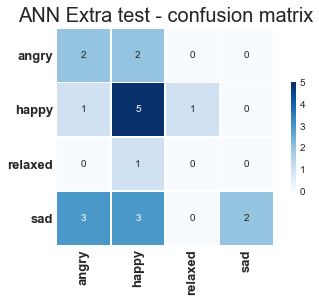

In [77]:
'''
We are going to use the encoder and the scaler previously trained
'''
y_extra_test_nn = np_utils.to_categorical(encoder.transform(y_extra_test))

X_extra_test_nn = sc.transform(X_extra_test)
print('New shapes...')
print('X shape',X_extra_test_nn.shape)
print('y shape',y_extra_test_nn.shape)

y_pred = classifier.predict(X_extra_test_nn)
y_pred = np.argmax(y_pred,axis=1)
y_true = np.argmax(y_extra_test_nn,axis=1)
filename = './Advanced_feature_engineering_pictures/CM_ANN_extra.png'
plot_confusion_matrix(y_true, y_pred,'ANN Extra test - confusion matrix', emotion_labels, filename)

print('Accuracy score', round(accuracy_score(y_pred,y_true),2))

## Logistic Regression

In [45]:
encoder = LabelEncoder()
y_lr = encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_lr, test_size = 0.1, random_state = 13)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

def evaluate_logreg(X_train, y_train, X_test):
    classifier = LogisticRegression(penalty='l2', dual=False, C=25,
                                    solver='newton-cg', multi_class='multinomial', random_state=0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    return y_pred

In [47]:
# Cross validation
classifier = LogisticRegression(penalty='l2', dual=False, C=25,
                                    solver='newton-cg', multi_class='multinomial', random_state=0)
scores = cross_val_score(classifier, X, y_lr, cv=10)
print('Accuracy for 10-fold validation: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 1.96))

Accuracy for 10-fold validation: 0.5787 (+/- 0.06)


In [25]:
y_pred = evaluate_logreg(X_train, y_train, X_test)
print('Accuracy:', round(accuracy_score(y_test, y_pred),2))
filename = '../Report/chapters/chapter5/images/join/CM_LR.png'
plot_confusion_matrix(y_test, y_pred, 'Logistic regression - confusion matrix', emotion_labels, filename)

Accuracy: 0.68


### Analysis on Extra Test

Accuracy: 0.45


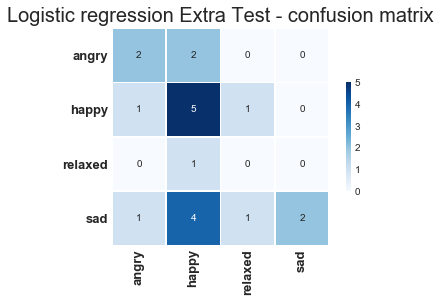

In [89]:
y_pred = evaluate_logreg(X_train, y_train, X_extra_test)
y_true = encoder.transform(y_extra_test)
print('Accuracy:', accuracy_score(y_true, y_pred))
filename = './Advanced_feature_engineering_pictures/CM_LR_extra.png'
plot_confusion_matrix(y_true, y_pred, 'Logistic regression Extra Test - confusion matrix', emotion_labels, filename)

## SVM 

In [48]:
encoder = LabelEncoder()
y_svm = encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_svm, test_size = 0.1, random_state = 13)

In [49]:
from sklearn.svm import SVC

# Cross validation
clf = SVC(C=220, kernel='rbf')
scores = cross_val_score(clf, X, y_svm, cv=10)
print('Accuracy for 10-fold validation: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 1.96))

Accuracy for 10-fold validation: 0.5804 (+/- 0.07)


Accuracy: 0.69


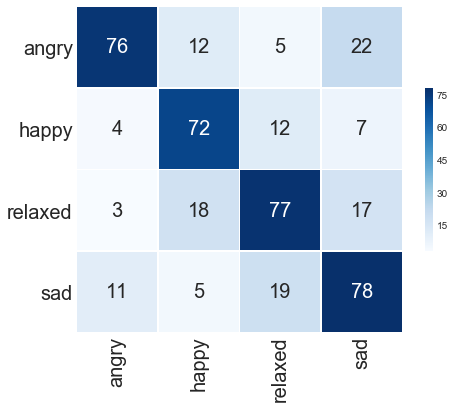

In [59]:
clf = SVC(C=220, kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy:', round(accuracy_score(y_test, y_pred),2))
filename = '../Report/chapters/chapter5/images/join/CM_SVM.png'
plot_confusion_matrix(y_test, y_pred, 'SVM - confusion matrix', emotion_labels, filename )

In [ ]:
# Cross validation
svm_clf = SVC(C=220, kernel='rbf')
scores = cross_val_score(svm_clf, X_vect, y, cv=10)
    print('Accuracy for 10-fold validation: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 1.96))

### Analysis on Extra Test

Accuracy: 0.55


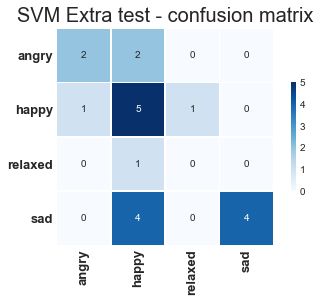

In [94]:
y_pred = clf.predict(X_extra_test)
y_true = encoder.transform(y_extra_test)
print('Accuracy:', round(accuracy_score(y_true, y_pred),2))
filename = './Advanced_feature_engineering_pictures/CM_SVM_extra.png'
plot_confusion_matrix(y_true, y_pred, 'SVM Extra test - confusion matrix', emotion_labels, filename )

## eXtreme Gradient Boost

In [50]:
import xgboost

encoder = LabelEncoder()
y_xgb = encoder.fit_transform(y)

In [51]:
from sklearn.svm import SVC

# Cross validation
clf = xgboost.XGBClassifier()
scores = cross_val_score(clf, X, y_xgb, cv=10)
print('Accuracy for 10-fold validation: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 1.96))

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

Accuracy for 10-fold validation: 0.5689 (+/- 0.06)


/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


/Users/saragiammusso/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy: 63.70%


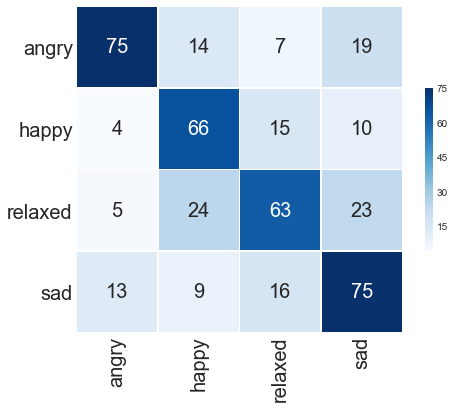

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y_xgb, test_size = 0.1, random_state = 13)
xgb = xgboost.XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
filename = '../Report/chapters/chapter5/images/join/CM_XGB.png'
plot_confusion_matrix(y_test, y_pred, 'XGB - confusion matrix', emotion_labels, filename )

### Analysis on Extra Test 

/Users/saragiammusso/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy: 0.5


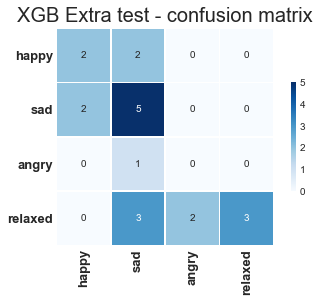

In [101]:
y_pred = xgb.predict(X_extra_test)
y_true = encoder.transform(y_extra_test)
print('Accuracy:', round(accuracy_score(y_true, y_pred),2))
filename = './Advanced_feature_engineering_pictures/CM_XGB_extra.png'
plot_confusion_matrix(y_true, y_pred, 'XGB Extra test - confusion matrix', emotion_labels, filename )

# Conclusion
